Instalar depencencias y

In [1]:
!pip install tensorflow tensorflow-gpu pandas sklearn h5py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np


In [3]:
from google.colab import drive

In [4]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
os.path.join("/content/drive/MyDrive/youtoxic_english_1000.csv")

'/content/drive/MyDrive/youtoxic_english_1000.csv'

In [6]:
df = pd.read_csv(os.path.join("/content/drive/MyDrive/youtoxic_english_1000.csv"))


In [7]:
df.head()

,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
0,Ugg2KwwX0V8-aXgCoAEC,04kJtp6pVXI,If only people would just take a step back and...,False,False,False,False,False,False,False,False,False,False,False,False
1,Ugg2s5AzSPioEXgCoAEC,04kJtp6pVXI,Law enforcement is not trained to shoot to app...,True,True,False,False,False,False,False,False,False,False,False,False
2,Ugg3dWTOxryFfHgCoAEC,04kJtp6pVXI,\nDont you reckon them 'black lives matter' ba...,True,True,False,False,True,False,False,False,False,False,False,False
3,Ugg7Gd006w1MPngCoAEC,04kJtp6pVXI,There are a very large number of people who do...,False,False,False,False,False,False,False,False,False,False,False,False
4,Ugg8FfTbbNF8IngCoAEC,04kJtp6pVXI,"The Arab dude is absolutely right, he should h...",False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
df.tail()

,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
995,Ugi5ADt10EdDz3gCoAEC,XRuCW80L9mA,I remember that they sent in the national defe...,False,False,False,False,False,False,False,False,False,False,False,False
996,Ugifh2DMhBbDkHgCoAEC,XRuCW80L9mA,Stats don`t represent the problem. Race baitin...,True,False,False,False,False,True,True,False,False,False,False,False
997,Ugj_plbGBjjzYXgCoAEC,XRuCW80L9mA,The quote from the mother... Wow that hit hard...,False,False,False,False,False,False,False,False,False,False,False,False
998,Ugj0bah1De8xy3gCoAEC,XRuCW80L9mA,this video is so racist,False,False,False,False,False,False,False,False,False,False,False,False
999,UgjBJKQSoQMQ6ngCoAEC,XRuCW80L9mA,"God, the narrator has such an annoying lisp.",False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
df.iloc[6]['Text']

'Check out this you tube post. "Black man goes on an epic rant against Ferguson rioters."\n\nAlthough his message is delivered with childish, cartoon-ish emotions.... He is one of the very few African American\'s who gets it.'

In [10]:
df[df.columns[3:]].iloc[6]

IsToxic             True
IsAbusive          False
IsThreat           False
IsProvocative      False
IsObscene          False
IsHatespeech        True
IsRacist            True
IsNationalist      False
IsSexist           False
IsHomophobic       False
IsReligiousHate    False
IsRadicalism       False
Name: 6, dtype: bool

1. Preprocesado

In [11]:
!pip list

Package                       Version
----------------------------- ----------------------
absl-py                       1.3.0
aeppl                         0.0.33
aesara                        2.7.9
aiohttp                       3.8.3
aiosignal                     1.3.1
alabaster                     0.7.12
albumentations                1.2.1
altair                        4.2.0
appdirs                       1.4.4
arviz                         0.12.1
astor                         0.8.1
astropy                       4.3.1
astunparse                    1.6.3
async-timeout                 4.0.2
atari-py                      0.2.9
atomicwrites                  1.4.1
attrs                         22.1.0
audioread                     3.0.0
autograd                      1.5
Babel                         2.11.0
backcall                      0.2.0
beautifulsoup4                4.6.3
bleach                        5.0.1
blis                          0.7.9
bokeh                         2.3.3
branca

In [12]:
from tensorflow.keras.layers import TextVectorization

In [13]:
X = df['Text']
y = df[df.columns[3:]].values.astype(int)

In [14]:
df[df.columns[3:]].values.astype(int)

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [15]:
df['Text']

0      If only people would just take a step back and...
1      Law enforcement is not trained to shoot to app...
2      \nDont you reckon them 'black lives matter' ba...
3      There are a very large number of people who do...
4      The Arab dude is absolutely right, he should h...
                             ...                        
995    I remember that they sent in the national defe...
996    Stats don`t represent the problem. Race baitin...
997    The quote from the mother... Wow that hit hard...
998                              this video is so racist
999        God, the narrator has such an annoying lisp. 
Name: Text, Length: 1000, dtype: object

In [16]:
# función para resaltar resultados que se quieran mostar en el dataset
def highlight_min(data, color='yellow'):
    '''
    highlight the maximum in a Series or DataFrame
    '''
    attr = 'background-color: {}'.format(color)
    if data.ndim == 1:  # Series from .apply(axis=0) or axis=1
        is_min = data == data.min()
        return [attr if v else '' for v in is_min]
    else:  # from .apply(axis=None)
        is_max = data == data.min().min()
        return pd.DataFrame(np.where(is_min, attr, ''),
                            index=data.index, columns=data.columns)

In [17]:
#Crosstab para resaltar los totales de las columnas
main_col="IsToxic"
corr_mats=[]
for other_col in df.columns[3:]:
    confusion_matrix = pd.crosstab(df[main_col], df[other_col])
    corr_mats.append(confusion_matrix)
out = pd.concat(corr_mats,axis=1,keys=df.columns[3:])

#cell highlighting
out = out.style.apply(highlight_min,axis=0)
out

In [18]:
from wordcloud import WordCloud, STOPWORDS

In [19]:
import codecs

In [20]:
from matplotlib import pyplot as plt

In [21]:
ffk = df[df.IsToxic==True]["Text"].values

In [22]:
pip install imageio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:
#@title
ffk_64 = b'iVBORw0KGgoAAAANSUhEUgAAAoAAAAJOCAYAAAAnL7bnAAB2xElEQVR42u3dd5hU1f0G8PeUS1lAygKCIEhH0VgoYgkgIAoqCNbYsCGiIJoYTWKLGkmiiRGMUYqILfEnKoLSBBQrTVCUDgoo0ntn7ym/P/beZVhpws7uzM77eZ77AMsCy92Zc9/zPU1470FERKnNOSeccxKAEEJAKWUSf3/Pnj3IycnBihUrsqZOnXp8uXLljp80aVLVxYsX1yhXrlzN5cuX1/jqq6+yhRBlvPdlAZQBUBZAaQAi3+UB5ADYBWB34o9BEGxr06bNupIlS64zxqwtVarU2s6dO28oXbr0+t27d69s0aLF2lq1am3fs2ePK1euHEqUKHGw/5ZI829Lsh+gwnuvrLV5/54Qwkkp45/zjUFH9eLiXSAiSrVk4T2stcJ7r4MgcABs/s/5+OOPj5k9e3bzDz744LR169adPn369BMBNAaQVYRfuhVC/Oi9/6lZs2bLatWqtcQ5t/jmm29eppRaIaVcceGFF9ri8n2aPXs2lixZkp2dnX38u+++W2P+/PmVS5cuXdl7XwlA5eh7IQBIACr6Y9uia7sQYuvOnTvXdOnSZdVJJ520dvv27euDIPjpwgsvPNQ/rcMwjBOgVUp5IQRDITEAEhGlI2OM9N6rIAgMEipMGzZswPjx4xuPGjWq9fz58zt888035wA4dn9/h1IKURDIqxI65xBVEH0URvKeAwfLoQk/d/Hnaq1dvs+TAGQUWg/nv7kHwA/IrSzKdM3o0f2vmqS/fweAZdnZ2cvOPPPMb+rUqfNlp06d5h577LELmzZtesBnurVWO+eA3AphHAz5xiIGQCKiFAx9caVvn9A3f/58/Z///Ofil19++Tfbtm27BLnDtXmCIIhDno8rhlEQEyia4dU4bHgALl/4UHFINMYUm++dUgrxkGxi4D6S53F0j8Rh3KOfKleuPLdFixZf1atX78sLL7zwqxYtWnxXuXLl/X6ytTZgKCQGQCKiFBA95KXWWggh8spm06dPL/nAAw/0mDhx4s0ATt9P4AujsKeKMOgd8X8bAIQQHrkVxXQXh20U4Pdhn3skhPBKxSPH0M45cZAq6zcnn3zytCZNmnzcpUuXGSeddNKiU0899ZChEIDTWntwXiEDIBFROgSo6EGZVl+3cw7WWh0EgY0f9nPmzMHAgQO7vPzyy3dt27atbfy5UXXJWmudc04hfYdLqQBf+tFcP5sQDIMwDA/0+fMSQuH0k046af6BQiEAaYxR0XsrfxWX4ZABkIgo6eFOWGsRVVck9lNdiaphPmEifOo3uEJAa533pH7hhReq9e/f/y8LFiy4Je8JLCWUUmE0LKyQ/itlqXBCIbB3MQgABFFnY3+fv+Dkk0+eceKJJ06+6qqrZpUtW3bhBRdcsOtQL9+E+YUp9X8HK5gMgESUvoHPGCMAqDgAFdf/69atWzFs2LBmDz744N+2bdvWLiEYWmutjyp9fIpRQQXDww2FWwEs7Nix45ycnJyZnTt3/rZu3brzWrRosb5q1arp8v+NK5heCGGjUEgMgESUgqFPSSnF/gLfzJkzsXr16tpLly5t8Pbbb9crU6ZMNe/9sc65qmXLli05ZsyYAAA6deq0dfv27ZullJsBbAawKXqYpVLjJoQQxntfZsyYMb8DcBIAaK0BIDTGaIY+KqJQqKP34sH+zDoAP5166qk/1qtXb/XOnTvXSynXAViP/WxPVBiccyhZsqS/4YYbFpcpU2buASqYMgxDFYVBx289AyARFaGo0qcTh0IBYOTIkdVee+21ixctWtT2m2++aQmgTnG9B1prOOcMq32UQqEwcSgViFZtH2RuYarZDGBh69atp3bu3PntDh06fHryySfvk3fCMFRKKSulZPBhACSiQgx+UiklhRB5pYbBgwc3fvLJJ3svWbLkMgDVEj8/YXuNfbZGicXDWAkT4dMmAHvvNV8RlCbBENj/tj4p0586UAUzOzv7k7PPPvudP/7xj0PPOuusbQnvwUBKaTI9CDIAElFSOeeEEELGW51MnToVDz300N0TJ068F0CN+PMOsMUJwAoZER06qCZWMJW1ViYuWClbtuzYxx577Imbbrrp8woVKsRBUEkpbdTRZAAkIiqQFjkKclprCwAzZsxQPXr06Dd79uz78rru0Ry4NN3TjohSuAmSUlqllE/Y8xAANt10002/HzBgwItly5aNg6DWWptMu0EMgERU4JxzQkopALhdu3bhiiuuuGf06NFPA3krXk105Bn3tSOiwgiDRimVeH7ymu7du9/0wgsvjC1VqhS899J77zNpWJiNLxEVdPiTUSPqnnnmmRZZWVkb4vCntTbeex+GoWb4I6JCIpxzQRiGQgjhgiBwAI59+eWXx5QvX37+wIEDGwkhnJTSG2Mypl1iBZCICqaL7T2cc1Ip5dauXYv27ds/9+23394BAEopY63lilciSo3wI4RTSiEOfE2aNHnws88+e6JChQpwzkkhhCvum0ozABJRgYQ/AFII4d58881KV1111VcAaimlvHPOs9pHRKkoWg2sjTGQUn77zjvvtOnSpctG5J7zXKxDIBtlIjrq8CdyuTvvvLP1VVddtQFArSAIbHScG9sZIkpJzjltjPFKKeucO+XSSy/d0K1btw4AnBBCOOeKbQJkBZCIjjb8AQC6du3a/d133x0mpYT33kbn2BIRpQUppRVCKGstunXr1vPtt98eFLVzItpmhgGQiCgx/HXr1u3uESNG/EtrDWutY9WPiNKUE0JI7z2aNGny5OTJk++vXLlyvLNBsQpMDIBEdKThTwDw3bp1u3/EiBF/U0rBWuvBhR5ElOZNnFJKWGuRlZX1+k8//XRdhQoVil0lkAGQiI6EBOC6det2y4gRI4Yw/BFRcQuBQRAgDENRunTp59auXdu7bNmyxaoSyGEaIvqlVBT+LmH4I6JiSoRhKIIg8Lt27brzuuuu+zMARHOci8d/kBVAIjpczjklpbT/+9//TrzmmmvmCSHgvXfsTBJRsU2Cue0cunbt2vedd94ZEHV20z48MQAS0WGx1gqllJ8+fTrOPPPM9QCyATD8EVFx57XWwhiDO+6447znnntusrVWKaUsAyARFWvOOUgpsX37dlSrVu2jHTt2tJFSGuec5t0hokxoBqPOrnv77beP6dat247o2EuXrv8h9tyJ6NANhZQKAK677rrf7dixo43W2jH8EVFmNYPSApDXXHPNxxs3boSU0nnv03buMwMgER1UtKefff311+uPHDnyHwBgjOGCDyLKKM45pbW2e/bsadq2bdv+AOLtsNISh4CJ6GANnpBS+rVr1+LYY49dBKCBEIKnfBBRxvaJEe14sGbNGlG1atW03RqGFUAiOiBrrQKA119//UIADYIgYPgjoowWBAEAYPr06SWjdjItq4AMgER0MAIAJkyYUDv6teMtISIChBBV0vnrZwAkokPSWtfnXSAi2rsHoBAiO52zFAMgER1QPNTxww8/1AUAzhkmIoIFgMWLF1dJCIUMgERUPERhzwLA7NmzawLpO9eFiKggm0cAGD9+fNV0/k8wABLRgQjsnfNXg20GEdFeSqnjGACJqPh1caPh3vXr1ycGQFYAiYhy20gGQCIqfuLh3ilTpmQBufMBOQeQiCivjawGAFKmZ5RiACSig7YPSqkaCR9jBZCIMlp8EtK4ceOqRm2kT8fOMQMgER1UTk5OHAAN7wYRUZ54FbBN2x4+EdF+CAAYOnRovAk0x3+JiPZmp8oJbaNI1/8EEdF+Oefq8i4QEeXx+QJgWqdYIqJ9G4doYrO1lqeAEBHF6c/7ODuVmDVrVtxOMgASUbFo4KCUsgAwbty4msDeic9ERJkuPiVp5cqVFaI2k0PARFQsJG4CXZPtBRHRfhpKIdJ2GJgNOhEdSrwKmItAiIgSOshSyux0zVMMgET0M8bk7vgyZswYACiplEqc90JElOksALz//vtVEkIhAyARFYsebtrvdE9ElEzLli2rnq5fO1t1Ijpg26CUqhb9Oi33uSIiSmpPWQgGQCIqXu0aACxatCg+7NzylhAR/SwAHscASETFzgcffHB89FMuACEiihvE6OzfH374oRoAaK0ZAImo+NBa1+FdICLal7VWAMA333xTGQCEEDYOhQyARJS24kUfe/bsqcW7QUR0QPEqYJduX7hIt8RKRMnlvYcQQgMwQoiPAbQSQhjvvebdISIChBAu2hpro/c+O2o7hRAibUIVK4BE9LO2DYCJfn4cbwcR0X7bSQCotG7durzOczphACSig6nOtoKIaF/e+7zzgKdOnaoBwNr02iyBjToR7SNuxGbOnAkAZaLGjnsAEhHth1IqPg84rdpJBkAiyt+zFQCwcuXKbAB5vVwiIsojEG2PFc8BTLdMxQBIRPttF7TW8fw/ngJCRPRzFgBycnKqpG1DT0SUr2eLBQsWVEts5IiIaB8eAF566aUqiW0nAyARpbUJEybwFBAiokNwzqXlbgkMgES0XzwFhIjo0Lz31RgAiSjtJZwCcgLvBhHRwSml0rICyJNAiCixJ5t4CsiHAM7jKSBERPvtLIfOuaB8+fIfbN68+QIA2ntvhEiPqYCsABJRfvEpINV5K4iIDthhFgCwZcuWeBuYtFowxwBIRIkSu67V2E4QER0yQ8WrgNNqyyw27ESUJ98pIBUSe7lERLSPeA5d5XROr0REeWFv1apVFQCeAkJEdJD2Ms5QWVGnOa3OA2YAJKKftQlSyuoJPVxWAImI9iPuJK9atapsYieaAZCI0tKePXvibQ14CggR0SEIIbLTsrdPRBS3YwAwdOjQxHOAiYho/+2liwJglXTLVQyARPQzzjmeAkJEdBjNJQAsWLAgO7ETzQBIRGlJKXUC7wIR0SF5AJg4cWLaHQfHAEhEua2Y9wiCwAPAJ598UhNIrxVtRERF2GlOu+PgGACJKJEFgC1btlSLQiFXABMRHboDzQogEaUtgb2LPo5jG0FEdMjgBwAIw/A4AJAyfZpMEX/xRJTZnHNCSunXrl2LY4891gOAEMKzCkhEdIAQJYTx3msAH3vv2wDQ3nsjROo3m+zdExEAwForAGDatGllgdwNTtlBJCI6LPE2MGkzcZoBkIj2aQ+UUtUTO7i8LUREh8xR8XnAaXN6EgMgEe1j165d8fw/w7tBRHRQcdirkq7JlYhIAMCwYcN4CggR0WHw3kMpBQBizJgxuT1nkx59ZwZAItqHc64m7wIR0WEGqWjlr/e+SmJnmgGQiNKtMavBu0BEdFhEQuc5O52yFQMgEQEAtNYAgGXLltWIerO8KUREh+aiNrRyWnX2+X0jIu89hBAWAObMmVMN2LstDBERHZQFgJEjR3IImIjStxeLNFzNRkRU1H788cfq6fT1MgASUf4ea1W2D0REv7ARFYIBkIjSSzzfb+3atQBQcT+hkIiIDhaopGQAJKL0knAMXCmAx8AREf2C9hMA8Mknn1RLp/aTAZCIEnuwVXkXiIgOn/deAMCWLVvS6jxgBkAiymsLhBDHRr924BAwEdEvyVKV06n9ZAAkIsSN1fz586smNGBERHRo8XhvdjqmViIiTJo0iecAExEdWZYqHy2k4xxAIkqzVkxKngNMRPQLeO8RBAEAYNq0aSWB9NhInwGQiBIDIM8BJiI6QkqptNlInwGQiL1XBEHgAWDy5MnHRb1X3hgiosMjEE2b8d5np0u+YgAkIiDatmDbtm1Vo0aMK4CJiH5hG7p79+60OQ+YAZCI8nqv4DFwRERHwgPAsGHD0mYvVTbyRJTo2MTGjIiIfkEK9P44BkAiSgvxfL/p06cDQAkpJbz3bBuIiH45BkAiSpseqwCAtWvXZgOAUoo3hYjol7WjAICcnJxqACBl6scrBkAiio+BS9y+gItAiIgOU7zv34QJE6pGHWmf6ptBMwASEaIea+I5lkRE9MvFHemU30uLAZCIBACMHDkyO10aLiKiFM1TcUfaI8VHUhgAiQgA8OOPPx7Lu0BEdER8vgCYNomViDKcEKIa7wIR0RGkP+9ltPCjRLSjQsqfqMQASERxAGQFkIjoCMU7KKxdu7ZCFAo5BExEqUtrDQBYunRptajR4k0hIjryznR2OnydDIBEGcx7DyGEB4C5c+dmA3u3MyAiosPPfYh2UEjYUSGlMxYDIBHFE1Uq81YQER1dW/ruu+9WSQiFDIBElLK91njMtxLbBSKio7NixYrq6fB1sqEnolg8b4WTAImIjrRXLQQDIBGltnibgmjbghJSSnjv2S4QER15ADyOAZCIUlq8TcHatWvLAnu3MSAiol/cngLYu6NCvMMCAyARpXKPNZt3gYjoyMU7KMydO7dy1K7aVN5WiwGQKLPFbUC8ACTlz68kIkpx8Spglw6NPxFlJgEAu3btiiuAlreEiOioMlXl/G0sAyARpaRhw4bFPVauACYiOooONfaOqKRFWiWizMZzgImIjoL3HkEQAABGjx6tAcAYwwBIRCndcDEAEhEVEOdcPAzMIWAiSl1Kqeq8C0RERyXvZCUpZXaq5ywGQKIMFQ1XeAD46KOPqgJ7N4YmIqIjYgFg165dVVL9C2UAJMpsDgC2b9+eHYVCbgFDRHQUfWtgn4V1HAImotQNgAAq8lYQERWYlD8OjgGQKHMl9kzLsU0gIioY3nsGQCJKC3EA5D6ARERHSSlVjQGQiNJBGbYJRERHJ15I99FHH1UDgCAIfKqeB8zGnihDxRuUjh49GlFDhVQ+uJyIKNXFC+nihXVI4eM1GQCJMlc8B7AcbwURUYHmqsTjNUUqf6FElLkYAImICkY8jFI5XZIqEWVoT9U5d0zCx7gPIBHRkaY/76WUEgCypk2bBiB1N9hnACTK9BQoZVwB5DEgRERHSSkFAFi3bl3ZKBRyCJiIUs+uXbvKx51X3g0iooIhhMhO6c4/v0VEmds+AcCwYcO4ByARUcG1qy4KgFVSOWsxABJRJd4CIqIC4wBgzpw52YmdbQZAIko1PAeYiKjgeACYPHlySp8GwgBIRAyAREQFTCmV0ucBMwASZXpX1fsKvAtERAXetrICSEQp3UvN5l0gIiqw4AcA2LNnz3EAEO0LmHIEz/4kyswGSgihAZhy5cqN2b59e0cpZeicC3h3iIiOIlgJYbz3GsDH3vs2ALT33giRWmtBWAEkylwOALZv335MFAp5CggRUcGJt4FJyU32GQCJMldc/i/PW0FEVODZqnJCWytS9YskoswiEgJgObYHREQF2r4CeyuAKZ1SiShzleEtICIqGN57BEEAAOK9994DABhjGACJKOWU4i0gIkpCyJIyrgJyCJiIUk7JuOPKW0FEdNTywp5zLjtV8xYDIBEFbA+IiAqUAwCtdeVU/QLZ4BNlIGtzdyWYNm1abkMgJbgnKBFRwTWzADBixAgOARNR6ojD3rp16wAASineFCKiAvbTTz9VT9WvjQGQKDMJAJBSluatICJKUkMrBAMgEaUe731J3gUioiSFLCkZAIkoJXELGCKiAhbPs/7www+rAUAQBCk3z5oBkCizBbwFREQFKz5bfceOHSl7HjADIFFmE7wFRERJy1fxNjAu1dpbBkAiBkAiIipY8XhvdqonVCLK7F4qEREVfNtafuXKlbmJkHMAiYhtABFR8eW9RxDkTrGeOXNmSQCw1nIImIhS5r2f2CBxOJiIqIAppaqw909EbAOIiIo/gWgeoPc+OxXbWzb+RAyARERU8CwA7Ny5MyXPA2bjT5TZHG8BEVFSeAB48cUXU/I0EAZAoswOfjn5GysiIio4pUqVqgQAQghprVXOpUa/mwGQKLNZ3gIioiQ0rtGq3/nz57deu3YttNZ7lFJWSglrrS7qbWEYAIkyW8hbQERU8JxzGgAWLVrU9dhjj/UVK1Z8/+GHH24GAEopI4QQRbk1DAMgUWbL4S0gIkpi0JLSCyGwefPmix5//PEZQojpDz300K8AeKWUd84VSRZjACTKbKwAEhElkXNOAPBSylBrDQDN//KXv8yuXr36wHnz5kFK6YoijzEAEmU2w1tARJRc3nvhnAuMMZBSGqUUVq9efVuTJk3W9e/fvzoA570v1OFgBkCiDG2PAEAIwQogEVEhcs5pa63XWlsAle++++6VAwYMaCqE8IUZAhkAiTK7IWIFkIio8AljjBJCWADo27fvlwMGDDhZCOELK5sxABJlYssjcjuZpUuXjoMgbwoRUSHz3ieGwNmDBw+uCMAZY5Kez0RR70NDREXS6Iiop4nEHwt7DgoREQFSShNtG/PlunXrmleuXBnOOUiZvBzICiAR7Yp+ZBmQiKgIOOe0UsoCaHbFFVfcG4VClcx/kxVAogyUrwK4AUAlIYTz3rNTSERURE2zyB2Kwfjx40t36NBhtzFGaK2TEtTY2BPRLt4CIqIiJ4QQBgDuuuuuvwGA1jppOY0VQKJM7GZ6n7cQRAixCEADIYTx3mveHSKiIkuA8Vxst2LFClWjRg0454SUssDDGiuARBnc1kQ/7uStICJKic65CILAApB//vOfbwYAa21S5gKyAkiUmY0MhBASgBNCfA7gbFYAiYiKXrwiuFy5clO2bt16NgDpvXfxqE2B/Tu81USZ285EP8YVQPYGiYiKmHNOCSGwbdu2s6ZOnSoBOGttgW/RxQBIlIGEEPEB5WjZsuVOAFBK8cYQEaVAEx0dE4ePPvro10DuhtEMgERUIKy1AIDKlStvj0MhERGlBAcAU6ZMaR2HQgZAIirYVsa5TbwLREQp1UEXAPDRRx+dCwBBEPiCXrPBAEiU4aKNoImIKEXEYW/79u3V4kxY0P8GAyARA+BG3gUiopQS57PqcSZEAQ8DMwASZTjn3HreBSKi1OqbRz9WXrFiRW4C5BAwERWkX/3qV5wDSESUQrz3CIIAAPDVV1+VBvbOC2QAJKKjbmMAoFWrVluiX3MfGCKiFKOUKp+Mv5cBkCjDGWPiAMh9YIiIUq2n7v0eBkAiKkgOAKSUiQGQp4EQEaWWHAZAIipwQogtvAtERCnbRjMAElGB8gBgjNnKW0FElJqMMWFim11gwbKglxUTUXpwzgkppd+1axeysrJ81NP03nvOBSQiKkIJbbHfsWOHzMrKymuzC+rfYAWQKHMbGABA6dKlAWBjMnqYRER0ROK2eFlWVtY+bTYDIBEVVAMDAPFxcI63hYioyMWL9H6Ifq0LuoPOAEiU2eI2YB1vBRFRalBKeQC45JJLVgBAGIaCFUAiKtB2BgBq1KixHsidd8JbQkRUpLyUUkdB8PP4Y8nq/RNRhhFCIAxzF5edccYZq6PGhjeGiKjoOCGEyMnJEbVq1Xr07bfffh4AtNaGAZCICr7FcW4V7wIRUZF2yp2UUnrvceedd163fPnyPwO55wIX9PAvkDupkIgynPeeAZCIqOjCn/XeK+897rnnnl8//fTTnwEQzjkU5NYviVgBJCKcdtppq3kXiIgKn1LKeu8VgJ3PPPPMCVH4U845n6zwB7ACSJTpPACce+656+O2iLeEiKjwwp+1VgFYNm3atJNatGixyzmnpJRWyuTW6FgBJCI459azTSAiKrzOt5TSR+Hv088//7xOixYtdoVhqKSUtjC+AFYAiTI8+wGA935NYsMEgMfBERElKfxprYUxBvXr139t8eLF10ftsAyCwBbWF8HePlEGi/f9a9iw4WYAedvCEBFRcjrdQghhjMEJJ5zwWBz+rLVSCFGoJzExABJlsHjfv4YNGwLA5sRQSEREBdrhztvmpXfv3jcuXbr0EQBwzgmlVKEfw8kASJTZEod7461geB4wEVHBhj/rvZfOOfz2t79t/eyzz76M3G1eRDJX+jIAEtHBKACQUq7krSAiKuAGdu82L7sHDBhQ95///OcnAJT33hdV+GMAJGKvFGEYCgC4+OKLVwKA1ppDwEREBRP+TLTS94dp06ZV7tOnz1LnnAJgk3G6BwMgEf1izrnveReIiApEvM2LBvDFF198UbtFixY7wjCUhbXNy6FwGxgiAgBYa5fxLhARHX34i7d5adCgwX8XLVp0LZC3zUvKzLFmBZCIAABXXHHFiuin3AOQiOjIOCmlMMagbt26T8Thryi2eWEAJKJD9lYBoFq1avEqYB4HR0R0ZG2pdM7h0ksvvfm77757MAp/RbLNCwMgER2yxwoAYRjGq4BFHAqJiOiww58A4B544IHzRowY8RKibV6UUinZngrv2c4TZTJjjNBa+0WLFqFRo0Y+X2NGRESHIKU0zjldo0aNB1asWNEPgAzD0AdBkLIhiwGQKNO7rd6L+PQPIcRKANWFEM57zxECIqLDDVRCwHuP5s2b3zJ9+vShyK0AeilTsyllA09EPqEtWBr9yNNAiIh+WWcaQgjMmDHjxZYtW/ZE7lYwwrnUbE4ZAInYa0W0MSnOOeecZQCQqnNWiIhSPAR6KSWmTZv2QosWLe6KQiBSMQQyABIRrM3dl7RChQoL41BIRES/vE8dD/vOmDGjf4sWLe4FgFQMgQyARJSnXLlyC3gXiIgKLAQ+1aJFiz+lYghkACQiINr25cYbb1wW/Zp7ARIRFUwIfKJFixZ/SLUQyABIRMDevQCXJbQNnAdIRFQwIfCvLVq0uDsKgSmxMIQBkIgQbwPTqFGjtVEQ5E0hIirYEPivFi1a9EKKrA7mPoBElH8vwDUAqnIvQCKigmtm49DXvHnzm6dPn/5SlMF8US26Y+NORMC+ewEuiX7kXoBERAUjsRI4tFmzZtcAyO15F1EhjgGQiPbZC/Dcc89dAHAvQCKiZIRArTVmzpz5+p/+9KeuiLYOZAAkoiIT7wVYrly5mXEoJCKigg2BxhgPAH/961/f+cc//vFrKaVDEey8wABIRDEPAFddddW8uKHiLSEiKvgQiGiKze9///tPnnrqqZMA2MIOgQyARBRzAJCdnb0w+rUGt4IhIkpK/hJCOAC47777vvn73/9eDYC11hZaCOQqYCICABhjhNbaL1q0CI0aNYpXBHvvPSuBRETJCGFCWO+9ArB5zpw51Zs0abLbWquUUpYBkIgKRb6tYJYBqM2tYIiIkktKaZxzGsD3CxcurNewYUM452Q0NzB5/y5vPRHFGRC5w75QSsXDwJa3hYgoeZxzWkppAdRt1KjRlwsWLICU0llrkzr6wgBIRAByV/2GYSgAoFOnTnMAQGvNG0NElPwQqJRSDkDTk08+eUTUEffOuaSFQAZAIvqZsmXLzuJdICIqPNZaqbV21tpLW7Ro0Q8ApJQ+WVP1GACJKJEHgOuvv35u9GuWAImICokxRkanhfzx8ssvvwEAhBBJyWoMgESURwhhAaB06dKzox6pALeCISIqNM45L4TA22+//fJTTz11JgAXrRQu2Paeq4CJKJZvJfByALW4EpiIqPBzIKIi3b///e9qd9555xpjjNJaF9jCPDbqRLRPBkQ07Fu7du2voiDIlcBERIVLRiuD0bt376+WLFkCrbV1zhVYbmMAJKI8iSuBmzRp8gUAKKV4Y4iICplzTkUhsHqDBg0+W7VqFaSUrqBWBjMAElF+HgCuvPLK6WwniIiKNgRqrR2Aczp37vw0AEgpC2T6Hht2IvpZmwMAlSpV+jr6tQIXghARFQljjNRa48svv7zn/vvv7xq10Uc9NMNFIESUv8cppJR+165dyMrK2gagLBeCEBEVKQ9AAMCzzz57Qu/evZcf7ZnBDIBEtG8r432875QrUaLEp2EYniuEMN577glIRFREhBA22g5mxcKFC49v2LAhrLVCKXVEQY49eiLK38ggDEMFABdccMFnAKC1Zk+RiKhoO+fxopCaJ5100igg97i4Iy3kMQAS0X7bGgA47bTT3o9+zaXARERFLF4UYq295Oyzz74v6rQfUZZjACSin4n3/jv//POnALlnVIILQYiIipwxRgDAlClT/v73v//9bBzhSSGcA0hEPxPNA4zD4GwAv+I8QCKilBGfFLL166+/Ln/qqaf+4vmArAAS0c97hkLAORcAwNlnn50314R3hogoJUgppQFwTNOmTd+N2+hfUtRjACSi/bLWegDo0aPHm1EoDHhXiIhSg3NOa61hre1yxRVX3BR9+LCHgjkETEQHalwS9wPcDKA89wMkIkopifsD1urdu/eP1lqplHIMgER0ZK1K7jxABcDWqVPntWXLll0rpQzjoWEiIip6CfsDzl+1atVJ1apVy+vAH+zPsSdPRAdqVBCGoQCA66677jUAUEqxzSAiSq3OenwiyIkXX3zxvwBASolDFfjYmBPRAcXHDN1www3jAPgwDJUQgsMGREQpxFqrtNaYOXPm3ffdd995ALxz7qDzATkETEQH61nmDQPXrVv37aVLl3aTUhrnHLeDISJKLfHWMJu++uqrSqeddtpBh4JZASSiA/cQE4aBr7322hcBQCkleGeIiFJOvDVMxS5dujwffeCAQ8EMgER0UAnDwGMAgMPARESpyTmnlVL44Ycfbn/88cdbAvDW2v0OBXMImIgOKt8w8IilS5deymFgIqLUlLBd10+rVq2qeaBVwawAEtGhGpO8YeDrr79+KMBhYCKiFO60SymlBVCja9euTwG5Q8E/a9tZASSiQ4l7j4sXL0bDhg19FAy9955BkIgoBXOgyG2kMWDAgFP79OnzjXNORcGQAZCIDrtHmTgMPHLp0qWdOQxMRJS6EoaCF//0008NjzvuuH2GgjkETESH05AkDgMPBjgMTESU4h13qbW2ABr07dv3fgCQUuYtCGEFkIgOS75h4N0ASnIYmIgotXMgorOCR40aVf6SSy7ZGp8VzAogER2WaOsX1aBBA9SuXfvV6GOWd4aIKHWb7njeX58+feK9XL33nkPARHTYATBvGPjRRx/9T9SQcA4gEVEKc84ppRSWL19++WOPPXY2or0BOQRMRIfN+9yFZTt37kSZMmV+AnBcwkRjIiJKzQ78zxaEsNEmol/SiHjvfZCVlYVzzz033hOQw8BERKndeZdKKQegwT333NMD4CIQIvqFwjCUQRC4l156qfbNN9+8TGsNY0zeRGMiIkrNHBi107smTJjQkAGQiH5pTxJCCBhjEATBHABNhBDGe8/5gEREKSweCm7YsOFrHAImol/agMAYE2itccMNNzwPAFpr9iSJiFK/Ay8BYPHixZczABLRkbAAcMstt7wCAMaYALnDC0RElMIZEACklOs4BExER9KLhBBCAPAlS5b8MCcn5zwOAxMRpTyH3FPgprMCSES/WLQnoAaAq6++ejjAYWAiojRoux0ANGjQYDUDIBEdaUNiAeDWW299H+AwMBFRqlMq9yjgBg0a/MgASERH2pA4APj1r3/9Y6lSpb6KhoW5JyARUYorX778XAZAIjoiicPAV1xxxb8AQGvNvQCJiFKXBoCLL754PheBENERc84JKaX/7rvvUL9+/T0ASmDvZqNERJQ68trmkSNHHssKIBEdMSmlB6Dr1auHc8899x8AoLU2vDNERCnXXlsAKFu27NR27dqtZQAkoqNijHEAcPfdd/8dAJxzXAxCRJRilFIeANq1aze6TJkyYAAkoqOitXYA5GWXXba1Tp06Lznn8nqaRESUErz3PgCArl27vgYAnANIREfNGCO11u7dd989oWvXrkuFEGDbQkSUGuIzgAEscM6dKIRgBZCIjl60JYy49NJLl5UoUWJ8tCUM5wISEaUArXMPabruuuv+Gp3nrhgAiaggepcIw1ABwB/+8IeHolDIY+GIiIqeC8NQAljzyCOPvAIAUkrHIWAiKhBR1Q/ee0gppwBoyfOBiYiKllLKW2vFJZdccu2oUaP+673XQgjDCiARFYhoWEELIfDII4/8Lmp4GP6IiIquXbbWWgHgkxEjRvw3+rABuAiEiApQXAW01iIIginee1YBiYiKqEkWQgjvPd55551qXbt2XRMv2APARSBEVKC9TRhjtFIKDz/8MKuARESF3w47KWVYsmRJ4b1H3759u3Tt2nUNgLzwB7ACSEQF3eXctwo41Xt/JquARETJa3allDaa6xc4l5fx0Lhx48fmz5//SGLbHGMFkIgKuveZWAW8B2AVkIioIAOfEMJprcMgCBwA4ZzTYRjG4W913bp1B/3+979vN2fOnP2GP4AVQCJKRuuUUAXUWk8FwCogEdGRc1JKp5SCtVYnVvkAoFKlSpPat28//K677hrZrFmz1SVLljx0Z50BkIiSwRijtdbmscceO/uRRx75PAgChGHIG0NEdBj9aCGEjc7v1cYYke/3l7Zu3frdjh07Dr/iiium1K1bN/+fD8Iw9Fprk7/yxwBIRMltvaIqYE5ODkqWLPk9gDoJxxEREdG+XDSXTxpjVL58ZrKzs8e3a9fuzb59+77XrFmzTSVKlEj8fWmMUQCsUsodKPQl4nAMESWTLlGihKlfv/43S5YsqSOEsAyARES5/eSEKl9gjJHOORkP75YoUWJ+06ZN3+nTp89b7du3/7pKlSr5O9mBMcYrpayU0iWu8D2sxpn3n4iSIToeTgRBgEaNGn25ZMmSLkop5J+7QkSUQe2iF0IYpZQMw1B577Uxecem7zjhhBPGXH755W926tRpzHnnnbcz3x9XxhiJvVW+MAiCI++d89tBRMnWrFmzWaNHjwYAwbtBRJnKey+890FClW9W06ZN3+7Tp8877du3X5C/yuecC6y1cZXPaq1tQX0tDIBElEwWAJo3bz4noc3xDIJElElyD+TwQimV07Bhw5euvPLK96699tpxDRo0yB/oVBiGMhoadlLKUMrkzJphACSipInmtuDEE0/8AQDCMIQQAlx8RkSZRGttwjAMLr/88v+88cYb9yRmQ+ecTqzyBUFgC+Nr4mRsIkpqrxcAoi0KlkQftrwzRJSJtm/f/hMA7Nq1q7RzTnrvvZQyDILASCkLtWfMAEhESe/8RiFwbmIoJCLKNBUrVvwOyK0ISikPa7sWBkAiSjvxSmAAOPHEE2cAgFKKN4aIMo0CgGuuuWZl9Osi7wgzABJRsnkAaN68+aw4F/KWEFGGkQDgnNuYUl8QEVESOQBo1qxZ/pXAREQZ0wmObElsFxkAiajYSlgJ/COwdyUwEVEG2pQqXwgDIBElVb6VwAujD3MlMBFlojD6kXMAiSgjxCuB5yWGQiIiYgAkomKIK4GJiBgAiSgzxSuBZ8a5kLeEiIgBkIiKt3gl8Nzo11wJTEQZJ5UWwDEAElHSJawE/gngSmAiytCesHMp87UwABJRYfR6E1cCL4g+zJXARJQRrM1t7rKzs+M2kQGQiDJGAAD16tXjSmAiyqQOcF7l76yzzsoNX7Lo4xcDIBEVSgMYhrnbXzVu3HgawJXARJQZvPcIggAAMGrUqBIAYK0t8hIgAyARFVo7CADNmjX7Ks6FvCVElEmUUtmp8rUwABJRYXEA0KJFi++iX3MlMBFlApHQ1lVJlfzFAEhEhdMCRnP+ypQpsxTYOymaiCgDWADYuHEjK4BElFniOX+tW7f2ALY657gQhIgyhQeA//3vf3EFkHMAiSgjrY1+dLwVRJQphBDVU+VrYQAkosLsAcdtzmbeDiLKNEqp4xgAiSgTSQAoXbr0pqg3zCFgIir24jnP33zzTRMACILAe1+0zR8DIBEVpnjeSw5vBRFlCu+9AIDly5c3ij5kUqI3TkRUmHbt2iWiRpE3g4gyQbzzff3vv/9+n1DIAEhEmYSbQBNRxkg8DWTevHlVgaI/DYQBkIgKtR2MfizDIEhEGdbpdQCwadOmxqmQwRgAiagwxbs/V+StIKJMbP/eeOONxqnQAWYAJKLC7AH7fAGQbRARZUb6i1YCz58/vxUABEFQpPOg2fgSUaGIG7rvvvsOAGqmQg+YiKgQ20AFAEuXLv119KGwKNtABkAiKqzer4h6v9VSofdLRFTIAVBIKQGg1qeffloqsV1kACSi4kwC+0yANmAFkIgyh1BKOQCYMGHCmVEoLLIcxgBIRIXW+AHA//73v5PjDjFvCRFlGAsAX331VfvEdpEBkIiKLaVy90Hdvn17s6jny5tCRJmV/qIh34kTJ7YFgCAITFG1hYKNMBElm/ceQuR2dIUQXwM4VQhhvPead4eIMqk5FEII7z0mT56sWrdu7YwxQmtd6GGMFUAiKrRe7yeffKIAnCqlzFsRR0SUQYTW2gLAhx9+eEHUQS6StpABkIiS3+WNGrhJkya1AgCllAUXgBBRZnaIHQC88sor1wBAEAS+KEZjGQCJKOmUUiLq8XaJAqHjXSGiTO4QL1u27JKdO3cCuQtDCr1DzABIRMlu7CClDAHgs88+uyDqAbP6R0SZ2ibKIAgAoPzw4cNPBgBjTKEPAzMAElFSWWtlFP7KA2jM+X9ExHbRhgDwyCOP3AEUzTAwAyARJbu3qwBg4MCBVwOAUqpIjz8iIkqBdlEDwPLly2+Jjse03vtCbRcZAIkomY0cgiAIAWD48OG3AYAxhuGPiDK9bRRBEFgAJV599dWrAMBaW6gjI9wHkIiSxhgjtdbuk08+qdK6deu1QghE4xwMgUSU0eK9UEuUKDF1z549Z8Wd5njP1GRjBZCIkkkBwJAhQ24AAK01h3+JiHLDnhZCICcnp+U777xzIrB3znShBFBWAIkoSY0bhBAIwxAlSpSYB+BEnv5BRLSXlNI45/QJJ5wwZunSpRcltp1J/7d5+4koGYwxGgBee+21xgBO1FqD4Y+IaC/nnJZSYtmyZZ1ef/315gBgrS2UdpIBkIiSIggCDwCPPvrofVFDZ3hXiIj2EkJYpXLXfrzzzjttgdwKYKH82xwCJqKCZq0VSin//fffl6hXr96eqKHzhb3NARFRqlJK2Xjl7y233PKbIUOGvBEHwMIYAuZwDBEVOCmlBhDeddddtwOA1toWxU73REQpyGut49M/Vr755pvNrrjiilXxbxbWKmBWAImoYFu2qPe6e/dulC5dehmA2kII573nlBMiymhCCCeEkM45lClT5o0ZM2b85sQTT4S1VkkpbWGFP4BzAImogMUTmPv169cBQO3oiCO2NUSU0ZRSznsvnXNo27btTdu3b88Lf0qpQg1/ACuARFSA4upfTk4OSpYsORXAmdz6hYgyvWnUWntjjASw/l//+leLu+++eykA4ZyDlLJIghgbZSIqMMYYGQSBe/31108EcGY0z4XtDBFlMmGMEeXKlRs5Y8aMSxs1ahSfkW6lLLrBEVYAiaggSQCuTp06w5ctW3Z5vMkpbwsRZaC8Yy87d+58y8iRI4cCgPdeCSFskadSBkAiKgjxub9vvvlmlauuuorn/hJRRlNKGWutPu644yb99NNP7QEgDEMZBIFLld46EdFR01oLABgwYMD9UePHc3+JKGNZa7UQAitXrmzXqFGjVwEgCALnnEuJdpEVQCI6as45IaX0S5YsUQ0aNNgDQCFh+IOIKFNJKeGcQ6NGjf65YMGCe6M2E0U5/w9gBZCIDoMxRjrngijQCQDaGBOEYajDMFTGmJIAcPfdd98FQGmtLcMfEVFu2FNKYeHChb9r2LDhH6NQWOQFOFYAiahA/PDDD6hdu/YaAFUBOHYwiYjyeK21MMagU6dON40ePXoYckdKimwxCAMgER24xfJeCiHcN998k33ZZZc9tm7dunNKlSoVbt++/fuLLrpoZqNGjb7evn37suzs7FLDhw9/cvbs2Rcopby1ltU/IqJ8TaqUUjjn8Le//e3U+++//xvnnJJSFkkIZAAkov2y1gqllJ82bZpq2bLlJgDleFeIiI4idO09FnPrjBkzKjZr1sxZa6VSqtBXBjMAEtHPu6m5J3oIAL5atWr/XbNmzW9KlCixJ9rU2Uc92fhzJABnrQX3/CMiOriE/VE/ycnJaR0EQd4pSoX6dfBbQUT7CYAKgL/zzjvbr1mz5jdKKeTk5JR0zinnnHbOBQmLQGQYhprhj4jo0JxzWmvtALTq0qXLnwBACKEK++tgBZCI8jdOQkrpFy9ejIYNG24CUAFc1EFEVKD9bCGE8N5j+PDhNS6//PKVhT0UzABIRD9rFwD40047bdDs2bN78Dg3IqIkNLRC2Gi05dM9e/a0KlGiRKEOBbNHT0R5rLUKgH/yySfPmj17dg8hBOf1ERElgfdeaa09gF8/9thj3aI2uNDaW1YAiQjA3qHf5cuX44QTTlgJoHrCijUiIiroELa3jV1sjGmolIL3uaPDyf632bATUW5jEB1L1KVLl38AqK6Usgx/RERJ45VStkSJEgDQ4M477+wB5I3EJL/N5/0nooSh31Nmz579O6VUoTVCRESZFvzi4zKNMUFOTg6klHNKlCixDACiFcJJxyFgogxnjBFa63jodzGA+hz6JSJKQugSwgJQUfayrVu3fuqee+75V5cuXdYW9tfCyd1EGU5rLQD4Ll26/A1AfaWUs9Yy/BERFRwvpYRzTgHASSed9O+RI0f2qV+/fl42jLaBKbRj4djIE2Vyi5S7BYG7//77z509e/b9Qggw/BERFSgnhBDOOQFgxhtvvFF17ty5ferXrw/nnA7DUCKaD1iYXxSHgIkylDFGaq3d559/jnPPPXcrcs/65YbPGdgPiJ8HvBVEBR/+4ja1efPmT0yfPv3B6OPKWuuUUkUWwtjQE2Vii+SciCcaX3HFFeMBlJNSWrYJxT/sSSmN1joMgsBprQFACCFEEAQ++lgYPbSI6CgIIfLCX79+/VrH4c8YI733tijDH8A5gESZGP7ytnypX7/+X1etWtVBSunjuSlUPIOf1toZY+KznPf9Te8RhqFAbhVQAkAQBN4YY733fE4QHcmbLnchnXnyyScb/v73v18KQLncg4BTooPFNzZRBrHWCqWUAOB69+5903ffffeHaMsXDv8VU1JK65xTxhgFAFlZWVPbt2//SqtWrabVrFlz1ZVXXrl21qxZpcePH39cyZIla7/44otd58+ff3UYhhUBaKWUt9Z6sDpMdNhNrRBCee83DRgwoE6fPn22OOeUEMLGne9USai8ePEq5lcYhsJaG8S/7tu3703IPYzcI3e4z/MqdpeLvr8egG/Tps2jc+bMOazXy+bNm3HfffedDuCb+M9H21fwvvLidYhLCGGiny+O31PW2pR7LvDhyItXMbycc8jJyZE5OTmB917FH9+2bRsaNGjwHMNf5oS/7OzskV9//bVKeH3Em8/qMAyltVaGYShzcnJ0Tk6Ods7pxNdRnz59Lo7/3mieKO8vL16HuIIg8AD84MGDm0adcM0AyIsXr2RV+WT0AA/y/96SJUtw7bXX3gRgffQgZ/grxuEv+v76M88888H4NWCM0WEYysN5LVlrReIDq3///pUBrGQlkBevw7uklCEAX6tWrRej95FyzqXUM4PbwBClqeihLoUQSmsdDznkGTVqVIXRo0d3GDly5DVr1qzpkjAnzDnnOJ+r+M75g3MOzZs37z59+vRXkLvBrFBK/eKJ59FiESWltEuXLkXdunUXAmjIk2KIDt1EI3dRVbho0aISDRo0yDt1KWXaCn6PiNIr9EXDdoEQAgnbdvg5c+aIhx566MKmTZu+IIT4oUuXLpsGDRr0f2vWrOkihIDW2ubuRcrwV4zDn3fO4ayzznoyCn/SOYcjCX9xmJRS2jAMdZ06dTBu3LgzAdgo/LF6QHRgIggCCyB45ZVXLo/a75TaaYEVQKI04JwT3nutlNqn0jdu3Liq//73v6+YPHnyNTt27Dg78c8opSCltNZa55zT4Ea/xftpI4SJtmz5Yu3atedUqVIlXvVdII28tVYrpcwDDzxwbr9+/T7VWsMYwxtPdIj3pNb6kzAMW0eZywuRGk0xAyBRioqHeIMgEADyjggaO3ZsuYEDB940cuTIXgAaJzQ20Fpb772z1irvvWDoyxzRdj544oknTvrTn/40PwxDHQSBKcjXo8h9cvkSJUq8H4bhRQmhk4j287ZRSglrLSZPnlypdevWm+ITmFLmIcOLF6/Uuay1Ilq9K+KPbdy4EVdcccUVAKYjYaKxUsprrXOiCcdc1JHhE87r16//ZrzSNxkTzqMTDPDBBx/UBleS8+J1yEtrnQPAX3jhhb+PVtYHqfKs4VwgohThnBPOuUBK6YMgCAH4cePGVf/Vr371TKVKlczw4cPfBNBcKYUgCEIhhLHWemNMwCHejK/+aQC4+eab/w4AYRiqZAwzSSkdAJx//vnLy5Qp86X3HtHWMES0H9ZaBQDjxo3ruX37dgghwvwn8RQVBkCiImaMkchdaemllOHq1atx9913dypduvSMjh07rvz222/75j7jlY1DXxiGQTT0xtCX4YQQLgxDANhxzTXXzIwCoU3Sv4UwDAMAOO+8816P/i3OIyI6AO+9DIIAAOr93//9X6MoFKbEtAkGQKIiDn7RfBC7ceNGXHnllbdVr159bf/+/Ufv3r27mVIKWmsjhIjn9TH00T7isNe4ceMxtWvXRtyZSGZRAwB+85vfvBX9OgBXBBMdLASGADB06NBeABDN62YAJMrQ4BdPBLYffvhh0KRJk8ezs7PN8OHDBwKoEgSBi6p9MMZo7rlGBxIP9darV28eAIRhmNTXSlzxa9Wq1Yro30OqrGokStE2XwHAF198cdOCBQsAIHTOFfmbhg8VoqIJfu7jjz+u0LBhwxfbtWuXM2/evAexd5jXRSc2cHUlHX5jLuWywgycNWvWBIBN0YdZASQ6yNszOhrumNdee60DsHduIAMgUWYFv7INGzYc0qZNm02LFy++WUqJaDPneJiX70v6RZkMAM4///yVhfTvJYa9NdGPjt8GogOz1loAeO2113oDQBAEtqi34eODhii5wU8lBL+shg0bDmrTps22xYsX3xIHP+ecN8YEfD/S0QSyMWPGVCnMwBmpxGcJ0aE555SUEsuXL79k8uTJpQF4a22RDgPzTUtU8G904b3PW9zx8ccfl27YsOF/2rRps2Px4sU9ouBnE4IfJ1DRUVNKnVAoaTOqWuzevRsAqu4nFBLRfjpO8YKtwYMHd4/eS0U6DMwASFSAD8aol+eFEPajjz5CgwYN/tWmTZudixcv7pUv+Ck+NKkgA9mmTZsaAoDWyZ06GlctJk2aVAkAgiAAT5QiOjRjjAeA4cOH3xm9d0xRvncYAIkK4AFsjNFCCEgp7aZNm3DppZfe3bZtW79kyZK7GfwoyYEsXmF40bZt2+KNZpP5GlMA8N///vfS+LnG1zTRYT0rlFIKYRie/MYbb9SO3r9FlsMYAImO7uErozN4DQBcdtllXStVqrR55MiR/wLA4EeF8VCJN5rNHj58eJPEUJiMzk58vvDw4cOvj6oa/CYQHR4hhAgBoH///rcBuVs/MAASpX7YE8YYGYahjk5DkEopBwBPPvlk8yAIFr/zzjvvACgffZzBjwrrtWkA4LHHHusDAEEQuCT9OxKA/7//+7/sMAzbKKWKfB4TUZq9VxUATJ069eaEo+GK5BnBAEi0H8aYvLAXr9BVSnmttQuCwERn9bpnn322phBi8v333z/dGFNfKeWiUzskgx8VloQVhj3ffPPN4wC4aBV6gdJaCwC4//77nwEA7z2Hf4l+gYSKfbV+/fq1TAyFhU1w8i7xDelhrZXeeymEEFpri/3sa7Zx40Z8//335d58881TduzYceZbb73Vbu3atRdFD0bvnLPOOW7eTEVCSmmcc7patWrvrVq1qnMUDCFlweRAY4zSWtu//e1vTf74xz/OkVIiVQ61J0rH92qtWrX+u3z58msBKO+9LewTdRgAKeMYY0Q0bCWi3dl/Nolp0aJF2LFjR7Xhw4ef8e23357z8ccfn7lt27YzAFTM90YGAMPgRynyYPHOOXHBBRf8fty4cf/w3ivvvT3aEGitVUopO23aNNmyZcv1ACoKIRw3LSc6sroDosr5ggULRKNGjeCcE0k+w5sBkDI38B2sujdt2rSsUaNGtZg7d267cePGtd6zZ8+ZAErs5wGLaH6ftdbCORfwDlMqEULAe497772341NPPTUOgLTW+vgM31/0lPIe3nstpTQrVqzA8ccfPw1AC4Y/oqMTBIENw1D96U9/uvCJJ54YH4ahjhdYMQASHUm3Knc4NzHwhfk/Z+nSpRg5cuSJ33zzTasxY8a0Xbt27a+999XzP0SFEFBKGe+9jzZ3lt57Ac55ojSpLnTu3LnHyJEjhyC3x6K8904p5Q821BSFPlhrdRAEFoCfNm1ayZYtW84E0CSuMvI2Ex05KWXonAtq1qw57Mcff7wJQOC9DwtzGJgBkNI+8HnvhbX2gIHv+++/x7hx45qNGjWq0+TJkzvu2bOn5f6qJlprm5v1nHDOxYs4+KCjtHxrSCmFcw5Vq1YdOmnSpFtOPvnkvGdPGIZKCOGRWw3PC4zRBHUBIO99dPfdd7fs37//JABZrPwRFVD42vte2rx169aK5cqVK/xh4Li3x4tXulzWWoRhKHNycoJojtM+v//dd9/hueeea3nBBRc8WrJkyRnRAy7vEkJ4rbUPgiCUUuYIIWzCg5AXr+JyuWjY1wPwV1999V0LFiw47PfZX//61/pSyo8T3jeG95QXr4J7f0Zz0P17771XyXuPnJwcWZjPUlYAKa2qfFJKoZTap8q3detWvPTSS43Gjx/f7cMPP+y2Z8+eZvmre/G8vai6x735KGNIKW30mgcAVK5cecIll1wy7PLLL5/esGHDzTt37lyvtS6Zk5NTdfjw4dVGjx7dbfbs2dcDqAEASik451j5IypgQRC4MAzl0KFDz7npppu+KOx5gAyAlLKhL5rLp6NNbW3i78+YMaPM66+/3um///3vFevWresEoAwDH9EBGnohvFLKRfMAD+vPKKW8955bGxElLwCGYRgGHTt27DFmzJghYRgG0R6zhYJvbErZ0Bet2A2B3Crf0KFDT5k4ceI1o0ePvhRA43xvJHjvwzjwRZvgsmJBlPveEtGpNF5KaeMTPPIv5lBKOe+9tdaqaDNzPiOIkkwpdXxR/Lt8c1PKhr5o8cavn3vuuRvmzZt3FYBy8Z+LtmOx1lrnvVdhGEoA3JKF6OCEc04nbODs8/0eO05Ehf8cLJKTQBgAqUhCXzynLwgCnxj65syZg4EDB3Z+9dVXb9yyZUuXxIdRvGmzMUY451Q0tMtzSImOIhDyFhAVuVIMgFSsOefyQp8QwkopDQB8++23GDRo0CWvvfbaHZs3b74w78mUMJfPWssqHxERFUdbGQCp2InP2ZVSKillGIe+zZs34+WXX2713HPP3bl48eIrE0Of1tpaa51zTnMuHxERFWfW2oUMgFRsQl80xKuDIDBaawfAbdq0CS+//PLpgwcP7jVv3rzrkVD2DoIgL/SFYcihXSIiKu4UANx0000/xY9PBkBK2+BnjJFBECghRCilDAFgwoQJZZ9++uk7x40b91sAVRNCn/feG2MMQx8REWXUIxPR6FZWVtbs6GOuML8A7gNIR805B+ecjhZzeADYtm0bBgwY0L5fv35/2LlzZ7v8oS/aj4xDu0RElHESjoJbFoZhHa01vPciOqKxULACSEfWdYm2b5FS6sS5fe+9917V++67754FCxb0QbQ5c7RlSxiGIRdyEBERA6AQ1nsvGzVqNElrDQCBECIszK+BAZB+cfCLhnlFvH3Lli1b8MILL7T6wx/+8ASAc+PPVUpZ772Ptmxh6CMiIsp9PmrnHLp37/4yAIRh6IOgcB+THAKmw7K/Yd758+fj4Ycf7vXWW289DKBa9KKGECLkEC8REdF+gtfe4d8Ny5cvr1yrVi0454SUkotAKCWDn0kY5j32t7/97cNLliy5I++FpLV3zllrrQKHeImIiA4UAOPh3xdr1aoFAEG8aLJQvw5WAOlQwS/+WL9+/U564IEH+gNonxD8bHSUG6t9RERFJx5CtNZaRCcl8aSXFPw+xd+X8ePHl+vQocN2Y4yMtktjAKSiY4yBlHKf3ki/fv3OioJfc2DvMK8xRrOBISJKPUopSClDa61gGEwdWmtjjNGNGzd+Zv78+fcgd/szWxRfC6s2BGCfih+klOGWLVvw17/+taMQYsEDDzzwBYDmUYNirLXeGBOwQSEiKnJ5VZw///nPzW+88caeAOZZaxGGYeCc00opEQRBfPwmqz5F+L2KCidh//797wMAY4wruq8m99QGXhl6WWuRk5Oj41+vXr0aXbp0uQrAyqih8EopH1UEPS9evHjxSp1LKWUB+PPOO+/+xLZ93LhxFbp06XIHgC/zfb4PgsBIKXOEEI73sPCuaJjXX3PNNb/x3sM5p4ry+c8QlMHBLwxDnfixO++885J8wc8y+PHixYtXal5CiHhXhrnr1q2D9x579uwp4b0X+cJgmS5dutwK4Iv8f0cQBFZrnZPwd/FKwhU/S0uWLDkh/r4458AAyKvQLuccjDE6sYF4/PHH2wD4LqGXYtkY8OLFi1dKXy46NcIPHjz4RO89wjBUcTufk5MjjTFB/jA4duzYEr/97W9vqFix4uT9VBN9EAQ5UsqQ1cECDerx0Pum+fPni/gghaLOAwxFGXTl5ORI772Mf/2Xv/ylOYA5iRU/Bj9evHjxSovhRAPAt23b9q9Rmy4P1Ok/UBicP3++7NOnz4X169cfDGD1fqqDXmudE1WvGAiPrkrrn3766ZOj8KdSIRMwGGXAFYahSJxr8I9//KMOgKkJwc9xqJcXL1680uaKQ8UPP/zwAw63ohSHwZycnJ+FwZycHEyYMKF6ly5demZnZ3+QP/DFcwfjQMgK4eGFv7hKO2DAgLapMO+PATCD5vkl9jTGjx+v69at+3JCD5KLO3jx4sUr/RZ+eAD+wQcfPPNIK0rOOYRhKMIw1M45nf/3N2zYgH//+9/NW7Zs+TcA8/f3dcQVwngOIUPhPnP+4mFf37Vr1y5xlbao5/0xAGbGPD+ZuLK3U6dO9yW8MBn8ePHixSs9h35DAL5+/fovRG28KIhQYa0VYRjGQ8U/C5Tvvfde2SeffPKic8455x8AZh6g4pW3qERrHWZoKHRKqbzw9+yzz7Y82BB9UV7cCLqYMcYIrbWIyve44447Lnr++edfA1AByD25wxijeKeIiNKOQ+7+vZvnzZtX8cQTT0zKGbJxsLTWKqWU2N8xZRs2bMDYsWMbv/3227+eO3du+8WLF58DoMb+/r7ohBLjo8DhnBNRIBIoRvvJRlU/7ZwDgBUDBw5scdttt62KTspyQqTWf5UBsLi0CrkvOCWltADw7rvv1uzatesoAKdHwc8ZY4rVm42IKJMopWCtxcMPP3z+o48+OjEKaEk/RSKqEErvvYwCoY2LDDFrLRYvXlz6vffeazl8+PDzdu7c2XLu3LmNANQ60N+rtUZUIXR+bxiJK5oSuVW0OCimJCGEF0IYpVQQhrk5OTs7+4WZM2f2ql27Nrz3Mvo/pt7XzgCY/qJzBD0Av3btWrRu3frvCxYsuC9qMLxzzvOsXiKi9BUfIdagQYM3Fi1a9Jvo+e2LoqqUWCEUQgilVLzVyT527dqFnJwcvPXWW8fv2LHjlJdffvkUKeUZX3755SkA6gIoeRgBC1prYO/Cl+hL+Fl2EXExZD+/90uefy7+d6U84B/z0eeoMAwTP+nr55577so77rhjcfS1SCmlS9XXFANgGnPOCQAyrvr16tWrzQsvvPAugPJCCAghjHNO804REaU1HwWcnAkTJmS1b9/eWmtFtBgkZZ5H8dCuUkrElbEDBUhjDCZMmFBx8eLFjbXWxw8dOrRmTk5O7aysrNrTp0+vBaAqgMqHExKLWvny5d/v3bv3I3/5y19mxYHTOecLemieAZAAANZaqZRyADBx4sRS11133dtr1qzpFPUUOdxLRFRMaK1hjMG111572WuvvfaOcy5vuk+KFykAQFhrBQCplBLIXYiYWM3br82bN6NcuXJYtGhRMG7cuCpZWVm1rLXZpUuXPmb+/PnlRo4ceUxWVlZ5730FAOWccxVKlSp1zIoVKyqsWrUqC7lVPwFART/m/7lM+NEDCPNdpkWLFjm7du3KkVLuAZADYDcA45zbULJkye+uvPLKGZ06dfqoSZMm+zybpZQpN9+PAbAYiKp+Ii4rd+zY8fZx48Y9DwBSSnjvHYd7iYiKBymldc6prKysMTt27LgIyK2gpUPAOJCE1csiel4JpfLWJvro+XbEQ6dbtmyJF54cEWMMjjnmmF/yR5QxRkgpzUGGjVOvY8G3V/qIqn4egBsxYsQx3bp1mwigefSCs845hV8214GIiFI4K0XtOkaNGnVlwnPApfN/KpqiFA+RugMFRCBvxTASnm0i3/w8ny8wu/Llyyd+7JdWufJGz6IK5oGeqcJa64UQVillo3mKaYUBMA3EL0KllPPeo2PHjreMHz9+CJC7yMNaC+SWtomIqJhIGPq9qV27dju89zraY65YiwNiFOjiAHdYoTdvk+MDh7uD/nHs3dMwDpkH/HfTqdq335vBIeDUllD18yNGjCjTrVu38QDOiV58cdWPiIiKVwiy3ntVunTpT3fu3NkqDjfpPPRLqYXDhSkqWiWloqqfv/DCC6/t1q3bdgDnxIGQ4Y+IqHg+AhCN6gwYMOCKuBjA8EcF2slgBTD1RDu7SwB21qxZ6NChw+gNGzZ0yjfXj4iIiqFoao9o27btPZMmTXoGudO1DO8MMQAWY4kTfP/5z3+efu+9934CoCy3diEiyoCHshDGe68BzF6/fv1p2dnZcM6l/XwzSj1cBJIioiCed6xP48aNH1y4cOHjQO6qJmMM3/1ERMX8URA/l4cMGXJ5dnZ2fNKT462hgsZQkQKcc0IIIYUQ9uOPPy4thJi+cOHCx5VSEEI45xy/T0RExZzW2nnv0a5du0dvueWWJQAUwx8lC4eAi1jikO8999zT/plnnpkAAEopF+2eziFfIqIMqAUgtyjz/Y8//livZs2a8XxwPqQpOR0O3oKiY4xRWmsLAA0bNnx08eLFDwO527tYa7nQg4goQyilpLUWjzzyyOVR+EuL494ofbECWBTdvGhjZyml+/LLL3HBBRdM2rhxY1ulFJxzPMqNiCiDaK2NMUY3aNBgwKJFi/pGz2bPbV8omRg0Cj/8CSmlkFK6J5988oTmzZtv3LhxY1sppbPWeoY/IqLMeiwYYzSAde+9917fuEjA8EdJ73jwFhSexNVcPXr0uGLIkCFvArmrfLnQg4go8yQM/V7ZqFEjWGvzdoMgSiYOARdWF885KaV0AFCjRo0BK1eu7COlhPeeQ75ERBkoHvpt2LDhKwsXLuwODv1SIWLwSDLvfV74mzFjBipXrvzRypUr+2itfe50P4Y/IqJMI4SIh353vP/++92jQgGHfqnwOiC8BckNf0IIJYSwn3zySfnWrVt/A6AWN3YmIspsSilpjMH111//mwYNGnDolwq/E8Ih4OSIFnsAgL/rrrtOfvbZZ79GdNIHt3ghIspcUkrrnFNlypQZsX379m4JBQPeHCq81yFvQcHz3sebd/o+ffpc9uyzz34LQAkhGP6IiDL8EeGcUwDcqFGjrgFyDwRg+KPCxiHgAmatFUop75xDo0aNHlqyZMlj0Rvbee8Z/oiIMphSSlhr0b179+vbtm272zmnlVKGd4YKG4eAC1DiNi/HH3/84BUrVtyqtYYxxoNHuhERZfYDVwjjvdcAZnrvmwEc+qWiwwpgAXHO5YW/2rVrj1yxYkVnrbU3xoDhj4iIAMQVl1XRjwGAkLeFigLnABYAa62SUroPP/wQQogpP/zwQ+dopa9g+CMionyCfIGQqNCxAnj04U8qpezkyZNVu3btFgCor5Ry1lqGayIi2h/HW0BFjSHl6MOfmzx5cvZ55523CkB9KaVl+CMiIqJUxgrgEYhO91BR5a/WeeedtwRAEJ3py5W+RERElNJYqTqC8CeEUEop+/HHH9c777zzlkXhzzrneD+JiIiIAbA4hj8Atnfv3g3btGmzBIAQQlhW/oiIiChdcAj4CMJfr169mrzwwgtzkJv+LDd4JiIionTCCuDhhz8JwN5xxx2/euGFF+ZIKRn+iIiIiAGwmIc/d8cddzR9/vnnZ0sp4Zxj+CMiIiIGwOIoGvZ1d9xxxxnPP//8l1H4cwAY/oiIiCgtcQ7gQTjnlJTS9uzZ86RBgwbNTAh/DM5ERESUthhkDsBaK6WUdtKkSXUHDRo0FwC89wx/RERExABYXMOfUsp99NFH1du3b78QAIQQznvP+0VEREQMgMUw/CmllPvwww+z27ZtuwSAjlb78l4RERERA2BxEx/v9uGHH5Zp167dQgBZUkqu9iUiIiIGwOLIGCOllHbixIlo167dfADZPNuXiIiIGACLKWut1Fq7HTt24Pzzz58F4Hie7UtEREQMgMWUc04opZxzDo0bNx4D4HSlFM/2JSIiomIro/cBdM5BSumttahVq9aQlStXdpRSOmstwx8RESWL5y2gopaxFUDvPaSUAgAaNmz46MqVK29RSnkO+xIRUZKITH/2EgNg0b8Lc8/39b169br9+++/f1gpBWut4EuCiIiS8sCV0gNA6dKlN+QLhESFn4O8z8hKtAJge/To0WnIkCGjhRDwuTeCb0YiIkpG+LPR8aJzly9ffnLNmjXhnBNxKCRiAEyyaKNn+/LLLze88cYbF0aVPx7xRkRESQ1/Wuvvf/jhh3rVq1eH914IIRj+qOhelxkW/qRSyk6aNKnUjTfeOAsAnHMMf0RElBRCiHhXiVWTJk1qXL16dYRhKBn+iAGw8MKfUEq5efPmoX379l8CKMMj3oiIKIlcdJJU+Pzzz5/cqlWr0DmngiBwvDVU1DJiGxjnHKIVvrjgggveBdBEa22NMdzuhYiIksEjKrIMHjz4tFtvvXWj915LKQ1vDaWCYl/9StzupV69ev1WrFjRRUrpGP6IiChZjx6llACA7t27n3/rrbfOs9YqIQTDHzEAFhYhhALge/bsef2yZcv+qJQC9/ojIqJkUUoJay3at2/fc9iwYRMBSCml5Z2hlMpHxXkVcLTk3j7wwAOn9+vXb5aUEs45bvdCRETJCn/OWitPPPHE5+fNm3dH9Jz1QvCxQwyAhcIYI7XWbuLEiSXPP//8TQBKCyEcF30QEVEySCmNc04rpaYsX7787Bo1asAYI7TWXPFLDICFId5cc/v27ShXrtyXAJpGK34574+IiJLy6EHutKr1H3/8cZVWrVrFW49xxS+lZoelGIY/SClhrUWDBg0GAmiqlGL4IyKiZMlb8Tto0KCzWrVqBeecYvgjBsDC/A9JqQD4m2+++cbVq1ffFp30wfBHRETJeu4IAOjYseNNPXr0WAJAcdEHpbpiNQQcH/P2wAMPnNKvX79vuOiDiIiSHP6Mc04fc8wxb2/ZsuVyIHf7MS76IAbAwgt/UinlJk6cGESLPspw0QcRESXtAbr3GbP++++/r1KnTp341Cku+qDU77wUh/9EdNKHc87hyiuv/BhAGSmlYfgjIqIk8UIICQCPP/54hzp16sTz/hj+iAGwUN6BuSd9SACoX7/+E5s2bTpLSumcc5rfXiIiSgattXfO4fzzz3/owQcf/Aqc90dppjgMAWsA5rbbbms3ePDgidGiD35niYgoOQ/OvUO/S1etWlW3WrVqeduP8e5QukjrCmB0pJsZO3ZsucGDB38AANZaLrsnIqKkUUpJAOjXr9/11apVgzFGMfxR2nVk0rUCGPe2tm7divLly08D0IKbPRMRUTJJKa1zTpUrV+5/W7duvQY86o3S9bWcjl90NO9PAMDpp5/+dwAtlFKO4Y+IiJL5+HHOKQDu/fffvwUArLXc8oUYAAv563a33XbbBd9///190ckfXPFLRERJE5/pe/PNN9/ZqlWrXdG5vxz6pbSUdkPA8X5/48aNK9uxY8etyN3k2aEYnmpCREQp8rDcu/Bj46pVq7K58IPSXVqFpni/P2MMfvOb34wBIKJl9wx/RESUNHGl7+abb34oCn8Bwx8xABbWF5t7zi/OO++8ezdv3vxrKWU8H4OIiChZvDFGATC33377fwDAOWd4W4gBsBBYaxUA+9JLLzX57LPPnorO+eV3kIiIkkprbQHglFNOebF58+YAoOL5gEQMgMkNf0IpZefOnYubb755HAB47x1y5/8REREljRBCA8ANN9zwPACEYchnD6X/6zrVF4F47/OW2NerV2/o999/f1O8DxO/fURElOTwFy/+yFm5cmXJ6tWrc/EHFQvpUAHUAHDrrbd2jsIfGP6IiKiwAiAAlC9f/tPq1asDgBJCMPwRA2AyWWulEMKMGzeuzIsvvvguADjn+MYjIqJCEa/+/fWvf/0dAIRhKLnxMzEAJpH3Hkop55zD1VdfPQp7t3zhO4+IiAqVc24Z7wIxABYODQDdu3e/dcuWLW255QsRERUVIcRW3gViAEyyhKHfqq+99trgqPfF7xYRERVVANzDu0AMgEkUn/YRhiGuvvrqkQDAoV8iIiriZ9NO3gViAEzmF7T3tI+7t2zZ0pJDv0REVNSOP/74LbwLxACYJMYYCcAOGTKk1ueff/4vnvZBRERFTAHApZdeui76NXeiIAbAguScg9babdq0CT169BgFAN57Dv0SEVFR8fFzMgzDOACyKkEMgAX6hURDv507d/4TgFOVUtZ7z6FfIiIqMmEYAgCqV6++HAC4CTQVFylxFJwxRmqt3ZAhQ2r36NFjWTT068HqHxERFdUDcu8xcKu898cBgPdeMAQSA2ABcM5BSomtW7eifPnyXwJoKoRg9Y+IiIqUlNI453T58uXHb968+UIA2ntveBIIFYvXdwr0sDQA9O7d+w4ATZVSnuGPiIiKWsIxcF8CQBiGguGPGAALQLzh89ixYyu9+uqrz0Uf43eFiIhS5hlZo0aN6bwVxABYQOKzfo0xuPrqq4cD3PCZiIhSRt4etJdeeuln0cdYoSAGwKMVD/127979uq1bt/KsXyIiShlCCB+NSK248MILNwKA1pqLP4gB8GhEGz6b999/v/R///vfVwCe9UtERKlDKWUB4OSTT54UfSjg6l9iADwK3ntorR0A3HrrrW8AEBz6JSKiVBIv9mjVqtV4YO9+gEQMgEcoHub94x//2HHNmjWdoz3/OPRLRESpJACATp06fRP9mtU/Kl6dnMLcB9AYI7TW/ttvv8WvfvWrjQAqIvdYHclvBRERpYjc3Z69x5w5c0STJk3ynl+8NVRcFGrw0lpLALjjjjv+AaCi1tow/BERUcolwKg4EgRB7sNS8lFFDIBHJFr4YQcOHNjgs88++52UEsYYDv0SEVGqEVGBAjfffPN9UQDUvC1UrF7khTEEHB/3tmXLFlSoUCE+7s147/mGIiKiVBRPT9o6e/bs8r/61a84DEzFSqFUAOOe0x133HEz9h73xvBHREQp+3yMdqw4ZtiwYbdEH+OoFRUbSa8Axj2m999/v/Qll1yyA7nbvXhw2xciIkrlB6QQznsvAazYsmXL8ccccwycc0JKySogpX8PJ5l/ebTnHwDg1ltvfQnc84+IiNKE914GQeAB1Hz44Yc7Rx9mFZCKRwcnmRVAY4zWWpv77rvv3KeeeurTaM8/3nUiIkqPh6QQ1nuvAMzZtGnTKRUqVMib106UzpL2CnbOCa212bRpE5566qlXot4U0x8REaUN772KtoI5+bHHHjsHAKy1nMNODIAH/IulVABw8cUX9wFQRykVz6UgIiJKG9ZaAwD/+9//+gFAEASmMA9RIEqbAGiMEQDM7Nmzs7744osB0RuI8/6IiCjtOOe0lBKrV69u9eKLL54YPedY0KC0VuBzAL33ELmnaPvatWu//sMPP1wjpbQ875eIiNKVlNI45/Sxxx777urVq7tGz0+f+7gjSsPXdEH/hdHcCD948OCmUfgDwx8REaUz55ySUmLNmjWXvvjii7UBeFYBKZ0VaAUw34kfcwGclLCPEhERUdpKqAK+unr16hsASO+9YxWQ0vL1XMBvDg0AvXr1uhXASVz4QURExUVCFfD6QYMGVQHgrLV8xlFaKrAKYHzix9dff61PP/30XQA0eOIHEREVI1rr0BgTNGvW7PkZM2bcgdxCCrc4o8wMgNHCDwnA1apV6/kff/zx9rhUzltcLOS9SKKhDneAYL9PI3gUG3/LfP+2THytJb5++a0hoiJoDwUAzJw585gzzjhjmzEmPjeYKLMCYPziHzJkyAk9evRYqpSCtZbVvxQMcfkCnBNC+Pw72kefI6LgJRK/j2EYFul/ItqQNfH/5AHY/b2OnXPx61vme63zdUlERyyuAp577rl///TTT/+A3BEvwztDGRUAo+ofwjBEdnb2pG3btrVl9a/ww10U2jwAp5TKvzWBikJQQQW4EEBOvssA2JP4saysrJydO3f6hBCZGCqRL1xqACUBlI5+TLxKFURoU0rFxzd5ABYJlU3vfbxXZWJYZFAkogN1qOMqYHDGGWeYeBoUbw2lTUfmaP8Ca63WWpvf/e53HbZt29ZWaw1jDMNfkgKeEMIppXxCgFIARBTsBABpzCE7ojsBbACwoXHjxutPOOGElbt3716plFq3ffv2Ld26ddt00kknbduxY8dWKeU2ANucc1u01tsuu+yyImvgVq5ciYkTJ5bIyso6xntf3jlXoUyZMsfMmzevwjvvvFOhbNmy2c65St77iqVLl87+9NNPq27fvr0KgGwAla21ylob36eDvkajSuM+QTExJHrvBQMiUeYWT7TWxhij+/bte/+nn376hNZagVVASqcX8dFUAJ1zQkrpN27ciOzs7B8B1OS2L0cd8my+Cp4CIA+zcrcBwE+NGzdeUa9eve/XrVv33WWXXbb0pJNOWr1r1671u3btWtu+ffttxx13HOJAU8DbFyRW9g73NeDy9aqTFjCnTJkilixZUrVUqVJVs7Kyqo4YMaLqnDlzalSuXLnmd999V2/BggXHAzgOQJVD/V37C4jRCTisIBJlSJsdvcd3z5w5s/QZZ5wBVgEpYwIgonkPZ5999p1Tpkz5t1KKS+IPP+h5pZRNmG+nDyPk/Vi2bNnv27RpM2/t2rVzL7vssqVNmjRZsX79+h/PP//8TccddxystVBK/ZLvv3LOIapo5QXDfEEsDmlea32oBrEgg+S+f/neClwsfq2J/EFWCOGj+2AP9+uK793KlSsxYcKEipUrVz5+7ty5x7/99tt1qlSpUu+7776rv2DBgroATgCQdRgB0eR+2Xlft2IwJCo+4irgueee+9Cnn376F3AuIGVCAIx7Ol999VWJM844Y1f0MObCj5+HvcRh28MJet81btz4u1q1as211n7bo0ePRcaYJeedd96auHJ3mKFOeO8Tw5wDgHzVxWJ9jFH+RR/W2jjoysTUKISAlNILIQ47LL711lslgyCot3DhwgYjR45sXLJkyZM/+uijhlE4rMpgSJQZbXz0vrUzZ84sxbmAVOwDYL5tX1748ccfe3Lhxy8Oe0ubNGnybZUqVWZ06tRpVp06db4966yzfqxRo8YhO53W2p+Fu4Rgx7Mpjy4wivwLQoQQhxUS4yH1n376CVOmTDlh6dKlJ48ZM+aMdevWnTF37twmAOofIhiGcecKnGdIlBbiKuDZZ5/d7/PPP38ArAJScQ6AYRjKIAjc4MGD69x2223fZ+C2Lx6Al1IeTtjbVL58+ZlnnHHGlI4dO86qU6fON2edddb3Bwt63nudUMFjwEvBkJg43y8OiEopi4NsCBsFwxpLly49acyYMaetW7eu2dy5c38FoPFBQqEB4KPqpWIoJErJ50G8Irj0GWecsZtVQCqWATBx4UC1atU+WLNmzfkZUP3z0ZyyeM5ecIiw92mHDh0+P+20075s167dlnx71/0s6EWbJceLPxjw0jwcJg7tSinjyqE5WDCcNm1avQ8++KDp119/ffa0adPOBPAr7GeeYWIojEIoh4+JilhCFfDpzz///Hfg6SBUHAOgc05LKc2999577j//+c9Pj+K0h1QPfDbqwR2oupdTsWLFz0477bRPorA3o3379lsOsEhCWWtlvqAHIQR7iBkUDr33Ih5allKKgwVD5xzGjx9fefbs2ad98MEHLWfNmnXOli1bzgRQ8QChMG/42HuvGAiJCvctHr/nZs2aVf7000/faq2VSimGQCoeAdA5ByklNm/ejIoVK84B0KSYbPvihRBea20BSOdcvF9corV169b95KKLLhrbqlWrj1q0aLG0Vq1aBwt7HoCLQiSrenTIYCiEUAcbSjbGYMKECRXmzJlz1ltvvXXe9OnTWwNoitytgva+AHM3vHYAbEKVkC9AoiSSUlrnnKpZs+aLP/74463Incfr2PZTsQiAxhiltbZ9+/a9asCAAW8EQeDCMEzH8Jc4pCu893o/mycvPPPMMz885ZRTxl9++eWftG3bdtN+hnKltVYx7FFBh0IkzDOUUoporunPXqQrVqzA9OnT63zwwQdnf/311+2mTZt2NoBG+T8vrhJaa4VzTuLw92kkosN86yqlhLUWAwcOrH3bbbf9EM+X562htA6A8abPGzZsQOXKldcBqJxm1T8vpbTRg3R/c/h+OOuss0ZfdNFFIy666KIPTzvtNLufB3O8AtcqpbyUkkO4VBShUEkpD1gp/Prrr9Xo0aPPff/99y+YOnVqB+RWCQ8WCDlkTFQA4vnwVapUeW/t2rWdeUeoWARA7N30+Z4pU6Y8nSabPjuttRVCJM7Bi22pW7fu+AsvvPCdSy65ZHyHDh02R+fE5rHWBtEQndVae87Zo1QLhfsZPv5Zz2bNmjUYO3bsGSNHjjx/4sSJHbdv334u8g0bx4GQcwiJjjoEwjmHQYMGNe/Ro8eXxhittea2MJSeATBe0j5r1qygadOmu6KHRypu+5K4eONnVb5jjjlmUuvWrd+5/vrrx1xxxRXL8v9ha23gnPNCiPzHsRGlTSiMqtQqGjr+WZVw1apVGD9+fINRo0ZdNHHixEu3bdvWOvH3ozmEFoAzxnDrGaJf8lAVwnjvddmyZadv2LDhzBIlSiTj2E2iwgmAiJa0n3322f2nTJlyV7zkPVWeefHQrvc+yDeXb1P9+vXf6dmz53/PO++8D5s2bZr/YamMMRIAK3xUbANhVCU8YCDcsGEDXnjhhWajR4/uMmXKlEsAnJr4+1prCCFCay2i7Z74JCM6CK01jDHo3bv3Rc8+++wYVgEpLQNgPIl14MCBVW6//fa1UXm7qKt/XkpplFLxIozE35t3wQUX/O/aa699s127dovyHZ8WDwUz8FHGcs4lBkKH3POS88yePVuOHj267ZgxYy79/PPPOwGok/j70aR2y+og0QEerHvnxy/bvHlznfLly+fNo+fdobQIgIll66pVqw5ft27d5UW46fMBQ1+pUqU+uOWWW16/+OKL3+nQocP2xLl8UVUwcWiYiA4cCMN8v4cPPvigwvvvv3/pkCFDrtqzZ8+F+SsdUXWQi0mIEqsN0Tz5q6666qY33nhjGHKnTlneGUqLABhX/wYNGtSoZ8+eC4pg0+cDhr6srKzx11133ZDbb7/9rdNPP32fPxTP5VNKWfa4iH7BG+7ncwj3CYTRcPFZY8eOverzzz+/DEDN+PfilcnWWsehYiI45E6f2jFjxoyyzZo1A4+Io7QIgPmqf+PXrVvXoZCqf3G1Tuwn9E247rrrBt9+++3D84U+Fe1HaLXW3HiTqOACYd7WM/HQb+Lvv/nmm8e+9tpr3T7++OOrt27d2irx94IgcN57a4xR4L6DlIHi+fLnnHPO3z777LM/gkfEUToEwDAMdRAEZtCgQU179uz5ZbKrf0IIF53Esc/q3aysrInXXXfd4F69eg0/7bTTfP7QJ4Qw7FERFVJJ4yDDxV9//TWef/75Lq+++uoNu3bt6oqECmDCNjOqGJwcRHTYfaj4fTBy5MjKnTt33mCMkVprhkBKzQCYr/r32bp1685JUvXPa62NEEKHYZhYtvvmhhtu+Ne99977yimnnJL4RhFhGGqGPqIUeLJF1UEppcq/unjjxo0YOnRo60GDBnVfvHjxlQDKJFRFIIRgGKSMEB8Rl52d/fb69esvj5673GaMUjMAOue0lNL87ne/a/30009PLuDqX7xtS/4h3vUXXHDBCz179nyua9euqxn6iNJLtIm0zj9UvGHDBgwcOPDUsWPHdv/ss89+A6Ba/HtBEMB7H3KYmIqzeFuY//znP8179er1ZfyM5Z2hlAqAzjlIKbFp0yZUqlTpawCnFtCRbz7aB2mfvfoaNmz431tvvfWZW265ZUalSpXyPh6dwsHQR5SG4qFirbUQQuwzVDxixIh6AwcOvHX8+PE3A6iaEAa9994wDFKxe9BGm0MD+GrDhg1nVKpUKe9ZS1Rkoo1i8y5rrfbeo3fv3hcB8EEQeOTOYziiSwgRBkFgEj9WunTp6b169bp81qxZ+f/tICcnRzrnfvZ18eLFKz0va63IycnRxpgg8eMbNmzAk08+eWKDBg3+BWBjYhsRBIHTWucgd1jZ8+KV7ldUGfd9+/a90nuPaAoE2wheRXbtUwHMV/37DkDdI6z+xXP7Ehd0uNNOO+3ff/7zn5/s0qXLTwmfq8IwFNyyhSgjOpzCGKOUUkJKmdc4bNiwAS+99NKpgwYNum3x4sU3ACgL7LO1jOc+g5TuhfGosr1x5syZ2WeccQa3haHUqQAmVP+ujnos9hdW+2wQBCYKcvH17fXXX3/15s2bE/8tEYZhEIahYArnxSuzK4POuX0qg+vXr8dTTz3VvGHDhq8lti9SSh8EQU40pMyqEq+0u6KdLvzZZ5/9YPR612wLeBV5BTA+piaq/q0CUO0wq3/xog6VuJK3Xr16L/3ud797olevXt8lVBgDay336iOifUsj0ZzB/JXBr7/+GoMGDer6yiuv3L1jx468fQa11kC0rQw4X5DSqOYSV7FHjBhR6dJLL91krZXRkYxERVMBjOcj9OnT59bDrP45rXVOVL6Orx9uuummm7/55pt9UmYYhkF0ugBTNy9evA63MrjPHKnPP/+8TNu2be8GsAT55lZFoZHzBXml/BWt/vWVK1d+Kx4R47x3XkVWAYyrf7NmzULTpk03AyifMF/hZ511rbV1zgXxFi6lS5f+4vHHH//DTTfd9Gm8ktd7r6L5DYbVPiI6Eglby8QLyQAAo0ePrvfggw/2/vrrr28DkBVXBbm/IKWDhG1hzunVq9cXxhgd7ZJBVGjiIWANwJx11ll3T5069V9aa2eM2acBjU7q8GEYqvhjDRo0+G/fvn3/dOeddy5PaLADANy+hYgKOgxKAEprnTdEvGnTJjzwwAMdhg0b9sddu3a1iT8eBIG31hqeSUwp+eDdO71q4caNGxtXrFiR28JQ4b8OjTFCKeW//PJLNG/efDeAkkiYpxBtwCyjs3YBwDRp0uRvQ4cOfaJFixa7478oDEPNlbxElGzRlBWdf77gO++8U37w4MF9x40bdzeAikDeKmJWBSnlKKWctVZeeeWVPf7v//5vCKJCDO8MFVoAtNZqKaU566yzHpk6deqf48OrpZRGKaUTtnH56cYbb3ywf//+w4455pi4IeYwLxEVmWjxyD5DxJs2bcLQoUPPefjhh/+0c+fOTvHnRlVBy+1kKFX6MtHrMJwxY0bpZs2aWW4LQ4UaAL33mDlzZolmzZrtiXrMoZQy8bSOxd27d7/z2WefnVCuXLm40Q2cc5YHWhNRSjxJc6uCUgixzxDxF198UeqRRx65c+LEifciOoKOK4gpVcQFl5YtW74wZcqUXtHrkc9VKhQSAO65556/AECpUqWMcy4wxqBMmTLf3n777a03bdrUcNiwYRPKlSsHY0wQLRgJGf6IKGV6skIgOj0kdM6JMAw1AHX22WfvnjBhwj83btxY/emnnz43KytrkjEmnqssgyCwQggOu1GRMMYoKSWmTp16+8CBA+sD+Nn8e6KktZsffPBB3Q4dOuTt1VeyZMkv+/fvf2fPnj2nJ7xItZSS8/uIKN0esD9bOPL+++9XeuSRR/4wa9ase5A77wpBEMBaG3LRCBVB58V473WZMmU+2bhxY+sSJUpwQQgVCvnQQw/9BQCysrI+feGFF07bvXt38zj8hWGonXPQWhuGPyJKN1rrvKqgMUYDEBdffPHGmTNn3rdly5bgxhtv/A2ABWEYwjkXSClFEAShEIIjHFQoom2O7I4dO1r17NnzegCIOiJEye181KhR460//OEPj/fu3Xt2/MEwDDUXdhBRMXzYwhgjlVIqcQXxwIEDT7z77rv/vHv37ivjj3HRCBXGS1Ip5a21EgAqVKgwctOmTZcCkN57nphFyQ2AO3bskFlZWY7Bj4gyiXNOOOd04vDw1KlTg4cffvi3EyZM+CNyN8RPXDTC4WEqsOCntbbRawoANtx+++3XPP/88x/EHRU+hynpAdA5x61ciChzn8TRvoJBEHgAFgC2bNmCP/7xjx1feeWVx3bs2NEMyF1oEq3alNxTkI6UlNIIIbS1FgDQqVOne95+++1nSpUqxZtDhR4A2dMgIsL+F4385z//qdW/f/+HFy1adEv8MZ40QkcS/KSUOt5i7ZRTTnlp6NChtzZr1sxFrz2llLJ8HlOhBcDoKDgiIorsb4PpqVOn4uGHH+4zYcKE+wHUiB7qPGmEDv6QFcIopZQxRgBAyZIlx/3rX/+6tVevXj8BuQcqeO8dF1oSAyARUYqIF41orYUQIm94eOjQoU0feuihP+3YsaNb/LmsClIiKaXRWsucnBwZBb/p/fv3796zZ88F8acYY8A9dYkBkIgohUUVnH0WjUybNi14+OGHe3/wwQf3Azg2evCzKpjhwS9xqBfA/GeeeebGvn37xnvrijAMVVRdJmIAJCJKB9HwsMq/aGTo0KEto6rgJfHn8ti5jOGjwxLygl/ZsmW/veGGG/o88cQTH1eoUAEAd9ogBkAiomJhf4tGpk2bVvrBBx/sOXHixLsA1Ik/ziHi4hn8tNYGQBAHv1KlSk3v379/79tuu21GwutEK6UY/IgBkIioONlfVRAABg4c2Ojpp5/uu2jRolsBBMA+Q8TCe89NptPxwSmEi/bxC+JnaKlSpT7q379/n9tuu21u/HlhGGqllOGxbsQASERUzO2vKrh582Y88MADHV999dXfbtu2rX38ca01hBAMg+khHubNW9ELAI0aNRrSt2/fP8ereuPgx6FeYgAkIsrEtOC9iPZ2E4nHzk2bNq3Ugw8+eNvEiRN7AWjMMJjynNbaImGYF8CWDh06/OXRRx/9Z8uWLeOHqAjDUDH4EQMgERHlJoj97CsIAO+//37V//znP93Hjh3bA0ADhsHUye9SSqOU0mEY5t37smXLfta9e/d+f/3rX8eWK1cuDvrKGOO11jy7lxgAiYho//Y3RByFwWrPP/989zFjxtwKoH7+MGitBReQFErok9Za5Vze9nybmzVr9syjjz7av1OnTpsTvo8BAKO15kOUGACJiOgw00a0ybQQYn9hsPrzzz9/85gxY25MDIMAEASB895ba63y3gsGwqSEPpQtW3bkE0888fT111//ScWKFfOemcYYHe31x4cnMQASEVFywuCHH35YfvTo0V0GDRp09fbt2zvmC4MAEFcH46FiBsKDc1prK4RQ1lqZGPrKlSs3sXv37v+57bbbRpxyyil7/4BzgbXWcpiXGACJiKjQw+CWLVswbNiws1544YUrFyxYcBmA4/cXCL33YIVw7y2VUlqllAcQhOE+txTlypX7oHv37q/efvvtbzRp0iTxdA4VhqFQSllW+4gBkIiICj0MAlBBEDgk7DEIACNHjqz66quvdvvoo4+6bNy48RwA5fYTCI3PHTMWAFTU5hfXUOiFEF4IYZVS2F/gA7DlxBNPfOf2229/tW3bth+dfPLJ+zwTwzDUQgjO7SMGQCIiSg3xhtNSSqGU2ifZrF69Gl9++WXNjz/+uO37779/4YIFC84DUC3/3xGHQgDeWgvvfbpWCr0QwiN3SNdHX7/eT+BzlSpV+qhDhw6jLrnkkrEdOnRYXLly5cTfV2EYSoY+YgAkIqLUTz+5+wwKHKA6CACTJ0+uMGrUqFZjxozptHDhwnMBnLS/oBeFQh8FQ0TBUACQRRwOfTTnLjHoAbmVTJmwL1+irRUqVJh24YUXTuzcufPYDh06fJudnZ0/SAfWWi+EsAx9xABIRERpK6oOCgAqPm4u/+esX78e06ZNqzl27NhTly5d2nLatGktNmzYcCqAYw/09yqlkBDC9gmZUQCT0e8lnnd2sMCY+NBxAIQQwkVDtol/XkVzGQ/2394KYE7r1q1nnHzyyR9dfvnlX7Rp02bd/v4bYRhKAJ5z+ogYAImIiq3ECmEUCE2+8JVnwoQJaufOnU1efvnl05VSp3322WcNVq9eXUcIUdt7X6aI/ysGwHIASzt27LikTJkys6+99tpZZcqUmXv++efvOFBuZeAjYgAkImIg9B7ee+GcE4iqdUopL4T4WYlt+/btCMNQGGNKf/jhh1WNMdXDMKwycuTIY3fv3n2c1rr6nj17sidPnlw+DMNyAI5B7gKUkgACACWiHwPkVvlswmUA7ASwQwixw3u/vXr16jtatGixLgzDlTk5OSvbtm27ukGDBuu2bdu28swzz1xZq1atbWEY+goVKmA/27DIaKEMALhota/ndi1EB/f/2RfDtUGrz3QAAAAASUVORK5CYII='

In [24]:
import imageio

fig = open("ffk.png", "wb")
fig.write(codecs.decode(ffk_64,'base64'))
fig.close()
img = imageio.imread("ffk.png")
hcmask = img

(-0.5, 639.5, 589.5, -0.5)

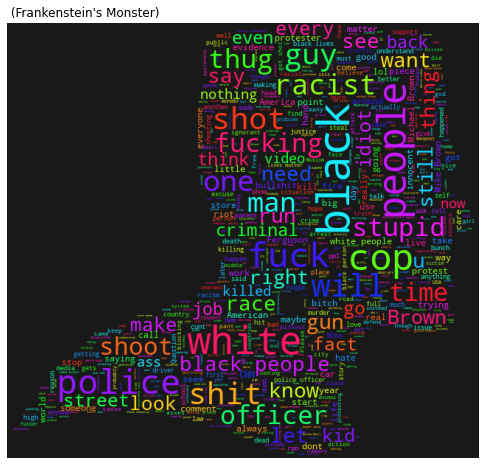

In [25]:
plt.figure(figsize=(10,8))
wc = WordCloud(background_color="black", 
               max_words=20000, 
               mask=hcmask, 
               stopwords=STOPWORDS, 
               max_font_size= 60)
wc.generate(" ".join(ffk))
plt.title(" (Frankenstein's Monster)", fontsize= 12, loc = 'left')
plt.imshow(wc.recolor( colormap= 'hsv' , random_state=17), alpha=0.9)
plt.axis('off')

In [26]:
#@title
ffk2_64 = b'/9j/4AAQSkZJRgABAQEBLAEsAAD/4QBWRXhpZgAATU0AKgAAAAgABAEaAAUAAAABAAAAPgEbAAUAAAABAAAARgEoAAMAAAABAAIAAAITAAMAAAABAAEAAAAAAAAAAAEsAAAAAQAAASwAAAAB/+0ALFBob3Rvc2hvcCAzLjAAOEJJTQQEAAAAAAAPHAFaAAMbJUccAQAAAgAEAP/hDIFodHRwOi8vbnMuYWRvYmUuY29tL3hhcC8xLjAvADw/eHBhY2tldCBiZWdpbj0n77u/JyBpZD0nVzVNME1wQ2VoaUh6cmVTek5UY3prYzlkJz8+Cjx4OnhtcG1ldGEgeG1sbnM6eD0nYWRvYmU6bnM6bWV0YS8nIHg6eG1wdGs9J0ltYWdlOjpFeGlmVG9vbCAxMC4xMCc+CjxyZGY6UkRGIHhtbG5zOnJkZj0naHR0cDovL3d3dy53My5vcmcvMTk5OS8wMi8yMi1yZGYtc3ludGF4LW5zIyc+CgogPHJkZjpEZXNjcmlwdGlvbiByZGY6YWJvdXQ9JycKICB4bWxuczp0aWZmPSdodHRwOi8vbnMuYWRvYmUuY29tL3RpZmYvMS4wLyc+CiAgPHRpZmY6UmVzb2x1dGlvblVuaXQ+MjwvdGlmZjpSZXNvbHV0aW9uVW5pdD4KICA8dGlmZjpYUmVzb2x1dGlvbj4zMDAvMTwvdGlmZjpYUmVzb2x1dGlvbj4KICA8dGlmZjpZUmVzb2x1dGlvbj4zMDAvMTwvdGlmZjpZUmVzb2x1dGlvbj4KIDwvcmRmOkRlc2NyaXB0aW9uPgoKIDxyZGY6RGVzY3JpcHRpb24gcmRmOmFib3V0PScnCiAgeG1sbnM6eG1wTU09J2h0dHA6Ly9ucy5hZG9iZS5jb20veGFwLzEuMC9tbS8nPgogIDx4bXBNTTpEb2N1bWVudElEPmFkb2JlOmRvY2lkOnN0b2NrOjFkMGYwNDA1LTBkMTUtNDBmYy1hOGRhLWZlYzAwNDRjZmFiZDwveG1wTU06RG9jdW1lbnRJRD4KICA8eG1wTU06SW5zdGFuY2VJRD54bXAuaWlkOmE1MDcxNDk3LTJmMmQtNGI3OC05ZjNmLTM3MWU4MDcwZmVkOTwveG1wTU06SW5zdGFuY2VJRD4KIDwvcmRmOkRlc2NyaXB0aW9uPgo8L3JkZjpSREY+CjwveDp4bXBtZXRhPgogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAo8P3hwYWNrZXQgZW5kPSd3Jz8+/9sAQwADAgIDAgIDAwMDBAMDBAUIBQUEBAUKBwcGCAwKDAwLCgsLDQ4SEA0OEQ4LCxAWEBETFBUVFQwPFxgWFBgSFBUU/9sAQwEDBAQFBAUJBQUJFA0LDRQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQU/8AAEQgA8ADAAwEiAAIRAQMRAf/EAB4AAAIDAQEBAQEBAAAAAAAAAAAFBgcICQQBAwIK/8QASxAAAQMDAgIFBwkGAwYHAQEAAQIDBAUGEQAHEiEIEzFBURQiNWFxdLIJFRYyVYGRk9EjQlJicqFDgpIXJCUzorEYNFNjc4PBtPH/xAAbAQEAAgMBAQAAAAAAAAAAAAAABAUCAwYBB//EADkRAAEDAQUFBgUDAwUBAAAAAAEAAgMRBBIhMUFRYXGBoQUTIpHB8DJCsdHhFCNSosLxJDNicoKy/9oADAMBAAIRAxEAPwDppQKBTFUOnE06IT5M1/gI/gHq17/o9S/s6J+Qj9NFvegad7s18A0w0RL/AKPUv7OifkI/TR9HqX9nRPyEfppho0RL/o9S/s6J+Qj9NH0epf2dE/IR+mmGjREv+j1L+zon5CP00fR6l/Z0T8hH6aYa+Zxoi8H0epf2dE/IR+mj6PUv7OifkI/TXrkSmYjC3nnUNMoGVOLUEpSPWTyGoTdG/G3NlUp2pV2+rdpUJr6zsmqMpBPgBxZJ9QBOiKV/R6l/Z0T8hH6aPo9S/s6J+Qj9NY3uX5WjZ2FVH6fa1Ku6/nmlcPXUGk/slewurQoj18OlCPlTeNYUNgdzjF/9UU4E49mMf31qdLGw0c4DmtbpWMNHOA5rb/0epf2dE/IR+mj6PUv7OifkI/TWSKJ8qLtpV4riV2fuJFq7YH/BzbanZKz38PAsp5fzEaZwvlOdmWH+qulF2bfqKSUfSe3ZDPWY7klsOc/bjQSxk3Q4V4oJGE0DhVak+j1L+zon5CP00fR6l/Z0T8hH6ao2xen30f8AcSciFSNz6M3KWcJaqnWU8qPcAZCUAn1A6vuHOj1CK1JivtyI7qQpt5pYWhY8Qocj92tq2LzfR6l/Z0T8hH6aPo9S/s6J+Qj9NMNGiJf9HqX9nRPyEfpo+j1L+zon5CP00w0aIl/0epf2dE/IR+mj6PUv7OifkI/TTDRoiX/R6l/Z0T8hH6a8FeoFMTQ6gRTogPkzn+Aj+A+rT/S+4PQVR92c+A6Ii3vQNO92a+AaYaX296Bp3uzXwDTDREaNGjREa+E41Bt5t7LO2BseVdl71hqj0hghtJUCt190g8LTSBzWs4PIdwJOACRz33u6Vu5nSQoUh2juyti9m2Iqp8+tzJCUV2qwxjPUNJPEhCuJIHDyUVDz1A8BjT2mKytvyuoOp3AZk7go808VnbeldT14DUrU3SA+UA292MuhVpRYVYv680py7RLWjiSuKe4PrzhCj/COJQGCQMjOTt3OnDvPe9YjU9i4rd6PMaVjyWlTkmp119J5hbyQ0oR0YGfPS3gZOSOesWTukjd1vRor+3UZdj2NFlLYhxIo/wB4lupbJL8t0edIdAUFkKPADwjhIHOJq2rkTK3V6lcde/4cmpNxZNZceDpV5S0XWZKyVEqSrLZV4cfPGNQy61S/ERG05aux6D+rjqo1bTLnRg8z9h14q1N397KFctTU3f1/Xhv3VWMjqos35pojWO3q0hKlLxjJUhCAe3J7dV/b9+UGZPelW5sdQ5jcZHJl1+fUOFauSC6FPYKc55cI4iAMjOvz2eplVj7pUCFSrdifPqKeh1yi1xXVoqasFwdUpXJK1sqSpOeRwocwrhMiibe1KtzLpplOoc+zLspKItQTCY42VsuOy247rSFDmWlBbTycEhKkKCTjWDo4Gf7shccK+IjA4VoCBTgEMEYH7jy4/wDYjoKDoowvfvd+65BpdLuOo0dvqS+xR7d4aY11YTxYaaYCOLzeYAySAe3UfgXnufV57SEXRc3WuFw9c7VJACQ3kuKKivkE4OdXpZeyNz3RuvuLacmey3VLXbbfplXaSGlNzA71sV4YH1XAXOIdiS6SBy0jt6DXlbNXFV4sUC6rXm1Wl1+kuoAWqJPbSgr4QO1t5JPLwPhrBj7C03Y2NphoPmGB5nBetZZm4MYNNBqoi70ht3Hdv5NFr1Vq1Yt95LZak1B51L7C1JJaU3IBCzlOTwKKklOfNxzCmzt+t1tqHlrgXHVGoqFN9dBqSjKjErTxpCmneJIKkgnkAcd+tI13a56H0gZNtSGFrpcqy3ZNOZSnzVSmaZ5FhI7OJOFY8OIaoO5W5VnDdG071Q3ULufMKVEcRlREpRT1nBy5/sXljswOHlrGzCw2kGNsbfEA4igpjnhu1WMcNlkBYIxQ4kUC/Ou9Ky6bkqzkqqUi3KxCdIUqmVajsS2UL/e6tak9chJPYkOHHccY1Z2xPSZo1t1lv5guWv7DVR1WS/RJC6nb7yz3vwHyooHrClAZ7tV9TNvaN9FYTwHzzGojUSozlwxky5c99nqIaR3kMNnI7lFXhzrSTt7Uk0t6eyw4Ux3/ACaQ2U/VdKkpSlB58WSvAI7eBR7NSBY7OKsgNwj+Jp0yPMFZfpIQLsPgI2YdMjzBXVCm9Pzdu0a+1RHp23O5shaEORozTj9CnVBCvqrjuOFUZ4KwcdWo5ORjIxrTHR76c1n723K5ZtXpdS273FZTxKte4k9W6+MZJjuYAdGOeMJVgEhJAJ1wZqlszHKAJkJ52bS4TsaLwpUVpTJfYLrgQByGC2oHHaU+rVw2JuxSrpoEixN3DUZtQoqyq3K7HmJZn055BwqL5QoEcCseZx5SlSQCUghSfC61WVoc494NcKO4jQ7xhxOSxLrRZmhzj3g1woeI0PDDiV/oWBz2a+65HbFfKFX1svSI0ur1le9m07DiGJNRcR1Fw0MKOEpkoUTxDtAUorQsjAdSfN11P2+v+gbpWZSbrtiotVahVRgSIstnsWk9oIPNKgQQUnmCCDzGrGKVkzbzD9xxGYU2ORsoq0+940Ui0aNGtq2o0vuD0FUfdnPgOmGl9wegqj7s58B0RFvegad7s18A0w0vt70DTvdmvgGmGiI18PIa+6jG6E6XTNtrrmU8kT49JluxyO3rEsLKf7gaIuT/AEjN6qN0gd+6lfF3vLlbVWTPk0a1qIObVWmsMrfkSHAcZa/ZJKvEKYR3qzja17iql0XPc1VuXr6rLr8FyQptxYSZjy3Q2wMnsQh5SV8PZhhI7Bqex7aerUDYuMgKeo9PpC67OaxkKQqruplOH2NtoyT3JGobV7lTAr9Fj/NSERY1SjzYE9CvOMVpXk6lEY+ostBY8FcXaFaq4Gl5faXYk1AGgDScuNKnfwCroG94507sSagDYGk5cczv4BS7b62V1R62UstB2ziZtTbbIPmSVITHW2vwBS2lQ9fFq3drei/Ml2VXrdqEhcai1arR3+udQhLr0JpSFBtKiOPJCSnlhI5HJ7Nei2aBFoDhiQ/2UZctx9KFOBtLZWriICj9VOckeGdXc/dELayypdz1GMifwgIajMFTAkOK+r1kp7KggcypYHYMJSoka5i2W6aR4bEcSRTkahaJZnk0bqpLXdsrWuRymO1CiRnZVL6vyCYkFEiJwEFAbdSQsAYHLOPVqW0uzXK3WfnCFTEO1FTPkvlfClKuq4+Pq+I45cXPHcdURtL0h5l73HLhXG5btLaEdclpNOYlMpSlK0oKesfcV1hBUnIKUHnkAjVixOkdRLQpIkSqqICjxcaAS2BhRAyvKcggA44sc+zXPy2a0RSd1JU02V14qvdHI111ynqtnhaVXrFUeNNg1OqKaVMKpPG651TYbbBCQcAJHZ4knv1XNw29t/Zl1uXvXq5SbQmvNmJJqEucWGqkgAYbWyAovlOEkEI4k4GSBqOXJ096BJjONJuzsQQ1wTEBtJx5uUNkk89UtW7ra6Tm8Vu0G1a1NhTqi1JTinsreew1HU4kDIQVpKgolKSM5znlqwsvZ880wDg4NIoTu2arfFA9zqGoC1FTqhZW4T0OtW9cVAu92lKWpqVSpXWPQy6koVxtqCXEBY5ecnhOB3gazlUthn756Se6N0VJs+Q06mobpyCOT0l2Bwtq9YQAo/1FPgdLbfu6j9GzdK7bdu5VSqlXo7kVMae/EWiQ2l6KFPtL4UrIQpSknq1KIyhJ7Rqd/wDjG2/qRZQ1U0QlF9HlHXHhUpoZ4gOIJ59g59xOt77LabDM9tnaSCKVzpUgmn+NVmY5IXkRg5UXj6Je1VKZ2LsyVUI6TMkVB2vhJ/xXAHGWVHx4EEKT4Eg69F/bbPUXe7b5UGK39CavMjR50NCMhiTDiSExiO4BTSyPa0NSa0937GmVmns0erQo9Dg00RojLC0lKVFScp4Uk4CUoSPx1Ebz6VFZta7p8WPQrZrdvxJRabfktSm1qKEBSiiSh1RC0hfMljgSSRzAJOMX6ya0yPYDiHYGuR+1QjRK+RxGteqoe49iq5txT4jENTivJJ1VjlKgoIfXHbcehv5PmHiS4pHI5ycap+97eokSgu9W7IF1MSg49GDf7NcRxvrA6VHtVlQHq+/XSSffDN0WNBrUZiZTWZbJWWX1jiZOSChakhTauYOCoBKhggjOshb/AMWnR7elVVcJCZM2RHiyH2GwkpYCsqwByHJIHL1auuzu0ZpJO7mGOXOqmQTucaOCqHZ67X9md1Wn6oww/DVHeg1GDKHExJjvMnLbg70klBx4ga6YfJT3G/aV935tzHfectSpUqBelAjvrKjGafSlLqM95BW2gnvLJPfrBHSOsRl19mfQyme6ZVSl1NbQyltfHHW0lJ70pYkRUD18Xjrc3Qat2RanTPpVvoWHxQ9pY0GY62coLvlLSlYI8FqI+7Vy+7HbGFubwa8G5HlWnNZPoy1Npm4GvLXr1XTfRo0as1YI0vuD0FUfdnPgOmGl9wegqj7s58B0RFvegad7s18A0w0vt70DTvdmvgGmGiI0puxgSrXq7JGQ5DeQR45bUNNtfy4kLQUqAKTyIPYR36Iv86lxXdItTazaeW3xlE21q1SneA4JQ7NlI7fUVA/dpDQIzlt7xUKh1GcirU5DCIbJUMpMWS2p1tB/PBI7iSO7Ut6QVEaolAuSy1oLU3bi9KjSo6T2rgSnHFoJ8eFyOo5/94aoZFbmJqsepKeLkuOptSHF88dWAED2AJA+7VdAwmF8RwNXdSSOhChWdpEbmHOrupJHQhbuFdpttYqVWnGnQ2POL6VpQrPcApXIH8T4A6Xbibg3Tu1t1UkWnZcpVuU1bc9dYqchaFPLaWlY6sOee6Tw47ANILItAOPwriuWQiv1p1CXm1Pt8UaGFAKAZa5J5A9p7daqsV4VqkrbeLkmK42WlFxZWMEfVwlIaR/SniPidcZPIyyuEgF4g8uQ14nyUB7hGQ6lSFRl2XrZm++7to09tb9vwIQcgLYtwM05PUy0ofjD9i0EoQXUBP11uEupJUn6ur6tPo97Y02U2iLY9vKkK5moXEHKk6T4lT6l5PqSj7tVbTOjTae385FduC4n3qZTpCZMRqdILceLwL42wBkJ809mQo9wIGp9TOmDSqe8uPZFHqFyzySFTqVS3JKifBLnCpKR7Me3Wdvtb7bKHWQuu0x0CTymZ1YiaarQru3sW0qC2uJUKXSsp81lilNwkY/lQhnjUPXgaxZ0rzVaZdVCq1PYmyVhiTHTJgMKdWhS2HW+PhCknGVp7CCAfu1akjePdm6F9YbHqhbV3VOptMnHrR1uR+GmdNrFxrSg1qiUyEk8yn5xSVJ+4gg/jqsilfZJ2zChppeB9So7HGJ4fnzVWdD36SNyLtrFUiTae5MVTWWZM6P5P5QpmOptaglSlch5oyT+GtmnbV68KH11fgW/Uo4RnM+kRZ7av9COIf31XtDut2hZkQExHnkji4+oRIcHqTnP9tRe6+l5S6bNKLmRU4Khy66bRpsZsexaeFI14+d9rndMGm8dBXZReF7pXl4GJSu/OjLtPWn1tTNv7Xb4lY8st/rYSknvOELTwkeBTrKFF3onULZuvbYW5Fcet+umS1GkuvB9KX5UkpSFZUohxLZAJ4EL8xWSdbTtzci1NxmFzqRNbqaeXG7CndapP9QXk/idRqRs5ZRuNqtNUZgzm3OuS6Wgkhec57/7HGpti7UfYi8TVdXLHLkVuhtJhJD6lZxrV93Xt2wxTr6obMqnMtBlFWoalOJYRj6q04DzQA7lhSfDOqu37uan1PakPU6azNjTJjTaXGFhQOOJZB8COEcjrUW6s9xMwRl4ySSEqCuQ8UpWCU+1Cik94B1i7pJ2fBokim1WA0mL5c44mSw0OFtbiQCHOEcgSFEH/wD3Vl2aY5pGOLbpzwyPLRSYKPcCRQr9o24FW2qsqs2xIjCozvL3BUpTg40tqU00I7IUefDmP1hI5HqmwDy1uv5KG5kXVunUahLBcqz9jsBx4nJPBVZKFfiA1+Guaku4qruLUIdOitojuKpzEWSQr/zIitqV1zpxzISk8/BIHPGujPyJ1oT5FR3GuuVxiJFiQ6LEKhy85bkhxI9mWz/n117mNdI12o+hr75Kwcxrnh2o/K6r6NGjW9bkaX3B6CqPuznwHTDS+4PQVR92c+A6Ii3vQNO92a+AaYaX296Bp3uzXwDTDREa+EZGNfdGiLiF8pjsFWofS3uWqUuMW6TcRpEhS8kID8oOMJzjty7EdJ8M+vWOLZgRYd6xqfWwGY3lCokrj/w85bJ9WCc+rGu3vyp1MRT+izWrohRWk1emVOkSBL4PP4W5f7ME9uAp5Rx/Mdck+lNQKTUq1Q9zLaa6i3b9YcqHkxGDEnIXwzGfucPEP6zjljUKWUsmbEcng0O8Y05ipHAqK+W5K2M5OrQ7xp5VPIrQFHhqp1JgRHFBS47DbKlJ55KUhJI/DVs2teUOmNturSp5aABxuvF1wDwK1lLTQ9SATrI1K3oqFYo1IpFs08VOuCG15ZNmHq4sVQSApSiSM8x2kgZ7M6vfafaOq1udHNdueo3RU3cKFKtxhAjt57lOAAf9R9muNtdmuNJmNN2vvjRV8kdB41aVVvyzqi+iRV6YxVZDZyyhTXlSWz6i4AkH+kH26Zt7m1SWhDFEsC5K0SP2bMJlKU47uaiEJH36tyz9gqBbTLUisSqZQHMZU2p1MmUPUVE4B9mpXVN1bd26iKTR+skIaHOXUpJZZJ9SQAVfh+OqKkdQCMN59AoPh2LLla2u3Y3AeU/M2erSYSjkM1O+DDZSP/ijjA+8nXkY6P4pC0Cq7WW1HdJwQm7n5Tg/6D/fVyjp4MtuIZqNJjReuWW2yoFaVnwGVDOe3GM6klE6Udvz19dLqEWEQebTEJppQ+93J1NfI9jQ1oLRuvU/+ltJcBSlPP7qpKZ0frfmNBTdpSqe93fN06WfvCkqH/bX8VDbq7dvCHqJDvaqwO1bEmrtLbHinglN8x7FjV9z+mFa0FrDXA+QMDMniUr/ACoSdVtJ6Y8C7K4mNS6DR5KlPdSqbUiVNtK7wck8x4cueBy1oAkdUklw31p1WIvHeoZT6HQLpm/OTtozbduBgcYfVFEOV/lfaUUOD1FRHiNPKlesKiJzUI1QiJH+I5EUpB/zIyNXDT75tyoUSpPXJQqeHY7QdadhNdT12VJQEDB+txLGOfPOvHc9t2POEyNS7rfosltxTSVyUcbBWklJHEU4IyCOeezUVzb9HVqOP3WoiuOiyPfVywq+4nyZBUEqKkuAcI59/LAV96UnxJ1mvpQPxm7VpTa0BctyUrqiT9VITlZA9fmD8daK6Q20dfozrlXo7zVMrKPORMprvW0qpjuS8ySQ0s4wFp5dx8RhXc+86ldU2MxUuvZfglxC4klA447hIC0heAVJ80Y4uY7CT2nruyoQ9zXsOAz2q1szQSCNEx2BZRLvuZG4ON9+gVltjAz+0NOkcP8A2Ou5fyedvUaldFGxqnSGghdap0aXMUAPOkNx24q//wCcf31xO6MlxRbDuuu3jMYbkN0OkrUlDoykqkPNRDy78NyHD92uyXyXFUNR6GNnNBwuswpVRisqPaW0zXSn+ytdLGSbTJhgA0c8SehCksJNokwwo0c8SehC1lo0aNTVMRpfcHoKo+7OfAdMNL7g9BVH3Zz4DoiLe9A073Zr4Bphpfb3oGne7NfANMNERo0aNEUH3q2you8G21Wta4Y5l0iUWn3o4OA6WXUPpQr+UqbSFDvBI5Z1wC3Ku2Iro1bU2r1CVz0Ln1brwObYXLkNLb9QPVNn7tf6M1gKSUkAg8iD36/zV78U9Ns3W/ZjiFNzbVqFTo7qFJI5JnOqSfv4z+Gok8IlfET8rq/0uHqos0XeOjJ+U16EeqtXo/bIQGbch3ZeUpxNJLZqLdPbZLmG+IpbWWwCXHXClXAnB4Uji7xiX3f03bfEFVDteJXragtHgEqB1bbiwOXnJUcfjk6r/pV1OvUG7k2hS5C41Ip8JDIjxFEKUyw0lvicI7E4QrCfUSe0azZjVPBZG28C1Wg1riBoAo8LP1DBNIa1xG6q0A50rq/RJgVTK5U63HWSXUVRpMZafDhWyvn96deeV0sKlKJWqhMLePYt6Y4v/wDM/wB9I7U6O9ZrcGM/LxEekp4kMuKwWknsKwMqKj/AB7VDs1La10brWsiCly7LuXRnlJ4giRwNOr9aWAFuEevGPXra5vZ7XXaVO78LcRCDSmKqm993LivxAYnSUx4IUFCHFTwNkjsJ5kqI9Z0ztbfy67YiJimQ1VI6RhCZ6StSB4BYIVj2k6jV3Um3qa+PmCuu1lkqweuhqYUkePM8/wC3s08222UuXdiHPdtxlqW9DUEqjFRDisjORyxges6sHNszYavADd4otxDA3EYL9rr32uq6oqopkt0yKoYW3ASWyseClElWPUCBrxWRvBcVisCLDfblU8EkQ5aeNtOTk8PMFOfUca/rcrZy4dp009NwttRpMwKKYyVErQAAfOyB2gjs0rs6j23U3z9IbgeozQVgBmEp8keJI7PwOjW2d0NWAFu4V+iAMLcBgrjpnTLrdLitMN0OPwtvJkAeVucPWJB4SEkHGCcj14PPGv5j9LW4auCxUq/U6JAQOFuLSozcjjT38S3lH+ydfvSejLbd60xyRaN2KrS0J4lCNwPrbHitjCHUj18ONQu7+j7WaDT5MqKnypUVPE6y2eIqT3qRyCsjvQRkDsKtVrWdnOddAAdvH3WgCAmlMVbFn9LGm0xxNPS9XHWXz1axNZbebdzywptBwQfUM6jvSWsOHUqCxfVKjlhSZCIk5rhUDwOJJYcPEAQQULQcjP1M89Zw1feyc2uX5RbisapSVzKdOjRkIbfWS8yevbW2pCj2pykDHdxgjv1lLZG2NwtMJpTPeNVjJH3X7jNM+GvRQew4pf23v7q08TqxTmEjx4pWcfigfhr/AEFdGHYaD0cNqY9mU+QuTEanTJjZczlCHnlOJbJPbwJKU57+HPfrg5t/Sks77I26gMqciVS84NORk8R6tqcpCQfHkoc/Vr/R2ns+/VtCK3n6OII8gpEWN5+hNR5BfdGjRqQt6NL7g9BVH3Zz4DphpfcHoKo+7OfAdERb3oGne7NfANMNL7e9A073Zr4BphoiNfw883GZW66tLbaElSlrOEpA5kk9w1/eqc6Ytbl270V9158FwtSmranBtxPagqZUnI9YCidEXPDf7pr350lLjuONZN8t7R7LUST5C7c4WpuXVHeeOrUjDiioAqS0gpAQQXFcwBhrfGy6BbVSptQoW4KtwTWEuyJMt6Mpp5twKAJcJWvjKiSc5zyOdR6pGr1CxrbjEk09uTKYgwmUkl13KFPOkDtUeNpHrDYHdqUdHK1fnzcouSo4dj0iI/NfZdRyyB1SAoH/ANxxH4aq3ukjLrQ+Twtr4QBQ6Ymla12EDTjBN9pMzn4CvhFKbM6VrXeNiuKp0Be7NPvS6HHVrqE6x6dOabZGVulDiUyUI5dpeYAPqcPjrN1sWldEqcqbRKZLfk06QApxloKLLqTkAg94xrYO30JdgUuFEZb6xFMefQwVJ4+OMt5TgChzJTheFepOT2alVL2eoFYuGVuJY9aiUhibK4a7b9XSVRW3+LK0lSebKskkZBSQvIIChikit4socynh+XZhgBhtHVR45e5bc005YLLS91N2PKW6dXLhr1uwl+a5Ii0/qnAnPPm0lKlcs9+k8+zLIhXD5RW9wZtThOL61xESiyU1KQnPZh/hbCldnEXFAHnhWuidS6NUSt0hyaxfdJtGOtJUtFSfblRsfyOIcbcA9ufbqpbs272+2Zpnlrdcpdx1qdhMV+DBJdkEnH7BslTqyewKKj6h3jbB2rCB4I8ToB+FsZaWfK3HcsZbx1+n1+4YqKPaQtGmMMhEaG64XJTjZ+qt5WBz4QkABIGB3klRmnRFolUrW4EtNM8sLjUYqT1D5bbCycArwR2J4sZ7OZ1Ibns1miU25LvuGG3TapGjrRTqJkLciOOeaHZa8nMglQPVklSeRVw4SDob5Ke2qdLqD0h9pLry3nFq4hkK4AOEH1cgfx1LtlsvWR7mjYN1Stssv7RIWS+ldSKlSNzerqImdauOlREl0uJ484VwZJwCAknHt79IdnLnpFIk1GnXHZaLwochHHIRGPVVCIBkFxhwA9gPNKgU9h8089a0+VHtqDTbhZkR2EtKRM6ttQGMAhZUker6v4DVP2KxBodcol3MUJu5KTWIaZFUoraP95Q42MOSIawQQ6g8SilJBIKu1JPD7ZLZSxsdTHEcwkcv7QNFW1ItCzXK/wCWUfceZTYrSusaK6LK+cmR3eayS3xDsyHQCfDXoqu8e5sKK8hu5qvVKWxhInzoYUR4ee6kqB/zZ1tClbI2hvS0itWPXbajJWQRMqrK3HWVd6VpCApCx/Csj79TqD8n5bMhbFXvS+VbhTUniRCRLZhwGP8AKTnHsTk951Ff2rZ34ysxGhFStZtMZ+ILlwbWrdVoMq51RnHYSpqIpfKf+c+4FKASAOZ805x460n0frbFF3ZsmSVKVGFFakyyr91AkBxAV6+FJHsRrUF7bH0y3xSKrX6tSZyae8tNs2TbbSlRUPkcIffdUAXnByxgBIxyzzJqas0mNb1SqVDgutt1tVJWy++2cojkoUwhCT38AW5juKkq9uos/aP6uMxNFKg9cOn1yWiabvo3MGoKypYMi7m957UuW3ZcWkXJUKsapSZs8oDLTofUQ45xgp4QpJ7QRyOunexXyiF+WLfdEsvpCUylin1t0MUu+aGpBiLcJAAe6slspyQCpPAUZBUjB4hzr6VFDj2zUbCjwEGPHTbwDQScEJTLkJHP2Ac9QCmV+oo2trNOdkKm0aRMZT5M4SfI5QBU08jPZxID6DjHL7tX0MskrWSxkXDhSmOdM69KYqUx73Br2EXcqc6Z/hf6btfdVN0TLom3p0Zdr61UlqdqEy3YK33VnJcWGUpKz6zjP36tnVopyNL7g9BVH3Zz4DphpfcHoKo+7OfAdERb3oGne7NfANMNL7e9A073Zr4BphoiNVt0k7WXe3R83JoLSSt+oW5UI7SUjmXDHXwf9WNWTr+VpC0lKgFAjBB7Doi4T7H2vCf2Nsi5UpS7NYn1WCpQGS2VLYWPvKU/gT46hmyaJMS8967fYPVXFMokx2mk/WcdYkok8KfWpCCfYk6uzcLbuo9G/eW/dkX1fN1FueaLjsGqvHhZRMySywpR5cK8eTL8CEnsUDqmNzao2zUbb3ws1HzdWqdPbi3FQnOTlPno5YWnt6p0JWjmMd3aSByBjkEs0D/mNWnTO82u6tRy3hUNx9ZYDnWo5m8OVajlwVrWZVafe9HplZp9bFuVFtaZkKprHGyw8kYWzITn6nNSTzGPwItT/ZdR69WW60+mp2LdTjaUO1C3pSm4swY7lDKHEHuSvuPfrNO6qU7TXLHvq0mjJsG6G2qi5Tf3UJeTlKk9yVA8bZ/mQQeRGHFo3PcdLpqaptvcflNCfOTQ5j6kNsK7SltQyWz/ACKBSO7ljUB8DpGCWF1Acq6bWn7HDgsgO8YJGGgPuhWsKdtnZFpONTKjCfumrNjiQYltxwsq8S7wBIPrA1U+9G7ZTUk0+Elq1pEoFrgp621VaSO9HXjJZSB9ZQwQM+cnUGkbxXIqCV3jUGaS0rzEQ2aiqS88ruAQhIznwHEfZqK35aj9SthkU6GuJcN1uGMJEwftWILeC8teM9WgZQgJHaVKHMjWqCykSB05r9PtQZ4IyLxVevdC2HuHpB0mO5AlR7W2+jhzyF1aeJ2pPJyAtDeR+z4sgKUQT5ysKJ1tDodWRbOx0JDVQlIFQZhNMOuMo4kIfCAHAeEZ55OCRzz7Nc/L130qlH2xthigVOFDq9JbRRp0R3hVIhKYQEBTTSwUlCylSi4ASDgeb3+axOmBUo6FfTBypTp6Rwt1mmOIbkLQOxDqDwpcx3KyCByPFyxPmsltnj8JF0HAa8Tt258Atz4pntwy2LoD0w9u7d31hVGPSn0movwnPJnX08DflOB5wyM4wlIJHZk6yHP2LrWwULqqtOTXrG8pbdj1aK4qLJpMonCVLIOWkqUeHrEqISVAqwCoGvL76ZFXdY6iyF1CkSHcGTWqg4h2Y4kcw02OaWkZ5nBKlcuYAxpjau9U+69oLkg1+pQZtzV/NEp8VkhMiX1pTxPSG0DhQlsjIWQCrOMHGdeQ2S22eMXyLhOWuOu6mefELxkUzG45bFo7byu2fJS5JqUmaKnxKZcmvMoYkIUk4U265HSglQIwQtOe/wBentzXF1CVfRus28ohIKH69LmyVg//ABpSU/8AfWf9vqC7VbIpFyuh6PcNvzl2pcrKHCA+Or6ynSnEjkrKEOMcZ7eBHPs1623KvWZdYhrmiltxX0tsSISEqdcSpCVhSg4FJHJWOXeDqFLY2iUm9l5e/QrW6IXs1LqhedRoTjtaqlbXc9xoaWliUhryOBT0EYUWQs8lEci84cgZCUczmvtuawK87Vqi06JyHHsSKkAQ2+6BybYB59U2nlxHmpSie86pe4rUuG47quqn1atzKnGobXWNqdXgLU4UhkcPYMlYJwOxJ1pW0LapdCq1l2mHExYZZkzpTh5dVCj4S46r1qUXlf8A1nU6aOOyxZ1JGg0Ar9NPVZylkDKk+wK/RQbfKnR650jNvrffbS+3R7ciKlMqGQFkOyiFD/7UctfjvntzBpWzFy3Uww3GdnVimwerbQEhbqESVqXgfvcK0g48NKrU3Ip9a3Fv3eKsM+Vzps3yC3bfbILst9eA0jA5htppLQUcdqgO041eWzVj1LpS7ybebWtlNStex5P0jvarM84781S+JUdB7CAR5Onx/aqGQnJ2wxWhr4IW/LS9y8TutBz3GmljJQIYhngXcvEetBzXVbYG0F2Bsdt/bbqC29SaBBhupPc4hhAX/wBWdT7Xwchr7rr1fI0vuD0FUfdnPgOmGl9wegqj7s58B0RFvegad7s18A0w0vt70DTvdmvgGmGiI0aNGiLI3ynexLW8XRirVViResuWzwa5T3m0/tEtoH+8oBHPBaBVgfvNo8NcgL+tudvPcFEuSgpZVOuCjJlVUKcDaTUGFdTJz/M4pLbuPF7Pr1/oylxWZ0V6NIaQ+w8gtuNOJCkrSRggg9oIJGNckd3fk1d49ptx6k/snFgXRZdSfMiNEnSmW3qapWRwKDyk54QeELSSSkAKGRziTxucRJH8QrnsP+AeS0Pjq4PbmK9fYVHbOx/9qPRertsTBmo2rOchlCuakRZWVN/6JKF+zi1RFAi3JYNVtiVQ5xjpuBCEoEj/AJKnAvgW24nvAVzzjOFDGtE7KbcXV0f+lTcu017rjrq9xURxt1UV0usuPrZEtlaVkDiIUlSez63EB46X77W9EpNpbUyYbXAE1QoKe8KQ+6tY/BSPwGuebL+ltkllcKh5vDZiCT/U0qqjk7i0Ps5ycajmCfqHKZ7TWNNuy5/+K0Gk0B5ppcio12M62ttmOgcTrpPCFpASFHme7tOpjM8o3Mq6JFAp62aZ1SGqdFcISpuKkHgUvPIEgFas/vLI1+F9xpdidGu0KY4rq6ruRVmoM5xX1/m9lAeebB/nVwJPqKh36tnb+mCi2zT31tBL0hTZKsfurSk6o7TKWN73U4DgPusZHUF5Zxv7otRLkmSZkyiSDNTwiTKpjvncZSD5wGQrkR52Pv1njdrYF+zktyaC3MqUVBU3KbUA460sH62EgZT3dnIj1639UNyhB2npt/M4ESQuJNm8CchDIcDUgf5eBYPgUnUkuHaSFU4YeMcsqbeS1ImRsBXCeJaCe7zspwrvGeetsHalosxHeZAkeWayZaXx/FkucG1uwS7mgvz7kTNpkc4TGZRhtxfishQOE9w5c+fhz0dt30WoNqyY9Vj0laVJeQyJc94qdPEoIy2nAx2/WwOXYdW+ixqXQ92LLtlhpyoSa5TqlKV5UoHCEKZabWBjA84u+d/KfDUi28vBvcO3KnVoTiX6cisy49Mf5cLkdlzq2nPWDwqUPVjWVs7RtMjb7cGmnWtPoV7LaJHC8MlXm2dpfR7eORQa42IkC7qaqhzlKwWg+D1sCVns811Bb4u4O+rSTdS0fo1ufGgIa6lyY6jjbxjC2oshSuX9TZ5asTeeKt+HAnNHgbDwYS4PrA5Wcj2EDUVuG51bv7o7L1v60isUSbUKhgY/bssPxHj97xUf82tEUj5WiY6Ag8gSPosGuLhf3KirYitVO9b840hTL0plpfj+yabxz9qjr8uknczdk1+sR2n0tVGVZFNpjKc+diS4p6QQPWhSwf69emgLNIqlaYPmyZdySEHlzLaUI4vuyR+Ol+921da306aFP28t12K1WJsKmwo7k1SkstlFPQ6orKUqISAFE4B9mriFgmtrGHK6T5XQsy3vLSxhyoT5XR6qlIdtT9u2alNkoBrK0NQ6YmOeJQefQFLUnHPjQ2rHqU4n1a7ydCTo4QujPsHQbdMVDdxTGk1CuSOEcbsxxIKkE96WxhtPqTntJ1lnot/Jl3ZS906ZuBvfXKZWHaG6l+lUKkqLjCnkniS68ShCQEqAUEJB4lAFRwOE9IezXVRtcBV+ZVy0EYnNfdGjRrcskaX3B6CqPuznwHTDS+4PQVR92c+A6Ii3vQNO92a+AaYaX296Bp3uzXwDTDREaNGjREaNGovcG6Nm2lLXFrl2UOjSUAFTNQqTDC0gjIJStQI0Rc2vlI6YLH6c+xF6MI6v5xEaG8Ry4+pmcCj+XJA9g1UF50ddxXrAt9bfWRaFelQawRkBJiscI/1r1ZPyt+8Nj3XWNmalaN20K5ahQ6hMekopFRalFhPFFUgr6tR4QS2rGfA6iW5Lwtfdi5g2pSDUq75ZEWnvW6w2rP3Bri/DXJdqtu2tjxmWu6ED+4qjtTf9Wxw1aemH9yk/TomMwtt9mKy1woYo1wuw8J7A0tIyf+nP36fRN0qdVIM236ZVqZSLjpdHRVWvnuQhmK60yGysKWojCT56FYPEnhUoZwMr+kdZzm42z71FjBL6aKsvFGMkPqj9W0E+JK3W/ZjVI7nbRoqE8w6gzFdrVOHUNPTULdY7sq4ApOQrkcnPs1S2cQTxRtlOLa+lFjGGPY0O0UZa6Rt21Cl3XYu19vJqlp1V1clbNegtS3KS68P97ajvBZb6pazkKIyT5yUoKjry0LpA9KLaWlQ6LT6tVG6VBYTFjw3oMaoJbYH1G8rQtZSBgAE8hgam2ylzV21KPSXjUo5DjSnjR00yMzHaKVcKgkoQFghWPO4sk6kF5XzfFwT0fNVdg0yK8455Q18zR5KWzwZBysFRJOAcnv1cm0XJDG2Nt3aanLDZn7qpZfR10NFPe5UPUL66QO7V3TrhmTKomuzKf8zrnpbbp5RC87ijtpQEBKFcashIyc8+3U2tPdbcTaCiUK179o7qdtoctp135hgxzMDCVcQZL3JSmuPC1BRBXjhKwCRqWO3huZ82yoDV605qYloOBMK34zKlAqOMrOcZKTzAyCM6cG8anXoU2lSavUJzEZ0x3RKfKlqJSleeIYPYsdmNYyWlzvC5jS3dWo3ioFNy8dITgWiid3tv7QrstqiQ4LsV+dVFKqqIsaQh7yCGhwgdepHIL4AokfxchywT7uiZRHq3WWJElsoValksRFIWP+XJqUxcsg+BDa2eX8x1B9ptkaTIrtWhxWC1DnqL017JU4lnACm+I5OCrOP6j4avuzWXNs5m/sR9vqZcyVT61HV2ZY6tIDafUhTTiceAGqmV0Mcb4YePmafQkdVFeWNaWMWdd06ILR3wiwVNlDcibVOJJGMOqS26n+yD+Grm6JNqi6flTr5qpQFN25SHH0qP7qzHjRUj8HV6rTpb3JFrW+VDk09IyavTitQ/eVIiKUv+x1a3QO3FtO2OmZ0havdVz0a3FOOCFFVV57UUPcMlQUEFxQ4iA0nIHiNXXZjSZ4nn+B6uaVtgBNojd/xd9Wrqdo1EqNu5Y1xy2otJvK36pJdVwtswqqw8tZ8AlKySfZqW66xXKNGjRoiNL7g9BVH3Zz4DphpfcHoKo+7OfAdERb3oGne7NfANMNL7e9A073Zr4BphoiNGjRoii26l4f7PdsrtunhSs0SkS6kEq7FFllbgB9pTrk/t10RXt1rapl53Fd1lUafX4bNXm1S64i6nUZ8qSOudWUFxCGm08aUJGMnhUT2jXUbpFW3KvHYHcmhQW1OzalbdRiR20jJW4uM4lKR7SQNcNKrc92SYVv1Kk7T0C66c9R4KGqu5bLk9Ti246GXEOOAlKloW2pJBGRgctQZ7t9gkNG460xwp64KHNdvtDzRuO7HCnqpZ01ejVRtnLGoFZpl+WxdTz9RVDciW/QmaepoKaUoLUpCiVjKMYPZn16le7VU+dYmzt8oWXINWiwlPujmEPKiqirB/pcAB9us07pV28pdvIaru3FLs+nLfTwyolpIpqlLAJCA9wBRyMnh4ueOzlqyejresK57RkbK3o55E1UFeWW1PeUEBiQ6ArqCo/VS6eFSFdzmP4uVX2hE25HaIsWsrWn8SKGnDA8KqHamtaGTx4hta0/ic/I0PCq2hsXdSLhiXwHyhT0tuPUWccxgOJSrH3FH4ah3Sxo6oFTixomW5M6Ew0HE9o6wo877krWfu1X21kur7eyJkGu8Ud5hMmC+4rzAUqSfOI/dwvBKT9XmOwAm2aw9/tao1jy3DxTYRTSKl48Kebbn3oGPaNcm5ggn7wfCFGoGPvjJVBPobFttCszHG4bUmPxNh0hCWo6VElZ7gFLKjk9uPZmLW5cc650yfoXadcu5kvOOLnxmQzFKyrmA65gHHIYHhrTFwbD0LcW80VC7Zi5FBjhvqKK22QweBIwXQDl3BzwoylI7VZ7tFWnXbTsGlMNRKOwlLSAmPEQ2hbwSOwqOA2ynwQgE+OsxbY7orid+Q9T05r3vm02lc92bd3BbnibN2nudlXVdQXIJZlpKOLiGQlQ7Dn8Tr9YcF6lViTNfp1QpbkkNl2LVYDjOXEeaFecMHKcJIyc8I1tbc/pVtWXFQ/VazDtmO8eGPGYR1smQfBtABWs/0pxpLSbkuy/aILhuCIqjUSUkfNcaqoQKjNTnm8tCR+zbx2JUT3knOE6OtbiwvDMOYB8yU740rTBVdb0Ji1adKu+E2tqkrpEiTJhuqP7JbSePAJ5lJ4VYPdqebrTIFest65Y7fC7ULah8awfrBWOHI8fPB+/UU3blsXBZkygR5iWY9Xj8E2cg5EaAo4dWPFa05bbT3qUT2JJ1BN8d1EW/sxSFoxEXV69Ap7MUHPUQ0q6zgJ7/2bbef6x4jUBrXyllPic4Dl7r5KK+8Q0jMkDqPyqsq8Jq6d57SEpwNQYjqK1U319jEWJGQ1xK/0OH7jqO9F/a+l9JvcbdGt1G67btFK5aZ7SLmpTc4PeUPPK4UcSk8HCAMkHnkeGvBvxecKwrPqlIiP9bdN0JQ1IUk84lNQc8J8C6oYA/hCyfrjVQbaLu206rXIVMsCBd8trgTMj1G3xVfJcE4I80lvOTkgjOB4a7js+NpYZJPhoAK7AcT50HLerWFrXVfJlSgrxxPnQcluCvdAmO02kxbj2/uWK8FtmVbrC6bUoLnAosyGQl1SXOFwI4kEc0lWOeCN59Abdyrb1dFiy7gr765Vfabeps+Q6credjuqa6xR71KSlCie8knXIjbq6LvjXtSatVNnLdt+k06QJ82rqtNyIiIyz+0WsOEhKFYThP8xSBkkDXUn5Lq259B6HdrSaiyqO7V5c2qNtq7Q06+rgPsUlIUPUoasoLvfPEZq2g1rjU+lFIhu964RmraDWuOP4Ws9GjRqwU1Gl9wegqj7s58B0w0vuD0FUfdnPgOiIt70DTvdmvgGmGl9vegad7s18A0w0RGjRo0RfNZQu35MzZe66/UqomPcFENQkuS3odHrLseKHFnKyhrBCATk4GAO7A5a1ho14QDmvCAc1x7+Uw6F+3PRt2dtuv2h89CpTa6iA785VNcpBaMd5Z81Q5KyhPMevx1mfpI7cfM1v27VozfA9TqfBiSuEYPCqM2pCj7FKI/zDW/vlqphkbYbZUNvnIn3C442nx4GCj/ALvDWdtxosC4N59w7YnpK6JETApzoH7o8nwtQ9afNI9aRqjt05gtEV3IBxPCrR6qvmk7udjRlRx6tHqqy2y6Q0LcilxqFej6WLoabEZmrvHDdUaA4Q2+o/VfA5Bw8ljAUQoAqsrYvcaZb8uZFmJW5Mo74p1UjnkpxvP7F4D+ZIyD/EFDvGsYXft3ULNm12BMSfLqJO8jloxy4VZ6t0fyqwef8yfHXqsDdut2Jd0OuJc+c0tMiHIhzFEtyouebKz247OE9qSlJH1RrRN2ZHJG79PkcQNOWwHphpgsHWUBh7rLQeg3bNnBdFLM38p01qYh9L8qKxNkR2pTQBXhDqk8K0kjmMdvhjXqvHfLyekuotiAZdUc8xp2oDgjsk/vrSDxKA7eEYzyHfqgrSdtG4Js24bIuVgwKl+3n23UnENTYkggZUEqKePwK2+JKuRIQeWnNQqzNOYLqkPSB2cMVHWK/seX365k2SHvKhp4HDkR7BUJrI3moHI+oTnaW26BA3NdvC9Jyq9VENpUJNTBX16+LKgQkYQnuCEgJSkADtOZ7vVvpXNwKgtmjhuLEkq4JEt0YKWB2Nttg8gewZPiT4HNNX3ypVJeWiSuPEKTjqes8qkH2pa8xHsLmfVpFM6UdEaGItHnySO9xaGgfi1YmwzyvDy0nYNPspXcvcbxFVpGvXJMu92n0qDHcENhKGY0NsZW4pKccSsdpwD6kjPrOsq9KfdCHX7goNt0Ge3OptstqLk2OriakT3FBTy0K7FJQENtJV2ENkjkdJr76TVwXRRpFFpEVm2aVKR1cvyRalypSD2ocfODwHvQgJSf3grVVU6kyqrLTHjt8Tim1vDPIcCEKWpXsCUqP3atbB2aYXiabC7Wg9Tyr7yzhsxviSQUpkPU9feTJECp3bFuCvSpLkpyGhD8l95RWtxTjiUDJPfzJ9idb+6O3RlsffPpo7wWhd4qSG4kBqqw/mycqIoFRY4slP1uTyeXdrNm2VhKlbGVlPVky60FPIGOZS2R1Y+8pUfv1sDYSvps35T+gPLV1TF62m20lXcomGlQ/FcPHt1vbaA+3Ni0AePK5+V6ZAbWxmlHf2/lachfJY7IsKQmYm6atEC0rXCnXA8plzBzhSU8ORy8da3plNiUanRafAjNQ4MVpDDEdhAQ202kBKUJSOQAAAAHYBr0Dnr7q8AAyVkABkjRo0a9XqNL7g9BVH3Zz4DphpfcHoKo+7OfAdERb3oGne7NfANMNL7e9A073Zr4BphoiNGjRoiNGjXzs0Rc3flMmDffSh6NtlBXE2mXIqL7Y/8AT65kk/6Y7ms3zXTUd0dz6kRkS7idSk+KUNNpH/c6vveKtm//AJTurSCrrYG3dphsq/dQ6torP35ln/RqiI7AbXLdJ8+XJdlrV/MtWT/+fhri+0Zr1uewfKxo5kk+gVBK+/bXt/i0DmST6BePdWwY95NUW6Q0Vty4yrYuDhHNPm5hyT6wpKEZ8eDWMZ9oy6fIrcV0Hy2kuYfax2t8XCVj1AlH3KzrpnZ0ZlZZkupDlFr7JgzW/wB1mUOQz4BR5g+KvZrKG/toq2x3Xp9elMh2nPOGnVRJHmutqTw8R9Smj+KNbOzLaQ4wHZhy09PJS7PKQbiy/oycYyceGpjuLYitvrtMN5K5FLcUHozyTjrmSewH+Idh9eD36WXtab1n1vyVSuvhyGUTIMoDCZMZwcTbg9o5EdykqHaNdW2RjwC05qyDgckh180adWhbTl11xmClXVMhKnpD/cyygcS1n2AHHrwNZuIaCSvSaYrzW/Q5Ny1uFS4gzIlupaRnsGTzJ9QGSfUNXft9ZqJ1m7qXjFZK4cSM3bNFGM9Y9IcbZyPX1Wc//LqO2LRzbFnV69ExltyJoVTqJHxlfE6SgrHicZA9itbQtDZtNqba2Jt3w4mpdFZqy0c+F0AlRP8ASpQSn1tp1QdoW4RAAbaeWLvQcyoU8wb75n7KCUijot+kQKc0nhZjR0NN+tKRjP34J1/W7Fwr2+v7o2bqJXhNJninTXPBtiUlXCfa044NTK/6YmFVlqaQlLXEW08PYeHCSE/yI81APeUq1Ft1LHqu7HRprdGolNkVit0GsR6rFhw2y6+424lTTgQgc1dvFgc+WuchnuWiGcnC9Q/+gW/UhVEj7kkUxyDhX/0C36kLtMghSQRgjuI8Nf1qHbNSarM2hsiRXYz0Otu0OC5OjyElLjT5joLiVJPMKCsgg8wdTHX0RdKjRo0aIjS+4PQVR92c+A6YaX3B6CqPuznwHREW96Bp3uzXwDTDS+3vQNO92a+AaYaIjRo0aIjXzX3Roizvvj0Z4FQRe942PRYzV+XFCRGqDgcKDOShIQnBUeFKwnlyACsDJyM653SaJPptaXSpcN+FUWXQ05FkN8Dra8/VKVY5+APb9+uzOoDudsham67Ta61T0iosgpYqTACZDY705IIWg96Fgp9XfqhtXZbZHvmiwe7OutBQcFAdZGX3SM+J2e+gosB2pbbtGDjS2hIodVSA8yM/7u8OxQB84JPZzwUEAHszqPdI7adrcKx5KcF19tjq3XCMqwOaHfWUK5n1FWta3V0dbht1HHSimuQ0DADXmPgDxQTz+4n2arObBkU59UeZHdivDkpqQ2UK/A64SRtpsUwfI0tI955Kod3kT7zhQrndTLZTuntUijVUeT1ykOrg9ermWX2sAE+KVJ4QfHt7hrx7X2nG3dteds/cy0Ui9qGp2TbM6R2FJ896Io97ZP7ROM4ypQ7CDrSqbCMxrvrNSoykx4dZjpW6wrkmPMa+osfyOIUpCh2gpQeY7K63N6Ocq5oVPuKhLkUu6KWUlLzP/mIjyDnHL/mN584EcwDyyMjV/H2jG/wh10E1B/iftmCNnFThO12FabNxWPJu0VYb+dKSqnvw7soaiJ1Id/5jzWeTzX8WM4IGQQUqGc6nnR2s6JVrauVcxKwqU6mnugearqgApaM9o4sgHvwNavsqRSd/IkaJelMNC3KoKPOlRMNuON9heYVjDjKs+c0oEJJ7BkHTIbAyYVYeMN+GiLKcDj8oI4HFEDGVIH1lY5Zz7dbpu1iWuhl8LveR1BzHksnWrAtdgVEdt9qReV90SfKipZte18SWGOABt+bjDSQP4WkjiPrUkeOtHQaYI86ZNcPHKkqAKv4W08kIH9yfWo6/Sg0NqlQotLp7KlJbTwIbQniWs95wOZJPPVoWrsLdFxlDkmOmjRFdrsz6+PU2Of441zLv1FvkpE0mmH+eJVcb87qNCzXuXQXJjhRFjqcccUhCQhBUVKPJttCQMqWSSEtp7MrWeZGNQ9EHoxVHbIO3XdJ6mtTGA2zSUkERUZzxOHvd9Q5JBPaTyuaxtlLcseY1UWmDPrDaChM+X5ymwfrdWnsbz3kcyORJ1PuzXbdndldwwOtGJ2aD8q4hs11o7zFHZr7o0a6RT0aNGjREaX3B6CqPuznwHTDS+4PQVR92c+A6Ii3vQNO92a+AaYaQUCvU1NDpwNQigiM1/jo/gHr17/pBTPtGJ+ej9dETDRpf9IKZ9oxPz0fro+kFM+0Yn56P10RMNGl/0gpn2jE/PR+uj6QUz7Rifno/XREw0aX/AEgpn2jE/PR+uj6QUz7Rifno/XREw146jR4NYZ6qdDYmtfwSG0rH9xr8/pBTPtGJ+ej9dH0gpn2jE/PR+uvCA4UKUrmohU9irLqWT80CIs/vRHVt/wBgcf21HZXRjttw5jz6lHPrWhf/AHTq0fpBTPtGJ+ej9dH0gpn2jE/PR+uq5/Z1jkxdEPKn0WgwROzaFTX/AISbccqDU16fJdktElD3UNBxORg4Vw55jlqR0/o42jDcCnkzpuP3X5OEn/QE6sL6QUz7Rifno/XR9IKZ9oxPz0frrFvZdiblGOeP1WIs0Q+Veeg2hRbXb4KVTI0HuKmmwFn2q7T950314PpBTPtGJ+ej9dH0gpn2jE/PR+urFrGsF1goFIAAFAmGjS/6QUz7Rifno/XR9IKZ9oxPz0frrNepho0v+kFM+0Yn56P10fSCmfaMT89H66ImGjS/6QUz7Rifno/XR9IKZ9oxPz0froiYaX3B6CqPuznwHR9IKZ9oxPz0frrwV6vUxVDqAFQik+Tuf46P4D69EX//2Q=='

In [27]:
fig2 = open("ffk2.png", "wb")
fig2.write(codecs.decode(ffk2_64,'base64'))
fig2.close()
img = imageio.imread("ffk2.png")
hcmask = img

(-0.5, 191.5, 239.5, -0.5)

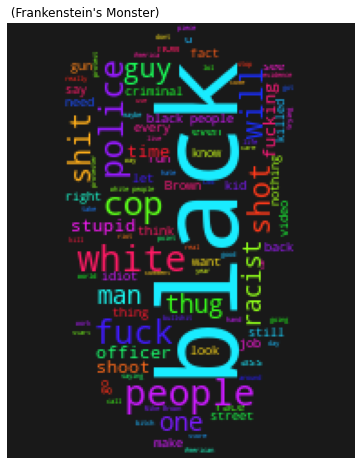

In [28]:
plt.figure(figsize=(10,8))
wc = WordCloud(background_color="black", 
               max_words=20000, 
               mask=hcmask, 
               stopwords=STOPWORDS, 
               max_font_size= 60)
wc.generate(" ".join(ffk))
plt.title(" (Frankenstein's Monster)", fontsize= 12, loc = 'left')
plt.imshow(wc.recolor( colormap= 'hsv' , random_state=17), alpha=0.9)
plt.axis('off')

In [29]:
#@title
ffk3_64 = b'/9j/4AAQSkZJRgABAQEBLAEsAAD/4QBWRXhpZgAATU0AKgAAAAgABAEaAAUAAAABAAAAPgEbAAUAAAABAAAARgEoAAMAAAABAAIAAAITAAMAAAABAAEAAAAAAAAAAAEsAAAAAQAAASwAAAAB/+0ALFBob3Rvc2hvcCAzLjAAOEJJTQQEAAAAAAAPHAFaAAMbJUccAQAAAgAEAP/hDW5odHRwOi8vbnMuYWRvYmUuY29tL3hhcC8xLjAvADw/eHBhY2tldCBiZWdpbj0n77u/JyBpZD0nVzVNME1wQ2VoaUh6cmVTek5UY3prYzlkJz8+Cjx4OnhtcG1ldGEgeG1sbnM6eD0nYWRvYmU6bnM6bWV0YS8nIHg6eG1wdGs9J0ltYWdlOjpFeGlmVG9vbCAxMS44OCc+CjxyZGY6UkRGIHhtbG5zOnJkZj0naHR0cDovL3d3dy53My5vcmcvMTk5OS8wMi8yMi1yZGYtc3ludGF4LW5zIyc+CgogPHJkZjpEZXNjcmlwdGlvbiByZGY6YWJvdXQ9JycKICB4bWxuczp0aWZmPSdodHRwOi8vbnMuYWRvYmUuY29tL3RpZmYvMS4wLyc+CiAgPHRpZmY6UmVzb2x1dGlvblVuaXQ+MjwvdGlmZjpSZXNvbHV0aW9uVW5pdD4KICA8dGlmZjpYUmVzb2x1dGlvbj4zMDAvMTwvdGlmZjpYUmVzb2x1dGlvbj4KICA8dGlmZjpZUmVzb2x1dGlvbj4zMDAvMTwvdGlmZjpZUmVzb2x1dGlvbj4KIDwvcmRmOkRlc2NyaXB0aW9uPgoKIDxyZGY6RGVzY3JpcHRpb24gcmRmOmFib3V0PScnCiAgeG1sbnM6eG1wPSdodHRwOi8vbnMuYWRvYmUuY29tL3hhcC8xLjAvJz4KICA8eG1wOkNyZWF0b3JUb29sPkFkb2JlIFN0b2NrIFBsYXRmb3JtPC94bXA6Q3JlYXRvclRvb2w+CiA8L3JkZjpEZXNjcmlwdGlvbj4KCiA8cmRmOkRlc2NyaXB0aW9uIHJkZjphYm91dD0nJwogIHhtbG5zOnhtcE1NPSdodHRwOi8vbnMuYWRvYmUuY29tL3hhcC8xLjAvbW0vJz4KICA8eG1wTU06RG9jdW1lbnRJRD54bXAuaWlkOjYxNDc2M2NjLWYzMTAtNGI3My1hZGI0LTkxYmQ4YzI4MGE4OTwveG1wTU06RG9jdW1lbnRJRD4KICA8eG1wTU06SW5zdGFuY2VJRD5hZG9iZTpkb2NpZDpzdG9jazoyOTU1OGYzMC1kMTBiLTQ4YjEtYTUwZC1hMWMxNTA3NjJiZjI8L3htcE1NOkluc3RhbmNlSUQ+CiAgPHhtcE1NOk9yaWdpbmFsRG9jdW1lbnRJRD5hZG9iZTpkb2NpZDpzdG9jazo1Mzg2ODQ4ODc8L3htcE1NOk9yaWdpbmFsRG9jdW1lbnRJRD4KIDwvcmRmOkRlc2NyaXB0aW9uPgo8L3JkZjpSREY+CjwveDp4bXBtZXRhPgogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAo8P3hwYWNrZXQgZW5kPSd3Jz8+/9sAQwACAQEBAQECAQEBAgICAgIEAwICAgIFBAQDBAYFBgYGBQYGBgcJCAYHCQcGBggLCAkKCgoKCgYICwwLCgwJCgoK/9sAQwECAgICAgIFAwMFCgcGBwoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoK/8AAEQgD6APoAwERAAIRAQMRAf/EAB4AAQABBAMBAQAAAAAAAAAAAAADAQIECgcICQYF/8QAdhAAAQMCAwUDAwkODw0DCQMNAQACAwQFBgcRCAkSITEKE0EiUWEUMjhCcXV3stMVGBojNlJYgZGWs7S11BYZMzU5VFlidHaVl6Gx0RckNDdDU1dyc4KSweEllPBEY2Vng4WTotImSFVmhKNFR2SG8VaHpMPE/8QAFAEBAAAAAAAAAAAAAAAAAAAAAP/EABQRAQAAAAAAAAAAAAAAAAAAAAD/2gAMAwEAAhEDEQA/APfxAQEFHnQaIMV87Y5A97dQOoQSmnp53tqQdRproOhQQw3Skq5TSOi0B5DiHI+hBV1TJRzepXM42aasOvMDzelBV80lQQ3h0b5kE0Meg5oJEBAQEBAQEBAQEBAQEBB+VjHGuDsu8N1eMsf4rttjtFBEZK26XeujpqenYOrnySENaPSSg80ttbtZG7D2YaiqwvlBebvnDiCmcW9zg2IR21rx4OrptGOGvjE2UIPMzPbtjG8Gzau81pyGy2wTlpb5OIUs4pHXavb5tZajSHX3IUHTzOvfG7zHaBqqi3ZmbcuYekpOtLa78+2wuB+tjpe7Zp6NEHAF7zDzdu9bJW4szDv1+bMdZX3C7Tzye75bjqg/Anv1jppHVcMBdUHr9L4Tr6SRyQfP19dNcKl1TOebj0HQDzIIUBAQEBAQEBAQEBAQEBAQEAAnog/cwnTRtZPXd1xyRjRg+1qgz6qvNPa9bzCx0kuobAwdfMP+qD5u4UNTQSNjqo+Eluo9IQRSTTShrZZXODRo0OdroPQgtQEBAQEBAQEBAQEBAQEBAQEF9PE6WVsbRzc4Aa+coPp5q+jw6yCgEbi0jynDw9P3UFZopaIm6WZrZGSDWWEHk79830oMKqxgO6PqWj4ZHD1zjrp/ag/Ce98jzJI4lzjqSfFBRAQEBAQEBAQEBAQEBAQEBA0J6BBl2u6VdreX05GjvXMcORQZ4vN+u7+5oowweJjb090nogycRTiks8dDUzd5M7TU+J06lB86SSUBr3NPE1xB84KD6DC+a2aOCKhtXg3Mi/2iWM6sltl4np3N9wscNEHP2Te+i3quQjohltt4ZiwwwkFlHdL++4wcvAxVfeNI+0g7ubNHbJ941ldUQUG0Nl3gfM23MIE0xoXWivc3xIlp9YtfdhQen2xZ2svdibT1RSYYzgu14yexBUODO5xjEJba558G10OrGjXxlbEEHpdg7G2DsxcNUmMsv8WW2+WiviEtDdLRXR1NPUMPRzJIyWuHpBQfqoCAgICAgICAgtkOgQQta6fi4XgadEGMHk1TaaQEEu0KCS4XKShmbDHCC3TXn4oLqhzZoGXGnPC9unPzjXQgoKuqpJ2BjWcOo8pBfBEGoJwNOQQEBAQEBAQEBAQRvl08UEMlQOgQWtpfVDO8lk4WlBQQT2z6dDIZIjzew9QPOEF5oqOedlwY7T2x06H0oLZNKicvHToEGRFEAEEgAHRAQEBAQEBAQEBAQEBBHNNFBE6aaRrGMaXPe46BoHUk+AQeUG9h7VZsq7FdVcsmdkekos2cxaUvgqa2mq/+wbRMOREtQw61T2nrHCdOWhkaeSDXp25d6JtxbxXFkmJtqfPW63mkExkoMM0shprTQDXkIaSMiMadONwc8+Lig6+IL4JXwStljdo5pBB8xQfWwS0ddTx3t0HHIyM6cLeJwPiNEH7GF8qtojG8xqsE5HYsvML/AFjLXhqqqBp7scZQfo1WxJtv3Kc1cuyBmiS8+GALjp+BQR/OKbbn2HeaX839x+RQPnFNtz7DvNL+b+4/IoHzim259h3ml/N/cfkUD5xTbc+w7zS/m/uPyKB84ptufYd5pfzf3H5FA+cU23PsO80v5v7j8igfOKbbn2HeaX839x+RQPnFNtz7DvNL+b+4/IoHzim259h3ml/N/cfkUD5xTbc+w7zS/m/uPyKB84ptufYd5pfzf3H5FA+cU23PsO80v5v7j8igfOKbbn2HeaX839x+RQPnFNtz7DvNL+b+4/IoHzim259h3ml/N/cfkUFPnFdtsddj3NL7wLj8ig/XtOwHtg19scH7I+aDajXmXYCuI4fNy7nmEE1JsB7X1vpxPedknMxzidA0YFuOg+5DqUGXHsMbY1rY642zZFzOdE5ussTcC3E6jzjWHqPMgtl2L9rN8wuLtkPNCSVo8kf3P7mSPtGHQIPw7rsUbb91qjUSbHmaIAGjGjAFx5D/AOCgxvnFNtz7DzNL+b+4/IoHzim259h3ml/N/cfkUD5xTbc+w7zS/m/uPyKB84ptufYd5pfzf3H5FA+cU23PsO80v5v7j8igfOKbbn2HeaX839x+RQPnFNtz7DvNL+b+4/IoHzim259h3ml/N/cfkUD5xTbc+w7zS/m/uPyKB84ptufYd5pfzf3H5FA+cU23PsO80v5v7j8igfOKbbn2HeaX839x+RQPnFNtz7DvNL+b+4/IoHzim259h3ml/N/cfkUD5xTbc+w7zS/m/uPyKB84ptufYd5pfzf3H5FBQ7Cu20Oux7mj94Fx+RQfQUGwDtc/Mxj6nZIzOLngEy/oEuI4T5v1Hl9tBi1e7723aN4qKHZKzMlDTqB+gO4Bw+13PNB+jLsO7X+IaZoqNkfM+KVnVpwJcA5p8Rzh6IIa3Yr2ybNbvmdbNkbNCR5B8oYDuJ4dep/UevoQfPnYW223H2HmaX3gXH5FA+cU23PsO80v5v7j8igfOKbbn2HeaX839x+RQPnFNtz7DvNL+b+4/IoHzim259h3ml/N/cfkUD5xTbc+w7zS/m/uPyKB84ptufYd5pfzf3H5FA+cU23PsO80v5v7j8igfOKbbn2HeaX839x+RQPnFNtz7DvNL+b+4/IoHzim259h3ml/N/cfkUD5xTbc+w7zS/m/uPyKB84ptufYd5pfzf3H5FA+cU23PsO80v5v7j8igfOKbbn2HeaX839x+RQPnFdtv7DzNL7wLj8igp84tttDrse5o/eBcfkUBuwttsE6HY/zQHu4BuPyKD6Sn2Etr61GGiOxxmbPLL65/wCgC4HTznnDyCD8/EWwjtiw1QFv2Qsz+LTWVjMA3Ehvp/UeSDEt+xZtz21znUuyDmjo4eU12X9xI939RQRVGw9txVcpnqNkHNN73dScAXH5FBZ84ptufYd5pfzf3H5FBR2wttssBc7Y9zRAHUnAFx+RQfN4o2e8+8DRmXG2R+L7O1vrnXXDVVTgf/EjCD5F7HxvLHtLXA6EEaEILUBB2C2Gt6DtxburF0eJ9ljPW62WkMwkr8NVUhqbTXjXmJqSTWM69ONoa8eDgg2Fd092q3ZX21Km2ZM7XNHRZTZjVRZBTVlRVE2G7zHkBFO860r3HpHMeHnoJHHkg9YYZop4mzQyNex7Q5j2nUOB6EHxCCRAQEBAQEFrpAEEU0o06oIqRr31HE12gaPK9PoQVmZBcm95SzDvYneS7zH+xBR1RSVTe5uEPDI082kHr6CEF0kkb2Cnp26MHoQSQw8PgglAA6IKoCAgICAgICAgo86DRBjOnYyXikGoH9CC24U73R+qKbny1LR4+kIKVETq+2MNM7UgA6efQaaIK2qOogp3tqgQ0etDv6UEVPE5re7a48OuumqDLhi4eSCYDTkEBAQEBAQEBAQEBAQEHymc2dGVWzxlhec587cd27DeF8P0bqq73m61Ajhp42+k8y4nQBo1c4kAAkgINYzfddplzt29bjdtnjZDud0wJk6Hvp6uqikMF1xRGDoXVDmnWCnd4QNOrgfphOvCA8oUFzGSSPDGNLnOOgAGpJQd+93z2bjeW7flNRYzpctWZc4Kq+F7MWY/bJSCeI+3p6UNM84I5h3C1h+vQew+yT2O3d45M01LedprGOKc2bywNdPTz1RtNr4/ECGnd3rhr9dMdfMg9B8id3VsH7M1vZbsjtkLL/Dwi07uoo8MU7qjUeJnka6Vx9JcSg5jt9tpaCFtNSUscMbRo2OJga0e4AgzGsDR0QXICAgICAgICAgICAgIKEgBBY6YDxQQSyl54W89fMgsdSV7XCaDhBHRpd1QXSRw3WAxyN4JWdQerT/YgUlPJQ0D45nDVxOgB+0gpT0406ckGVHEGjogvQEBAQEBAQEBAQEBAQEBAQRVDNQQgip+F4fSSjVrgUFGllqphDxmR56An/xoECaWGqjBMHl+c+CCsMGnMhBksbwhBVAQEBAQEBAQEBAQEBAJ0GqCB7i5wjB5k+KCKeCdsgYwFwd0Ph9tAktj3t5VGjv9XkgmZKZmmIvDJg3R3nHpHoQRsihoY3Na7je/1xPUoLoGcuiCcNAQVQEEVXR0tfA6lrKaOaNw0dHKwOafdBQcL547t7YG2laOWlzy2PMu8ROmBD6qswrTNqefiJ2MbK0+kOBQee21z2Ovd25zU9VeNmPGOKcpry/idBTw1Ru1r4vAGGod3rRr9bMNPMg8d94N2bneXbAlNW40qctmZjYJow58mLcANkqxBEPb1FKWieAAdXcLmD69B0DeySN5Y9pa5p0II0IKC1B6vbkjtM2duwTcLTs8bXVyuePMni9lPS1UshnuuF2E6B1O9x1np2+MDjq0D6WRpwuDZzyazoyr2iMsLNnPklju3YkwviCjbVWi82uoEkNRG70jmHA6gtOjmkEEAghB9WgICAgo86BBAeOWTgadPOgsqKSdo4ovKHm8UEdsqG97JSzDhc7oCgpS2ielrO+jnAZ/SR5kEtUWVEwDADw8tfOgkhhAHRBMBoNEFUBAQEBAQEBAQWSScPiggfUjwQRxFs9S1jufPUhAqLq+muBhlZ9LAHhz91BfNE+D++6KQBrubmHofSEAyz1A4XaAeICCaGENCCUDTkEBAQEBAQEBAQEBAQEHy+cWcGWuQWWF9zozixhRWDDOG7dJXXi718vBFTwsGpJPiTyAaNS4kAAkgINSrfmb8nNvev5vy4VwnVV2H8msPVzv0J4UMhY6vc0kC4VoB0fM4c2sOrYmnQeUXOIdAEHN+wfu9NqfeO5z0+Smy5lzPeK3yX3a7T6xW+z05OhnqpyOGNnXQc3OI0a1x5INmndQdmo2LN3fQ23MnNG0UuaeakTWyyYmv1CHUNsm01IoaV+rWaHpM/ikPUFmvCg9I2gNHC0AADkEFSAeqC0xg+P9CCrWgIKoCAgICAgICAgICAgICCOZ+gQRsiZPEeB/l+nwQQULnerzDMNHNadAUEVTXV9NXkEkt15NI5EIMmvaWTR1MXJ/MH0hAHe1DuKTw6AIMiKMNHRBegICAgICAgICAgICAgICAgIKPbxBBiyMcyQSN6g6oLqpkcz2vaOenNBdDAB4IJmtDUFUBAQEBAQEBAQEBAQEFC4BBZJKNEGJM9zz5AJPgAEF9HcHcYpathY8+sLhpxIMeSkrqW5Nlje54e/k70eIKCe4RMkqGnTmG80F8NOBoSEGQxnCguQEBAQEBBRzQ4FrhqD1CDzc3r3ZqdizeJUFxzIyws9JlZmnK10seJ7DQhtDc5tOQrqVmjX6nrKzhkHUl+nCg1l9vHd6bU+7iznqMk9qPLiez1vlPtN1g1lt94pwdBPSzgcMjemo5OaTo5rTyQcHoO/+4z35Obe6gzfiwriyqrsQZNYhrm/oswoJC91A5xANwogToyZo5uYNGytGh8oNcA21cnM38tM/ssLFnPk7jCiv+GMSW+Oust3oJuOKpheNQR5iOYLToWkEEAghB9QgICCjxq1BiyOdDKJB4IL5I6p1QyaklAY4fTA7p7qBO6gnl7ibQuHj5j7qCFwk4zEyoe5vpKCaCDTwQTgaDRBVAQEBAQEBAQEBBjTuAI4hy15oLqh9IyNomADHcmu8Agx32+WORtVQSh+nMNcev20Er5aKoINZBwvb7V7eY/tQJJTUaMY3haPBBLDEGjRBKBpyCAgICAgICAgICAgICC1zmsaXvcAANSSeiDV27T7vs63bYzpq9iXZ2xa7+5NgS5ll6rqGb6Xie7xEtdISPX00DtWxjo5wdJz8jQPI5B223Re6Nz93tG0CzLfLqKSzYPs8kc2OccVFOXU9ppieTGDkJal4BDIgfO52jQSg24dhvYR2bN3lkTb9n7ZlwFDaLRSNa+vrntD6y7VPCA6qqptAZZHenk0eS0NaAEHMqAgICAgICAgICAgICAgICAgEgDUoI3zAeKCCaYOGgQUhcymp310nPlyH/j0oDXQ3OMVNM/gmjPI+Y+Y+hBVtedeCopSHtKB5dS/jeOXgPMgyI4w0dEF6AgICAgICAgICAgICAgICAgICC10YPRBaIufRBeAAEFUBAQEBAQEBAQEBAQEFHHQaoIXuLniNp5nzoIKwvpz5ZJaehQXuqPUdvFUxmpdp/SgpS1MV2gdDNGA4ddP6wgU1bMyIwzN4ntOgd5/dQXRxue/vHnUlBksbwhBVAQEBAQEBAQEHDW3JsI7N28NyIuOz7tMYDhu9oq2ufQVzGhlZaanQhtVSy6ExSN9HJw8lwc0kINR7e67ozP3dMbQD8uMxIpLzg+8vkmwNjinpy2nutODzjf1EVSwEB8WviHN1aQUHUlB65dmC32dbsT500mxLtE4tccp8dXQR2SurZvpeGbvKQ1sgJ9ZTTu0bIOjXFsnLy9Q2iGua9ocwggjUEHqguQEBBBURahApSTG6AuII6EeCDHiptHaenqgyYoAByCCUADogqgICAgICAgICAgIIKhhIQWQNjqIHUkw1HgPQgtnq3xSCnpGBoZ11H9CC57pKrQOaAB5vOglhhDR0QSgaDQICAgICAgICAgICAgICDy97UTvWanYI2OBkHlFiI0uZmbdPPQUE1NLpNabQBw1dYNDq1zg7uYz9c97hzjQaoziXEucSSTzKDmPYM2JM5d4VtR4a2WckLb3t2v1VrV18rCYLXRM0M9ZMR0jjZqf3x4Wjm4INy3YD2Ecit3Ps0WHZlyEsjYLdaoQ+53OWMCpvFc4DvqyocPXSPI6dGtDWjk0IOa0BAQEBAQEBAQEBAQEBAQEBAQWykgIIYY2TPJeddPaoI56J728dJKHfvSf+aC2klYYnW6uZwE66B3LiCC+noaW3PM3euJI0AJQUDXTymR3igyY4w0dEF6AgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgoXAdUFj5Rp1QYsrnPeGxnmToOfigyJDTyaUNRIHPc3p5/SghY4UTfUVYOKI+seRrqPMUF0XqKkYfUg1LvtoKQwEnicgyWsDUFyAgICAgICAgICAg4U2/NhHIreMbNF+2Zc+7I2e3XWEvtlzijBqbPXNB7msp3H1sjCenRzS5p5OKDTS289iTOTd57UeJtlnPC2d1dbBVf3pXxsIgulE/UwVkJPWORmh87TxNPNpQcONJaeJpIIPIoNrrsu29YqNvjY4OQmbmIjVZmZR08FBXzVMus12tBHDSVh15uc0N7mQ/XMY485EHqCgICCjm8QQRGHnrzCC5kWnggkA05BAQEBAQEBAQEBAQEBBbI3iCCAMdFKHt+2gSMEsxeG/9UE0cQA6IL0BAQEBAQEBAQEBAQEBBiXi622wWqqvl6ro6Wjoqd89XUzO4WRRMaXOe4+AABJPoQaWW+Q2+71vId4FjraJkrpX4eFebVgile7yaez0znMp9B4GTypnfvpXIOraDa37LrupqPYW2M6faNzQw2Iczs3KGG4VhqYtJrTZyOOkoxqNWl4InkH1z2NP6mEHqKgICAgICAgICAgICAgICAgICAgtkGoQYoeYJw/w8fcQSCljpql9aZi1pGpbry186C0VsFSHMmpzw+Go11/sQRxU7S4lrNB5kGVFEAOiCRAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEEM0hA5eKCx9JM5nEHji8xQYhmfS1TDUMLQHc9QgluNskqpm1VNINdB1P9IQT1BLaUQzkPeRzOn9KCyCDoSEGUxgaEFUBAQEBAQEBAQEBAQEHl12ovdT0e3VsaVG0dlfhsTZnZR0M1wozTRazXazAcdXRnQauLADPGPrmPaP1QoNUhB2l3N+35et29vAsC7RMddKzDxrxasb0zHeTUWepc1lRqPEx+TM399E1BumWe622/wBqpb5Za6Oqo62nZPSVMLuJksT2hzXtPiCCCD6UGWgICAgICAgICAgICAgICAgICAgoWAoKCMBBcgICAgICAgICAgICAgIKOcGoPPPtN22lUbH+6mxlR4bu5pcR5lzx4RsropOGRrKlrnVcjdOfKljmbr4GRqDURa1zzwtaSfMAg7n7hDYGi3hu8qwPlVia1Gowjh6Y4kxsCwlklvpHNd3Dj5ppjFD7kjvMg3J6eCGmhZTU0TY442hscbGgNa0DQAAdAglQEBAQEBAQEBAQEBAQEBAQEBAQCNRogx6iLi8EFPJkpTFL1byH/JBbDT6dQgyGRho6IL0BAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEGPUtPCgtc6aopD3EhErOnp/8A5oL3Pa2ma25FhLuo05IInsbTtHqSpcGnowHUD+xBWKJzjxPJJ9KDJYzhCC5AQEBAQEBAQEBAQEBAQRVFPDVQvpqmFskcjS2SN7QWuaRoQQeoKDTY392wLHu8N5XjjKjDdqNNhHEMwxJgkBpDG2+rc53cNPmhmEsPuRjzoOl6Dby7Mdtnz7Ye6kwbSYku/qvEeWk8mEL06STikcyma11JI7XnzpZIW6+JY5B6FICAgICAgICAgICAgICAgICCj3aBBVAQEBAQEBAQEBAQEBAQEBAQQzv0BKDXW7Zvn3Hj7aJyw2VrbdT3OEcLT364wNdyFXXSmKPiHoipdR6JSg8UMP0Dqd9ZBUU4ErYwASPA6/8ARBsUdjA2UKbAmy1mJthXm2NFxxziVtjs872+ULfQN4pC30PqJnA+mAeZB7ZRSajVBIgICAgICAgICAgICAgICAgICAgIKOaHILDDz6ILms4eqC5AQEBAQEBAQEBAQEBAQULwEFpmGvggCUFBeCCNQgICAgICAgICAgICAgICAgICAgICCyVmoQY8JME/Po7kUFKyAuqeNx11HIeZBfDTjzIJ2sDR0QXICAgICAgICAgICAgICAgIPE7tpmyXTY22VMutsezW0G4YFxK6xXmoa3yjb69vFGXHzMqIWgemc+dBraIPbzsUW0rPhfabzW2UblciKTFuE6fEFsp3O5eq6GYRSaDzuiqtT6Ih5kGyAgICAgICAgICAgICAgICAgILZQSEFyAgICAgICAgICAgICAgICC17w0IMaofxHhAQah3aP8ANR+YW+GzfvnzTc91jutJYqWPXVvd0lJDE9mngO8Eh90lB0xt1fTXOH1XTtHeBujmnqPQfQg3GtyXlJHkLuq8kMv5rQKaqlwNTXWvjHjUV3FWPJ9Os+n2kHamLiceI+KCdAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEFHHQaoISQ+QR8WiCCr46Z2rtS09HIJKhzYAwN8R186C+Gbi8UEzXcQQVQEBAQEBAQEBAQEBAQEBAQEBAQCNRoUEUkIPUIKCLU6nmUErWhoQVQEBAQEBAQEBAQEBAQEFC9o8UDjHmKAHA9EHU7fnZIU+0Julc9svnULZ6iHAdVd6BpbqRUUHDWsI9OsGn20Glqg719mwzcqcoN89kxWx1RjgxBdKuwVY10D21lHNE1p/9oYz7oCDcRQEBAQEBAQEBAQEBAQEBAQEFHDUaIKoCAgICAgICAgICAgICBqB1KC18gA5FBjySuc7gYNSgifHUwyNmfCeBrgXEHXQINKjenVlfmLvFM7cYxzCR9VmpfteJ/VouEwBH2gEHBkNpNnFM6Kq0q5Zms4Rza/Ugaaeb0oN6XIzDMWFMmMIYUhYGR2vC9vo42Do1sVNGwD7jUH2TGcI1QXICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgsldoOqDFMclRJwxnT0+ZBeyZsrnW+s0LtOR+uH9qC+oFJG1jakHQDRriD/AMkFpNMNBBz18dSgmi10+0gvQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBBZK/QIIXmUxmUDkEFtM81EhbxDQDUoKxVGvIlB85nnhymxvkhjLBlZGHxXbCtxopWEcnNlppGEfccg0NaumdSVctK/rFI5h90HRBzluvMU1GCd5DkPiinkLHUmbmHzxA9AbhC0/0EoN4VAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBBRzg1BDLOG+KCKUzcLXcB0d00QXUJdwSuDPLadACgx7fdKmWq7ioGocdBy0LSg0gtvq411q24c346OrLWPzNvruDQEN1uE/TXog4nw5VVFdi22y1UrnuNwh5k/vwg31MIRhuFbXy/wDIIfwYQfpoCAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICASB1QWSShvigxpp+IcuiC6hf3kEndkB+pA9HLkgwoqKpmn4XRuaQebj4elBmySyCI00zQ53Ti848/uoKwQacygyGt4QgqgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIHRBj1L9AgjgqZYBxSMJi104vrf8AoglhpmRVBqYXDgezmNeWvnQWst4HNs+oPTkgwMT6foWujQ7UCgm5j/ZlBoV4sbpii5ADkK+b45Qcj7CDizbdyde06EZp4f0P/vGBBvSoCAgICAgICAgICAgICAgICAgICAgICAgICAgICAgHkNUGPPKQgslgayAyzzcBPTVBWhroHwsZJUN4ydND1QQyerqKuMzWOlZKeegQTCqpeMytpiJPHVoBCDRm286mWr23s4ZZjz/uo38e4BcZwg42wj9VVs98IfjhBvuYR+pW2e98PxAg/QQEBAQEBAQEBAQEBAJA6oLDKAgd96Qgua4OQVQEBAQEBAQEBAQEBAQEBAQEBBRzw1BC+fnoOZQY0tRxO4deZOnVBLV1sdsDY2xcRd156IKmZs1P6vo+TgPKBHXzgoDa6WRujYg0+fXVBWKEk8TuZKDIa3hCCqAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgEgcygilmDUGLJKHyBpPU6IK3iaSGNsEQ4WOHMjx9CCO1zTwxnvGEw66a/Wn+xBe+KHvyacaA+boggxPHphS5e983xCg0KcXfVVc/fCb45QcjbCXs3MnfhTw/+UYEG9MgICAgICAgICAgICAgICAgICAgICAgICAgICAgICCjzoNEGNI4CZrj0B5oK1VAytkbI+c8IHrQgjbb7VLrBERxAa6tfqQgrT1k0QME7eMsJHHr1QVYx00hlf1KDRj27OW23nD8KeIPyjOg46wj9VVs98IfjhBvuYR+pW2e98PxAg/QQEBAQEBAQEBAQEBBDNJw89UEdRHIyLvWu4hpqQEFtO9slM+fXmDp7iC6Go15EoMhj9eSC5AQEBAQEBAQEBAQEBAQEBBR7uEIMd73vd3cY5oLWCWnq2Me0EP1AOqC64wkUjvU8ALtdeXUekIImT0V1pwypIa8deemh9CCQCnpqf1NTHi16nVBdBDpzIQTtaG9EFUBAQEBAQEBAQEBAQEAkDqUFONqAHtPigqgICAgICAgICAgICAgICAgICAgtdIB0QQyVAHQoLIW+qZDxHyW9dEBotlW4wRuHEOhBIP2kFz6mIO9S10epHMO4dQ4ef0IKSTCRohgZwt9xBfDCB4IMXFgAwpcx/6Pm+IUGhJi76qrn74TfHKDkbYS9m5k78KeH/yjAg3pkBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBBR7w0IMd8xLuFgJPmQRzMlb5UjCB50Ebo+PyS7QHqgyIIIKBheDxPcOvnQWxxGRxe7xOpQZLGBo6INFvbt9m5nF8KeIPyjOg45wj9VVs98IfjhBvuYR+pW2e98PxAg/QQEBAQEBAQEBAQEFHHQIMWofqeEfcQBLNbw01JBjcdDoebSglbDTQxSOH6nJzIHMf0II2tt/BxRO5DwDigkhJP3UEyAgICAgICAgICAgICAgICCOYjQ80FlMD3b3MAL9eWv9CDF+ZVXUSGapqOE6+HM/wDRBexs9reOOUywvPMnq0oL5zSPj4YYmkuOuobogrDBpzIQZLG8IQVQEBAQEBAQEBAQEBAQUcdAghLnvdwxjmgiMzu8EbuTidNCgkkf3LwwnXkgkjlB8UEnVAQEBAQEBAQEBAQEBAQEBAQWSycIQY0kj3gua0kDqQEF8MUFXTNLSRoeZ8dUEVPUU9NXyUfMNdpw8Xn8yCkdmdFViaObyA7XQ9R6EElTwzVGreeg01QSwwgeCCUADogwMXfUrc/e+b4hQaEeLvqqufvhN8coORthL2bmTvwp4f8AyjAg3pkBAQEBAQEBAQEAkDqUDUecICAgICAgICAgICAgICAgIKOdwhBE+oA6lBDJU8uSCtC8vjlkiALxyaCgS1L6aIQTOEsz/agf+OSC3uHxuDJNOngglZAOuiCZkYaEFyDRZ27fZuZxfCniD8ozoOOcI/VVbPfCH44Qb7mEfqVtnvfD8QIP0EBAQEBAQEBAQEFHPDUEE04AIBQQ00rX1jWuPn091BDdo6l1VqWktOnBoEE9IKigia2bmx3Ro6tKBHEHvLmtDQT0CDKjZwhBegICAgICAgICAgICAgICCySQNHIoIJJweQQRtkexxdG7QlBRzK6sPD3p4fHTkP6EE1S1rIG0ocXEaa6oEEHiQgyGtDQgqgICAgICAgICAgICAgILJnaBBitmmbLrCwuJ6tHmQSSRxV7GzwO0e0+P9RQXT0hnlEgl4dBoRpqgoIzA7hMgPoQTMPLRBcgICAgICAgICAgICAgICAToNUGNPq5wZr1OiClbNNTMbBSREud4ga6IMeCO9U8fkMHCHa8BI19xBOYqO7RiR7SHN6joR6CgscwiQxxTPLPAF2qCeGHh8EE4AA0CAg/Pxd9Stz975viFBoR4u+qq5++E3xyg5G2EvZuZO/Cnh/8AKMCDemQEBAQEBAQEBBbI/h5aoIXzkc9PtoKMle8EhvJo1JQSRzA9CglBB6ICAgICAgICAgICAgICCKd+gJQRwiCojMROj+vpQWPNJb42mrPE53o1QXAwsiNfQgaaeW0cgR/yKAytpXnvmU54yOpaNfuoEYfK8yP8UGSxug1KCqAg0Wdu32bmcXwp4g/KM6DjnCP1VWz3wh+OEG+5hH6lbZ73w/ECD9BAQEBAQEBAQCQOqCKScN8UEE1ToOuiCsL446Z1bI3XTogU9ZTXMGMsLXt5jnzHpBQG18zHuhlhBLTpxA6aoB7yofxP6DoEE8cYAQSICAgICAgICAgICAgICC1zw1BY+cDqUGNPPxHTXqeSCfiMErKaGAu1Gr3nkAEENQ6J85bTjXhH0zh6BBWEPHNjiNUEjIPK1PMoJ2t4QgqgICAgICAgICAgICAgILXyBo5IMaonHTVBVkhgoHVMbdXEa/06IMGjnqvVfexAuc4+W3zoMypNPUNbMzUSf0+4UF0Ebj5Tv6UGS0aBBVAQEBAQEBAQEBAQEBAQCdOZQRySgDmgxpXhx1BQXm4PYznFqfPqgUU1bUTF8gAj06aIInxtfUvewdT4IMmGHh8EEwAHRAQEH5+LvqVufvfN8QoNCPF31VXP3wm+OUHI2wl7NzJ34U8P/lGBBvTICAgICAgICB0QY9Q/QIKQzQ1TDTSDRwHQePpCClLTzxNmgeddR5DvPqEFscFUz10f3CEE8bjr5XUdUEqAgICAgICAgICAgo53CEET5wOpQQySOlcGMGpPQILX2yq1EsVQGvHMckF2kdyjNJWR8EzP/Go9CCsNP6goXQPeHF5P9PJAp4B10QZLIw0cwguQEBBos7dvs3M4vhTxB+UZ0HHOEfqqtnvhD8cIN9zCP1K2z3vh+IEH6CAgICAgICAToNUEE03D4oIZo5xEZy3UDmR6EGS1kczGzOiGvDyBQYVHWRsdJQVsXdguPCHHlofBBNT0lFQvM8cupI5DiBQUYwyyGQjqdUGTHGAEF6AgICAgICAgICAgICAgo46DVBBI4F4YX6anqgsmpJu9AiPknqT4ID7fSykxNqTxjro4aj7SC8Tsc00lTLwSaaEg6a+kILWimpITBS8yep11QXwM0AQTgAdEBAQEBAQEBAQEBAQEBBQuAQRyTgeKCB8xkcGNPU6BBdILfARFUyDiPnJQV8m3t0OroXHl4lp/sQGTUkIJpYxqfM3RBbFEXO43dTzKDJY3hHRBcgICAgICAgICAgICAgIKF7QgjlmAHVBFE31RIeJ2jW8ygqxlJUxGSEkAH13PT+lBA3yuhQTmWaRgZyHnI8UF0MIagnAAGgQEBAQfn4u+pW5+983xCg0I8XfVVc/fCb45QcjbCXs3MnfhTw/+UYEG9MgICAgICAgILJJAAgxnO7+URg9Sgiuk8UPDTws0czmHjq1BPQVwrI+6kdwyAcyPH0hBb3tWx7oXTB2nLiACCaBhAAKCZAQEBAQEBAQEBAQRTv0BKCyNkNREWg6PHU+IQQUJfFcHQTjR3AeHXx9xBDUG409wL2lx1d5OnQjzIMq4s+nRSsOj268wgMY+V3HIST6UGTGzhHRBcgICAg0Wdu32bmcXwp4g/KM6DjnCP1VWz3wh+OEG+5hH6lbZ73w/ECD9BAQEBAQEBBR55aIMdmj6kB/uoI66mr6ybu2kNiHQk9UFrbdW0YE1PVl5YP1MjkR5uqCZs9DUtE8kbS4Do5upCCKGBpcS1ug15BBlxR8I5hBegICAgICAgICAgICAgIKOeGoI5JgB1QY0glnJETCT6EFaarnpXinr4y0E6MeenuIIX2menuLJ6ZxLS/Uknm3z6oJq6NstUDpzDdEEkMAHPRBkNbwhBVAQEBAQEBAQEBAQEBBRzuEIMeWY68LQSSgtpzHLM6GYHi05AoI6tsNvdFNxuJ4+fLqEFa+3C4FtTTSjmPE8iEEksYhom0r3cTtAgQQeKDIawNQXICAgICAgICAgICAgICC2R2gQQubNIwyM6DoPOghiinqQXN5AHq5BfTxyUUrm1JBjk0AcPA+YoL6ijkmLYWSBkLRza0cygtk7p0obE0aNGmoQTxs5ILwAOQQEBAQEH5+LvqVufvfN8QoNCPF31VXP3wm+OUHI2wl7NzJ34U8P/lGBBvTICAgICAgo5wagjknAHVBE1r6lxDToB1KChopI3tqIZeItPrSOqCs1NR3AiXvNCOR0PP3CEFJmwNa2CBo1afXDwQXww6c9EE7W8I0QVQEBAQEBAQEBAJ0GqCJ84byJQQTThwQI3tpKF9aG6uPT7uiBHJBdoA9h4JWHUEdWn/mEBtbVRkwzwt4h7YHkUFzWvmf3khQZDIw0dEFyAgICAg0Wdu32bmcXwp4g/KM6DjnCP1VWz3wh+OEG+5hH6lbZ73w/ECD9BAQEBAQEFHODQghlnA8UGO55LuIckFX1NbJ9LjdzPmHNBLSxy0cLpKmUuc49C7VBFBBr4IMuOMNHRBegICAgICAgICAgICAgIKOOgQQudxyCMu01QQVzX03l8y0+KC6aeSltrZ4BqSASdOmqClBVC5wPgqowSBzIHVBSlqaiKLuHeUWnRrj5kEsMRJ4ncyeqDIa3hCCqAgICAgICAgICAgICAgindoCgjjc2npnVbmlx06BBisfdp5/VUUIHLTmNAR5kE8MpqmGgucXDJp/xekelBR1IKFrW09Q8EnmCeqC6KJzjxPJJ85QZLG8I6ILkBAQEBAQEBAQEBAQEBBQvAQQTyjTqgxm3A0knlAlh9cEE9d6oqaMSW+X0+T1cEEdumlqqGRlUCQNRxO8eSC2nZNwhhkdp5uI6IMqGHh8EEwGg0CAgICAgIPz8XfUrc/e+b4hQaEeLvqqufvhN8coORthL2bmTvwp4f/KMCDemQEBAQEFkkgb4oMeao8xQVfRyPDSyQc/XHzIKUYMlPNTCQcYcQSD6OqCC1wV9PVlkjHBnPi16faQSTQtdWPc0DmUE0MAHggna0NCCqAgICAgICAgICC2U6BBFTtjke7j5kdAfMgimo4qoF1JOAR1af/GoQW00hp4zRXGLRp14XHm0j3UF8EVvoiZKc8TnDlo7VAZG6V5kf1JQZLGBo6ILkBAQEBAQaLO3b7NzOL4U8QflGdBxzhH6qrZ74Q/HCDfcwj9Sts974fiBB+ggICAgoSB1QWumAQQzTjwKC2J0cVM6rewv0OgAH2kF1U+PuGumj4JHetaOZ1QQtDuLToR/QgmMb5TxSOJQTRxhvggvQEBAQEBAQEBAQEBAQEFHODUEb5h01QYsgM0gjafXHQIMiSopRILfO/UuboeLx/6oIg51tHcTML4CfIdprp6CgubPTxsLaOLTi8QNEFYINOZCDIawNQVQEBAQEBAQEBAQEBAQEFr3hqCCaVp5aoLYqt0LeEs4h7vRBY+4Vk0gjpYQPd5oL7ixshjB9cNSgQQk+U5BksYGoLkBAQEBAQEBAQEBAQEBBZI7QIInd65hkaOQQQwOFROIydfEoLpbrTQVBpHRaNB0Lh0H2kCQC3TNlgH0qQ+UweB84QXyziUd1COR6nTqgvgi0CCYADogICAgICAg/Pxd9Stz975viFBoR4u+qq5++E3xyg5G2EvZuZO/Cnh/8owIN6ZAQEBBRx0GqDHlLnvEbT1KCOvmpaSHuDHxOcPuelBHSXeOKOOGWBzW9C/w91BebZLHVCqt87WNd1B6faQX+qqskxPDQQdCWoL4IdOZCCcAAIKoCAgICAgICAgICC2QahBiucYJxJ6efuIJHQUtLM+4OPNw8P8Al7qCyO4OlBEsA0PQaoKRQau4uEAeYIMmOPh6oL0BAQEBAQEGizt2+zczi+FPEH5RnQcc4R+qq2e+EPxwg33MI/UrbPe+H4gQfoICAgIIp5NASgjkge6HvYncR010HigtbRsLB6pm4S7oAQPtILogLf8ASppNY3O8h58D5igGGlZUGsfMXuPrQXA6e4gMJlkMhGmqCdrRpqQguQEBAQEBAQEBAQEBAQEBBBO8jl50FH0ZLOUvlenogxHPnoahktRGeEHm4cxogmrbYyve2phmA1HM9QfSglncI4BTcfG7QBxKCkEGnMhBkNaGhBVAQEBAQEBAQEBAQEBBQuA6lBa6UAIMeWUveGMPU6ILxHSNkFM95MhGvighmYIpTGHa6c/cQSQSyRsLWsB16FBVsTnu45DqfOUE7Gho6ILkBAQEBAQEBAQEBAQEBBQvAQQzyDRBbROlLnanyB1186CyaDuZm3GkHE327GnqPOECWlt1wcKkTaHx0OmvuoK1DmS8MUQ8lvRBJDAAOiCYAAIKoCAgICAgIPz8XfUrc/e+b4hQaEeLvqqufvhN8coORthL2bmTvwp4f/KMCDemQEBAQWPeNNEGO6QslEg56FBdJNb+Lv5GAu08W6lBWnqo6/jiNOeAD23iggp3TwgwRyHhBIaEE8MGnMoJ2tDQgqgICAgICAgICAgICB1QQVEWqC0Oa6mMMg5jkECGDTmUE7WBqC5AQEBAQEBAQaLO3b7NzOL4U8QflGdBxzhH6qrZ74Q/HCDfcwj9Sts974fiBB+ggIBIHVBY6UAIMaeTiPCP6EEcctbRv7x9O4xH1wA6elBW5UYuETaulk4iG8m69R/agvLJPmW2Kp9edOvu/wBiCkFONOiDKjjDR0QXoCAgICAgICAgICAgICAgIMepadEFha+rpCxjyJYz5LgdOfggkfUNpIWx1cnG8jnoOqCGVlONDSOc3i5kMJA+4gvhg05kIMljeEIKoCAgICAgICAgICAgIKOOg1QROLnv4GdUED++MvcBp4vMEFH0lZE9s7Q1wa7UtaeeiDIe0yxOmoSwPkA8t3mQRep46WDu3O45HHUuPXVBJDHy6IJg0BBVAQEBAQEBAQEBAQEBAQWvOgQQfTJn8LOg6nzIIaoTQDWRh0+u8EF1IW1lBJAx+jjqD9tBS1QV9M90UzdI/SfH0IEsUTqlxiYAPHTxPnQTwwADognA0GiAgICAgICAgIPz8XfUrc/e+b4hQaEeLvqqufvhN8coORthL2bmTvwp4f8AyjAg3pkBAJA6lBHJIAOqCFokqHENOgHUoEtK9jeNruIeKCENa4jibqPMgyHSsbH3VMzQefRAghA6hBOAAEFUBAQEBAQEBAQEBAQEBBRzQ5Bb3PjoEFzWhqCqAgICAgICAgINFnbt9m5nF8KeIPyjOg45wj9VVs98IfjhBvuYR+pW2e98PxAg/QQEEUz9Bqgjmif3PesdxctSAgstrmyufJ1LdAAgipbxM+q7meMaOdoNB60oJHF1BWEQt1jeOIs8x9CC4l9Q/if08AgyImBoQXoCAgICAgICAgICAgICAgICCyVmoQY8RME+vgeRQUqYGmpLwdSevoQSQwAeCCdrQ0IKoCAgICAgICAgICAgIKFwHUoLJJAAgxJah0Tu8YdCOiDIpqtlZEXQkNkA0IPPT/ogxKKouEdw9S1Ti7XXXX+sIL5mPjrH9zI5rSQSGnx0QSxQuJ4nkk+lBkMbwjoguQEBAQEBAQEBAQEBAQEBBbKCQgx4pTFUaO9a46ILmPrG1joHxh0RGoefAeb0oKeo6bvjJSSCORvruDp9sILDNUyExukBHnaOqCWGHTwQTgADQICAgICAgICAgIPz8XfUrc/e+b4hQaEeLvqqufvhN8coORthL2bmTvwp4f8AyjAg3pkFsj+FBBJM5o4gOWumqCF0ksuvdsLvPoEF9HrNTy0zy5j9efLmAfFBV0c2ooKWIsjaPLkPigGJjJiyM6gIJmRDzIJA0BBVAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEGizt2+zczi+FPEH5RnQcc4R+qq2e+EPxwg33MI/UrbPe+H4gQfoEgcygsdKB4oMeokBGgQVilbRUvf1Lzo48h5kFHxGnk9X0Q4mOH0xgPUecIKtmt0j/VLY9X9fW80FNHVEveOHuD0IMiOIAdEF6AgICAgICAgICAgICAgICAgIBGo0QRvi16hBRsOh6fdQSAABBVAQEBAQEBAQEBAQEBBRx0GqCIue93BGPtoMWecxuLJORHgglqJ4LbE0yRcTnIKOEVVD6voTwyN8dOvnBQXsro3xiQR/TNNNNOn20FIoy53G88ygyWMDQgqgICAgICAgICAgICAgICAgoRqNEGNUx689EEneSS0hMbtHgaEoMWCn0Oo6+dBlRQAeCCUADogqgICAgICAgICAg/Pxd9Stz975viFBoR4u+qq5++E3xyg5G2EvZuZO/Cnh/8owIN6YkDqUEFRJoEFkFVDJ/ek+nMaDXxQW19XJbI2Mp4AW+LndEFXT+q6IVsPkPZ0/5j3EFGVdVKzQhoJ8WhBJBFw8z1KDIA0GiAgICAgICAgICAgICAgICAgICAgICAgICAgICAg0Wdu32bmcXwp4g/KM6DjnCP1VWz3wh+OEG+5hH6lbZ73w/ECDNmdwjqgijhM7S9z9PNogxqynqoQS1nE3ztQSNZDdqBsYfwuZp9ohBfRUz7dA4TT8QJ5NHQILI4jI8v0A1OvIIMqOMAdEF6AgICAgICAgICAgICAgICAgICAgICC1z2saXvcAANSSeQCDh+n3g2wpWZl/3GqTbGyykxX3/cjD7Mb0JqjLrp3Yj73Uv15cPXXwQcwtIcOIHUHogqgICAgICAgICAgoSB1KCySQadUGN3kvfjufXE6c0EtdSR1rCxrwJGjkdenuoI/pFwg9S1nkSs9cCeYPnHoQXRxQ0FOYYn8TnIKQQeJCDJYwNQXIMa53S22ahkul4uMFJTQt4pZ6mZsbGDzlziAB7qCDD+KcNYsoPmphbEVDc6Uu4RU2+rZNHr5uJhI1QfoICAgICAgICAgICAgICAgskZxeCCMRFoLWnQHqgvjiAQSAacggICAgICAgICAgICD8/F31K3P3vm+IUGhHi76qrn74TfHKDkXYT5bbeT3wp4f/KMCDeefOWji0OnnQRxg1MvBxaaDU+hBV1LbKh5pxJ5Y8z+aCsbyHG3V2jtR5Dz7Yf2oKyCKGEUdOOQ6oL4IdBzQTAABBVAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQaLO3b7NzOL4U8QflGdBxzhH6qrZ74Q/HCDfcwj9Sts974fiBBmTt1CCGmeGyGB48l46FBdTMnpGyOqajWMHyNeoCCwmhqAZ4yWP87eTv+qCyOOSQ6veXeklBlRRBoQSIPhdpHaJyo2TsjcTbROd+KIrRhfCdrkrrpWSnmWtHkxsHt5HuLWMaObnOA8UGqxtkdp53pO0PntdMfZMbQN1ywwkyse3DWEsNxwNbT0oceA1Ejo3OqJS3QuLjw6khrQEHpN2dftJGZO11mrT7Ee37iG21OLrrCf0BY4ZTR0jrtO0auoKljA2PvnNBdG9obx8JaQXFpIe3aAgICAgICAgICAgICAgICAgICDw47WJvorrk1h4btfZgx1LRYnvdKyozPvdqqiyW3UDxrHbWvadWSTAh8mh1EXC3/KHQNc1ssjJBMyRweHahwPMHz6oNk7spe+muW0fgY7u/aex1LW45wtROny/vd1qi+a9Wtg8ujc9x1knpxzbrqXRf7Mkh7VoCAgICAgICAgHkNUEEsjgdG8yUEc0dQxvEW6jx4fBBFQVDHVnC7lq0ge6gsmpLjBcjU0zS4Od115aeYoMm4RxPDS5g7zzjzIKQQeJCDKYwNCCqD8fHmOsIZYYJu2Y2Pr/AE1qsdit81fd7nWSBkVLTxML5JHk9AGglBqCb6zfS56b0XaMvQs+N7vasobRXyU+CMGwVT4YJKdh4RWVUbTpLPLpx+VrwBwY3TQkhxFu3N5ltL7s3aEs2dGSONrh8y4a2P8ARPhGStf6gvlFxDvIJoteHiLdeCTTiY7Qg9QQ3Jtkjalyi209nbC203kdiFlxw7iu2Mq6R5cO8p39JaeUD1ksbw5j2+Dmnw0QclICAgICAgICAgICAgICAgaDzICAg+G2j9oTKvZSyOxPtEZ2YmjtOGMJ2mWvulZIefC0eTGwe2ke4tYxo5uc4DxQahe8m34u3LvCc7rvjWszsxNhLBYrpBhXAuHL5NR0lvpA4iPvRC5vfzFuhfI/UlxPDo3QAOzO4L7RJntsl5+2bZ/20c57zirJ/EtQyhNxxLXPq6jC1Q8gRVUc0hMnqbiIbJGSWtaeNoBaQ4NoyhraS5UUNyt9VHPT1ETZIJ4ZA5kjHDVrmuHIggggjrqgyEBAQEBAQEH5+LvqVufvfN8QoNCPF31VXP3wm+OUHIuwr7NnJ74UsP8A5RgQbz9NI2qidC9nJvLXzoIaZjqCsMcx8iQaRv8AT5kFjrNM2sE0MoDeLUEnmEE1aGyztA58I5oL4YNB0QTtbwhBVAQEBAQEBAQEBAQEFrXhyC5AQEBAQEBAQEBAQEBAQEBAQaLO3b7NzOL4U8QflGdBxzhH6qrZ74Q/HCDfcwj9Sts974fiBBnvGoQYs8ZDuJvUcwUF1W1tTTteTpoeiC2Cn5cwgyGRADogvQWue1rS55AAGpJ8EGrt2o7fQHbYzyfsU7PeKzLlZl5dHC819FNrFiO9RktfJqOT4IDxMj8HP438xwEB5HIP0cL4nxDgrElvxhhO91FuutqrIqu23CjlLJaaeNwfHIxw5tc1wBBHQhBuA7hLe3Ye3qex/SXjFNypoM0cFRw23MO1RkNM0vDpFcI2f5qcNJ5cmyB7egGod6kBAQEBAQEBAQEBAQEBAQEBB1R3xm83wFur9jS958XuSnq8VXBr7bl/h+Z41uV0ew8BcOvcxD6bIfrW8PVzUGmpmxmnj7O/Mu+5wZp4mqbziLEl1muN7ulW/ikqaiV5e9xPunkOgAAHIIPnEH1WSuceY+z1mzh7O7KLE1RZsTYWu0Nxstzpn8LoJ43BzT6Wno5p5OaSDyJQbl+6K3l2XO9L2ObHtC4UNPR4hp2tt+O8PRyautV1Y0d43Tr3T+Ukbj1Y4Dq12gdo0BAQEBAQEBAPQoMWoLmPD29R0QVqaioZGyppWcYJ0czRBWekpqjhdM0MkPQtdoQf+aC2SWspyIzKx/74t5oKRxvkdxyHU+lBksZwhBcgIPAHtdG+D1Lt1ps/Yr/zVXm7caKf3JILTq3/AHZZR/s2H2wQeAKAg9YOy9b5F2wttDjZFz5xSYsqcy7kxlLV1c30rD16foyKo1PJkM3kxy+APdvPrXahtNNc17Q9jgQRqCD1QXICAgICAgICAgICAgICAgICDWM7VdvkBtY51u2Btn7FXe5dZe3MnFdfRT6xX6+RktLNQdHw0x4mDqHS8bvasKDx2QEGxz2ULfVf3YcH0e7M2mMWceKcO0TjldebhP5V0t0bdXW1znHypoGgmPxdEC3/ACfMPcNAQEBAQEBB+bjF2mFLn73zfEKDQpxNS1FViy6MpoXPIrpiQ0a6DjKDkLYXYWba+UHEOYzRsHL/AN4wIN5mYystPFS66kakt6+lAt9SLnTOgqo9SB5TtOR/sKC1vfxvMLahzmg6AkoJ4YNOenNBO0aBBVAQEBAQEBAQEBAQEBBhw1Hn5oMpj+LxQXICAgICAgICAgICAgICAgINFnbt9m5nF8KeIPyjOg45wj9VVs98IfjhBvuYR+pW2e98PxAg/QQWPjDvBBYIdD0P3EEjGcKC5AQeR3ajt9D85Pkc/Yp2e8VCLNPMO1uF5r6KbSXDllkBa+TUc2TzjiZH4tZxv5HgJDV2c9znFzySSdST4oP3MBZa5hZp3eosGWuCrpfa6ktlTcaqktNE+eSKkp4nSzzuawEhjI2uc53QAIPwUHY7dZ7xfNPdg7YGHdpfLqSeqoIJBRYvw82XhjvNqkcO+p3eHEAA+Nx9bIxp6aghucbPGf2Vu1LknhnaFyVxNFd8L4stMVwtNdEesbxzY8e1kY7Vjmnm1zXA9EH2yAgICAgIKFwCChkAQA8HqguQEBAQEBB+RjjHGEstcGXXMPHmIKW02Sx2+auu1zrZQyKlp4mF8kj3HoGtBJ9xBp0b8PeqYt3q22ZcszKSrqabL/DbpLXlzZJSQIaFr/Kqnt8Jp3ASO8QOBntEHTFB2ow7uhNsDEu7Uue9FtuEC7Alsv4ozRGJ/qyagGrJboxunOmjm4Yi7z8TvWsJQdV0HdXcY71zFe6o2yKHH1xqqqpy5xU6K2ZjWWElwfSF3kVkbfGanc4vb4uaXs9ug3EcE41wpmPg615gYFv9LdbLe7fDXWm50UofDVU8rA+ORjh1a5pBHuoP1kBAQEBAQEBBDUR6hBbRPLXGF3uhBBPFJJUkynUg8vQEE0UGp1dzQTsYGoLkBB0533G9MwjurNi+65sR1NNU48xAJLVlzZJiCam4OZzqHt8YYGnvH+BIazq8INOHHmOsXZn41u2YuPsQVN1vl9uE1dd7nWSl8tVUSvL5JHuPUlxJQQ4TwriXHeKbdgnBljqbnd7vXRUVst9HEXy1NRK8MjjY0cy5ziAB5yg+/wBsLY9z72FM9rps47SeDHWPFFphhmmp2yCSKaGWMPjlikHKRhB04hy1a4dQUHF7XFpDmnQjoUG0l2XDfIt23tn5uxrn3ioTZp5bW1jbbWVk2suIbIzRkc2p5vmg8mOTxLe7f1LtA9aUBAQEBAQEBAQEBAQEBAQEHmD2mPfFxbu7ZgdkBkriVsebmZdBLT22Snk+m2C1nVk9wOnrZHeVHD++4nj9TQao0881VM+oqJXSSSOLnve7UuJOpJJ6lB99sv7LueG2TnXZtnnZ0wPUYhxZfXyC326neGjhjY6R8j3u0bGxrWklziAPthB8divC2I8C4muOC8YWOptt2tNbLR3O3VsJjmpp43Fkkb2nm1zXAgg+IQZeW+YuNsose2bNHLbE1XZr/h+5Q19mutDKWS0tRE8PZI0jxBA9B6FBuHbkHey4J3ruyPRY/qZ6SizFwwyK3ZjYehcGmGr4fJq4m9e4nDS9v1rg9nVnMO6KAgICAgIPy8afUpc/e+b4hQaI8dTF+iW70gY0SfNCZwd4uHGf6v8Amg5K2HvmZe9tXKWnqaMx1EWZ9h4tBzH/AGjB4jqPdQbu8ENXbwWM+nRa6gdHN/tQVNYXN4YYuDXrqgrBDpzIQZAAAQVQEBAQEBAQEBAQEBAQEGK2Whc3WOLn4DTRBJDqQPdQTICAgICAgICAgICAgICAgINFnbt9m5nF8KeIPyjOg45wj9VVs98IfjhBvuYR+pW2e98PxAg/QQEBAQEHXHel7xrKfdgbIl/2lsyJYaqviYaPCOHjNwy3m6vae5p2+PACC+Rw9axjj10BDTL2kdojNfawzxxNtE534olu+KMWXSSuulZKeQc4+TGwe0jY0NYxo5Na0DwQfF0tLU1lTHRUlO+WaV4ZFFGwuc9xOgaAOZJPLRBtbdm03Llu3emzI/O/PrCcEmbWZtrY+801bA17rFangOjtuhHJ7gQ+bzu4WHlHzDxu7SRudqrds7Ub83snsOyMygzJrZarDxhYTHY686vntrj7Vo1L4tesZLesZQeaiD2M7KlvlBsp5zs2AtoLFXdZeY/uYOD7hXVGkVhvchDRGSeTIKk6NPg2Xgd7ZxQbOCAgICAgo86BBD5cri1h006lBCZHtmEL+TiQEEkrxDLwDzIJYpQ4ckEgOvMICAgICDX+7XHvijI9+6y2esVeSwxVOb1zoZ+p5PgtPE3/AHZZh/s2H24QeAiDtvuY917jnep7ZdoyTt8VTSYOtBZc8w7/AAsOlBbGvGsbXdO+mP0uMecl3RhQbi2G8iso8KZKUuznY8vbZDgmjw8LHDhoUwNL8zxF3PqcsPJzSzUHXrqSeZQaiu/k3TGIt1Xth1uGMO0NTPlljF81zy6u0gLgyn4tZKCR/wDnYC4N583MMb/bHQOjiD357JDvkO4ni3Wm0TiryJDJUZQ3Sum9a7m+a0FzvP5UsI8/eMHVgQbAaAgICAgICAgo5vEEEJiLX8TeoQVbGS7idzJQStaGhBVAQfiZi5hYLymwHecz8xcQ0tosOH7bNcLxdK2QMipaaJhfJI4noA0EoNNrfTb0PGe9S20LxnPUTVNLguzF9ry7sUziBR21jzpK5vQTTO+mvPnLW9GBB1DQe8/ZGdz27Ed6G9H2gcLa0NumlpMpLdWw8pqkasnuuh6tZ5UUR+u7xw9a0oO9HaTNzvTbyPZbdnDk9h1j83staKaqsHcMAkvlvGr57a4+2cdDJFr0kBb0kKDU3qqSooamWjrKeSGaGQsmhlYWuY4HQtIPMEHkQUH32yjtO5t7Gu0JhbaWyOxA+24lwndGVlDKCeCZo5SQStHr4pGFzHt8WuKDdA3cW3rlLvJNkzDG1LlJVNjiu1N3N9sxlDpbPcowBUUknpa46tPtmOY4cnIOd0BAQEFC4DqUDjb50FUBAQEBAQEBBxFtx7ZOUGwHsv4q2ps7ro2CzYaoS+Gka8Ca41bvJgpIQfXSSyaNHm1LjyaSg0u9t7bGze2+dp7FW1LnfdDUXrE1eZI6ZjyYbfSt8mCkhB9bHFGA0Dx0JPMkoOJ44nyvEcTS5ziA1oGpJ8yDao7MRucm7AmzYNqDPHDAhzazNtscr6eqi+m4fs7tJIaMa82SyeTLL4g8DD6w6h1f7WTuV3XSjrN6PszYT1qYGtbm9ZaCDnLGNGsvDWt8W8mTejhk8HlBr6IOyW6u3kObO662uLHtI5byTVdtDhRYxw4JuGK9Wt7h3sDvAPGnHG4+te1p6aghuX7Nm0TlPtZZHYZ2icjsURXjC+K7XHW2usiPMNcPKje32kjHBzHsPNrmkeCD7tAQEBAQfm4xGuE7n73zfEKDQtvlY+hxtX1LPa3GYkeccZ1H3EHNGxfWtpNsTKKto4Q4z5oYfHeAee4QaEoN26CSqDS0yk6+fwQTQwaIJ2tDQgqgICAgICAgICAgICAgICDEjjL3mRw01OqDJYzhCC5AQEBAQEBAQEBAQEBAQEBBos7dvs3M4vhTxB+UZ0HHOEfqqtnvhD8cIN9zCP1K2z3vh+IEH6CAgICD8nHGNsJZbYNumYWPMQ0tpslkt81ddrnXShkNLTxML5JHuPRrWgk+4g09t+vvbMW71ra7q8W2asqqTLPCT5bdl1ZJdWj1PxaPrpWf56ctDjrzawMZ7U6h0iQe1PZSdy8NobMun3ju0hhPvMEYPuJbl5aq+DWO9XeM86wtPJ0FO71vg6YD/NkENlNBw5t4bFWUG8H2WcU7K+ddtElqxDRkUlcyMGa2VrNTT1kJPSSN+jvSOJp5OKDS821NkDN/YP2mMVbLmeVmNLfcL3B0PfNYRDXU58qGrhJ9dFLGWvafToeYIQcXU881LMypppXRyRuDo5GOIc1wOoII6FBtb9md3x8O8Q2ZBs+52YlbJm9lnb4oLjLUSfTcQWsaMhuA19dI3yY5v33C8/qnIPUBAQEBBHM4AdUGKx1QZeKnGpHXXpogl0guDQ8eTJG4ag9QfMUF00FNLPq6fR+mnCHBBTgZC7hY/U+PoQTs6IKoCAg6Wb8resYU3VOxnccw7dVU1RmJigS2vLmyykOMlYWeVVvb4w07SHu8C7gZ7dBp140xpirMbF90x/jm/wBVdb1e7hNXXa5VspfNVVEry+SR7j1c5xJJ9KCXLzL/ABlmtjuz5Z5d4dqrvfb/AHKGgs9rooi+WqqZXhkcbQOpLiAg3H9ybutMG7qnY0tWUogpavHV/Ed0zGvsLQTVXBzP1Bjuphgae7YPHRz+ryg7hoOtG9g3b2WW9F2O8QbN2OGQ0t3LDX4LxC+HifaLrG09zKD17t2pjkaPXMe7xAIDTJz2yQzN2as48SZDZx4Yms+J8KXaW3Xm3TjnHNG7QkH2zHDRzXDk5rgRyKD8PCGL8T4BxXbcc4KvtTa7xZ66KttVxopSyalqInh8cjHDmHNcAQfQg3DNxJvY8Mb1fY6osYXyupafMvCLYrZmNZ4yGn1SG/S66Nn+ZqGtLxpya8SM9rzDu6gICAgICAgIBAPUIGgHQICAgINfTtc++EN0rzutNn7FWtPSviq83LhRTevlGkkFp1Hg3yZZR5+7aejgg8DkHbbcybsHG29S2z7NkfQRVNJhC1OZdMwr9Cw6UFsY8cTGu6CaY/Sox53F3RhQbk+WeW+CMn8vrJlZlthums2H8PWyG32a10TA2KmpomBjGNHoaBz6nqeaD99BrQ9q73Nx2bs25N4ns9YVEeBcdXLgx3bqGHSOy3qQk+qA0cmw1J1J8GzcQ/yjQg8YUHoZ2d7e/XTdfbWkWG8yr5McoswqmGhxrTOcSy2za8MF0Y3wMRdpJp66Jzupa1Bty2m6W6/WumvVmuMNXR1lOyekqqeQPjmie0Oa9rhyc0gggjkQUGWgILJH6IIZJntHFw8j0KBFI+Rrn+DRzQXxTg+KCUOBQVQEBAQEEU9RBSQPqaiVsccbS6R73ANa0DUkk9AAg1Qu0u74mfeLbUDshsl8SOlyiy0r5aa0vp5D3V+uY1ZPcD9cwc44f3nE4fqiDzFQeu3ZY9zgds7Ppm25n9hXvsssuLo02OirIdYsQXxmj2M0PJ8NP5Mj/Av7tnMcQAbQyDBv9isuKrFWYZxHa4K+3XClkpq6iq4RJFUQvaWvje08nNc0kEHkQUGo52hTc53vdbbUsmJMtLRUS5P4+qpqvBVaWFzbZNrxS2uR310eusZPN8RHUtcg89EHrN2YHfSybC2eLNjraDxQWZTZg3Not9dWTfSsNXiQhjJ9TyZTzHhZL4NdwP8AB2obSjJGTMEkbw5rhq1wOoI86C5AQEBB+di76lbn73zfEKDQkxd9VVz98JvjlBynsJXuYbYOT9pLAeLNTD443eDfmjAdPuoN5OKHh5IJgAOiAgICAgICAgICAgICAgICAgsjjACC9AQEBAQEBAQEBAQEBAQEBAQaLO3b7NzOL4U8QflGdBxzhH6qrZ74Q/HCDfcwj9Sts974fiBB+ggICAg15e1nb6A4rvNVuutmzFpNst0zJM3LxQT8qmpaQ6O0tc3qyM6Pm87+Fh9Y4EPB1B2z3OO67zE3q+2DackrFHUUOEbW5lxzBxJFH5NttrXjia09O+lP0uNvnJd0Y5BuRZO5RZd5B5W2DJfKTC9PZcNYYtUNuslrpGcLKeCNoa1vpPLUk8ySSdSSg+nQEHl52mbc4Qbw7ZmO0PklhlsmbuWlvlnoIqeP6biC1N1fNQHT10jfKkh/fcTB+qcg1Sp4ZqWZ1PUROjkY4tex40LSORBB6FBypsT7YWb2wZtM4V2pcjbuaa+YYuDZTA55ENfTO8mekmA9dFLGXMcPDUEcwCg3Q9hPbSyg3gmy5hbanyTuYltOIqIOqaJ7wZrZWN8mejmA6SRv1afONHDk4IOYUBBY+UNHIoMWoqAR15ILg97LY6aAeUQTy91Bg0Iq3VPe0+pd1cSeR91Bm1L4aljT3ZDweevUehBfTxEc0GQBoNEFUBB81m7mtl/kVlhf85M1sTU9lw3hm1zXG9XSrfwx09PE0uc4+c6DQAcySAOZQaaW+D3meYG9P2yr5n9iKSopMMUTnW3AOH5ZNW2y1MeeDUdO9kOsshHVztOjWoOqqDYQ7I/udPmJbI96TtD4U0q6yKWmyitldBzihOrJrtwu6F/lRQn63vHj1zSg97EBAQeLnawNzedovKeTeMbPeFe8xxge3BmPrdQw6yXmzRjlVBo5umphqT4uh1/zbQg1pkHZvdMbybMrdbbYlh2jMFPnq7K9woMb4eZLoy7WqRw72PTp3jNBJG49HsHgTqG5nkZnXlptH5QYcz2yexPBecMYqtUNxs1xp3atmhkbqNR7VwOrXNPNrmkHmEH1yAgICAgICAgICAg6X78jeo4V3VWxfc8y7fV09RmFiYSWrLmzSkOMtc5nlVT2+MNO0iR3gTwM9ug06MZ4yxTmJi+549xxfqm6Xm9V81ddblWyl8tVUSvL5JHuPVznEkn0oK4IwVivMfGNry9wLYKm63q93CGhtNtooi+WqqJXhkcbGjq5ziAPdQbjW4+3V+FN1VsX2vLGrpaapx/iQR3XMa8wgEzVzmcqVjvGGBp7tvgTxv8AblB3MQEHx+fOR2WO0vk3iTIbOTC8N4wziu1S2+826obykikbpqD7V7To5rhza5oI5hBplb1/dvZnbrrbEv8As345ZPVWgPNfgvEL4uFl3tUjj3MoPTvG6GORo9a9jvAgkOtCDY47JhvkzmzgaHdk7RGK+LEuGaJ82V90rpvKuVtYNX24uPrpIBq6MdTFqP8AJcw9xEAnQaoMapfy0QIKmOceppxzPJuvtkCCkkhjlg4tQ71jj7iC1lHUR8y5p9woJonHz9PMglQEBAQEHjn2rDfInZVyWfsA7PuKu6zEzBthOL6+iqNJbFY5AWmPUc2TVI1aOhbFxu9s0oNY9Bz5u19gPNfeVbXGGdlzKqmdD806jv8AEN7dEXRWa2RkGoq5PDyWnRrfbPcxvig3P9l7Zqyo2P8AIHC2zdkhhxlswzhO1R0Vvp2gccmg1fNIfbyyPLnvcernEoOQUBBwvt+bD2TW8R2WsTbLWd9sD7bfKUut9yjjBntVcwEwVkJPR8b+entmlzTycUGmLttbG2cuwPtM4n2XM9bKaW+YbrSxlSxhENwpXc4auEn10UjNHA+GpB5ghBxKg2cOyx76n57TKaHYE2kcWGXMnA1sH6ELpXT6yYhs0QAEZceb6inbo0+L4uF3MteUHsYgICAg/Pxd9Stz975viFBoR4u+qq5++E3xyg5G2E/ZuZO/Cnh/8owIN6YADkEBAQEBAQEBAQEBAQEBAJ0GqCN83D1KCI1LUF4lLSA4aajUIJkBAQEBAQEBAQEBAQEAkDqUFONqCneDxCC4EHmEBBos7dvs3M4vhTxB+UZ0HHOEfqqtnvhD8cIN9zCP1K2z3vh+IEH6CAgIPPftC2+Hs+642VJLBlzd6eTN7H1NNR4IouMOdbYtOGa6SN+ti10YDydKWjmGu0DUYvt6vGJ71WYixDc5664V9VJU1tbVSl8s8z3Fz5HuPNznOJJJ5klB+zlBlLmFnxmfYMmMpcLVN6xLie6w26y2ujZxSVNRI4Na0eYc9STyABJ0AKDch3Nu64y83U+x9aslLKymrsX3VrLjmFiSKPyrjcnMGrGnr3EQ+lxt8wLur3IO2qAgICDWN7VZubG7J+dL9vvZ7wp3WXWYF0Ixdb6KDSKw3yQlxfoBoyCpOrh4Nl428uJgQeOqD0u7NjviqndubUTcnM4sRPjyhzKroqW/Gd5MdjuB0ZBcmj2reYjm88ZDusYQbY1PXU1bTRVlHURzQzRh8M0bw5r2kahwI5EEcwQgrJUAeKCEymaQRg+uKC6eot9LIKeZmp05kt10QXPc2gaJIW8UTjzAPrdfEehA9Vs4SKeLQnxIAQUhhOvE7qgyWN4QgqgICDXN7Wvvi/7qOOH7sTZ7xTxYew3VsqM0rlQy+TX3Fh4o7bxDrHAdHyDoZeFp/Uyg8NUHd7cP7p3Em9U2x6DCF/oKmDLTCDorpmLd4wWg0wd9LoWP8JahzSwac2sEj/ajUNwzCmFsOYGwxbsE4OslNbLTaKKKjtlvo4gyKlp42BkcbGjk1rWgADzBB+kgICCCtpKW40ktBX0rJqeaN0c0MrA5sjHDQtcDyIIJBBQal3aQ9z1VbtXapfmnlJh2RuUOZNZNV4afEwmOy1xPHPbHH2obqXxa9Yzp1jcg820HtR2TzfIjZ6zTj3ce0Jiru8FY2uJky+uVdNpHZ7zIedIXHk2GpPTwbNp/nCUGyogICAgICAgICAg+fzNzKwNk5l3e818ysSU1mw/hy2TXG83StkDYqamiYXve4+gA8upPIcyg01t8vvOscb1HbPvOedykqaTCNrc+15e2CZx0t9rY88LnN6CaU/TZD53BvRgQdTEHvv2Rjc9+qqlu9L2g8K/S4nS0mUVuroPXP5xz3bR3m8qKI+fvHjo0oNgVAQEBB0e38G6YwzvVtj2twpYKGlp8zMHslueXV4kAaXVHD9MoJH/5mcNDTrya8Rv9qdQ098XYSxNgLFVywPjSxVNru9nrpaK6W6tiLJqWoieWSRvaebXNcCCPOEH6OUuamP8AI3M2w5xZV4nqLLiTDN0huNmulI/hkpqiJwcxw8/MaEHkQSDyKDcm3OO8+y+3qexvZ887M+mo8WWxrLbmBh6J/O3XRrBxOaOvcyj6ZGfrXFvVjkHa6WUAIMYOE07YyepQR3ep0eKWNgHDoddOY9xBNQ1jqiPuakEO05O6cX/VBaO9DjEJ3PbryJPggyIWaIJUBAQEHXXeibxDKzdi7IOJNpzMiWGpq6WI0mE7C6XhkvN1kae4pm+PDqC97h62Njj4DUNMXaL2gc09qnO7E20PnViWS7YnxZdpa+7Vsp5F7zyYwe1jY3hY1o5Na1oHRB8lZrTc8QXalsVkt01ZW1tQyno6SmjL5J5XuDWMa0c3OLiAAOZJQbdfZ5d0LbN13sjw3nMSzQHNvMGCGvxzVloL7fHpxQWxjvrYg4l+nJ0rnHmGt0D0GQEBAQebnaNNzRbd5xszOzPyhsELc48vKKWowzLG0Nfe6Iavltbz4l3N8RPrZOXISOQamF0ttwslyqLRd6CWlq6Sd8NVS1EZZJDI0lrmOaebXAggg8wQg+jyNzrzM2cc3sO565N4qqLJifC10iuFmudK7R0M0btRqPbNI1a5p5Oa4g8iUG5Jugd5/lnvVdkO0Z74WdT0OJ6AMt+PsNRy6vtVza0F2g6mGQfTI3Hq06dWu0DtWgICD8/F31K3P3vm+IUGhHi76qrn74TfHKDkbYS9m5k78KeH/wAowIN6ZAQEBAQEBAQEBAQEBAQWyHQIMYVDIpeKUcvP5kFtdC+MCqp+bermjzecIL61sxmaWRuI4eZAQZSAgICAgICAgICAgICCKR510HU9EENQ6SEjjI0PQoKh3DTibi11dyQXxTcXigmBBCDRa27fZuZxfCniD8ozoOOcI/VVbPfCH44Qb7mEfqVtnvfD8QIP0EBBxdtj7W2T2wxs3Yp2n89L62hw/ha3unkaHDvayY8oaWEH18sry1jR5zqeQJQaYe8L27M4d43tV4m2ps5q93q281Pd2m1MkLoLRb2EiCjiB6NY08z7Zxc483FBwgg2UOyj7l/533Len3kG0hhPgxri+3FuXdpr4NH2a0yDnWFpGrZ6hvrfFsJ/84QA9rEBAQEBB8RtE7P+Vm1PkjiXZ6zrwzFd8MYstMtBdqKUcyx45PYfayMdo9rhza5oI6INMfelburNLdhbX+ItmfMeKapoYJDWYRxAYeGO82qRx7mob4cQALHtHrZGOHTQkOuSDZY7KZvkJdpPKaPd27QOKHTY5wPbePAdyrZdZL1ZoxoacuPN01MNAPF0Oh/ybig9maXhMz4JozxaePmQR1wit5imZE4kO5u16j+1BdU0FPdA2qhm0JHUDXVBfM1kVO2kaeLTTVBdBCAOiCdrQ1BVAQEHQTtBe9xtO622PqhmBbxTuzXx7DNbcA0RcHOovJ0muT2/WQhw4deTpXMHTi0DULvd5u+JbzV4hv8Acpq2vr6mSorayplL5J5nuLnyPcebnOcSSTzJKD97JTJzMjaGzZw7khlFhmovOJsUXaG22W20zNXTzyODWj0NHVzjya0EnkEG5lukt2xlxuttjewbOuEY6ervsrBcMc4gjj0ddbtI0d6/Xr3bNBHG09GMHiTqHZ9AQEBAQcLbf+xBlFvEdlTFOytnNQB1vv1ITbrk2MOmtVewE09ZFr0fG/Q6e2aXNPJxQaXm2Jsm5u7D20lirZfzysrqLEGFbk6mmcGkRVcJ8qKphJ9dFLGWvafM7TqCEHG9DW1ltrYrjb6ySGop5WyQTwvLXxvadWuaRzBBAII6INtPs4G+EpN5fsqMy0zZxBG7N/Lekho8UMkeBJeaIDggubR4l2nBLp0kGvISNQekKAgICAgICAgINejtcu+Edia+O3W+z9inWgts0VXm3cKKblPUjR8Fq1HVsfkyyj6/u2n1jgg8GkHcLcobrjGO9V2z7TlCynqaXA1iLLpmLfIWkCktzXj6Qx3QTTuHdsHhq53RhQbkOX2AcHZV4GtGWuX2H6W02Kw26GgtFsoowyKlpomBkcbQOgDQAg/ZQEBAQEGv32t3c2mmnm3pmzrhT6XIY4M3rVQwetdyZDdw1vgfJjmPn4Hnq8oPAdB3C3Ke9Oxruqtsa25sxVFTV4Fv5jtmYtghJIq7e5/6uxvTv4CTIw+PlM6PKDcTy2zAwXnDgOz5oZd4lprth+/22G4We6UMgfFVU8rA+ORpHgWke50KD91tJE5wqKSo4nNP1wIPoQJBb6xwdNoHt5EE6EehAmdHIGwQtHC30IL4YdEE4AA0CAgICDAxFiCxYSsNdinE12p6C222kkqrhXVcoZFTwxtL3yPceTWtaCST0AQagu/93uF73p21/U1OC7pURZVYGlmt2X1uc4tbVN4tJrlI3/OTloI15tjaxvXi1DoYg9x+yWbm7+6njiLeb7ROFeLDmG6x8OVtsrYfJuFyYS2S5Fp6xwHVsZ6GXV3+TGobGqAgICAgINdjtYe5WGXuIq3efbM+Ei2xXipa3Niy2+DyaGseQ1l1a1vSOVxDZfASFr/bu0DwqQdttzZvSsxd1Lte2zOiyPqa/B93cy3ZhYbik8m424v5vaOnfxEmSN3nBb0e5BuPZOZvZcZ/5WWDOvKPFNNe8NYntcNwst0pH8TKiCRoc0+gjoWnm0gg6EFB9QgIPz8XfUrc/e+b4hQaEeLvqqufvhN8coORthL2bmTvwp4f/KMCDemQEBAQEBAQEBAQEBAQCQOqCCeYAII4YonMdUVGha3XkUGPS3NkM5j0Pck+SCdS3/ogzKmWoiaJoCxzPEEf0hBOgICAgICAgICAgICCjzoEGJO9xdo3XXw0QXsl73+861mjnDySfbf9UFfUsbKUU0s2gDuTtdNeeqChpmQt4hMfRy6oJYj0QaLu3b7NzOL4U8QflGdBxzhH6qrZ74Q/HCDfcwj9Sts974fiBB+gghq6qmo6aSsqqhkcUTC+WWR4a1jQNS4k8gAOeqDVF7SnvnJ947tFnILI/EUv9x7Lm4yw218LyI8Q3NpLJbg4e2jHlMh19rxP/wApyDzDQenPZq9zRUbx3aTGfOduGnuyey4uEU91ZPGRHiC5N0fFbm/XRjlJNp7ThZ/lOQbXlLSU9DTRUdHTxwwwxhkMMTA1rGgaBoA5AAcgAgnQEBAQEBB0T3+O6Qw/vU9kCrtOFLbTQ5pYKjmuWXl0kAaZpeHWW3SP/wA1OGgDXk2QMd0B1DUAxPhnEOCsSXDB+LLLUW662qtlpLlb6yIslpp43Fkkb2nm1zXAgg9CEH3+ztnJmTsyY8w9n/kvfJ7ZivDdziuNnr6c+VHNG/kCB65hGoc08nNcQeRQbg+6o3hmEt55sk2LaPwbLBb70IxQ4zw/33E+03ONo72Lh6927USRuPrmPHiDoHZmGV+hoLm0akeS8nk4f2oLZaWlh4W0uoOvPR3ggkgh05kIMlreEIKoCAg+I2h8/srtlrJLE20LnTiWO04YwnaZbhdq2XqGMHJjB7aR7tGNaObnOaB1QaYe9D3huaG842wMSbTuY8stPS1cxpMKWF0vFHZ7VG49xTN8OLQl73D10j3nxCDrsg2ReyX7nUZK5cM3le0HhTgxXi6gdDlrba2Hy7XaXjR9fwn1stQOTD1EPP8AyqD23QEBAQEBBRzuEIPKbtPe53Zt7bOR2qMjMK9/mvlnbpJXU9JF9NxBZm6vmpNBzfLF5UsXifLYPXjQNWSC31dRVCijiPeF2haRpog5o2CttfN/dwbW2Gtp3J64n1fh6uDLlbTIWw3ageQKijl06skZqNfauDXDm0INz3Y92scpNt/ZxwrtPZHXxtbh/FdtbUwtLh3tLL62WmlA9bLFIHMcPO3zEFByggICAgICAg6Tb9fes4a3VexhccdWWspp8xsWtltWXNokIcTVlnl1r2+MVO1wefAuMbPbINO7FmK8SY6xTccb4zvlTc7vd66WsudxrJS+WpqJHl8kj3HmXOcSSfOUGRl7gDGWa2O7Plnl5h2qu19v9yhoLPbKKMvlqqmV4ZHG0DqS4gINyLcp7rrB26r2L7Tk9FBTVWOL4GXTMW+QtBNXcXMH0lruphgae7YPHRzuryg7gICAgICAg/Gxzg/CmYmD7pl/jqwUt1st7t81DdrZWxB8NVTysLJI3tPVrmkg+6g08t+Ruo8U7q/bFr8C2ylqqjLjFT5bnl3e5gXB9IXeXRyP8Zqdzgx3i5pY/wBsg6lDClFOyGWlqj3ZZ9McOrvSPMg9x+ybb3yHCtyO65z/AMZcVsuFVLLlVdayblT1LyXyWzid0ZIeJ8Q8H8bB69oQbAltoKylqy6Q6M00JB9cgvkjbJUue3xKCeKADwQSgABBVAQEBB4RdrY3yQwbh2Xdd7O+KwLrdqeOfNq50M3OlpHAPitQcOj5RpJKPBnAw+vcEGvAg7Y7m/dhY/3qe2TZsi7LHU0eE7YWXPMDEMTDpbrWx4Dmtd076U/S4x9c4u6Mcg3J8psq8BZH5Z2DJ7KzDNPZcOYatcNustro2cMdNTxMDWNA8eQ5k8ySSeZQfSICAgICAg/Hx5gTCGZ+C7rl1mBh6ku9jvlvmobva66ISQ1VPKwskje09QWkhBp9b9fdH4v3Ue1tU4Xs1HWVeWOLpJbhl3fZQXDuOLV9DK//AD8BcGnXm5hY/wBsQA6QIPY/suW/AdslZkUe792k77M/LvGt6ZHgu7zy6tw5dp3hvdO1PKmneWg6eskPF0e8gNm1AQfn4u+pW5+983xCg0I8XfVVc/fCb45QcjbCXs3MnfhTw/8AlGBBvTICAgICAgICAgICAgtdIB0QQzVAHIFBYaWeZvFxBuvTVBWnjIidQ1Q0LteEg+uHoQWQWmGnf3s8geB0BagNYXeRGSGA6tafBBmoCAgICAgICAgICCjnBqCCafQdUFlC5sk7ifahBhVstRNVkPJBa7Ro8yDOZI50BguEfPh5H67/AKoLKeHzDkgy428IQaLe3b7NzOL4U8QflGdBxzhH6qrZ74Q/HCDfcwj9Sts974fiBB+gg8WO1a76EbOmWlRu5NnDFnd44xjbg7MG60E2klktEg5UgcObZ6hvXxbCT/nGkBrVIOQdlbIe6bUW0rgLZxst6httVjnFtBY4bhUMLmUxqZ2Rd4QOZDeLXTx00QbtGxlsiZO7CmzbhbZeyLsbaPD+F7e2Fkjmjvq2c85qqYj10sry57j5zoOQAAcpoCAgICAgILHyBvig17+1qbnIWe5zb0fZ0wrpS1ckcGbtqoYOUUx0ZFdg1vg7yY5j9dwPPrnlB4UWq/1lsh7hrGvZ1DXeHuIO7m443smYW7Q2wqHGFxqKmbLXFT4rbmJaIGlzRTF3kVrGn/LU5cXjTm5hez23INvGwYtwvmFhe1Y1wXfaa6Wi7UMdbbLjRyh8VTTysD45GOHItc0gg+lB+pBBpzIQZDWhoQVQEBAQazPau98X885nI7d65AYp73AWALnx42r6ObWO9XuPUdzqOT4abm3zGUuPtGlB40oPQrs7u6HuO8/2u4cQZkWWY5SZeVENfjaqc0hlym14oLYx3iZS3V+nNsTXdC5qDbotVsoLHbKez2mghpaSkgZDS0tPGGRwxsaGtY1o5NaAAAByACDKQEBAQEBBHO7QIMaOrbC8tlHknqfMg1lO04bm/wCcv2jmbbOz9hcRZY5jXOR16oaOH6VYL1IHOkYAOTIZ9XSM8A4SN5DhBDyau2Gq6rrZaqB0Za86gFxB6e4g9P8AsyW96rN31tIt2Ts/cUCHKrM24xsjqKmoBiw/eHaMiq9T6yKXyYpfAeQ8+sOobTcT2Sxh7HBzXDUEHUEIL0BAQEBB85mxmlgLJHLS+5v5pYlprPhzDdqnuN6udW/hjpqeJhe95PuDkOpOgHMoNNHfD7zLHu9O2zb5n7fJKikwvROdbcAWCaQ6W21MeeDUdO9lOssh+udp0aEHVRBsD9kY3PnqGlbvTNoLCn06dstJlFbq2D1sZ1jnu2jvE+VFEfN3jx1aUHvqgICAgICCjjoCgx5AZJRGD1KDrDvcN3VlpvN9j6+7N+Kaanpr7Gx1fgrEEsXE+03RjT3cmvXu36mORo6sefEDQNPXNvLXNTZtzSveR2c+B6iyX7Clzltt7op4i10M0btCRy0c08nBw5OaQRyIQfl2X5qYexNQ44wXiGotdwoKqOroq6hkLJIZWODmSMcDq1wcAQR0IQbZO4P3tlr3ouydFHjW+0391PAkcVtx9QxkMNYeHSG5Rt/zc4aeLTk2Rr29OHUO+sEIHggnA0GgQEBAQEHT7fV70vBW6p2Nrrm/LUU1Xji+iS2ZdWCVwJrLi5n6s9vXuYAe8efHRrOrwg04syMxcb5u5gXvNLMjElVeMQYhuU1wvN0rpC+WqqZXl8kjifEuJ9zoEFmXWXuM82ceWfLHLvDlVd79iC5Q2+z2uiiL5aqpleGRxtA6kuICDcc3Ju6vwZup9je2ZTtgpavHmIBHc8xr9E0E1VwczlTsd1MEAJjYPHyn9XlB3FQEBAQEFr5OHogidUActf6UBs2oLgOQ8UHXzecbvPKDedbJOINmbNSnjp56qM1WF8QCEOmsl0Y09zUs8dNSWvb7djnN8QQGlZmhgC8ZT5lYhyuxDNDJcMNXyrtVdJTOJjdNTzPheWkgEtLmHQ+ZB+JDPNTStnglcx7HBzXsdoWkdCD4FBtQ9mR30cO3/kEzZTz/AMUNkzey7tjGR1VXL9NxLaGaMjqxr6+eLyWS+J8iT2ztA9V0H5+LvqVufvfN8QoNCPF31VXP3wm+OUHI2wl7NzJ34U8P/lGBBvTICAgICAgICAgIBOg1KCKWYN6lBEzvKhxa1wGg6oInRzxOZLOwBneAO1PTn4oKXl1ZHIySF7gwDq09D6UEry+qtjZJ26P5EH069UFkUT3gBzyfdKDKjiACCRAQEBAQEBAQEAkAalBHJMG+KCCSp5ckAep4KcVNVz4ugQVibTzN9V0GnEORA5A+goDK6llIl7g8Y8S0aj7aCh46h/G4cvAIMiKMAdEF6DRZ27fZuZxfCniD8ozoOOcI/VVbPfCH44Qb7mEfqVtnvfD8QIOru+N3oeXW6o2P7rnffpKetxZc2vt2X2HJZPKuVzcwlrnDr3MQ+mSO8wDer2oNN3OLN7MXP7NPEGdWbeKKi9YlxPdZrjerpWP4n1E8ji5x9A8A0cmgADQAIPl0HYzdCfspez58L1h/HYkG7ggICAgICCheAgsfKNOqCB7zLIIw7qdEH5mOcD4IzMwpdsscd4bprvZb1bpqK826thEkNTTysLHxvB6hzSR9tBp7b8jdU4m3Vu2LcMvrRT1VXl3iYyXLLy9SguD6QuPFRyP8ZoCQx3i5vA/2yDpvRX+40FM6lge3hPrS4alvuIPevsle+RJqYd11tH4sLjI6SfKO7V8/Pi5vmtJc4/60kI/12D2gQbAbG8IQVQEBAQebHaR98DS7tjZSkypyjxAyPN7Mqimo8NiGQd5ZaEjgqLm4e1cNSyLzyHi6RlBqY1dXU11TLWVlTJNPNIXzTSvLnPcTqXEnmSTzJKD7fZm2b81trnPjC+zhklh2S6Ymxbdo6G20zAeFhcfKlkPtI42Bz3uPJrWkoN0HdqbAWVO7V2RMMbLuVtOyY2ym9UYivZi4Zbxc5ADUVb/HynDRrfasaxvgg59QEBAQEBBa54HQoMaomB1GqBNKyiohKGBzpPP46oONto7Z8yu2tMh8T7Nud1gbcsM4qtslJXQ6DjgJ5xzxO9pJG8Nex3g5oQadG8v2JM3N23tYYj2aMyKqV8lun7+y3LgIiu1ukJNPWRa+1c0aOb7V7Xt6tQdcZaiaed1RNKS9x1Lig2i+y0749u2vkA3Yuz6xUJs0MtrWxtprKybWXEFjZoyOXU83zQeTHJ4lpjfzJcQHrcgICAgINdvtcW+DON8Uu3Xuz/initFlqY6rNi40U3KqrW6PhtfEOrYuUko8ZOBp/UyEHhOg7nbjrdX4q3qu2hbMsq6lqKfL7DRjuuY16iBaIaFr/JpWO8JqhwMbfEDjf7RBuM4KwXhXLrCFsy/wNYKa1WWyW+GhtVtoogyKlp4mBkcbGjo1rQAPcQfqoCAgICATpzKCOSQBBjukLJRI3qCgvfX07Ppnckv08w/rQeN3ajt0dJtDZZ1G8PyHweH4twdbxFj+3UcOr7vaGDlV8PV01MPXeLodf82Ag1p5LhU04kpaWqeIi46NDuWiDnzdi7wrNXdl7XmHNp3LKWWop6OX1Limw97wxXm1yOHf0z/DXQBzHH1sjGO8EG53s2bQ+VO1fkXhjaKySxNFdsMYttUdfbKyM8w1w8qN49pIxwcx7Tza5pHgg+7QEBAQfO5qZoYDyVy3vmbmaOJqazYdw3a5rjernWScMdNTxML3vJ9wch1J0A5lBpt75nehY73qu2Vd87rpJUUeD7SX2zLywTPOlvtjXkte5vTvpj9MkPnIb0YEHUlBsM9kl3N36FbHDvRtonCgFxuUEkGUlsroedPTOBZLdS13R0g4o4j4M43j17Sg940BAQEBAJ0GqDGnk4Tz6IKyRx1cPHTkBw6f2FBZF3rqBze7PG12hbpz6oKROlb65jh7oQaLm2tz2ys2z/6zb9+UZ0HGSDkLZc2l83NjzPvDG0lkViaS1Ynwpc2VlvqGE8EgHJ8MjfbxSMLmPaeRa4hBuZbsHeJZRbzvZKsG0zlbPHT1NSwUmKcPmYOmst0Y0d9TP8eHUhzHe3Y5rvEgBzxi76lbn73zfEKDQjxd9VVz98JvjlByNsJezcyd+FPD/wCUYEG9MgICAgICAgICAgsmdoOqCCOPv3GSR2jB6UGP6uo4K4SRl3BpodOmv9iCeYQXik+kyEFp5A+B9IQUgmuFLCG1cIcAdA4O5/bQVdJJUkcQ0A8AgniiAHRBIgICAgICAgICAToNUEE03D4oIXvMb2vnjdwk9NOqCappacsfM5jj5PRvX7SCCmdBdKEUz3aPaB7o9KC+ipBbWPdJLrxdAEFsEPEdSEGVHGAEF6Ag0Wdu32bmcXwp4g/KM6DjnCP1VWz3wh+OEG9vjLNnL3IjIeszlzYxTTWXDWGcN/NG9XSsfwx09PFCHOcfOeWgA5kkAakhBp3b5Tej5hb1fbBumdV6kqKLB1oL7dl5hyV/K3W1r+T3Dp38xHeSHzkN6Mag6koCDsZuhP2UvZ8+F6w/jsSDdwQEBAQEFHHQIIecsnA12iCExVDpjDw89NeI9NEFXUM8T2zxShxadeEjTVBM8eq4D6lmDC4+U7h5j0e6g6ub2zdqZabzrY1vuzlicU9JiCFjq/A+IpY+J1qurGHu369e6f8AqcjR1Y4nq1ugaa+dmTWZGz1m1iLJDN/DFRZ8TYWus1uvVsqW6Ognjdwkelp5Frhyc0gjkQg/Hwhi7E+AMVW3HOCr7U2u8WeuirbXcaKYxzUtRE8PjkY4c2ua4Ag+hBuEbh/ez4Y3q2x7R4qv9fS0+ZuD2RWzMWzx6NJqOH6XXRs/zM4aXDTk14ez2o1DvCgICDjTa72qco9inZ1xXtN54X5tDh3CdsfVVWjh3lTJ0ipogfXSyPLWNb4lw8NUGl1vBduLNveJ7V2KtqnOOtd6uv1YW2y2NkLobVb2Eino4tejI2aDX2zi5x5uKDhNBs9dlT3Oo2SMi27eGfuFBDmNmLa2/oYoq2HSWxWKTRzToebJqnyXu8RGGN5auCD2CQEBAQEFC4DqgsfOAOqCB0j5XiNnUoKvoYX/AEt1QePToCP6kFT3PdihriNQPJceQcPOPMUFGMo6OMtp9HF3Lrrqg88u0M7oG37zrZJmxNlpZIhm3l7TTV2C6gNAfc4NOKe1vd4iUN4o9fWytb0DnINSS7WyvsdzqLPd7fNS1dJO+CqpaiMskhkY4tcxzTza4EEEHmCEH3WyntN5t7G+0FhfaWyPxA+24lwpdGVlDKCeCZo5SQSj28UjC5j2+LXFBugbuDb2ym3kmyVhjamymqWxx3an7m+2Yyh0tnuUYAqKST0tcdWn2zHMcOTkHPCAgIOjm/n3sFg3V2xnX4qw7cqaXMzGTZbVl1a3kOcyoLfple9v+ap2uDufJzzG32x0DT2xNiW/4zxHX4uxVeai4XS6VktXca+slL5ameRxe+R7jzc5ziSSepKD9DLLLXHOceYlkyoy1w3U3nEGI7nDbrNa6KMulqamV4YxjR6SRz6AczyCDco3M+7DwPurdjCy5HW+GnqsX3RrLnmHfoWDWvuj2DiY13Uwwj6VGPM0u6vKDtogICAgIKF7R4oI5ZgB1QQxtNRq9z+FrepQVkp4+676CTiA9OuqCFuhIJaHegoFyp6W6UEtqq6GOWlqInRzwSxhzJGOGjmuB5EEEgg9dUGpn2jrc+Vu7R2qH5mZUYflblDmRVzVeGXxMJjs1aTxz2xx8A3Xji16xnTmY3IPN9B7B9lY3ynzomeDNhDaBxUIctsw7oP0MV9bNpFYL5IQ1o1PJkFSeFjvBsnA7kC8oNnlAQEBBro9rV3yP90rF8u7D2d8VF1hw/VsnzVulFN5NdcGEOjtgcOscJ0fIOhl4W/5M6h4YoO9+4J3SN+3qO2BS23F1rqIsrMESw3LMK5MBa2oj4tYrdG//OTlpB05tja93UDUNv7DeHbDg7D1DhLC9np7fbLZRx0tuoKSIMipoI2hjI2NHJrWtAAA6AIM9AQEBAQWSSABBjBpqZeAHl4n0IIaupioalvqMc28pG68j/1QZrJ/VNP31KW6nwcPHzFBE2sneCx0Ya7XQ6INFrbW9mTm38Jt+/KM6DjJAQd3dxXvb8Y7qLa1pcW3arq6zLLFssVvzFsULi4Gn4tGV0TOnfwFxcNObmF7PbAgNve247whmjlEzMfL7EVJd7HfcPmutF0oZQ+Gqp5YeOORjh1BaQUGh3i76qrn74TfHKDkbYS9m5k78KeH/wAowIN6ZAQEBAQEBAQEAkDqghndyQWQvhkgNPM7TX06IIy600Q0DGuPnA4igrUxNp3MrKMBhdycAOTh7iCpfLU6B4AA8AgmiiAQSgacggICAgICAgICAgtkOgQQQMEk5Lhrw9AggqzcKyUxRROaxp5E8vtoLmS3KjeJK3R8Z0BLfa+lBJJR0B4qlvIuGoLXePoQWQxOefKcT6SUGVHGGjogvQEBBos7dvs3M4vhTxB+UZ0HHWEeeKraP/SEPxwg9je1Hb5/+7/fqTdvbOGLBJgrCBgdmLdqGfVl5u0bW6UQcOToad3rvB0w/wDNgkPGFB2z3Te64zE3lea+IqanbVW3AeAMNVd8xviOOPlCyKCR8NJGSNDNM9nCB7Voe8+t0IdTEHYzdCfspez58L1h/HYkG7ggICAgoXgII5ZRpzKDDllkDuKEHiHMcIQZFLWitjdCXGOUDQjxHpCDGt8ddTXDuJS4tIJcSdQfSgvnhBrHvZy1I109xBNDT6cyEHi52sHc1f3fssJN5Bs8YUMmMsGW8R5iWyhh1kvFojHk1gaObpqYeu8XQ6/5sahrXoOy26i3kGZ+662wrBtI4Ekmq7SHihxnh5kvCy8WqRw76Ejp3jdBJG4+texvgSCG5rkHnplftNZNYbz8yZxPDecL4rtUVws9wgPKSJ410cPavadWuaebXNIPMIPsUFHENHEToB1QatXakt8U7bd2iTsd5EYqM2V2WVzeyvrKObWK/wB8ZqyWfUcnwweVFH4F3ePHIt0DyZQenXZndz1LvE9qZufGc2G3S5R5ZV0VTdWVEf0q+3QaPgt4+uYOUsv7wNaf1RBtewww00LKenibHHG0NYxjdA0DkAAOgQSoCAgIKPdwhBjzT6cggthiFTE4iTygeXoQWsDaOujZJODxtI08xQQ11urDWd/T6kOdqCDzaUGTXsDxG1+hcOZQIYB1IQZDGBqDXC7Whubhk5mBJvMdnjCpZhbFVc2HM22UMPkWy6POjLgGj1sVQfJeegm0P+V5B4hIPQ3s7m9+uW6/2tYcM5l3uX+5FmHUw0ONacuJZbJ9eGC6Mb4GIu4ZNPXROd1LWoNuW03O3322U96s9whqqOsgZPSVVPIHxzRvaHNe1w5OaQQQRyIKDKQfMZw5s5eZC5WYgznzYxNBZsNYXtM1xvVzqn6Mp6eJpc53pOg0AHMkgDmUGmZvdd5TmDvSdszEG0Nih9RR4ehebdgSwSSattdpjce6bp071+pkkI6veR0A0Dq6g2GOyN7nz9DNibvSNoLCulwucMtJlJbq2HnBTHVk910d0dJ5UUR+s7xw9e0oPeRAQEBAQWSv0QQSySNZ3nD5PnQRBtRUN4ooyR5ydEElHGXwvoqthadddNeoQVlp6iaUU4YI6dnmPrkFOCPvyIh5KCdkY6oOGtv/AGHsoN4hsp4p2V85reHW+/UZNuuTIw6a1V7ATT1kWvR8b9Dp7Zpc08nFBpebYuybm9sObSWKtmDPKyOosQYVuTqeZwae6rIT5UVVCT66KWMte0+Z2h5ghBxnDPLTytngkcx7HBzXsOhaR0IPgUG1j2ZLfGxbwjZobs3534nbLm5lnbooKuaql+m4gtLdGQ1w19fIzyYpvHi4Hn9U5B6joCDz/wC0I73i0brjZEnosv7vA7NnH0E1vwHRcQc6hbpwzXN7frIQ4cGvJ0rmDmA7QNQ+93m7YlvNXiC/XGatr66pkqK2sqZS+SeZ7i58j3Hm5znEkk8ySg+q2eMgc0dqPOzDWz3kthmS74oxZdorfaKGIeukeeb3H2rGN1e5x5Na1xPRBuc7rXd2ZXbsPY/w7sz5cxw1NdBGKzF1/bFwyXi6yNHf1DvHhBAYxp9bGxo66kh2NQEBAQULgOqCOSYAdUEIEtSSIxyHUlBSKKajqO+m0LCNC4H1vuoKVFoE9QZmS6NcdXDRBV8cdO8MpNWnTR2nj/1QSQQ6cyEGixtr+zLzb+E6/flGdB8Fhmhp7riS32urBMVTWxRShp0PC54B0PhyKDtBvf8Adc5k7q/apqcpMQeqLhg++QfNPL/E8sejbjb3EeQ8gaCeEnu5GjxAcOT2oOp6D3D7LPvqDl1FNuwtpjFnDYLzDUuyovdwn8mgrXtc59rc53SOVxLovBshcz/KN0DxNxdyxVch/wCkJvjlByLsJezcyd+FPD/5RgQb0yAgICAgICAgoXAdUEM03D4oLBTzyt4iQNfAlBE9jmOLHt0KCtPBSal83UdAeiCSVzqh45aNHRBNFEAOiCRAQEBAQEBAQEBBRzg0IIZZh0JQQtldHJ3jP6fFAmuFSRwwxAE+PVBKO+bQuFY7VzgR0QRQQDTogyo4w0dEF6AgICDRZ27fZuZxfCniD8ozoOK2PkjeHscWuadQQdCCgummmqZXVFRK58j3Fz3vOpcTzJJPUoPtNnPZ7zW2qs78NbO+SOF5bxijFd1joLVRRDlxuPOR59pGxoc97jya1pJ6INv7ZA3cWVW683XOINm3LuKGruTcD3StxhiJsPDJebq+hk76dx68A0DI2n1rGtHXUkNMlB2M3Qn7KXs+fC9Yfx2JBu4ICAgo46BBD5Ur+BpA08UGLUyOhf3cnXwQTVlWLXExscXEXdSSgo90VxpfVkHkSR6lp8QR4ILo7g6SEfS9H+PmQVgiOurupQZDW6BBBXUVHcaKa23Cjjnp6iJ0c8E0YcyRjho5rgeRBBIIPXVBqX9pA3PFXu0tqh+aGUmHpRk/mRWTVeGXxMJjstaTxz2xx9qG6l8WvWM6czG5B5toPZjspO+UGzJm7Hu8toTFXd4Bx3cuLA9xrptI7JepCB3BceTIak6DzNl4T7dxQbMiDyp7UFviBsGbNZ2VsjsUiHNfM63SRGopJfpuH7M7WOar5c2Sy+VFF4j6Y8esGoarbnue4ve4kk6kk8yUHKexdsh5u7d20zhTZbyPs5qr7im4tgExaTFQ048qaqmI9bFFGHPcfRoOZAQbo+wnsYZRbv7Zbwrsr5KW1sVpw3QhtRWvjAmuVY7yp6yYjrJJJq4+YaNHJoQcwICAgICCCofoCgtL4qOD1TMNXHoEGHT11SySSWCh4g/61p5IMiWGmvMAlYeGRvj4tPmKCpNZSBsTqkP5dS3mEF0cbnu45CSfSgyGMDQguQfMZx5SZd59ZWYgyYzZwvT3nDWJ7VNbr3bKpurKinlaWub6Dz1BHMEAjmAg0097/uyswt1htj3vILEjKiswzWudccA4hlj0bdLU954CT072M/S5AOjm69HN1Dqsg2PuyYb5A5xYBj3Zu0RivjxRhaidNljc66by7na2DV9vLj66WnHlMHUxaj/Jcw9vkGuh2uDfCHMrGrt2Js/4pLrDhyrjqc07jRTeTXXFujorbqOrIOT5B0Mpa084yg8MkHdrcS7qTEe9S2zbfgi90NTDlvhJ0V1zGu0erQKUP8iiY7wlqHNLB4tYJH+1QbiGFMLYcwNhi3YJwdZKa22m0UUVHbLfRxBkVNTxsDI42NHJrWtAAHmCD9JAQEBBQuA8UEFRINORQRwV8Yd6mqCNDyBP/NBbdaisoo2GkYBGORIGunoQXOmdWW4VQ8iRvQjwOqC1ktXK3hklJ8+g0QTww8PggnA0GiAg8re077nCPb72bztSZG4XbNm1lnbZJW09JF9NxDZ26yS0Z05vlj8qWLxPlsHrxoGqxJG+KQxSsLXNJDmuGhB8xQcpbF+15nBsI7TGFdqPI29Gkv2F7i2YQucRFXU58malmA9dFLGXMcPTqOYBQboewbtrZQbwjZZwttUZKXISWvENGDWUL5AZrZWs0FRRzAdJI36t9I4XDk4IPptpnaNyp2SMh8UbR2d+JI7VhnCVqkrrnUvPlODR5MUY9vI95axjRzc5wHig0wt5jvBM195jtd4l2oc0ZpIGXCb1Nhqx96XRWa1xkiClZ4cgS57vbPe93ig6/INmvspe5uOy1k0zeBbQWFe6zCx/bA3B1vrYNJLHZJACJdDzZNUjRx6FsXAPbuCD2RQEBAQWvkAH/NBjyTFzuBnU9EFs1PVcRDW8XLXXVAJmNq4qUnj056devNBZZ6qonD4ajVwA5Od/UgpGyRj3Rskdwhx0HEdNEGRDBp4IJ2tDQg0Udtf2ZebfwnX78ozoPhsD/VpZ/fSn/CNQbmm9c3YeWW9U2JqrIbFjKehxLQ0TbhgLEkkWr7Tc2xaMJI5mGQfS5Gjq069Wt0DTmz0ySzO2bs3sRZE5y4WqLJifC10lt95ttS3R0U0Z0Oh9s0jRzXDk5rgRyKD5eirKu31cVwt9VJDPBI2SGeF5a+N7TqHNI5gggEEdEFkkss8jpppC573Euc46kk9SUHKWwl7NzJ34U8P/AJRgQb0yAgICAgIB5DVBFJLp/YghfU8kEDqgCVhf60uGpPTTVBl1AMUvqyWV3Axvksb4lBEGz1LHVUw4B7Rp8yC6GMEcwgnZEB4aILwNOQQEBAQEBAQEBAJA6oLTKAggnn5EAoLR3EEInqdSXHyQPFAq4oogHsOhcfWoLYHPY/iZ9sedBI5skzuKQ+4PMgmjjDR0QXoCAgICDRZ27fZuZxfCniD8ozoOKUFWtLiGtGpPQINoTstm5fbsXZJR7b20NhQRZoZg2tpsNBWwaS4dssgDmt0PNk9QOF7/ABazgZyPGCHqFtJex0x//Eq6/ikqDQ4QdjN0J+yl7PnwvWH8diQbuCAgoXAII5JRp1QY7TK+oAhOh16+YIJauCnuDXU/eDjZ4jq1BH3sNRH6iubQ2RviTyPpBQVApqanNNS8+LqddUFYINOoQZLWBqCqAg4Y2+9iPKDeG7KuKNljOi3h9tv9GTQ3FkYdNa65gJp6yEno+N+h/fNLmnk4oNLzbL2R839hXaVxVsvZ5WR1Hf8AC1xdA+RrSIq2A+VDVQk+uiljLXtPmOh5ghBxnTVVRSVEdXS1D4pYnh8Usbi1zHA6ggjmCDz1QbMe6c7S5k3et1tirHm2bjSMZk5JWOOG4UctQ1tVjCJ30qhmgB9fNJJwwy6a8Lvph0DuQa9G2XtbZvbdG0tivajzwvJq7/iq4uqHxNeTFRQDyYaWEH1sUUYaxo8zdTzJKDi+ON8rxFGwuc46Na0aknzINqrswu52bsC7NA2oM8MMCHNnM63xTyQVUX02wWd2j4aPnzZLJ5MsvjrwMPrDqHqggICAgILXvACDHqHgjQIAqacxBlSzXTzt1QUbcjJO2CCmJBPMk6aBBbVtMdZ3kB4SWji08UF8UTnu45CSfSgyGMDQguQEBB0w34W6pwhvV9ja45a0lNTUuYOGmyXTLm+SgNMNaG+VSvd4QztAjd4A8D/aINOrHmBcXZY40u2XWP8AD9Vab5YrjNQ3i2VsRZNS1ETyySN7T0IcCEGdk9m1mFkPmlYM5spsUVNlxLhi6w3Gy3Skdwvp6iJwc1w845aEHkQSDyJQbIeevamMpn7mqh2mMsrpQU2euKo5MMRYPZIHPs16ZEPVNwLDz9TMY5s0RPJzpI2HmH6BrSYhv97xXfq3FGJLrPXXG41clVX11VKXy1E0ji98j3Hm5znEkk9SUH62UmVeP88czbBk7lZhqovOI8TXWG3WW2UjOKSoqJXhjGjzDU8yeQAJPIINzDc+7s/AW6z2MrHs/WCOnq8S1jW3LHt/ijANzusjB3hB691GNIowejWa9XFB2oQEBAQWSv0CCGSWQN4+HQHxQR07RVSEE8gOeiCofaaqQ0vA3XwOmmvuFAikNLIaCrdxsI+lvd5vMUF0j4ywU1O3Rg8yCSGHQIJgABoEBAQEGrz2p3c3fOa58u23cgcLdzljmNdHG+0NFDpFh++Save3QcmQ1HlSM8Gv42chwBB5EoPSvs2u+Iqd23tStyhzfxDIzKHMqshpcQiV5MdkuBIZBcmj2rRqI5dOsZDusYQcodqb3zFPtmZ2fORbO2MGVeWGX1xL7/crfUh0GIb0zVpcHNOkkFPqWMPMOeXu5gMKDyEQem/ZpdztPvGtqJueOc2G3SZQ5Z10VTeG1EZ7q+3MaPgtw+uYOUk37wNaf1QINr+npoKSnZS0sLI4omBkccbQ1rGgaAADoAPBBMgICCjjoEGO8vleI2eKCG4mlp4xGHnvBz5f8/MglguFJWD1OyRwc5njyP3fOghpYLhb5XRxx95F1HPT/wAFBN6tfK3SOLhJ6klBdBDogyAAAgINFDbX9mXm38J1+/KM6D4bA/1aWf30p/wjUG+7h/8AWGh/gcXxAg8gu1NblZu1zlHNt7bOGEu8zKwLbD+iy10MGsmIrNECS8NbzfUU41c3xfHxN5lrAg1iyCDoQgIOVthL2bmTvwp4f/KMCDemQEBAQEBBa9wA0QYzqhsUvG8agdUEpgp5XirHlDTXQcwUEFPdoKyY0skPCHchxHXX0HzIKmpmo5jTFnG0esJPMDzILnSS1JAI0HmQTxM0HuIL0BAQEBAQEBAQEEUryOnj0QQ1LJomh3Mg+bzoKGgqJGeVI1pPh1QS0x8ltPUNAkjHL0+GoQWx03cSOq6ubjefW6DQD3ECBvES7TQE66IJ2sA6oLkBAQEBAQaLO3b7NzOL4U8QflGdBxSg9a+y77l922/nozbO2gcKmXKrLy6NNroayH6ViO9R6PZFoeT4IDwvk8HO4GdC/QNo9rGsaGMaAANAAOQCD4zaS9jpj/8AiVdfxSVBocIOxm6E/ZS9nz4XrD+OxIN3BAJ0GqCCVzi4MaOZKCyemqGt4meXy5gIIKCpDK0xzeSS3QB3LQoEltrY681VLINHOJ1J6a9QUGRX93JwxloLgddfMgQQacyEGQ1gagqgICAg8te03bm6HeB7NZ2lcjsMNmzcy0t0k1NBTRfTcQ2hur5qE6evlZ5UsPjrxsHrxoGqjNDLBK6GZjmvY4tcxw0LSOoI8EFmpA0B69UFEHrb2Wjc6u219oUbZ+e+FTLlflpcmOtVJWQ6xX++M0fHFoeT4YPJkk8C4xs6FwAbR4AA0AQEBAQCQOpQWvkAHJBjve+R4jZ1KC71LGSYxOC8DmEGO5pa4seOY6oJoJY4o/Ih8rz+dAZG57i+TmSgyGNDR0QXICAgICDwN7W9ubxdaKXel7O2Ff74pmR0+b1roYf1SIaMhuwa3xb5MUx83dvPR5Qa+qAgINinsj+57OAcJjeg7QGFg2832mkpcqbdWxeVR0DtWzXPQ9Hzc44z4R8bhykCD3TQEBAQULgEGPUv5dUF1K91RE5krNWjkD50EMTDbapwkP0qX1rz4HzFBT5jMFUJ45dG8XFppzHuIL6rhnnHDzDRpqgkhg0HRBMAAEFUBAQEHH+09s2ZUbX2QmKNm/O/Dcd0wziy1SUVxp3gcTOIasmjPtJI3hr2OHMOaCg0wt5dsAZr7tLa5xLsvZpwyTtt0/qjDl8ERbFebXISaerZ4c2jhc32r2vb4IOAEBBy1sS7Heb23ptO4V2WskLS6pveJq9sTqhzCYbfSt8qermI9bFFGHPJ8dABzICDdE2F9jLKHd/7LuFtljJO2CGz4boQyasewCa5VbvKnrJiOskj9XHzDRo5NCDl5AQEBBZI8aciggilbHPxPPIjTVBSWmtrZHVE7w7U66OdqPuIKGKhroHPp4w0s9a5rdCCEFIqypfHwOA109cEEsMOnUIJ2tDQgqgINFDbX9mXm38J1+/KM6D4bA/1aWf30p/wjUG+7h/9YaH+BxfECDJkjZKwxSMDmuGjmuGoI8yDVv7UBuV3bDmeEm2Vs84VMeVGYN0cbnQ0kP0rDV5kJc+HQcmU8x4nx+DXcbOQDNQ8lUHK2wl7NzJ34U8P/lGBBvTICAgIBOg1QRvl06lBBJUajQIKCkZLH3lRLwtPp0QUEMlt1ngkMkJ5vYeo9IQSepKOSdtxafDXl0J86C0jv5zJpy8EE8cYAQSICAgICAgICAgEgdSgsfINEGNUSg8tUFKS46SCmqdRr6xx8fQghurK+CpFXFM4s8APa+hBPcGGWKJzxo/qfRy5oKRQOdzcSfSUGVHGGjogvQEBAQEBAQajvaEt0VtG7FO2zjrOm15cXW75W4+xJV36wYrt1G+enpH1UrppaOpcwHuZI5HvA49A9vCWk8wA4Q3XO6W2nt59tAWfLTLjA11t+Em1sZxfjuotz20Noow7WR3eOAbJMW6hkQJc5xGoDQSA3FNmjZzym2SMisMbOWR2GYrThjCdrjorZSRjynBo1dLI728j3Fz3uPNznE+KD71B8VtJex0x/wDxKuv4pKg0OEHYzdCfspez58L1h/HYkG7ggHmCgxajia4Pb1CCtQ+qfHHUUR1OujmHoQguqW0cgbHWBnERy9H20EUpngd3UdW5w06EAkfbQXQwknidrrqgyWN4QgqgICAgICDWF7VNuavnQ88H7d2z9hUQ5bZh3Q/omoKKDSKwXyQlzjoOTIKk8T2+DZONvIFgQePqDnDd37Cube8a2ssL7K+UNI5tVe6sPu92dEXRWi3MINRWS6e1YzoPbOLWjm4IN0XZM2XspdjDZ4wrsy5H2Flvw3hO1so6NnCO8qHjnJUSkeulkeXSPd4ucUHI6AgIKOOgQQue9xIjaSUEBmkkdwMBJ8wQIRPT1TXVERa13Li11AKCWaGWnDjRQ8UkriXPJHJBY+mbBE1rn6yE6uPnQTRR6joglawNQVQEBAQEBB+bivC2HMdYYuOCcY2Smudpu9FLR3O3VkQfFU08jCySN7Tyc1zSQR5ig0+N/HumcSbqrbErcL4doKmfLLGL5bnl1d5AXBlOXfTKCR/+dgc4N583MMb/AGx0Do4g70bg/dOX3eobZVFh/FNtqI8sMFuhumYlybq1ssId9Kt7Hf5ydzS3lzbG2R3gNQ3BMOYesWEMP0OFMMWiC32y2UcdLb6GkiDIqeCNoYyNjRya1rQAAOgCD9BAQEFsjuEIIC+WQkRt106oMeeYtJa/UHzFBJUNlmtIFKSToCQOp86Ctslnqqd0NbCSANOJw9cgjZFwPMcT3FgPk6lBlQw8PggmAAGgQEBAQEBAQef3aEd0Nad6PsjT12X9ngbm1gCCavwHW8Ia6vbpxTWx7vrJg0cGvJsrWHkC7UNRC+Wa74avNXh6/wBtmoq+hqZKeto6qIslglY4tfG9p5tc1wIIPMEIMeGGaplbT08TnyPcGsYwalxPIAAdSg2tuzM7nOLd47MbdoXO3DTYs3czLfFUXCKpj+m4ftTtHw0A19bI7yZZv33Cw/qfMPUJAQEBBHLKGhBCO9qCe76eJKCyaGSI6vHI+IQWNhhkeBKSB6EE73RRRepqZvI9SEFYIAPBBOAAEFUBAQaKG2v7MvNv4Tr9+UZ0Hw2B/q0s/vpT/hGoN93D/wCsND/A4viBBloPhto7Z4yn2sMkMS7O2eGFobxhfFdrkobpRSjnwuHkyMPtJGODXseObXNBHRBp3b1TdG7TO692grxl1jzBN2ueC5a2R+DceU9ve6iutGTrHxSNBbHO1pDXxEghwJALSCQ5r7PRuitonbV22MD52XjLq62jKvL/ABJS32/4puFG+CnrJKWVs0VFTOeB30kkjGB3DqGM4i4jkCG2+gICAgte4aaaoMcztil4njUf1ILbjSvLDPTjXxc3/mgpVwm5UDH0zhqBqG69fQgrbYZ6ekeyqGg8Gk+CCynhcGhgJ082qDKii0QSoCAgICAgICAgIIpXnXQdT0QQVZkgHE/ofEedApXxtpn1rm8XDroEFKaup7pxU08IBI5AnXVBdBUvpnupagl/B6x3iR4aoBL6iTjcNB4BBkRsACC9AQEBAQEBAQQ1lHSV9M+kr6WOeKRukkUzA5rh5iDyKCy2Wq12albQWi3QUsDfWw00LY2D3A0AIMlAQfFbSXsdMf8A8Srr+KSoNDhB2M3Qn7KXs+fC9Yfx2JBu4ICCKoj4ggjo3cD3RE9eYQQyU7jUuL3cR16lBPDTgeCCdrA1BVAQEBAQEBB8PtG7PWU21bkliXZ4zxwtFecLYrtklDdqGXkSxw5PY7qyRjg17Hjm1zQR0Qa/OcfYoNp6mzcmpMhNq7BNZgaoq3Opa7FNPVQXKjgJ5NkihifHM4DlxNewO010b0Qese5n3JeRG6Ay2ukGGMRy4ux9ihkTcVY1rKJsBkjZzZS00QLjDAHEu0LnOe7QuPJoaHdtAQEAkDqUGJc7nQ2ylfW3Ctip4WDypZ5AxrfdJ5BBj0l5pJomVlHUxzwyjVskLw5rh5wRyKDNe7SB9TQsa9zhqPSgx7bXvri+mqWAnh1106jzFAjmqonuhEurWuIbxDnogkjie93HISSgyWN4QgqgICAgw6K92a6TS09tu9LUSQHSaOCoa90Z8zgDy+2gzEBAQdd95ru38jt6Lsv3LZszrZJRudMK3DeJaOFrqqyXBgIZURcXrhoS17CQHscRqDoQHg9J2LHeCDM/9D8e0NlecLeqNBiU1FaKjudfXepO49fp7XvNNfb+KD3d3YW7ayR3Wuy3bdm7JsSV0vfGtxLiWrhaypvdweAHzyAetaAA1kepDGNA1J1JDsYgICDEqb3ZqKtjttZeKWGpm/UaeWoa17/caTqftIJ5+h08yCOkl1LoddD1BQWxSMrnPpqql8pnJx8PtFAipKih19SycbDz7t55j3Cgo6qmnHCGcOvXQ6oJIIdB05oJwABoEBAQY9wuNBa6Z1bc66GmhZ66aeUMaPdJ5IL6Wrpa2nZVUVSyaORurJYnhzXDzgjkUEqAgICDxy30/ZYbNt352XHau2OsybJgjGV/d3uLcO36mkFsulTpoauOSFrnQTP0HGOBzXu8rySXah8fuiuySSbLmfdn2ldvDNDDmL6zC9Yytw5gnDUEstAaxh1jqKqadjDKGOAc2JrAC4AucQOEh7eoCAgte/hQQvqAEGPPU8jqUE0LZKmgYKaXgJPlOHXrzQUMzquT1HT6ljOUkh59EFGRaSFhIOh01CCdkI8yCRrQ1BVAQEBBooba/sy82/hOv35RnQfDYH+rSz++lP8AhGoN93D/AOsND/A4viBBloCDGudrtl4pHUN3t0FTA/10NTC17D7ocCEF9HR0lBTMpKCljgijbpHFCwNa0eYAcggmQEBBHLKG+KCCSoPTRBZTFk1SGuOunNBSa6yU1wdFM36XyGgHMelBJPE6nJq6OXha/QuZ4H0hBQOnqNBI7l5ggyIog0aaIJEBAQEBAQEBAQCQOZQWOkGmiDGqZAeiCZpb3DYq1zdX8gD4+hBBF/2Y91PUc4XnyH6dPQUF0FNbqWQ1MMmp8AHa6e4go1hnkMhHUoMmOIAdEF6AgICAgICAgICAgICD4raS9jpj/wDiVdfxSVBocIOxm6E/ZS9nz4XrD+OxIN3BAQUc3iGiCJ0WjuIciEBkXPXqUEoAAQVQEBAQEBAQEBAQEBAQUcdAgxpqgRMdI71rGlzj5gEGnHvi97DtK7yHazxRU3vMS70WX9ov1RQYJwXSVz4qKmpIpHRsmkjaQ2SeQN43SOBOruEaNACDkrcR71XOrYK2yMD5XXLMi73XLjG+IqOy4nwrcKuSelhFVK2FlZAxxIglje9rtWacbQ5rtdRoG2e5nzNIqKYl0Dj5bNddPSEEpkpY9Z4A0vkHUeKC2CIk8TggyWtDUFUBAQEHg/2u7exZ/wCRWMcM7vzZ3x7ccK096wyL7jq82eodBV1cM00sMFEyVhDo49IZHv4SC/ia0nQEEPCfIbav2j9mTNChzlyHznxDhrElvqmzxXG3XORplcDqWyt14ZmO6OY8Oa4HQgoNy7dQ7aNbvBd37lrtYXu1w0V3xLZnNv8AS0wIiZcKeZ9NUFgPRjpInOaPAOA8EHYpAQEBAQEBB0637W8Cxfu2d3Fi7aEyyhhdi6rqqaxYTmqIw+OlrqtxaKhzTyd3UbZZA08i5jQeRKDT9zG2ic+c3sxanNvM7OLE18xPWVRqZ77crzNJUmUnXiDy7Vuh6BugHQAINjHslG9Tz22yctMbbJG0njGuxResuKKkuGGsS3SYy1c9sle6J1PPI7ypTFI1nC92ri2TQk8IQexUgdFKJG9QUEtXJIKfjp/bdXeIQY9OyVrOAPdoeo1QZEUAagmAACCqAghrqunttFNcKp/BFBE6SV3ma0ak/cCDTI3t+9l2l95RtPYlxdjDMW7UmBqG8VFPgrBdLXvjobfQskLYnOiaQ1872gOfI4Fxc4gENAADmHs8W9v2jNjLbgwJkfeMxrtd8rswMR0thv2FrlWvnp6OSqkbDDWUzXk9zIyR7C7g0D2cQIPIgNtxAQEBAQEBAQCQBqUGPUP0HVAHcVsXA08Lm+A8EEc9xp7fKKYQu0A5kf8AjmgrNJ6la2rpWgskPltHQ+n0IK+rZJW6Mj4dfElBfBEQPSgnA0GiAgICAgINFDbX9mXm38J1+/KM6D4bA/1aWf30p/wjUG+7h/8AWGh/gcXxAgy0BAQEBAQHdD7iDGncA4Fw1GvMILqqWlYxoqGfS3cg7TkP7EEDrfJG9tVb5gfENceR+2gkfPSyFpq6UiRvQOZr/SgpJI6peABo0dAgniiAHRBIgICAgICAgICAgjmfog4uxjtj7JGX98nwvj7apy6sl0p3cNRbbtjWhp54j5nRyShzT6CEHz1VvENg6meG1G2jlQ3n7bMK3c//ANMgyLnt+bCFxijnpdtXKd2g1A/uh27mD5vpyCRu8K2D6e3/APam2rlLr08rMO28/MP1bqgxoN4bsAt0B23MpB7uYtt+WQZUe8T3fzR7N/KP+cW2/LIL/wBMY3f/ANm/lH/ONbflkD9MY3f/ANm/lH/ONbflkD9MY3f/ANm/lH/ONbflkD9MY3f/ANm/lH/ONbflkHIeWub2VWcljOJ8oszcP4ptofwGvw7eYK2EO8xfC5zQfRqg+jQEBAQEBAQEBB8VtJex0x//ABKuv4pKg0OEHYzdCfspez58L1h/HYkG7ggICAgICAgICAgICAgICAgICASB1QRyvGiDBr53ihqYw3UOgfrp4eSeaDRSzXs5p8yb1eKCPUsvdS+WIeP052pCD6/ZXtcF92rMq7hRTtDhmFZOZ6Eer4eR8xQbwz4hT0LaNz+I6f8APVBSCn5akIMljOFBcgICAgINWTtkn7LPbPgltH4zWoPJ5Bt49ll/YS8qf4bfPytVIPQtAQEBAQEBB5TdsZ/Yjqb4VbN+Bq0Gq4g9tOxGezBzo+DWk/KEaDZDliDuSCwNk7vufBBfFEAglA05BAQEBB+Xjn6ibx71VH4NyDQjxD+v9d/DJfjlByju/vZ35K/Cxh38pU6DefQEBAQEBAQWvk4fFBC+oA8UEbGPqnkB2gHU+ZANuc13f0dV5bfP0PoQVfHBdYjHK3glYdCPFp/5hBWcRtjZSRDUMQXQwgDpzQThoCCqAgICAgINFDbX9mXm38J1+/KM6D4bA/1aWf30p/wjUG+7h/8AWGh/gcXxAgy0BAQEBAQEGPUR6hBSnbHUQmlnbqAdQD5kHzOaGdGWGTdoGIc08ysP4Utgk7sV+I7xBRQud9aHzOa3X0aoOP37xbYGnI7zbdyjGnh/dEtvyyCSLeJbv5v/AN97KMf/ANxbb8sglG8X3fw5Dbfyj/nFtvyyB+mMbv8A+zfyj/nGtvyyB+mMbv8A+zfyj/nGtvyyB+mMbv8A+zfyj/nGtvyyB+mMbv8A+zfyj/nGtvyyB+mMbv8A+zfyj/nGtvyyB+mMbv8A+zfyj/nGtvyyD9bBW21sbZkYggwjl5tY5bX261LuGmttoxxQVE8p8zY45S5x9ACDlBAQEHl/2qzeAZwbEGwBbMM5E4hqrJiLNDEhsT7/AEEpjqKCgZA+apMLxzZI8BkYeOYa95Gh0IDVttN3r75SziruEklXxF/qmSQuc8k68RJ5nn1186CWnklmtpkv0EbAPXB3m85HgUGNVCK10ZrbVcwyI9IneW1x8w8yD8GvudZcHh1VOXadB0A+0gx0BAQEBAQdmN1NvBc7d3XtjYQziyoxXWwWue90tJi+wMqHClvNtklayaGWPXhc4NJcx2mrHgEFBuwU88dVTx1EJ1bIwOafQRqEEiAgICAgICAg+K2kvY6Y/wD4lXX8UlQaHCDsZuhP2UvZ8+F6w/jsSDdwQEBAQEBAQEBAQEBAQEBAQEAnQaoIJJSDoOZQQzySR8pAQghkeyS21pB5imdp7nCUGiZi6tu1FmlfqGrhkkEl7quLl0PfO8oehB9ZsyMjt217lW6hqHxPmzFshkjjcQP8Pg58vOg3kIYS48TkGQxnCOiC5AQEBAQEGrJ2yT9lntnwS2j8ZrUHk8g28eyy/sJeVP8ADb5+VqpB6FoCAgICAgIPKbtjP7EdTfCrZvwNWg1XEHtp2Iv2YOdHwa0n5QjQbJCCnA3zIKoCAgICD8vHP1E3j3qqPwbkGhHiH9f67+GS/HKDlHd/ezvyV+FjDv5Sp0G8+gICAgICAToNUGNUP0QVcyOup9YjwuHIeg+ZBFbS50c1HLq2QE6+fQjTVBDb6Oupa3ymkN9sdeRCCaobrWOkjJB00JBQSwwacyEE7W8IQVQEBAQEBAQaKG2v7MvNv4Tr9+UZ0Hw2B/q0s/vpT/hGoN93D/6w0P8AA4viBBloCAgICAgILZG8QQYk0jaFr6yU6MjYXP8AcA1KDSq3r+8Gzn3i22Ri7OHM/E1bLaqe9VNHhGwSVDjTWi3RyuZDFHHrwtcWgOe7TV7ySSg6yoCAgICAgICAgnpKuqoaqOtoal8M0Lw+OaJ5a5jgdQ4EcwQfEINrjsqm8Czg24d37c8M58Yiqr5iLK/EgsTL/XymSor6B8DJqYzPPN8jAXxl55uaxpOp1JD09QEHiD23n2LGR/wgXH8RCDXLs9wNurmVGvk66PHnaeqDnbIfYI2zNt1lzl2Tsgr/AI6hsHc/NptjiY71IZuPui/ic31wjfpp9aUHIB3Be+ReNBu+sf6fwSH5RA/SBt8l+58Y/wD+5w/KIH6QNvkv3PjH/wD3OH5RA/SBt8l+58Y//wC5w/KIH6QNvkv3PjH/AP3OH5RA/SBt8l+58Y//AO5w/KIH6QLvkv3PjH//AHSH5RB1UxlhLEuX+LrpgTGVmmt14stxmoLrb6gASU1TC8xyRO09s17SD6Qguy/+ryye+9N+Fag327F+sdH/AASP4oQZSAgICAgICAg+K2kvY6Y//iVdfxSVBocIOxm6E/ZS9nz4XrD+OxIN3BAQEBAQEBAQEBAQEBAQEBAQUf60oMYyd1OHO6dCguqaoQztgng4mSetIGvPzEIMW8W3urfU1FDJwO9Tv1a7mD5JQaKWaeJaq35gX2Ca3BsvzXqSCZdW/qrufIIM/ZHqp63a/wArZ6h5c52Y9j1J/h8CDeuY3hHRBcgICAgICAg1ZO2Sfss9s+CW0fjNag8nkG3j2WX9hLyp/ht8/K1Ug9C0BAQEBAQEHlN2xn9iOpvhVs34GrQariD207EX7MHOj4NaT8oRoNkhAQEBAQEBB+Xjn6ibx71VH4NyDQjxD+v9d/DJfjlByju/vZ35K/Cxh38pU6DefQEBAQEFr38KCF9QAeRQY88wI1JQX3Cplt1NGKdo68yR/wCOqC5piucQqqd/dys8fEeg+cILWVVW8cDy3Xpq0IJYYdOZHNBOAAEFUBAQEBAQEBBooba/sy82/hOv35RnQfDYH+rSz++lP+Eag33cP/rDQ/wOL4gQZaAgICAgICAgw78wGyVmn7Vk+KUGhNmB9Xl7996n8K5BBhjDd9xniW3YPwxa5a253auho7dRQN1fUTyvDI426+LnOAHpKDth+kC75L9z4x//AN0h+UQP0gbfJfufGP8A/ucPyiB+kDb5L9z4x/8A9zh+UQP0gbfJfufGP/8AucPyiB+kDb5L9z4x/wD9zh+UQP0gbfJfufGP/wDucPyiB+kDb5L9z4x//wBzh+UQcTbVO73209iCis1ftZ7OmIcCQYglmjssl8hY0Vj4gwyBnC53rQ9mv+sEHDCDY+7EN7FjPD4QLd+IlB7fICDxB7bz7FjI/wCEC4/iIQa4KDYD7EBUVFXR7QrJ5S4ROw41gPgNLgg992M05kILkBAQEBAQaMO8D9nhnV8K+IfylOg44y/+ryye+9N+Fag327F+sdH/AASP4oQZSAgICAgoXAdSgcYQA4FB8XtJex0x/wDxKuv4pKg0OEHYzdCfspez58L1h/HYkG7ggICAgICAgICAgICAgIPlMSZ5ZJ4Nuj7Hi7OLC1qrY/1SjuWIaaCVvuse8EfcQYXzzuzX9kLgb77KP5RA+ed2a/shcDffZR/KIKHac2ayNPnhcDffZR/KIMep2l9m13MbQeB/vso/lEEtHtNbOM8Pk5/YIc6PlyxVR/a/yiD8u57TWz1LRVUh2hMEh5p3gNGLKPl5J5fqiDRvzJqnVuYV9qjN3gkvFS4PB1BBldoQUH1WyLVUtv2rssK+tq4oYIcw7LJPNM8NZGwV8JLnE8gAOZJ6IN3355zZsA57QmB/vso/lEFfnndmv7IXA332UfyiB887s1/ZC4G++yj+UQPnndmv7IXA332UfyiB887s1/ZC4G++yj+UQPnndmv7IXA332UfyiB887s1/ZC4G++yj+UQPnndmv7IXA332UfyiDWK7XljXBePd6lbb3gbF1rvVE3Kq0xmstVfHUxcYqa0lvHG4jUAjlrrzCDywQbY3Zjc88ksF7mXK3D2L84cK2m4QVl7M1DcsQ00E0et1qiOJj3hw1BBGo6FB3++ed2a/shcDffZR/KIHzzuzX9kLgb77KP5RA+ed2a/shcDffZR/KIHzzuzX9kLgb77KP5RA+ed2a/shcDffZR/KIHzzuzX9kLgb77KP5RA+ed2a/shcDffZR/KIPLjtdGc+T2PN1FT2PA2bGGr1XDNC0SGjtV9p6mXgENXq7gjeToNRqdNOaDWCQeznYwsxMAZd7W2cVwzAxzZ7FBU5dUsdPNeLnFSsleK9hLWmRzQ46c9Ag2KPnndmv7IXA332UfyiB887s1/ZC4G++yj+UQPnndmv7IXA332UfyiB887s1/ZC4G++yj+UQPnndmv7IXA332UfyiB887s1/ZC4G++yj+UQPnndmv7IXA332UfyiD8rG201s3y4Nu8cW0DghznWyoDWtxXRkk927l+qINFzEDg++1rmuBBq5CCPHyig5O2Da2hte3Fk3crnWQ01NTZp4fkqJ55AxkTG3GAuc5x5NAAJJPIIN2n55zZsA57QmB/vso/lEFfnndmv7IXA332UfyiB887s1/ZC4G++yj+UQPnndmv7IXA332UfyiB887s1/ZC4G++yj+UQfu4cxvgzHVvN3wPi+13mkDuE1Vqr46iMHzcUbiNUH6kDoxTF3Brp68ddUED6OlrmGWiqAD5vD7nUIL2SmOH1Nc4eQGgfpq13/VBXvoY4u5o2aDzgaILoIQNCQgnAACCqAgICAgICAgINFDbX9mXm38J1+/KM6D4bA/1aWf30p/wjUG+7h/9YaH+BxfECDLQEBAQEBAQEGLff1jrP4JJ8UoNCTMD6vL3771P4VyD7PYw9mHlP8Jdi/KECDeyQEBAQEBAQeDfbif8Xezz79Yh/A0KDXnQbH3YhvYsZ4fCBbvxEoPb5AQeIPbefYsZH/CBcfxEINcFBsBdh0/wTaJ/2mHP6rgg9+kBAQEBAQEGjDvA/Z4Z1fCviH8pToOOMv8A6vLJ77034VqDfbsX6x0f8Ej+KEGUgICAgo92gQQF8jgSxuuiCOKV0soja4alBeJgx5YT0OiD5DaPkDtnPH38Srr+KSoNDtB2M3Qn7KXs+fC9Yfx2JBu4ICAgICAgICAgICAgIPM/tRm8fzg3fmwbbrVs/X6ey4vzNxC6yUuIqV3DNa6NkDpamWF3tJXDgja4c2945w0IBAaoN8vt6xNd6i/4kvNVca+rlMtVW11Q6WaZ5Opc97iS4k9STqgwUBAQEGTa7rUWqZ00AB4mEFrunoKCCWV80rppHaue4lx85KC1AQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQc97vHeG7RW7h2h7HnlkXjevpaelrojiHDwqn+or3RcY72mni14XhzdQ12nEx2jmkEIN2DAGMLfjfCNnxzaWPbR3u109dTNk9cI5o2yM19Ojgg/XmMdvjLKWLRzyTqgoypqJIu7eASertEF8MGgQTtaGhBVAQEBAQEBAQEBBooba/sy82/hOv35RnQfDYH+rSz++lP+Eag33cP/AKw0P8Di+IEGWgICAgICAgIMW+/rHWfwST4pQaEmYH1eXv33qfwrkH2exh7MPKf4S7F+UIEG9kgICAgICAg8G+3E/wCLvZ59+sQ/gaFBrzoNj7sQ3sWM8PhAt34iUHt8gIPEHtvPsWMj/hAuP4iEGuCg2Auw6f4JtE/7TDn9VwQe/SAgICAgICDRh3gfs8M6vhXxD+Up0HHGX/1eWT33pvwrUG+3Yv1jo/4JH8UIMpAQEBBFO7QHmgx4qp8LieAuZ1doPW+lBL6la6qZW07hodeIDx1HVBSShkdK6QSjRx10I6IPi9o5pi2d8fMLgf8A7F3Xp/BJUGiAg7GboT9lL2fPhesP47Eg3cEBAQEBAQEBAQEBAQEHSffvbq2bewbFcmUODb1S23HOF7q2+YIrbgS2nkqmxvjfSyuAJYyWN5bxaHhcGOIIBQaw+P8Ace72vLjFNVhG/bAGZVRUUkpY6os+HZK+mk0OnFHPT8cb2nwIcUH4v6TvvU/3PPN77xqz5NA/Sd96n+555vfeNWfJoH6TvvU/3PPN77xqz5NA/Sd96n+555vfeNWfJoH6TvvU/wBzzze+8as+TQUfuet6jEx0j93tm61rQS4nA1ZyH/w0HXSqpKmgqpKKrgdFNDIWSxvbo5jgdCCPAgoJ7FZLxie+UeG8P22etuFfVR01DR00ZfJPNI4NZGxo5uc5xAAHUlB2FO523qgOh3eeb2o//IWs+TQP0nfep/ueeb33jVnyaB+k771P9zzze+8as+TQP0nfep/ueeb33jVnyaB+k771P9zzze+8as+TQP0nfep/ueeb33jVnyaB+k771P8Ac883vvGrPk0D9J33qf7nnm9941Z8mg4jzz2ds9dmTGbMudojKLEGCr9JRR1jLRiW1yUlQ6neXBkoZIAeElrgD0PCfMg+JQc3ZQ7t/b62gMv6PNTJDY6zFxZhq4vkbQX2w4UqamlqDG8xvDJGMLXcL2uadDyIIQfSfpO+9T/c883vvGrPk0FDued6iOu71zd+8as+TQUO573p467vfN0f/wAD1nyaC9u513qLoXTjd8Zt8LSBzwRWan3PpaC39J53qJ6bvXN37xqz5NBX9J33qf7npm9941Z8mgfpO+9T/c883vvGrPk0HyGeO7824NmfBIzG2hdk/H2C7C6sjpBeMSYZqKSnM7w4sj7yRoHEQ1xA6nQoOHEHIGQeyxtI7Vd8r8NbNeRmKMdXC10jam40eFrNLWyU0JcGCR7Y2ktaXEDU+JQcpfpO+9T/AHPPN77xqz5NA/Sd96n+555vfeNWfJoH6TvvU/3PPN77xqz5NA/Sd96n+555vfeNWfJoH6TvvU/3PPN77xqz5NA/Sd96n+555vfeNWfJoH6TvvU/3PPN77xqz5NBbUbn/em0lPJVVW76zcjjiYXyPdgasAa0DUk/S+gCDrnLDLBI6GZha5ji1zXDmCOoQZmGcOX7GWIqDCOFLNUXG6XStipLbb6OIyTVM8jwyOJjRzc5ziAAOZJCDsEdztvVAdDu883tR/8AkLWfJoH6TvvU/wBzzze+8as+TQP0nfep/ueeb33jVnyaB+k771P9zzze+8as+TQP0nfep/ueeb33jVnyaDszuz+zRbwbaxz8ske0XkNf8sMt6C4xT4pvWLqQ0dTUUzHAvp6WnfpJJK8AtDuEMbrqTy0IbXtqsNtw/Z6TD9mpGwUdDSx09LAzpHGxoa1o9AAAQZkp76NrC3yh1KC6KEN5IJgAOiAgICAgICAgICAgINFDbX9mXm38J1+/KM6D4bA/1aWf30p/wjUG+7h/9YaH+BxfECDLQEBAQEBAQEGLff1jrP4JJ8UoNCTMD6vL3771P4VyD7PYw9mHlP8ACXYvyhAg3skBAQEBAQEHg324n/F3s8+/WIfwNCg150Gx92Ib2LGeHwgW78RKD2+QEHiD23n2LGR/wgXH8RCDXBQbAXYdP8E2if8AaYc/quCD36QEBAQEBAQaMO8D9nhnV8K+IfylOg4tsN0fY75R3mOESOo6qOdsbjoHFjg7Q/cQe2tH23LaQoqOGjbsLYIcIomsDnYqrOeg01/U0Ev0b7tJfYJYH++us+TQPo33aS+wSwP99dZ8mgfRvu0l9glgf766z5NAPbfdpI//AHE8D/fXWfJoLHdt02kpeXziuCB//FVZ8mg/TuXbWdo612qOeLYcwSXyEAn9FFZoCRr/AJtBgWfts20lG9zXbC+DHwtGshZiisPAPP8AqaCa89ti2gKOVslBsS4Je5w1eG4qrNP6I+qD53HnbQ9onHuA75gSr2I8FwRXuz1NBJUx4oqy6Js0Toy8Ax6EgO109CDxUQdjN0J+yl7PnwvWH8diQbuCAgICAgICAgICAgICAgICAgICAgx7x+tNV/Bn/FKDQkzH/wAYd+9+qr8M5B9fsd+y5yr+Eex/j8CDe0QEBAQEBAQEGrJ2yT9lntnwS2j8ZrUHk8g28eyy/sJeVP8ADb5+VqpB6FOOg1QY1RJwn3PAoLnCKvg+lOAcP6EFkcdQaDuu78trtNCfSgRx1DD5UZHnQZETtUF6Dym7Yv8AsRsHwq2b8DVoNVxB7adiL9mDnR8GtJ+UI0GyQgICAgICAg/Lxz9RN496qj8G5BoR4h/X+u/hkvxyg5R3f3s78lfhYw7+UqdBvPoCAgICAgoWgoKd2Nddf6EFwAA0CAgICAgICAgICAgICDRQ21/Zl5t/CdfvyjOg49slxdZrzSXZsQeaWpjmDCdA7hcHaa/aQe49F23jOOiooaJmwFhpwhiawOOOajnoNNf8GQS/RwOcv2AOGfv7qPzZBc7tv+dEbuGTd/YaB8zsc1H5sgp9HB5yfuf2GPv7qPzZA+jg85P3P7DH391H5sgfRwecn7n9hj7+6j82QPo4POT9z+wx9/dR+bIH0cHnJ+5/YY+/uo/NkD6ODzk/c/sMff3UfmyCOt7b1nDWUc1G7YBw00TROYXDHVRy1Gmv+DIPDi/3R17vlbe5IQw1lXJOYwdQ0vcXaa+OmqD73Yw9mHlP8Jdi/KECDeyQEBAQEBAQeDfbif8AF3s8+/WIfwNCg150Gx92Ib2LGeHwgW78RKD2+QEHiD23n2LGR/wgXH8RCDXBQbAXYdP8E2if9phz+q4IPfpAQEBAQEBBop7bNbU3HbNzbr6yTjlmzNvz5HadSbhOSg4vQEBAQEGTbLdLcqttMw6a83E+A86D9xlmw2JPmeZdZgP84df7PtIJpaikoIhbLv5UZbpHI5uocB4HToQgw6y92q20bqaysHG8euAOg9JJ6lB+AST1QEBB2G3SsVZNvPtn6OgqBFKc38P8LyNdP7/i1/o1QbuyAgICAgICAgICAgICAgICAgICAgx7x+tNV/Bn/FKDQkzH/wAYd+9+qr8M5B9fsd+y5yr+Eex/j8CDe0QEBAQEBAQEGrJ2yT9lntnwS2j8ZrUHk8g28OyzHTcl5Uk/ty+flaqQehEsoAQY8bRUT8BPIDU+4ggraxsNWDSMDXR8nHwd6EGZFU+rabjp5OB/iDz0KCJlRUSt4HkdeZAQZELdEEiDym7Yz+xHU3wq2b8DVoNVxB7adiL9mDnR8GtJ+UI0GyQgICAgICAg/Lxz9RN496qj8G5BoR4h/X+u/hkvxyg5R3f3s78lfhYw7+UqdBvPoCAgICAgICAgICAgICAgICAgICAg0UNtf2ZebfwnX78ozoOMkH6mGaa11Ur4a5vFI4aRh3T06elBMLH8zb1A2WMSQPk8hxHj5j6UGLiWIi8TOAPMt09PkhB+egICAgICAgIOSdjZzmbXmVT2nmMyLGR/KECDezQEBAQEBAQeDfbif8Xezz79Yh/A0KDXnQbH3YhvYsZ4fCBbvxEoPb5AQeIPbefYsZH/AAgXH8RCDXBQbAXYdP8ABNon/aYc/quCD36QEBAQEBAQaJm2Z7MDNb4Sr7+UJ0HweHqGK536htlQXCOpq4opC06Hhc8A6fdQbPNn7G1usbhaKSumzAzcD56aOR4biaj01LQTp/efpQTv7GhurG//ALQc3fvno/zNBE7sbG6uB4WY/wA3Sf4zUf5mgkpOxt7qqenfGMfZtcevrjiaj1b/AP4aCSm7HjusLLcmCPMLNrWSPhdx4lo+XPr/AIH6EFtb2NjdgTVpqoMws2Bxv4j/APaakHCf+5oJ7z2PDddV7Y4JswM2SWHXUYlo/wAzQYzexpbrB/N2YGbn3zUf5mgvHYzd1Z45hZu/fPR/maD5zN7sfm6/wJlNijG9lx7mw+rs2Ha6upGz4loywyxU75GBwFGCRxNGo1HJBrJoOxm6E/ZS9nz4XrD+OxIN3BAQEBAQEBAQEBAQNR50BAQEBAQEBAQY94/Wmq/gz/ilBoSZj/4w7979VX4ZyD6/Y79lzlX8I9j/AB+BBvaICAgICAgICDVk7ZJ+yz2z4JbR+M1qDyeQbdfZbZQzcmZUgn/yy+flaqQegzIpKnU8Wg86Aynlopu/L+NhGj9BzHpQJbXTVEvqlspDXcyGnkUFJhEZA2nbpo3hJb4oJYIdB05oJwABoEBB5TdsZ/Yjqb4VbN+Bq0Gq4g9tOxF+zBzo+DWk/KEaDZIQEBAQEBAQfl45+om8e9VR+Dcg0I8Q/r/XfwyX45Qco7v72d+SvwsYd/KVOg3n0BAQEBAQEBAQEBAQEBAQEBAQEBAQaKG2v7MvNv4Tr9+UZ0HwGHLdDd8QUFqqHOayqrIonlnUNc8NOnp5oNmKy9jN3a1RaILpVZ35utMtOx40vVAOEloOv+BoP1Lf2PXdv1DRTVGdubbntPkuddrd5Wnj/gfVBNP2PHdywP4H5yZtlp6OF4t/5kgw63saW7Yu0gfJnVm4wN10DLtbhr6T/eSCNvYt92iRqc8c4P5Yt35kgr9BbbtD/TjnD/LNu/MkD6C23aH+nHOH+Wbd+ZIH0Ftu0P8ATjnD/LNu/MkD6C23aH+nHOH+Wbd+ZIMW8djE3atvtFVXxZ35vl8FNJI0OvNv0Ja0ka/3l6EGs3f6GK132ttkDnGOmq5ImF3UhriBr9xB93scey6ys+Eex/lCBBvaICAgICAgIPBvtxP+LvZ59+sQ/gaFBrzoNj7sQ3sWM8PhAt34iUHt8gIPEHtvPsWMj/hAuP4iEGuCg2Auw6f4JtE/7TDn9VwQe/SAgICAgICDRM2zPZgZrfCVffyhOg+Iwb9V9q98oPwjUG+5hj6mrd/AYfiBBPUPIGqC2WVtBTd7w8T3dPdQYsEl3BfLDTAh/M6jTn6EE5bTXeHglYWSMPMeLSgo6OSlLYYap5GnME9EEkMJ14ncygyGtDQgqg+K2kvY6Y//AIlXX8UlQaHCDsZuhP2UvZ8+F6w/jsSDdwQEBAQEBAQEBBRzuEIInzgdSgtZMZHhrAgujmB8UEoIIQVQEBAQEBBjXcE2uqAGpNO/Qf7pQaE+ZDXNzEv7XAgi9VWoP+2cg+u2N2uftd5VsY0knMexgADr/wBoQIN7NAQEBAQEBAQasnbIg79NktbuE6HKa0aE+P8AfNag8oqWmfV1DKdjgC9wALjyQbdnZibPUUO5fytpYn6sbVXtzHO6kfNWq5IO/wC5slVaQ2md5WnMA9fOEFLN6rDXxztdwjpxDofMgsipwHkM6anRBlRQaeCCYAAIKoCDyn7Yqx790bA5rSQ3NSzFxA6fSatBqtoPbTsRmvz4GdB05f3NaTn/AO8GINkhAQEBAQEBB+VjcE4LvDRzJtdRoB/s3INCXEbXNxDXtcNCKyXUf75QcpbvuN8m3jkqxjSSc2MO6ADr/wBpU6DedQEBAQEBAQEBAQEBAQEBAQEBAQEFHPAQaKW2tz2y829P9J1+/KM6D5TAWHbtJi60TtpDobnTkAuAP6o3wKDfDsUJrMJUMAPC9tHECD4EMHVBNTWoRtMlU7TQcuE9PSgk4pZwGvdqB6OqDIiiAHRBIgICAgIMHE/1NXH+AzfEKDQjxl9V9198p/wjkH22xx7LrKz4R7H+UIEG9ogICAgICAg8G+3E/wCLvZ59+sQ/gaFBrzoNj7sQ3sWM8PhAt34iUHt8gIPEHtvPsWMj/hAuP4iEGuCg2Auw6f4JtE/7TDn9VwQe/SAgICAgICDRM2zPZgZrfCVffyhOg+Iwb9V9q98oPwjUG+zhuQDDVvH/AO4xfECCaeQOGgKCrK4RsDZIydOhCC2KvqqipEcUIDNfK158kFKxjTV94w6ENGpCCSGE68TuqDIa0NCCqAg+K2kvY6Y//iVdfxSVBocIOxm6E/ZS9nz4XrD+OxIN3BAQEBAQEBAQEEU79AUEcEsMgNPINCf6UFKaKWnrHMeSWlh4XfbCCxsdSx51id15FBPE5w5OBB9KCbqgICAgICAg1pN8n2WjbEw5tK4mz12Asvo8eYFxddp7o3DVDXwwXGxTzvMksHdzPYJoQ9zixzCXBpDXNGmpD6zcU9mD2rcObUmFtrHeBYMgwZh3A90iu1kwbU10NRcLtXwuD4DK2Fz2QQMkDXkOdxuLQ3hAJKDYvQEBAQEBAQUedGoPKvtGm4kxnvSrbhzPzZruVvp8zsH259vmtVymEMN+tpe6VsIlPkxzxvc8sL9GuEjmkt0BQePmS/Zj96jm7mZS5c4s2dRgC1R1bG3XFuJrtS+pqWLi0c5jYZXyVLtNdGsGhOmrmjmA2ftjLZxy32O9mTBeyplqyZ1mwfY46CCpqgBLVyal8079OXFJK58h9L9PBByXT0FbQzO9SyNdGefC8oL/AFVPO3gLQ3XroglghA8EE4AA0CAgICDgLeZbBuBd5PsZYv2SsdXR9ubfaeOazXiOLjdbbjA8SU9Rw6jiAeNHN1HExzhqNdUGsJml2YbfK5dZoy5cWXZYdiml9VGOjxPh6/UbrdUx66CXjllY+IEcyJGtI8yD3X7O1uTr/umcmMQ4uztvVvuOaOYBpvm6y0yGSmtFHDxGKjjkIHeu43ufI8DhJ4Q3UN4iHpCgICAgICAgjlMb2Fj2hzXDQgjUEINZPe7dlj2zMA7RmI82dgfL1uYGXuJrtNcKKxUFfBDcrE+Z5e+ldFM9glia5xDHsJPDoHNBGpDlLcKdmW2oMvNqLDO2Nt/4SpsI2nA9wZdMN4KlroamvuNxjOsEs4hc9kMMb9JOEuL3Oa0cIGpIbDrXhyCqAgICAgICAgICAgICAgICAgEgDUoIpZg1BCXSytc9g5N6oNG/a1t727beaT6yAtD8yr++PiHrv+0J9P7UHyNgvl0t+Y9qjAb3QudPwsLeTh3jeevVBvaWsuOH7dVwOLXOpIvtgsB5oMlvfTgCR5KCeKIBBKBpyCAgICAgIMHE/wBTVx/gM3xCg0I8ZfVfdffKf8I5B9tscey6ys+Eex/lCBBvaICAgICAgIPBvtxP+LvZ59+sQ/gaFBrzoNj7sQ3sWM8PhAt34iUHt8gIPEHtvPsWMj/hAuP4iEGuCg2Auw6f4JtE/wC0w5/VcEHv0gICAgICAg0TNsz2YGa3wlX38oToPiMG/VfavfKD8I1BvpYZL5sP26Jp0/vGLU/7gQfoNgpZHOhZIS9vrtD0QY7hwuLCQdDpyQTxzPZFwMjAPnQIoTrxO5knqgyGtDQgqgICD4raS9jpj/8AiVdfxSVBocIOxm6E/ZS9nz4XrD+OxIN3BAQEBAQEBAQWueGoMaeXiOgQW1wgpqfuyzWR3rXDqD50F1uuHfjuZ+Tx0P1yCr56uCUxvc1w8DpzQXwhx8px1JQTjkNEBAQEBAQEBAQEBAQEBAQCdOZQRyvGiCCKVsU5c4cjyQVe+2QOM/C0ucdemp1/5IDnQXKke90RHDrwlw5j0oI4p6mSPu3v15ddOaCeGHTwQTAABBVAQEBAQEBAQEBAQEBBRx0CDHkkbxgPOjdeeiC2thcxnfwDUaakDn9tBSaRraOJ45cWn9SC6GfXkUGQx2oQXICAgICAgICAgICAgICAgII5n8I5IIY4jPrJI7Ro8UEdLWU8E8jH1YLNNWk+KDSD25oa6o2vM0LhbJi7usyr64MaNdf+0J+Y8/uIPhsH3uhkxbZfmxbHtf8ANKAtD4tQfpjemqDeuscjqmyUOg0aKSPQf7oQfoxRgDogkQEBAQEBAQYOJ/qauP8AAZviFBoR4y+q+6++U/4RyD7bY49l1lZ8I9j/AChAg3tEBAQCdOZQWmQBBTvhr4IKtkBQeDvbif8AF3s8+/WIfwNCg150Gx92Ib2LGeHwgW78RKD2+QEHiD23n2LGR/wgXH8RCDXBQbAXYdP8E2if9phz+q4IPfpAQEBAQEFHu0CDRW2vLTW3Pa/zZdSx6hmZF9JJOmp+aE/L3UHxGArVWVmNLZDDCS5lyg49eQb9MHVBvj4ViqKOx26WdoLDQxNc5p14fICD9KenmEfd0PCzjcS95PPmgskghgYyBnNw6nzoJYo+WiCUNAQVQEBAQfFbSXsdMf8A8Srr+KSoNDhB2M3Qn7KXs+fC9Yfx2JBu4ICAgICAgEgdUEb5gB1QQukfK/gj5oLZaCoI4mSt1HPQhBfPTxXKMEuLHsPMeLT5igtdTU1LD3frnk66+IKCsURe7jedT6UGSxgaEFUBAQEBAQEBAQEBAQEBAJA6lBFNKAEETI5ajygdB50Fs1PJD5R5g+IQRsZC5474HTx0QTyyBze4gZo3x5ILoIQPBBOAANAgICAgICAgICAgICAgICCyWQAdUGKInVUnCDoPEoLfV0VDU+pxIXxeP7woMqSTuIQ+GEPZp0aegQRmpZMAI4tCepI6IJogQPtIL0BAQEBAQEBAQEBAQEBAQCQBqUGPUO1aUB0Qq6QQslLemugQRCgtUBEczg5x5eU7n/Qg0e9tOqfhnbKzVjYDJTy5kX1wYTzYfmhProg43sV7ku2ObMAzgjZdKfhbrr/lG80G+ThuLSw0PL/ySP4gQfoAacggICAgICAgIMHE/wBTVx/gM3xCg0I8ZfVfdffKf8I5B9tscey6ys+Eex/lCBBvaICAgsldp9pBE1j5mlzX6eYIIqZ3eVPcyciOoQXCfhkc3Xo4hB4R9uDfx5dbPPv1iH8DQoNepBsfdiG9ixnh8IFu/ESg9vkBB4g9t59ixkf8IFx/EQg1wUGwF2HT/BNon/aYc/quCD36QEBAQEFC4DqUEc0gAQaL21ldZ7XtiZqyM8pjsyb5xxk9R80J/wClB+VhOd1XfLdVWYs7x9xgOunPXvG66+nRBvPYDrKmpw9R09UC7Shi5uHMeSBoUGbF38bnRRzO4Q4ho18EE8MB14ncygyGt4QgqgICAgIPitpL2OmP/wCJV1/FJUGhwg7GboT9lL2fPhesP47Eg3cEBAQEBBRzw1BBLPp0KC0wSyxCRhBJPTXwQKJroqmSGUji4QW6eIQYkPzRp7iGO4jq7yvM4edBk10QNU2RvI8PPQoLoYPEoMhjA3qguQEBAQEBAQEBAQEBAQEFkknD4oIJKgt8EEUkksjSWRud/qt1QSwxtraFjO8IHF5YHj6EFB31XL3LY3Rws5EkaFyBHGOMgHUa8ignZEOoCC8ADogqgICAgICAgICAgICAgoSB1KCOSYDxQQOMs/KNhKCtBxxzPinYWucAW6+KDH+Y1QZ+EuHBr6/XwQT+VSk00EhLPAHq30IJIIQNCQgnA0GiCqAgICAgICAgICAgICAgoSAEEMs/D4oI3R1D28XdnRBERqORIQX01DTj++ZXg6HXQ+BQaNG3Xczcds3NfhGjI8yb61oPvhPqUHHeB/q0s/vpT/hGoN9zD/6w0P8AA4/ihBmICAgICAgICDBxP9TVx/gM3xCg0I8ZfVfdffKf8I5B9tscey6ys+Eex/lCBBvaICATpzKCCofoDzQQxtqo2mpi04QObSfXBBNAaarc2si9cBofP7hQW6W90ruej9fK1JHNB4P9uALP7nez2IwdBesQ8z/saFBr2INj7sQ3sWM8PhAt34iUHt8gIPEHtvPsWMj/AIQLj+IhBrgoNgLsOn+CbRP+0w5/VcEHv0gICAgo93CEEJMj9e7HRBjGUyyCIO5uOiDR/wBsirstl2uc0KSSk4nOzEvbnv4AetfP11QfGYaEdrxVabxawO5fcqfvo2+tcDI3QjzFBvXYcqof0N0Dqdo4n0UOp0/eBBmU8OnMhBkBoCCqAgICAgIPitpL2OmP/wCJV1/FJUGhwg7GboT9lL2fPhesP47Eg3cEBAQEDogx55CByQWytp6WDjquZcOiDHo7rT08fdyNdrx9evJBJVUMkkza+3y+UeZ58igkNXVRnu5Ym8WnVp5IEcbnv7yQ6koMljA0IKoCAgICAgICAgICAgICChcAEGNUSacgUFY5aevZ3L+Tm+AP9SCKsujqGoFO2m8kDr019xBfUyujaytpSNH6cQI5OGnI+6geqZ5hw6BuvXRBLDFwjRBN0QEBAQEBAQEBAQEBAQEFr5A0ciggdM57+Bg1JQY9Q+VnFxMPkeu5dEEtfUS0VIx1OOR6u01QKWo+aVG4yN4Xt8R4HwIQWwz1j28L5SftIJooNOZHNBO1oaEFUBAQEBAQEBAQEBAQEAnQalBG+bh6lBC+pGnJBHBM2Sraxx8/9SCZ80tO+SoqpQIxyjYBzKCHhlmZ6rcwNDzyagkjhBGuiDRa21hptlZtj/1m378ozoPhsD/VpZ/fSn/CNQb7uH/1hof4HF8QIMtAQEBAQEBAQYOJ/qauP8Bm+IUGhHjL6r7r75T/AIRyD7bY49l1lZ8I9j/KECDe0QUJA6lBFLMGjqgxaicDmUEl1ZK+lb3GpYPXBvm8EEFup6uEGqZoBpza72wQTyubUyB7Y9NB1PVB4R9uBZwZc7PI/wDTWIfwNCg160Gx92Ib2LGeHwgW78RKD2+QEHiD23n2LGR/wgXH8RCDXBQbAXYdP8E2if8AaYc/quCD36QEBBQuA6lBHM8aFBDTSy9/wMGoPN2vggVtI4vFbSaF7HauaD67T/mg0fNsygt+ItrHNCeGo4JGZi3sEgakf3/PyIQfA2mopLbebRY4JuN/zSp+L0DvWnn9vwQb2uEoNMN24kf+Qxaf8AQfrNYGoKoCAgICAgIPitpL2OmP/wCJV1/FJUGhwg7GboT9lL2fPhesP47Eg3cEBAQEHxOf+0NkrstZVXXO3aCzJtmFcLWWISXG8Xafgjj1OjWNHNz3uPJrGguceQBKDzkv/a+d0HbLxNb6C6ZkXKKGQtZXUeCtIpgPbNEszH6e60H0IB7Xxug66Js8xzLHD7V+EYwR9r1TzQKTtfm6KrKn1BS0eZztQef6C4g38YQY9R2v7dLWerkpBFmfwgjyf0GxkDUa/tlBG3thW6ML+OSHNIk//kZF+coJm9sQ3RDf/J80vvMi/OUF30YpuiP2vmn95kX5ygfRim6I/a+af3mRfnKB9GKboj9r5p/eZF+coH0YpuiP2vmn95kX5ygfRim6I/a+af3mRfnKB9GKboj9r5p/eZF+coH0YpuiP2vmn95kX5ygfRim6I/a+af3mRfnKB9GKboj9r5p/eZF+coH0YpuiP2vmn95kX5ygfRim6I/a+af3mRfnKB9GKboj9r5p/eZF+coH0YpuiP2vmn95kX5ygfRim6I/a+af3mRfnKC13bE90UekGaX3mRfnKC1/bDN0kANaTNMBw1GuDIxqP8AvKCag7XbumrqHysgzQbGw+U52Doh/wD9KC6Ptbm6Qq9ZbbJmaHsPrmYSiOh9I9UILo+12bpW6B9FV0uZrZoj5bf0HxAj0j++OiDGr+2C7ouF4pGRZnlsfizB0RH4ygtj7YZuiWDnT5pfeZF+coJB2xLdEDpT5pfeZF+coK/Rim6I/a+af3mRfnKB9GKboj9r5p/eZF+coH0YpuiP2vmn95kX5ygfRim6I/a+af3mRfnKB9GKboj9r5p/eZF+coH0YpuiP2vmn95kX5ygfRim6I/a+af3mRfnKB9GKboj9r5p/eZF+coH0YpuiP2vmn95kX5ygfRim6I/a+af3mRfnKB9GKboj9r5p/eZF+coH0YpuiP2vmn95kX5ygfRim6I/a+af3mRfnKCju2J7okjQU+aX3mRfnKBS9r93S90n9T0lLmiTpqScGxaAen++UF1d2vHdK2ypjDn5mhxcA9v6DoyQPP/AIT0QZb+11bpq4U8kVE/MskciW4QiOno/wAIQYVP2vvdP00TqW52zNLhjGjn/oLjIA9P98ILJe2FboiCPuaamzQAPUtwZH+coLIu2Fbopg5wZpfeZF+coJh2xLdEAf4Pmn95kX5ygr9GKboj9r5p/eZF+coH0YpuiP2vmn95kX5ygfRim6I/a+af3mRfnKB9GKboj9r5p/eZF+coH0YpuiP2vmn95kX5ygfRim6I/a+af3mRfnKB9GKboj9r5p/eZF+coH0YpuiP2vmn95kX5ygfRim6I/a+af3mRfnKB9GKboj9r5p/eZF+coH0YpuiP2vmn95kX5ygfRim6I/a+af3mRfnKB9GKboj9r5p/eZF+coH0YpuiP2vmn95kX5ygo7tie6JI0FPml95kX5ygUfbBd0VVVIhfFme3iOgc/BsWmv/AHlB3N2Ft5dsV7xXC9divZdzehvElpDXXewV9O+luNvDjoHS08gDiwnkHt4mE8uLVBz7BJb7hr6mAa9nMEN0I9PpCCvq2GQ91V02r2O+tBGvnCCr5H1Dhy0aOgQTxMACDRT21/Zl5t/CdfvyjOg+GwP9Wln99Kf8I1Bvu4f/AFhof4HF8QIMtAQEBAQEBAQYOJ/qauP8Bm+IUGhHjL6r7r75T/hHIPttjj2XWVnwj2P8oQIN7F8oA6oIJKg89EFtLw1MxDjqGjUhAF2pnVBpHxaN14QT0+4guklkoZBGxnFG4eSCebfR7iA+aWoHCG8I8Qgkih05aIPCHtxA0y62eQP/AMaxD+BoUGvOg2PuxDexYzw+EC3fiJQe3yAg8Qe28+xYyP8AhAuP4iEGuCg2Auw6f4JtE/7TDn9VwQe/SAgo46DVBBI9xdwMGpKCKp72EayNOnnHRBW1ytkMjQdHckEFvhuVJWmIxucxx8onp7uqDR026xRxbYOZ5pxpKcxL2ZeHp/h82n20HGeDiTjC1E//AIlB+Eag328LNDcNW7+Aw/ECDPQEBAQEBAQEHxW0l7HTH/8AEq6/ikqDQ4QdjN0J+yl7PnwvWH8diQbuCAgagdSgtfIAORQa+HbXs4cxq3MDJLZvtl3mjw3JZrjiCsoGPIZUVnfNp45Hj23AwPDdeneu86DwrnwhXQwmWOVkhA5sbrr9rzoPzHENOjgUH7VPd7HaaESW9jnzPbzDuoPpPm9xB+JUTy1Uzp5naucdSUFiAgICAgICAgICAgICAgICCsZ0eHcIOh10PQoPqWwUuI7U17oTE4DRh4fWkebzhBHZIO5p6ix1g4Xkk8vbNI01HnQR2iw3C33QTOkb3TQQXA+uHm0/8dEH5uIaqOa6yyQOBHJuoPXQaFB+eTrzKAgICAgICAgICAgICAgICAg/cwZNC108BcBI/Qt18QNUGSMNUULnVV0rjJqdS5x4R9vmgpUUdPbYPmxY5AAz17A8ua9uuhQY9zxW2pozT09O5jpG6PLjroPHRB+GSSdSgICAgICAgICAgICAgICAgIABPRB+vQ4UrKmATSytiDhq1pGp/wCiDu12fzOnMPIje1ZL09gvUkNPiXFEeH7m2Nx7uroqsGKSKQdCAS1416OjafBBt/0tsioal1S2TRmnJp8EFGx97K5+nrjqgyYogAgkA05BBooba/sy82/hOv35RnQfDYH+rSz++lP+Eag33cP/AKw0P8Di+IEGWgICAgICAgIMHE/1NXH+AzfEKDQjxl9V9198p/wjkH22xzy2usrD/wCsex/lCBBvUhs1RqWDl5yguo9JoXwzRDyXaEIIampNBcBI6DSNzdC4ePpQXvordUy+qxKOfNwDuRQXTPFRKOEch4oJYogAglAA6IPBvtxP+LvZ59+sQ/gaFBrzoNj7sQ3sWM8PhAt34iUHt8gIPEHtvPsWMj/hAuP4iEGuCg2Auw6f4JtE/wC0w5/VcEHv0gIKP6IMYyGCYPPTofcQXT1E8NSyMQ94yTpp1CCklvh77vad/dSDn5PQ+6EFH1NWxxieGa/XNQaK+2Y979r/ADWdI4k/3Sb7qSf/AEhOg+Dw5WwW7ENBcKokRQVsUkhA1Ia14J/oCDassva3NzbQ2akoqjMXHIkhpY2P0wHUkahoB8UGV9F0bmb/AEjY6+8Kp/tQPoujczf6RsdfeFU/2oH0XRuZv9I2OvvCqf7UD6Lo3M3+kbHX3hVP9qB9F0bmb/SNjr7wqn+1A+i6NzN/pGx194VT/agfRdG5m/0jY6+8Kp/tQPoujczf6RsdfeFU/wBqD5nOXtXu58xtlBivBlhzDxs6tu+Gq+iohJgapa0yy072MBOvIcThz8EGrCg7GboT9lL2fPhesP47Eg3cEFHO4Qghkm4dSBqghfUFx4Rr7gQa8HbM2Fu1Zk1LIwtc/L6vbHr15V2p+M1B4rTGqtcIoaFks9TMdXzOBIB8/mQd/N2T2cDPzek7O8+0ZlbtEYNw5RUuI6iz1Ntv9JVvn76GKGR0msTC3hImbpz15FB2Lb2JHbMd/wDfJyx/k64/JILvoI7bM+zKyx/k64/JIH0EdtmfZlZY/wAnXH5JA+gjtsz7MrLH+Trj8kgfQR22Z9mVlj/J1x+SQPoI7bM+zKyx/k64/JIH0EdtmfZlZY/ydcfkkD6CO2zPsyssf5OuPySB9BHbZn2ZWWP8nXH5JA+gjtsz7MrLH+Trj8kgfQR22Z9mVlj/ACdcfkkD6CO2zPsyssf5OuPySB9BHbZn2ZWWP8nXH5JA+gjtsz7MrLH+Trj8kgfQR22Z9mVlj/J1x+SQPoI7bM+zKyx/k64/JIKO7Ejtlt67ZWWP8nXH5JBGexMbZIBPz4+WRA6kW64/JILD2KHbFj5nbHyyP/u+4/JIP2bv2MPbLoKaBlt2wctGMYdHf9nXA66dB+pe6gvd2L3a7vdG2b57/LeKVh8mRtBcNWO9B7vogwZOxc7b9VEYH7aWWnCeXK3XAa/bEWqCBvYkdsx3/wB8nLL+Trj8kg67b0bs120PutNlubanzO2i8E4ktkV/o7SLXYqSsZUOkqOPhcDKwN0AYSeeqDzZQdut0BukcxN73nLifJvLvNuz4PnwxhkXmpr71QS1EczDURwiNrYiCHaya6nloCg9B/oITaf+zlwF97Vb/wDUgfQQm0/9nLgL72q3/wCpA+ghNp/7OXAX3tVv/wBSB9BCbT/2cuAvvarf/qQPoITaf+zlwF97Vb/9SB9BCbT/ANnLgL72q3/6kD6CE2n/ALOXAX3tVv8A9SB9BCbT/wBnLgL72q3/AOpB133o/Zl88t17sm1+1pjTaYwtiy3W69UVvntVpstTBNrUyGNsnFI4t0DtNR6UHmMg7RbqHde5i72TaFuezrlfmlYMKXO2YXmvZrMQwzPimiimhidG0Qtc7i1mB58tGlB6HfQR22Z9mVlj/J1x+SQWP7EptksGp2yssf5OuPySC1nYl9suQ+Rti5Zn/wB3XH5NBVvYntsuF/sx8tGuHP8AW64j/wD1IJouxQbZdZMBVbZ+WpA89BcSftaxoM64di22v/mcLRb9sDLRreji6guB5a6/5rrqg/Nb2JLbMfz+fJyy/k64/JILvoI7bM+zKyx/k64/JIH0EdtmfZlZY/ydcfkkD6CO2zPsyssf5OuPySB9BHbZn2ZWWP8AJ1x+SQPoI7bM+zKyx/k64/JIH0EdtmfZlZY/ydcfkkD6CO2zPsyssf5OuPySB9BHbZn2ZWWP8nXH5JA+gjtsz7MrLH+Trj8kgfQR22Z9mVlj/J1x+SQPoI7bM+zKyx/k64/JIH0EdtmfZlZY/wAnXH5JA+gjtsz7MrLH+Trj8kgfQR22Z9mVlj/J1x+SQPoI7bM+zKyx/k64/JIKO7Ejtlt67ZWWP8nXH5JBPZ+xRbWtPM4XDa+yzlLhowG33DT8F1QfHbQnZAtqLZxybxZnzibayy8qrRg7D1Zeq2lgoa4SSw0sL5nRtLowA5wYQNeWpCDyexTDXuEVTSveY2jyhGTyPn5IO2e4wtlVibeqZAUlbCTI3MOkn5jQkRB0mv3GFBuLxCaRgjc8kAckGTFEGhBKgINFDbX9mXm38J1+/KM6D4LC9dTW3EtuuVY8iKnroZZXAakNa8E8vHkEG19ae1f7luktNLTTZ64mD4qdjHAYBuPIhoB/yaDJ+iydyr/p3xP/ADf3H5JA+iydyr/p3xP/ADf3H5JA+iydyr/p3xP/ADf3H5JA+iydyr/p3xP/ADf3H5JA+iydyr/p3xP/ADf3H5JA+iydyr/p3xP/ADf3H5JA+iydyr/p3xP/ADf3H5JA+iydyr/p3xP/ADf3H5JBiXvtXu5drrLWUVPnriYyTUsjGA4BuI1JaQP8mg1QcSVlPcMRV9wpXExT1sskZI01a55I/oKD7nY79lxlb8I1j/KECDetrGVJgbFRjr1OumgQYzLLOAT6tLSfBoOiCaKoa9ppLk1pew9SNQ70oLZI4ZJuKGMAaacggnhi06IJgNBogIPBvtxP+LvZ59+sQ/gaFBrzoNj7sQ3sWM8PhAt34iUHt8gIPEHtvPsWMj/hAuP4iEGuCg2Auw6f4JtE/wC0w5/VcEHv0gIBGo0QY1THqOiC+lkc6EsHrmjQa/0IMRkcrpjK9x49eZ8yDJig56u5lBos7atLUUW2Tm1R1MJZJFmZfmvY7q0i4T6hBxigICAgICAgICAgICDsPulqioo957s/T0tKZntzfw/pGD11r4gf6Of2kG7qgimeACUEUFVE13cy6DiPInx9CBUyR2unMsUJcS7mfN7qDwM7abhV1zxBkJmFBEWO+Z9+oO8HVr2vo5Wj3PKcg8GzjGrEWhpY+PT12p0+4g2RexZY8fiTYVzRwbVVPHNZ80vVLmnwZU2+nAP2zA77iD2ba3hCCqAgICAgICAgICAgICAgIIqjodEFIJR6nJZHqW9Wg9UEHqehucZkp3FhHXQdPdCC+N9RSxdzVw94wDQPZz5ekIKPqe9b3UEfC33EEkEOg6IJwABoEHkD2z/HUNg3Z+DsEmYCXEGbNHws8XMgoqyR33CW/dQawKD3N7EHhKeo2gc98dGI91RYOtNAH/vpquaTT7lOg2L0BAQEBAQEBB0K7TLl1JmNuVs5aeCHjks1JbbuwAdBT3Gme8/aZxlBp8IPSzsmmZsGXu+TwnZqqp7uPFeE73ZwD0c/1N6pYP8Aipgg2yX1IHigx6ioGnMoMh7agMiZSkBp5vefAII5ZvV03d0zQRH65/8AyCC2KPiOqCeOADoEErWhoQVQEBAQEBAQEBAQEBAQEEb5eHxQQyVAI0CC2kYyacudz4Brp6UHUnfn5s0OXe6Vz6u1dK2F1Xgea1U5c7QPfWSR0gb/AK305Bp1VlbX4eAiLBPAeUTnHRzf3pQd7ezJYXrs199NlTxQD1Ph+G73iVrefCIrbUNa4/78jB9tBtzRRADogkQEBBooba/sy82/hOv35RnQcZICAgICAgICAgICAg5I2OWudtc5WBreZzHsen/f4EG9MKmojbwxv5eGo6ILqWnq3zipqZnADmAT1+14IEoE9QXtHLoCgnhhDR0QSgADQICAg8G+3E/4u9nn36xD+BoUGvOg2PuxDexYzw+EC3fiJQe3yAg8Qe28+xYyP+EC4/iIQa4KDYC7Dp/gm0T/ALTDn9VwQe/SAgILXs4ggiEbmOLoz1CCscWh105oJQAByQaMW8D9nhnV8K+IfylOg4rs9sqL1dqWz0rmiWrqWQxlx5BznBo19GpQetlJ2MnecVlLFVxZvZQhssbXtBv1froRr+00En0F9vPf9L+T/wDL9f8AmSB9Bfbz3/S/k/8Ay/X/AJkgfQX289/0v5P/AMv1/wCZIH0F9vPf9L+T/wDL9f8AmSB9Bfbz3/S/k/8Ay/X/AJkgfQX289/0v5P/AMv1/wCZIH0F9vPf9L+T/wDL9f8AmSB9Bfbz3/S/k/8Ay/X/AJkg/Mxt2O3eV4CwZd8b3jNvKV9JZbVUV1UyC+1xe6OGN0jg0GjAJIadNSOaDyYQdjN0KdN6Ts+H/wBb1h/HYkG7TJPpzQQukdM8Rt6nwQVfQ0b3dzLP5ZHQOAP3EF0b3UzhRVrg9jhpHIfH0FB49dsvyuFTsBYBzat1MXPwxmQKWZ+n6nFW0czT7g44Ix9xBrJkklB7rdiJznhtuceeGz7V1YBu+HLXfqKEu9c6lnlglIHuVUX3EGxKgICAgICAgICAgICAgICAgslbqEGPE8wT8+h5FBWseaWMQ0sfDxkkuA6ILY5Kl8fdPfr5z4oJYoAPBBMAAEFUGvp23vOqKfEGRGztS1ALqaju+Iq6IO6d46GmgJH/ALOfT7aDwOQbI3YlspprFsmZxZ01VJw/oix9SWumlI9eyio+8dp6OKsP3EHtsgICAgICAgIOItvvJlm0TsQ5t5Hep+9kxRl3d7fSx6a6zvpJBF/+k4UGjJPTzUsz6eojLJI3Fr2OHNpB0IKDnvdY58w7Mu8YyXzxragxUdizDtrrlJxacNJLM2CfX0d1I9Bu5ugiq2MmpZW8LuerTyIQUMtq731G4NLtdNSPHzaoKumbQkU0zS6Nw8g9dB5igd/E2PuqSLhB8w0QXwRkDTRBOBpyCAgICAgICAgICAgICAgIKO9aUGO7gdOGSHlqgrPBSyv7nj4H6ajTlqggjjqrdP3j2GSNw0cWDmPTog8pe19554cy53btkyp9XsZWZg4/pInQiTQyU1Ex9VIdOpAkbTj/AHgg1fL9eXXSoAjBETOTAfH0lB7GditySfizbmzKz0qaYup8H5dNoIZi3k2or6uPQA+fu6aX7qDZgQEBAQaKG2v7MvNv4Tr9+UZ0HHdpt8t2udNaqdwElVOyKPiPIOc4Aa+jmg9baPsZW84raSKsizeyhDZo2vaHX6v10I1/aaCT6C+3nv8Apfyf/l+v/MkD6C+3nv8Apfyf/l+v/MkD6C+3nv8Apfyf/l+v/MkD6C+3nv8Apfyf/l+v/MkD6C+3nv8Apfyf/l+v/MkD6C+3nv8Apfyf/l+v/MkA9i+3no5nODJ/+X6/8yQWnsYW87HXODJ/+Xq/8yQRVnY0t5nRUstXLnBlCWxRue5ov1froBr+00HlRRYZdS4jq7Pc+FzqCd8coaeTnNcW/c1CDljY2npqravyxfU0LYqePMiyBjn+20r4eYGnJBu8DyvKaDwk+ST4hBM1sr2CMvOnmQSRQhvQIJgNBogICAg8G+3E/wCLvZ59+sQ/gaFBrzoNj7sQ3sWM8PhAt34iUHt8gIPEHtvPsWMj/hAuP4iEGuCg2Auw6f4JtE/7TDn9VwQe/SAgICBoPMgICDRh3gfs8M6vhXxD+Up0HHGX/wBXlk996b8K1Bvt2L9Y6P8AgkfxQgykBAQEBAQEBB8VtJex0x//ABKuv4pKg0OEHYvdD/spGz78Lth/HYkG7RTSxy60z2akjX3UEHdut9ex8h1icdGvPgfSgpcLXUy1Xqin5hx1PlaEFBPWt4oI4pHAvBBJHuIOlvaDNnSXaT3QWc+EKGgdUXCy4dbiO2saNXd7bpWVbtPSYo5W/wC8g030HfTs1e03T7MO+ByvuV2rxT2rGU9RhO5ve/haRXR8EGvo9Utpyg3CEBAQEBAQEBAQEBAQEBAQEAjUaIMeaHi56IDy+ZrWOHTqUF8UQAQSgAdEBAQaiHahdpuHaT3v+P6O01/f2vL6lpMJUBD9Wh9KwvqdP/zmacf7qDzyQbhXZp9nqbZ43OeVFBcKQw1+LaWqxRXtczRxNdO6SEn/APNxAg75ICAgICAgICCOQtc0scAQeR1HVBpJ72vZsn2R95HnJkOaJ0NJasc1s9oaWaA0FS/1VTEejuZmD7SDgOy2u4Vs3fUbuDu3A96TpwkdNPSg3Vt0/tNS7We7xyoz/FeyrqrnhGmpsQCN+rm3GlHqaq9wmWJ7vccEHYiqtsFe5tXTSBvERxEeI8/uoJKwtlkawc+HqgvhhA8EEwaAgqgICAgICAgICAgICAgICCjhqNEGLUsJOoQXOghuEccs3WM89EFHXLWbhij4mDqfP7iDWP7ZDtYU+be33hfZnsNeH0OV2EmuuMcb9QLlcC2eQEecQMpfc4ig8fUGz/2NTZpmyt3dOJ9oK7UJjq8zccSupJHM0L6CgZ6njIPm751Ug9fUBAQEGihtr+zLzb+E6/flGdB8Ngf6tLP76U/4RqDfdw/+sND/AAOL4gQZaAgICAgILZHaBBCxnf8AF5ehHQIMK80sj7LXGd3A0Usg116+SUGitjO0xWrHt5uNBM6RhulSJGEg6t713MEeZB9rsjC1XXa1yomkuA7tmY9jIYJAAT6vg6jqg3gJJBK9rIxo1vTkgmjYNOaC9AQEBAQeDfbif8Xezz79Yh/A0KDXnQbH3YhvYsZ4fCBbvxEoPb5AQeIPbefYsZH/AAgXH8RCDXBQbAXYdP8ABNon/aYc/quCD36QEBAQEBAQaMO8D9nhnV8K+IfylOg44y/+ryye+9N+Fag327F+sdH/AASP4oQZSAgICAgICAg+J2kzps6Y+/iXdfxSVBodMY+RwYxpcSdAANSUHYrdFtczei7P5cNNM3LFqD/DYkG7NSuIo5Z4Rq/np9ockEVurhXNNFWs4iRyOnUILiKqjk7iOpLmaeTqNSPQgkiic93HIST6UGPifC9lxlhi5YOxFRtqLfdqCair6d45SwysLHtPoLXEfbQaM+2vs5Yg2RNrfMbZnxLA9lTgvF1bbGF4/VYGSnuZR6HxGN49Dgg4/wAJYpvuBsVWzG+F699LcrPcIa63VUZ0dDPFIJI3j0hzQftIN4nYF2qsObbexrlztSYZmjdFjHC9NWVkTHA+p6wN4KmE6dCydkjP91BzCgICAgICAgICAgICAgICAgoWg9UDgCCoGnIICAg4u209pnCmxvsoZgbT+M52NocFYXqrkI3nTv52sIghHpklMcY9Lwg0bsw8dYkzQx9e8y8YV7qq74hu9TcrpUvOplqJ5XSyOPuucSg+k2W8iMT7T+0dgbZ3wbTvkuWNcVUNnphG3Us7+ZrHP9xrS5x9DSg3ost8BYfyry7sOWWEaRsFrw7ZqW2W2Fo0DIIImxRt+01oQfuICAgICAgIKOOg1QY8sjQ4Bx5eOiDXQ7Z5sWT4X2hsvtt7CdsJosY2J1gxFJG3l6uotXwPPpfTyFo9FMfMg8YLeyWXDHBbnaS6HUg6HXi5/b0Qe9fYvduWatsuYm76xveHmWhl/RZg2Kok592/ghrYGA/WuEEvCPr5D50Hu7GJIJZI4HENLzoB4IJ4YdOZ6oJ2jQIKoCAgICAgICAgICAgICAgICCOaPiCCKnJheQ7k0/1oPlM581MEZC5TYnztzEuDKKwYUsdVdrtUyOADKeCJ0j+viQ3QDxJAQaPu1xtF4s2udp3Hm0xjiR3zSxtierus0bjr3LJZCY4R+9jj4GD0MCD4vCWF77jjFNtwXhe3yVdzu9whordSRDV008rxHGwDxJc4D7aDeN2CtmO0bGmxnlpsv2ZjOHBuEKOgq5GDlNViMOqZf8AfmdI7/eQcuoCAgINFDbX9mXm38J1+/KM6D4bA/1aWf30p/wjUG+7h/8AWGh/gcXxAgy0BAQEAnTmUFrpQEEM0w00BQY5FYD31NGTp4+dBFfTHdcN10BJje2mk4mnqDwn+hBoqXqlrbdjjEQrRwRNu1QRqeX6o7Uj0aIP0tjl7X7YuVXANA7Mux6Dzf8AaECDepih4RyQSgaDRAQEBAQEHg324n/F3s8+/WIfwNCg150Gx92Ib2LGeHwgW78RKD2+QEHiD23n2LGR/wAIFx/EQg1wUGwF2HT/AATaJ/2mHP6rgg9+kBAQEBAQEGjDvA/Z4Z1fCviH8pToOOMv/q8snvvTfhWoN9uxfrHR/wAEj+KEGUgICAgICAgIPiNpXX53TH38S7r+KSoNFDCEtMyvdHLGO8c36U8+HnH/AI8yDszuoXWmu3ouQlJVw8FQzNqx8DtNC7+/ItCD4+4UG6DDT1Vve4x/TYncy0euH9qC4VVM0l8NPo89SWafdQUiY6R5kf1JQZLGBoQXINavtmOw1PljtU4P25sKWgts+Y9qFoxHNEzRsd3omARudp4y03AB5/UzkHiug2Bexkbw6nfQYx3bGYV9DZY3yYoy9bPJ69p4W19IzXxB4Jw0eeY+CD33QEBAQEBAQEBAQEBAQEBAQEBAQEBB4P8AbNN4fBY8D4R3beX18Brb1LFiXMBsMnOOkjcRQ0r9OnHIHzEHwhjPig140HsT2OfYbmzr228QbZWKrN3lhymtBgtE0serJL1WsdGzQ+eOn79x8xkjKDZzQEBAQEBAQWufwoInzgdSgx5Hd7IGA6cR0CDqdvwtjCLbn3dmOMlLPZxU4jtlD838H6DyxcaQOkYxp88rO9h/9qg087hR1tnmkq6CHQhxFTTPaQeIcidPBwQcobBe3djbYU2u8C7UeBaZ/fYXvUctypGTf4dQP+l1VN0HKSFz26+BIPgg3TMlc1cB585U4dzrywvkVzw9iqzU90s1dC4Fs1PNGHsPLodDoR1BBB6IPrw0BBVAQEBAQEBAQEBAQEBAQEBAQEAgEaFBYYgSg8Ve2G7yGmyh2drJu8sucQNbiHMYsueNG00vl0tkhk1ihdoeXfzsHI9WQO8HINbBB6cdlS2C6ja53lltzixPZe/wjk3TNxFcZJY9Y5bkSWW+HmNCe9DptPNTnzoNsRAQEBAQaKG2v7MvNv4Tr9+UZ0Hw2B/q0s/vpT/hGoN93D/6w0P8Di+IEGWgICAgsldoEETWGcOIfoR0CDHjcXVjaaUEHXmD91BW4XOoo6oRMjHCAOo6oIMTkPw/UXCDyXilfz84LTyKDRDzTxJUV+NL1SxsEbPmrUcYB1Lj3rv6EH0Oxh7MPKf4S7F+UIEG9iBpyCAgICAgICDwb7cT/i72effrEP4GhQa86DY+7EN7FjPD4QLd+IlB7fIGo84QeIPbefYr5H/CBcfxEINcFB2J2Et6dtubtiPEjNjzNqDDAxaaY30S2KjrfVHqfvO609UxP4NO9f63TXXn0QdgvopnfbfZX0f3i2j82QPopnfbfZX0f3i2j82QPopnfbfZX0f3i2j82QPopnfbfZX0f3i2j82QPopnfbfZX0f3i2j82QPopnfbfZX0f3i2j82QB2pnfag+yvo/vFtH5sg6IZiY9xRmrj6+Zm44uIq71iO71Nzu9U2JsYmqZ5XSyv4WgNbq9zjoAANeQQRZf/V5ZPfem/CtQb7di/WOj/gkfxQgykBAQEBAQEBB8TtJjXZ0x9/Eu6/ikqDQ8p5n08zZo3aOaQQfSg7Y7peoo595fkDeWwcT/wC6rYgCBqR/fsXL7qDc6hqqsvL3EEHo3Togkjhc93G86koMhjA0dEFyAg6v74bYHtW8j3f+Otmv1LF835aL5p4Lq5R/g14pgZKc6+AeeKFx+tlcg0ssSYdvuEMQV+EsUWqahuVrrJaS4UVSwtkp543lkkbgejmuBBHnCD7TZS2lcy9jvaLwhtM5P3M02IMG3qG4UJLiGTBp0kgk06xyML43Dxa8oN1/Yg2wMq9vHZbwhtT5PXBstnxVbGTyUxkDpKCqHkz0kunSSKQOYfPoCORCDlpAQEBAQEBAQEBAQEBAQEBAQEBBxhtjbVeVexHs14u2o857s2lsOEbTJVzM7wCSrm9bDTRA+uklkLI2jzu82qDSh2yNqnMvbb2m8Z7UeblaZr5jG9S1s0QeSyki9bDTR69I4omsjaPMwIOO7Ta7hfbnTWSzUMtVWVlQyCkpoGFz5pXuDWsaBzJJIAHiSg3ONyJu+KTdsbvLBeRF0oGR4suEHzcx5M1o4n3aqa10kZPiIWCOAeiHXxQduUBAQEBAQEEFQ4gHRAMdKIQ6R2gPtzy5oMapoKuJwmpXceh1A8UEknqG5RgVB4Ht6gnQj0c0GqJ2m7d6/OEbc1xxnl1h40+AM2nz32xTQR6Q0da5+tdRjTk0iV3etH1kzQPWlB5lE6nVBsCdkB3s1M6iqd1xnhiYMljdPc8p6usm9e06yVVsBPiDxTxt8xlHg0IPfhAQEBAQEBAQEBAQEBAQEBAQEBAQca7W+1LlPsW7OmLNpzO29socO4StUlZVHiAkqXjlFTxA+ulkkLY2t8XOCDSq26tsTNDb42qcZbVmblYXXXFV1dNDRiQujt9I3yKekj16MiiDGDz6E9SUHFFPTT1dQylpYXySyvDI442lznuJ0AAHUk+CDcM7PVu3f0t7d34ewpjCzNpsfY5LMSY6Lm6SQ1E0Y7ijJ/8AMQ8LCPB5kPig71ICAgICDRQ21/Zl5t/CdfvyjOg+GwP9Wln99Kf8I1Bvu4f/AFhof4HF8QIMtAQEFrpAEEM0zSOqCOkaTKZy/RrBz9KA/wBT3RgnpJNJYz5LiOnu+hANTS1H0qvg4Xt6gj+ooMbEMgmslXHG3RjaWTlp+9KDQvzA+ry9++9T+FcgpgnGGIMvMZWnH+E60U11sVzp7hbKgxNeIqiGRskb+FwIdo5rToQQdOaDvqe1M77Un2V9H94to/NkD6KZ3232V9H94to/NkD6KZ3232V9H94to/NkD6KZ3232V9H94to/NkD6KZ3232V9H94to/NkD6KZ3232V9H94to/NkD6KZ3232V9H94to/NkHAW3XvWtuXeS27Ddp2w83IcTwYTnqZbEyKw0dF6nfOIxKSaeJnHqI2eu1005dUHXFBsfdiG9ixnh8IFu/ESg9vkGNFK+V/A0e76EHk/2vHZFzV2lN3rh/NLKewVN3flbix13v1uo4TJL8zZqd8MtQ1o5kRO7tztOjC53RpQatiAgICAgICAgICDmbYC2U819tLa9wLs+ZOYbqbjdLziCl9USQRFzKGkZK109VK4cmRxxhzi48uQHUgIN5GjpW0lJFRscS2KNrAT4gDRBKgICAgICAgIPitpL2OmP/wCJV1/FJUGhwg7M7ni8mk3m2QtvkYXiXNyxd35gTWxA6oN1uKAN6hBO1oagqgICAg1me1v7qefZ42iYd4Rk/hxzMGZmVnc4whpofpdtv/DqZTpyaypY0v1/zrJPrgg8aUHqX2ZffPN3eG0K7Zrz7xK6LKDMe4xsqKqpkPdYcuztGR13P1sLxwxzeYBj/aHUNqulqqaspo62kqGSwysD4pY3hzXtI1DgRyII56oJkBAQEBAQEBAQEBAQEBAQEBBHNNFTxOmnkaxjGlznvdoGgdST4BBq0dp830UO3rns3ZH2e8UGfKbLu5P9VV9JLrFiS8t1Y+oBHr4IfKji8HEvf0c3QPJ5B679k63VE+1btUHbezaw6ZMAZT1zH2RlVDrFdcQaB0LRrycynBEzv35hHiUG0KgICAgICAgIIahmoKCOnDJo30kvRw5IKOljtsLaWHV7/SUCaZtUwAweV5z4IOqe+P3aWFt6DsPYiyCqYaeDFVC03bL+8TtH95XaJju7aXdRHK0uhf8AvZNerQg01MwcAYxypx3eMsswsPVNpvtguU1vvFsrIyyWlqYnlkkbgehDgQgvy4zExtlHj2zZoZb4lqrPf8P3KG4We60UpZLS1MTw9kjSPEOA9B6FBuE7j7e6Ze72DZVpcXzVlLQZlYXhiosxMNRuDTFU6aNrIW9TTz6FzT7V3Ew826kO6yAgICAgICAgICAgICAgICAgIIKurpqGmlrKypjhghjL5ppXhrWNA1LiTyAA5klBqv8AaZt9gN4VnkNlrZ6xQ6TJ/L65P1raaQiPE12Zqx9Xy9dBH5TIdeR1dJ7ZugeVSD1d7LBumqnbW2sGbW+b+GDLlnlPcIqmBlVDrFeb6NH09ONeT2Q+TPJ4aiJp9eUG0+gICAgICDRQ21/Zl5t/CdfvyjOg+GwP9Wln99Kf8I1Bvu4f/WGh/gcXxAgy0BBR/RBjhrp5eAO0HigtqaOZoLoDxeg9UEdunaTJRVALXO6B3LVBWktD6OqM7anyB4AdR6UF85bUT6tHIDQFBWagjqqSWkk5NljcxxHXQjRBo9bw3ZHzX2IdsTHez1nFhupoa+04gqXUFRNEWx3ChfK51PVxOI0fHJGWuBHQ6g8wQg4SQEBAQEBAQEBAQbTHZB9j/NfZt3emIM1M17BU2h+aeLG3ew26thMcptsNO2GKoc08wJXd45uvVga7o4IPWRBjU1NLTVbhqTG5mrT5ufRBjy26WeN9NVQMljkBa9jgC1zSNCCD1CDq7jzce7pTM/FlXjTG2wNl7Pc6+Uy1lRS2t1KJXk6lxZA5jNSeZOnNB+WOz77mUjX9L6wP/wANV8sgr9D7bmX9z6wN/wANV8sgfQ+25l/c+sDf8NV8sgfQ+25l/c+sDf8ADVfLIH0PtuZf3PrA3/DVfLIH0PtuZf3PrA3/AA1XyyB9D7bmX9z6wN/w1XyyB9D7bmX9z6wN/wANV8sgfQ+25l/c+sDf8NV8sg5t2Y9hfY+2L7dVWvZX2ccJ4GbXgCvmsNpZFPVAcwJJjrJIB4BziAg5ZQEBAQEBAQEBB8VtJex0x/8AxKuv4pKg0OEHYzdC896Vs+D/ANb1h/HYkG7eGgdEFUBAQEBBxztZ7MGUu2bs8Yq2Zs77E24YbxZa30dazQd5A48454ifWSxvDXsd4OaEGmFvHdgXOPdrbV2I9mDOKhe6S3TmawXpsREF5tr3HuKuI+ZzRo5vVj2uaebUHAyDYE7Mf2gui9QWPdubb2OGwyRcFFlXji7VOjXt6R2mqkceRHJsEjjzGkZPJmoe/CAgICAgsfKB4oInVI86CrZtRxacvAoJWPDvFBcgICAgICAgIPB7tN3aCqDCtovm7f2I8cNlu9Wx9FmjjW1VGooYj5MlrppGn9VcNWzSA+QNYweIu4Q15EHNGwHsO5zbxDalw1suZH2t0lxvlSHXC4vYTBaaFhBnrJiOjI28/wB84taObgg3QNi/ZEyi2EtmfCmy3khZxS2HC1ubA2ZzAJa6oPlTVUxHrpZZC57j5zoOQAQcqICAgICAgICC2RvEEGM9jo5BI3wKCtSyOaRr2DnpzKCSKEDwQShoCDwj7WFuU6nHdsq96Dsx4SMl2ttM1ubVjoINXVdKwBrLsxrer42gMm8SwNf7RxIa8CDmzYF288+d3JtKWTaZ2fL4ae5WyTurna53n1LeKJxHe0dQ0eujeB16tcGuboWhBuDbtHeWbO29E2cqHPvIi9COpY1kGKcLVMzTW2Gu4dXQTNHVp5lkgHDI3mOeoAdikBAQEBAQEBAQEBAQEBAQEFrnNY0ueQABqST0Qa+XaXu0PUWKqe+bunYUxwJbeS+izPx7aqjyanQ8Mlro5Gnmzq2aVp0dzjadOIkPBJBzZu/NhTOreMbUWHNl/I61mSvvFQH3S6SsJp7RQMI7+smI6MY08h1c4taObgg3ONinY9yf2DNmfCuy1kXZxTWLDFAIjO9gE1fUu8qarmI9dLK8ue4+GoA5ABBywgICAgICDRQ21/Zl5t/CdfvyjOg+GwP9Wln99Kf8I1Bvu4f/AFhof4HF8QIMtAQUf0QYj3OhmEg8Dz9KCR0E5q2z082kbhq8eBQJZaCpkMEoBLfbEePoKCHgLnFjJXuYOnG5BkQw8PggmA0GgQcUbTmw3sg7aFqpbPtUbOmFMcxUGvzPkv8AaWSzUuvURTDSSMHxDXAFBwh9D7bmX9z6wN/w1XyyB9D7bmX9z6wN/wANV8sgfQ+25l/c+sDf8NV8sgfQ+25l/c+sDf8ADVfLIH0PtuZf3PrA3/DVfLIH0PtuZf3PrA3/AA1XyyB9D7bmX9z6wN/w1XyyB9D7bmX9z6wN/wANV8sgfQ+25l/c+sDf8NV8sg/Yy+3HW6RyuxXSY2wZsC5ewXKglEtHUVVqdViJ4OocGTuezUHmDpyQdqaeCGlhZTU0TY442hscbGgNa0DQAAdAglQYFsuBkHqaodz6Nf5/Qgve+pgmMYqC5vhqBqEEsDHac/FBOOQ0QEBAQEBAQEBAQEBAQEBAQEBAQfFbSXsdMf8A8Srr+KSoNDhB2M3Qn7KXs+fC9Yfx2JBu4ICAgICAgIOlG+63P+W29p2ZZMKcFJacycLxy1WXuKpI9DDORq6jncBqaabQBw9o4NeOYIIahGeWSOaezdmzfsjc7MFVmHsUYar30d4tNfHwvhlaeo8HNI0c1w1DmkEEggoPlYZpYJWzQvc17XBzXtOhaR0IPgg979wP2oGnsNDZNi3eWY0cKSFsdFg3Ne4Sl3dNGjY6W5vPPhHINqT0Ggk5eWg2ALdcaG8W+C7WquhqqWpibLTVNPKHxyxuGrXtc3UOaQQQRyIKDJQEFHnRqDGklY2QGT1vigpW07nR+qKXny1IHj7iCkznOpIXsjJ1A10HTkgrDK7oQUGSx3EEFyAgICAggrKykoKSWvr6mOCCCN0k00sgayNgGpc4nkAANST0QeCW/wCe1BW6mor3sXbtLGonqJWyUWMc17dL5ETebZKW2PHrndQ6pHIcxHqfLAa/tRU1FXUPqqqd8ssry+SSRxc57idSSTzJJ8UH0GUWUmY+fOZdlycygwfXX/E2I7jHQ2Wz26EvlqZ3nQNAHQeJJ5AAkkAEoNurcUbmrAe6X2ce4v0dHds18XU8U+PcRwtDhEQOJlvp3HmIIiTqeXeP1eeXCGh3sQEBAQEBAQEBAQWujDkFBFoUF4AA0CAgxrjb6K70E9sudFFU01TC6Kop54w9ksbgQ5jmnk5pBIIPIgoNXHtH24OvOwNmDXbXmy3hWepyZxJXl9yttJGXnCFbI7XuXacxSPcfpbzyYT3Z9oXB5NIOc9gHeD7Se7bz+odoLZrxk6hrYuGK8Wepc59DeqTiBdTVMQID2HwPJzDo5pBCDbE3TG+i2VN7Flgy55cXeOwY+ttI12K8u7nUt9WUTtAHSwnl6ppiekrRy1AeGnkg7ioCAgICAgIBIA1KCwygFBb3419cgvbID1QXICAg/NxRinDeCMN1uMMZ3+itVqtlK+puNyuNU2GCmhYNXSSPeQ1jQBqSToEGuxv8O1A3DPKkvWxxu48UVVvwfKJKPFmZlM50NTemc2vp6E8nRU55h03J8g5N4WnVweHrnFxLnHUnqUH2GRGRObG01m5Ysi8jsE1mIcU4kuDKS02qhj4nyyOPUnoxjRq5zzo1rQSSAEG3huRNznlluldnBmHXepbxmZiiGKozAxZHHr3koGraKnJGraaIkgdC92rz1AaHdtAQEBAQEBBooba/sy82/hOv35RnQfDYH+rSz++lP+Eag33cP/rDQ/wOL4gQZaAgdUEFRFqEFKfy4HQOcRoOR18EEMNOAdNEGVFCAEEgAHIICAgICAgICAgICAgICAgxHspoYPU0DQ7U8z1QVhh8SgyWN4QgqgICAgICAgICAgICAgICAgICAg+K2kvY6Y//AIlXX8UlQaHCDsZuhP2UvZ8+F6w/jsSDdwQEBAQEBAQEHnhv2dxBlfvXMtTmJl8ygw3nVh2hLMPYjfHwQXeFupFBWlo1LCdeCXm6InxaSEGqJn1kJm/sw5s3rI7PnANfhrFNgqnU90tFyhLJI3Do4Ho9jho5r2ktcCCCQUHxqD0j3PPaQdqfdmyUGUGZLarMfKBsgYcMXCs/v2ysJ5ut879eADme4frGfDgJLkGy5sIby/Y23kGXTMwtlfOKhvD44muuuHapwgutqcfaVFM48bOfLjHEx3tXFBz6TpzKCOaQAdUGPFEKqQhx8kddEETbhDSVRjhJMJ9cPMfOEGZLLI2IS0zWubpqR5x6EEYqpJwAGcI8eaCaIaD7SC9AQEBBwZtw7xrY+3dWW78ydqvOG32CN8bja7KyQTXK6PA/U6amaeOQ68uLQMb7ZzRzQa1W+M7SptP7yH5oZLZLR1eWmUMz3Ry2Sjq/+0r7HryNdOzow9fU8Z4PrjJyKDzLQfV5MZL5qbQ+Z1myayUwLccSYnxBWNpbTZrVTmSaeV3oHRoGpLjo1oBJIAJQbVe4U3BmXe6xwFHnJnDDQYjzuv8AQBl0u0bRJT4fgeNXUNGSOvhJNyLyNBowcw9JkBAQEBAQEBAQEBAQEBAQEH4+O8C4OzNwbdMu8w8MUV6sV6opKO62m5U7ZYKuCRpa+N7HcnNIOmiDV53+nZzcwd33f7ntQ7J1jr8R5K1lS6auo4mumrMIOcde7m01dJSanRk/VvJsnPRzg8oUH0+UecGZ+QmYdrzZyYx7dcMYlstS2otd6stY6Cop5B4tc09D0IOoIJBBB0QbBO6R7Xdl7mDTWzI3eeU8GGb7wsp6PNG10pFurTyANdAwE0rz4ysBjPUtjCD21wXjfBmZOFaHHGXmLLdfLLc4Gz267WitZUU1TGRqHskjJa4HzgoP10BAQEBBHM7h+0gjZGJ2Eh/leHoQRUpJqzBK0gtGuhQBPpI4A66OKDIilBGoQSoOq28d3xuw3uxMJy1+0HmjDUYmkpzJacBWB7am71x08n6UDpAwn/KSljfMSeSDWc3tu/52wd6neanBt0uDsEZWxVPFbsvrHWO4KgA+RJXTcjVSeOhAjafWsB5kOh6D73Zs2Z88Nr3OSzZBbO2XldibFV9qBFRW6hj14W+2llefJiiYObpHENaOZKDbA3HW4ryf3TeWDcW4kNHifOLEFE1mJ8WiLWOgjOhNDQ8Q1ZCD65/J0pGp0Aa0B3/QEBAQEBAQEGihtr+zLzb+E6/flGdB8Ngf6tLP76U/4RqDfdw/+sND/A4viBBloCAgo5vEEEZh59CguZHp4IL0BAQEBAQEBAQEBAQEBBQuA6oKGQD/APmgghgA5kIMhrA1BVAQEBAQEBAQEBAQEBAQEBAQEBAQfFbSXsdMf/xKuv4pKg0OEHYzdCfspez58L1h/HYkG7ggICAgICAgICDpzvady5ss72XLH5mZkW1uH8e2qlczCeYdspmmsojzIhmHL1TTE9YnHlqSwtPMhqsbxrdZ7Xe7AzXflxtJYAkit9TM8YdxhbmOltV5iHR0M2mgfpzdE/R7fEaaEh1wQfT5TZxZq5C48ocz8lcxbzhXEVslElDerDcJKaohPoewg6HxB5EciCg9i9352yPaFytp6LAO39lXDmJaoQ2I4xw0I6K8MaNBxSwnSCpPudyT4klB7J7HW+o3bm3bQ0wyR2m7JT3epboMMYqm+ZVya76wQ1BaJT6YnPHpQdq6CQtJEpaWyjWN7XahyCNtk0m1dKDHr08UEjgGOdDTOIYfD0+hBLBCB4IJwABoEBBa57GNL3OAaBqSTyAQdWdsXfT7tDYYpamHPbaow/8ANmmaT+hbDlQLnc3uHtO4p+Ixn0yFg9KDxr3gnbLM78xaauwBu9soo8C26UOibjfFrY6y6ubzHHDTDWCnPmLzMfcKDxszmzyzh2i8f12ame2Zt7xdiO4yF9Zeb9cX1M8h83E8nhaPBo0aByACD5JB2E3e+7L2t95nm3FlVsx5dzVsUMrPm9ietDorXZYieclRPoQDpqRG3V7/AGrSg2ot0LuQ9l7dLZeCTB1IzFOZN1pBHijMO40oE82uhdT0rOfqanB9oDxP0Be5x0ADusgICAg6HbxftFG7p3bWYsuSuZuJr5izG1G1pumGcD0EdVJbeIAhtTLJJHFE8gg93xF4BBLRqEH2+7W32OwjvTjW2LZzx1X0WKbXTeqLhgvFVE2kuTINQDNG0PeyeMEgF0b3cOo4gNQg7dICAgICAg+czWzVy4yMy6vGbub2NLfh3DOH6F9ZebzdKgRQUsLRzc5x+0ABzJIABJAQeY1w7YhunqLM44Hgt2ZdTZm1PdOxhDheP1Hprp3gidOKgs8f1Pi09r4IPS3I3PTKXaWyrsueGRWPbfibCuIKMVNpvNsm44p2E6EedrmkFrmOAc1wIIBBCD69AQEGJdbVbL7baiy3u2wVlHVwuhq6SqhbJFNG4EOY9rgQ5pBIII0IKDwU32fZPzc6i77UW65scccshfV3zKHvA1rjzc6S1vcdG+J9TOOn+bI5MQeBeK8J4owJiSuwbjjDldaLvbal1PcbZc6V8FRSytOjo5I3gOY4HqCNUH5qDslsF72bbu3buIW3LZezxr6C0vmElfhG6H1ZZ63z8dLIeFrj9fHwP/fIPb7YT7ZdsvZmU1HhDbuyhuWXV5IaybE+GmPuVokd043RD++KcegCUD65B6ubOe2hsnbXWHo8TbNG0ThLGtK9nE5thvUU00Q80kOveRH0PaCg5QQEAkAalBjVEmg0QRiKaGM1jZQ0gahruhHpQTUs9PXBtQwaPaNCPEIMS6XqwWSlmuV9q4KGCBpfUVNW9sccbfFznEgAekoOke2b2izdU7FsVXbb7tC0mNcQ0vE0YYy74brOZB7R8zHCni58jxyAjzIPGfeEdrz23dpGnrsBbIWG6bJzDM4dH81aeYVl+njPLX1Q5ojpiR/mmcQ8JEHk7i7GGK8f4krMY46xPcLzd7jO6avul1rH1FRUyHq98jyXPcfOSg/LQdsN2Fuc9sXepZiMsGR2DX2zCVHUtZiLMG9QvZbLa3Xymh2mtRNp0hj1d04uEeUg2ot1xuidlHdSZT/oKyNw980cTXGBgxVjy6wtNxu8g58Oo/UYAebYWeSOp4nauIdqkBAQEBAQEBAQaKG2v7MvNv4Tr9+UZ0Hw2B/q0s/vpT/hGoN93D/6w0P8Di+IEGWgICAgICAgICAgICAgICAgICAgHkNUEMj3cXC3qUENSZKfQvPI9CEGW1oaEFUBAQEBAQEBAQEBAQEFHO4UEb5wOrkFBOHetOv20F7JQfFBegICAg+K2kvY6Y//AIlXX8UlQaHCDsZuhP2UvZ8+F6w/jsSDdwQEBAQEBAQEBAQfGZ8bP2Sm0/ljcsm9oHLO0YswxdouCutF6pGyxO8z2682PHVr2kOaeYIKDwE3p3Y/cwsDVVyzh3ZOIn4mswL55Ms8QVjWXGlHMllHUv0ZUtHgyUtf4cTyg8WswMms08pcfVmV2a+ALvhjEFvlMdwtF9t8lLUU5HUujkAI9B6HwQfiS2G5U7ZXupiWxeucPEecedB+3fJqygoIJLTI5kbCNXxnmB4faQc/7M+9b3imzTZBBknte43stJS8o7a+8OqqHkNR/e1R3kX/AMqDtjlD2wbet5esio8w6PLzHUMYAe+84afSzv8AdfRyxN1/3EHPuDO28ZtUkbW492BMOVbx6+S0Y3qKcO9xslPJp90oPr29uHtLYNP0u6o7zT/SM3h/EkHy+L+3BZr1ETmYC2AcPUrz6yS745nqAPdbHTR6/dCDgTODtjG9Vx8yWly4sOW2Bonghk1rw3JWTsHodVzSM1/3EHSvaP3ue8s2tIpqDPjbPx1dqCcnvbRS3h1DQuB8DT0vdxEe60oOuckj5XmWR5c5x1c5x1JPnQWoP3cu8s8ws3cYUWX2VeB7tiO+3KYRUFoslBJVVNQ89AyOMFzvuIPaPdZ9j+zbzNqLdm5vLb9LgzD5LJ4surHVNfdqxvI8FVO3VlI0+LWccnhrGUGwDs77NWRGydlbb8ldnTK60YRwza2cNNa7PSiNpdpzkkd66WR3V0jyXOPUlB92gICAg/Kxvdq2xYMu97tsYdU0VrqJ6drhqC9kbnNB+2Ag0OM0cdYszPzKxBmPjy8T3C93281Nfdq2pkLpJ6iWVz5HuJ6kucUHOu58zhxXkVvP8jMfYQvklBP/AHSrVQVcjJC0S0lXUspp4n6dWvile0g+dBuzoCAgICAg8Y+2oZvYrwdsM5aZTWC9yUtvxjmFJJe6aJ5HquKjpXSMY7TqwSysfp04mtPgg1n0Gxz2JLM7G182cM6cp7vdp57Dh7FtsrbLTSvJbTTVdPMKgMB9aHep4nEDx1PiUHuGgICAgIOmW9C3Gmw9vS7HNdM1cH/ocx7HT93bMxcNQsiuEZA8ltQNOGrjH1knMD1rmdUGuRvLOzr7wjdzVdfi2rwK/MTL2nc50WOcGUr52QReBq6Yay0p06kh0Y8HlB0IcC08JGhHVBRB+nhfF2KsEXqHEmCsUXCz3GndxU9fa62SnmiPna+MhzT7hQdwdn3tDG+C2cIYLfhDbSxFeaCnAay3YzjhvMfCPa8VWx8gHuPCDtvlb20feJ4XgZTZo5DZXYrDfXzwUdZb5X/bZO9gPuMQcxYc7cHikRNZi/d7UD5CPKdbcwnsH2g+jP8AWg/Wr+22B9MZ6Ld1VY5evmzB8j7ookHymZ3bQtpC6W/iyt2JcGUZ0JY67Ylq6zkeh4Y2Q6/d8UHW/NjtVe+AzDt1VNhnHWDcAQub5EeGcJRul4fN3lW6cgnzjRB0e2mN4NtnbXtc6o2htpnGuKYT/wCQ3XEEz6ZvuQBwiH2mhBwwgIPucgdmzPvaozBpMqtnTKK/YyxBWOAitlhtz53tBOnG8tHDGweL3kNHiQg9z91n2PGmtk1vzi3oOKYqp7OCeDKzC9aTHr1Da6sZ670xQcv/ADh6IPdLLDKvLbJPAltyxyhwLasN4es9OKe2WWy0TKempox4NYwAD0nqTzOpQfRICAgICAgICAgINFDbX9mXm38J1+/KM6D4bA/1aWf30p/wjUG+7h/9YaH+BxfECDLQEBAQEBAQEBAQEBAQEBAQEBAQUe4AIMSZznv4WA6+GiC9kveH1FWsAcRyPg7/AKoMlAQEBAQEBAQEBAQEBAQQVEmgJQUbHDUw6RHRw6k+BQR0ZkEc8UjNHtHT7RQWQzOGhII9BQZcUmqCRAQEHxW0l7HTH/8AEq6/ikqDQ4QdjN0J+yl7PnwvWH8diQbuCAgICAgICAgICC2R2gQY/C6ok4AdAOpQcKbYmwNsZbcOHY8KbUWRlkxUIWllNcJ6bu6+i1HMwVUfDNEfQ1wB8QUHkXtsdjhpb5DcMQ7Au0kIQ7idFhHMBhPD4hkddAzUjwAki916Dyu2lNztvQdioVTM9djzFT7PROIOIcPUoulA5g9t31L3jWt/1+E+hB1Zv18nax9qjoX0paeGVkjeF49BHtUH4aAgICAgkhgmqZmwwROe950axjNS4+YAdUHZvZW3NW8z2zJ6d2RWx/i6pt1Q4Bt/vVAbZbmg+29UVXdscP8AVLj6EHqrsSdiuu081HiveAbSMUEXkvmwdlyzje7xLJK6oYA3zHu4j6HIPZXYz3b2xNu/cKDC+yjs/wBjww58QjrbwyDv7lW6eM1XLxSyefQu4R4AIOc0BAQEBAQQVsFPWUstFUM4o5o3MkHnaRoR9xBopbX+Ud1yC2q8yMk7zSOgqMK44ulrfG4aHSGqkY0+4WgEegoPj8v8aXbLnHlkzCsEnBXWG701xoneaaCVsrD/AMTQg3p9mHPfB+1Ds8YJ2icBV0dRacZYZo7tRvjdqGiaJr3MP75ji5hHgWkIPvUBAQEBBrXdtK2qrPmFtaZcbJ+Hbm2cZeYZnud+jjdqIq24uYWRu8zmwQRv080wQeKiDZr7FpkzccH7AGYWctxpyxuNMyHQ0TyP1SChpY4+Iecd7NMPdaUHsigICAgICCySNksZilYHNcCHNcNQR5ig6HbfHZxd2Nt7TVuK7xlKcAYxq+J7sW5fBlDJLKfbz0/CYJzrzJLA8/XBB467ZPY59v3Jearv+ypjvDmbVlZxPhoe9FpuwYOgMU7jC8/6s2p+tQeae0DsU7XWyndpLLtH7NuNMGTRu4TJfsPzwQv/ANSYt7t49LXEIOLUEjaWodB6p7p3d8XDx6ctfMg/Uwrb4pq58k7Ne6aCGuHifFBmQ4pJuBpammDI+PhDtebeenNAu9wqbFUNbSBhilBIjcOTT46eb3EH5F0vtbc9GSuDWA6hjByQLJYr3iW5xWbDlmq7hWTu4YaSip3SyyHzNa0Ek+4EHcnZP7PZvZ9r6SlrcFbKV4w1ZqnQjEGPh8xqYMPtg2cCaQf6kbkHrBsQdi6yPwVPSYt29M/q7GlWwh8uEsFMdQW/X6ySqf8AT5W/6jYT6UHr9s07IuzPsd4Ejy12YskcO4Ks7QO8prHb2xPqHD280vOSZ/757nH0oOSEBAQEBAQEBAQEBAQaKG2v7MvNv4Tr9+UZ0Hw2B/q0s/vpT/hGoN93D/6w0P8AA4viBBloCAgICAgICAgICAgICAgICAgo54agx5pwNRqgpQOZJK8682gIMCpdUz1ZD9eMO0AHh7iD9lAQEBAQEBAQEBAQEBBa94A01QYszjI8Mb1J0CCyrMVv4XwyHvvEeDh6UGTS1TKuEywgB+mhB8CgsFdLqY30/C4fvtUF8PE4anqUEyAgIPitpL2OmP8A+JV1/FJUGhwg7GboT9lL2fPhesP47Eg3cEBAQEBAQEBAQEEcrgQgipZGAuY52hPQoLDRWym1kqHhx/fnX+hBSWCnETbhQaMI6cI0DhrpoQgq6okqY+7dGAHDygg4ezx3dOwptORyOz92SMv8UzSg8dbdML0zqn3RO1gkB9Icg6oZp9lQ3MOZlTJV27IK+YVlk1PFhbGNZE1p9DJ3ysHucKDhHFnYsd3JdpnSYUz+zbtDT62N9xt9SB/xUgP9KD5k9iQ2NO84htk5m8Ovrfmdbtfu92g+kwp2LDd02qZsuLNoPNu7NB8qOOvt9MHf8NK4/wBKDmzK7spW5jy2qY6u6ZE4gxXLGQdcUYzrJGuPpZA6Jh9zRB2yyH3b2wPsxGN+Qux9l5hmeIjgrqDC9OaoEePfva6Un0lyDmxrGtaGsAAA0AHgguQEBAQEBAQUedAgh1EkvAXaINXDtdGwrcdnfeGQ7UlgszmYXzitjKuSpjjPdxXilYyGqjJ6Bz2CCb0mR/mKDyuxPQQUUsENMwNaItPSefUoPcnsm++hwxlqxm7F2msYR0FvuFwfUZUXy4zhsMNTM7iltT3u5MEjyZIdeXG57OrmBBsOg6jVBVAQEHXbebbx7I3dhbLl42iM5LrFJVMifT4Uw0yYCpvtxLT3dNE3rw66Oe/oxgJPgCGmNtK7QmZm1dn1izaNzhvJrsSYxvc1yus/tWvkdyjYPaxsbwsa3wawDwQfKYbw7fMX4hoMJYYtk1dcrpWxUlvoqdhdJUTyPDI42gdXOc4ADzlBu27rjY9o9gvYGyx2W2xxivw3hqI3+SIcpbnOTPVv18R30kgB8wCDsAgICAgICAgICD86/wBnsmIbbLZ8Q2elr6SZvDNS1lO2WOQeZzXAgj3UHWPOvcobqzaMmnuOZmwvl8+qnB7yvtNmFsncT4mSjMTifdKDrfi3smu6LxfBLFh/DON8MAP0ayzYydKxvP62qjm8fSg4mxX2NXYdF5+aVg2ls0aGF7OAslNum5ek+p280GDF2LrYgqaxlwrtrbMmQggljKGgYXH0/Sig+vw92OTdoR1bKjGOambF7bGNBE6+UVM0/wDw6TX+lBzplB2Yjcw5Syx1XzpwxLPHzE+LsSV1cHH0xmVsZ9zg0Qdu8lNkPZW2b6JlBkFs54JwdHG3RrsOYZpqR5HpfGwOd9slByMgICAgICAgICAgICAgpxtQU70f+Cg0Uttf2ZebfwnX78ozoPhsD/VpZ/fSn/CNQb7uH/1hof4HF8QIMtAQEBAQEBAQEBAQEBAQEBBQkDqgjkmDRzKDHlqeXVBeXU9JAKipbxF3QaaoKxGnmZ6soAOIDQgDTX0FAZXwyAPEB4tPHT+tBkoCAgICAgICAgICASB1KCx8oA6oIHSPldwRjX3EEfc1MEzZnx6tB8rQ66BBWvtr6uUTwyN5jnqf6UAUrKFjTE8954nzhBdFG57uN51J86DJY3hHRBcgICD4raS9jpj/APiVdfxSVBocIOxm6E/ZS9nz4XrD+OxIN3BAQEBAQEBAQCQOqCKaUNCCINnn1cwcvOUEUjHRu4ZG6H+tBSKlgmfpK/QebzoJ5nsc0U8DfJHmQXQQgBBOAANAgICAgICAgICAgICAgICCOZ4A5IMZsL6l54XaDxd5kHWbez7vLA+8/wBjXEezJil9NTX+MfNHBN8lbr6gusTXd04nqGPBdFIB7SQnqAg1AM+cpsY7PeaV6yWzxwbVWbEmG7jLQXW31sBD4JWHQjUdQeRa4cnNIIJBCD4C6VtopZY5bCxzJ2PD21Eb3tLCDqNPTr4oPYTdN9rczk2ZcOWvIjb+wzcsx8J2+NlNbcZ26ZpvtBC3QNbMJCG1zWjo5zmSaDm5/IIPaLZ73826U2lbTT3HAu23g22VM7AXWnF9f8xquI/WuZWd2Cf9UuHpQckYy3nm7ly+tD75i/bpymo6ZjeIv/R/QSEj0NZKXH3AEHQTbz7XtsD5AWWtw5shUFdnBiwNcykqYKeWgskEmnJ0k8rRJMAfaxMId9e3qg15dvTeGbU28izpnzv2osw5btXAOitFppwYrfZ6cnUQUsGpEbfOebnEauc480HByD2t7JpueLxnXnDTbybPrCro8F4KrHNy7pK2HQXi8N5GsAProabnwu6GbTT9Tcg2T0BAQEBAQEBAQUcdBqgxqgoLq2nmqYmxU8jWtPrtfEeCCAWKn00dUP4j5tB/QgkgqXQk0lb5Rb0fp64IKPAqJu8DNBpp0QTxRABBL0QEBAQEBAQEBAQEBAQEFkr9EEMgl7vvQOX/AC86C2ld35cdeTR0QaLe2r7MjNo+fM2/flGdB8Ngf6tLP76U/wCEag33cP8A6w0P8Di+IEGWgICAgICAgICAgICAgICChOg1QQTTachzKCJxfFKx00RIc7kEEtXTQd1JKYS4lvRvX7SCGB9PdqIU8jtHtA184PnQSUtMy2RO1l4i70aILaeHlrogzEBAQEBAQEBAQEFHPDUEEs+nQoI5Y6nydGE8XQDw91BWjMnqaV7G/TASACPEBBDbLhVS1PqefUg66ajmCgveJYKl7IZHBmvJuvIaoJIoXOPE86n0oMhjA0ILkBAQEHxW0l7HTH/8Srr+KSoNDhB2M3Qn7KXs+fC9Yfx2JBu4ICAgICAgILJJOHxQQvqQOiDHqKnl1QZT2Pe2N0c/BG0avIPXzIIu8dcXkwjSNnRxHrigQxh3UIJ2QgeCCQAAIKoCAgICAgICAgICAgIBIHUoI5ZQAgxpZXP14Wk+4EF9IXTUcjYzo/Uj3Dogw6e3VMsukkbmaHm4jp7iDzv37W4cwLvSMCSZoZSTW7DedNloe6t95qI+Glv8LNeGkrC0atcOkc+hLNdCC31oasu0Zs0567JWa9zyR2jMsrrhTE1plLKq23WmLC5uvKSN3rZY3dWyMJa4dCg+DQEBAQEHqxuOOzYZ07fWIrTtDbWVgueCsmIJWVMMNTG6C44raDqI6ZrhxRU7ujqggajlGCTxNDaHy2y6wNlFgK0ZX5ZYTorFh+wW+Khs9ntsAjgpKeNoayNjR0AA909TzKD91AQEBAQEBAQUJ0GqCGWfh8UEEjnOHE4EDzlBTvJmt4Y5SB5kF9LQmOX1ZUyakDUc9UBw9UTmQDkeQQZEUQAQSAacggICAgICAgICAgICAgIBOg1QY9S/kgjhqJqdvHKw9yT67630+4glipoopHzxvAZI3mPAelBo67aOF7dNtfZsSx3Egf3Sb6SSQQP+0J0HFeEGQx47tTKeYyMF1pw15bpr9Mb4IN9rD/6w0P8AA4viBBloCAgICAgICAgICAgICAgtlOg5IIadgfM5zufD0QY1RFcq6UhrCxjT5PEdB7qC9r7hQv7yreJY3cnFvtUF8tNby107GjicORa7xQUhhJ5u5+6gyY2cIQXoCAgICAgICAgE6DVBjzyO14WjmSgjqoYoKcvmm0efW+k+ZBdRXGmfHHE6fV5GmjvOgh7qvoa10kbXTMkPNBOKyLiLmUxDzyJc0BBSKNz3d4/qUGSxgaEFUBAQEBB8VtJc9nXH2n/9FXX8UlQaHCDsZuheW9K2fCf9L1h/HYkG7ggICAgICCjjoEGNNKGuBI1A6hBc6CCsDZmP5a+UB4+hBF80reKg0Zi0AOmpaNNUF8kxt8ghEfFE4eSNebfOPcQHVLpW93GzhCCSGLQaIJkBAQEBAQEBAQEBAQEBBa+QN6FBC+Yk8LASfQgx3Td5I2Pi9c4BBJXXAW5zIWQ6gjU80Fz5hLTC4UvJ2nMEdR5igoKyolboGhpPmQXww6cyOqDhnbU3eOx/vCMvTlxtYZLWzE1PE1wt1yezubhbXH29NUs0kiPjoDwn2wKDxY2yuxUY2oLhWYk2Ddp6guFGS59PhbMaB0E8Y11DG1tOxzJPN5UTPSUHQnNLs0u+jysr5KSo2Na+/wATCQ2swtfKGujePOAybj+60FB8nY+z/wC+TxBWtoKLd947ie52nHXQQUzB7rpZWt/pQdl9m/sfe9Kzcr6eoznqcF5YWt5BnlvF7FwrGt8eGCj42k+h0jfdQet+7q7LXu8Nh+50GYuZlsqc4Mb0Lmy091xfTMFupJRoQ+CgbrHqDzBlMpHUaFB6WwQw0sLaenibHGxoaxjBoGgcgAB0CCRAQEBAQEBAJAGpQWOm0QRSVA86CykLZqg8XPhGqC9tU4QvmrYwxmujG+JCCAMdoHlhaHc2j0IJWxOc0NLjoPDVBNHEB0CCTogICAgICAgICAgICAgIBIHVBFLMAOqDGdI2SZrHH1zgEFt6mmYWwt1DC3np4nzIKWuWop4uKRhMJPI/W/8ARBo07cktJJtnZtGhjLWf3Sr7rr4n5oT6keZBx/gca41s4H/4pT/hGoN9zD/6xUX8Ej+KEGWgICAgICAgICAgICAgIKOcGoIJZm+dBE2V0b+NhQJaysk8iFgBPiBqUEjmyx0JjqZOJ7hogjp6f0IMtkYA6ILkBAQEBAQEBAQEFr3ADTVBjl4bO17ugKCtTQ09TJ6omlPCB015ILG0dpqQ6GBo4gOrSdR6UCCsqI2mGVoc5h04teqC6KJz3d4/qSgyGMDeaC5AQEBAQEHyGf8ASmsyHxtSNHOXCNyYPt0sgQaGb2Fjyw+B0Qdgt07WNt+852f6t55Nzfw+Pu18I/5oN3lAQEBAQWPk0QQyVA6BBYyB9UC7i0b4lBQUlTQE1FLL3jfbxnxHo9KCstDR3MsrI3aa+u0HX0H0oLqlwnmDW8w3xQSwwgBBKAB0QEBAQEBAQEBAQEBAQEFsjtBogx3OkmfwRj/ogpEX09aIXFpDm9dUFbjHJ6l1pI2kh3EdBz90II21FDc4GtqtGuHgTpp7hQSOMMcIpaYajxKC+CHQcwgmDQEFUBAQEBAQEBAQEBAQEBBZK7QdUEUTY5+JrnHi8AgsbTNja6StkDWg8ufVBVkMLP78oHcXLQtDtQ4f2oDpbdVls0h4i3o06/1IDpHVEg0GjR0CCeNgA5oL0BAQEBAQEBAQEBAQEBBY+UN8UEMlSB0KC2na2cukkPkt680CN9trnGGMAOHMHTQ+6EFXVbGvNNWQ8Rb4hoIPpQJJjOOCNvC0INFLa+qhW7WeaNY3pLmJe3j7dfMUHyuW9M6rzEsFK3rLeaVg+3M0IN9i0M7u100f1tOwf/KEGSgICAgICAgICAgICChcB1QWmUBBBPUDTkUDWCnjZLMwvdIQGtA16oKVjIo3N4OTne19HnQWwOex3Ew/aQScD5Xcch1QTRs4QgvQEBAQEBAQEBAQWvkDR1QY7pHyO4IxqUFksczBxSMIHnQRuiZIQHHTU8ygyI2QUMZER4nu8UFIYS48TkGSxgaEFUBAQEBAQEH5OO6D5r4HvNrDOL1VaqiLTz8UTh/zQaE2IqM2zEFdbncjT1ksZHpa8j/kg5R3f1+bhnbtyXxC9/CKPNXD8rna9ALjASUG88gICAgo46BBjSyta8Fw1GvNB0o3se/E2UN1hT0OGMbUVyxhju60fquhwRh2SNszKYkhs1RM88NOxxBDeTnu0JDSASg6r7MvbENh/Np7bBn5knjHLfvJOBt0hljvFIzn/lO5bHM3/dif1Qelmyrti7Me11hp2Ktm3PjDeMaHuw6VtoubHz05PhJASJYj6Htag5NZGWyyCJxDXOPIdEGTDDw+CCcDQaICAgICAgICAgICAgICAginOoOhQW04d6neYtOM69fOgxm2aSRxkqak6k6+T1+6guYyW1PDeMvhcfHq0oJJ3wSs7uKMczqTw6ILoYNB0QTtbwjRBVAQEBAQEBAQEBAQEBAJAGpQWOlA9CCCaYHkCghdSVziJYBwkcxqdCgk1ZcoXUdWwxyt5kf8x50FLZSTW9kpncNNRpoevpQW08APggy4ogAgk6ICAgICAgICAgIPy8VYxwlgW0SYgxtiq22aghGs1dda6OnhYPOXyENH2yg6x5vb8vdH5HVM1Bj3b2wAamDUSUtkuhukgI8OGjbLzQcB4s7WduX8M1Dqe35x4svRaSA+04ErOE+4ZmxoPnaLtgu6AqrlFQzVmZtNFJIGvrJ8EtMcY+ucGTufp7jSfQg9Cdm/akyD2wcorbnrs3ZnW3FmFrqCKW522UkNe310UjHAPikaeTo3gOHiEH3EjpXsdI1hLR1KCWGGnqoGP4CNPtaoIKapp4a2Whc0ta4+TxoKw2dtPVCobN5LTqAeqC6YCeoL2DlppqgukMdLTSVLuQjYXEnzAaoNDbO+7C/50YvvoOorcUXCcHz8dTI7/mgzNm6zvxBtE4BsMbOJ1bjS1U7W+cvq4m6f0oN8ZjGsaGtHIDQIKoCAgICAgICAgICAghlfz0HUoIqmKaPQtBdry5eBQUdbpZGeVMGnzAaoJaZ2gbTzACVg5a+I84QWx07KR7qiom7yR3QkafcCBAzXyiOvggyGtAQVQEBAQEBAQEBBRzuFBDJUAdSghmqdRzOiC6ic6SmkfAR3mpA19zkgS1Low2gY/vZnDRx06IKdwY5O7cQeXVBKyAeZBKxnCguQEBAQEBAQEFskbJY3RSDVrgQR6EGh7tM4afgvaQzBwfJHwG1Y3utGWkdO6rJWaf8AyoPzcmMQnCGcGE8Wh3D8y8S0FXxa9O7qGP1/+VBvn26tiuFvguEDgWTwtkYfOHAEf1oJ0BBa9/D4oIH1A8EEDnCWVsZPrnAFBqG9opuOZ2H98hnJT5m01TxS32GW0mpB8q2GmiFJ3WvtBEGjly1DvHVB0uqmOERvdlmbqW8UrD614Hj6CgyMF565rZW4mpsaZU47uuF7zRvD6W74fuEtJUxOB11bJG4OH2ig9Rt3z2vHbc2dZaLBO2LhykzhwvEWsfdHuZRX2nj84nY3uqggeErA4+MgQe8G743xuwNvK7JG7ZyznpRiMQd5XYIv3DR3il5c/pDj9OaPr4i9vpQdpUBAQEBAQEBAQEBAQEBBHJKAggkmL+TRqgjbI9h4mP0JQUNNU1zvpkx4Qeep/wCSCep4C1tMznw6dUFYIdBzHNBOAAEFUBAQEBAQEBAQEBAQEBBZK7Qe4gijYydrtXni83mQY0Zcy4Mppm6c9fd5IKXOtraWsAY7RmnkjTkUE1aO+p4qxg4ZAQWnx5jogGSao0D9APMEE8MXCOiCVAQEBAQEBAQEHVbeJ75DYO3Y9hdJtF5tRS4llg7y24Fw+G1d3q+XknuQ4CFh/wA5K5jfMT0QeFm3P2wzbpzyqqzC+x7g+05RYdkLmQ3N8bLnepWeDjLK3uYTp4MjJHg8oPL/ADz2qNpTaav8mKNobPnFmNK6V5cZsR36erDT+9bI4tYPQ0AIOP0BAQe4XYn81M0I9ovN/JGmq6qXBlVg+mvNXTlxMNLco6pkMUgHRr5IpJWn64RD61BsX18lWzhpqKF3Mc3AdEEMNNeaaMFj2kNOvd6/0IJ+ChubGzSs0c31wJ0I9BQR90O8LYnO4NeQJ5BBkQw8I5IPns5sRRYPyexZi2V/Ay14ar6t7j4CKne8n/5UGhjcayW4XCevlJLp5nSO187iT/zQc07tDCTsd7xHIzCLYuMV2bWH43NA6t+aEJP9AKDeMQEBAQEBAQEBAQEFC4DqgtfINOqDFqJNTyQUpbg6KQU9W0tB9Y5w/oQQ3Onr4asVcMr3NJ5Ae1Pm9xBkXGMSiIuGjhrrp4IEEGvM/wBKDJjj4RzQXoCAgICAgICAgIIZ36AlBZF3NTEYddHD7vuoLJpqO2Ma2dvG93XQf2oLnPiZF80KJoIPr2jlxD/kUBtdE4F8cBDj1JAQVhY5zjI/mSgyGjQIKoCAgICAgICAgINJTfB4C/uZ70zP/Boj4GU+a15mibpp5E1U+Zv/AMsgQdcI5XwvbLG7RzXAtI8CEG9tsjY5izO2VMs8x4JxI2/YAs9w4wddTNRRSH+lyDkRAQY9Q4gIKudSspg+RvkeJ06IMea3PdpUUE4Oh1aCf+aDqNvQNy5sV71y10Ffn7YrhYsZWilNPaMa4dkbFWxRal3cyBzXMqIg4khrxq0k8Lm6nUPFLbn7JFt55JW6qvOyNieyZs2GEOcLfARbLwGD2ogmcYpT/qS6nwag8os2sls3chMbVWXWd+Wd9wnfqNxbU2jENslpJ2aHTXgkaCR5iOR8Cg+VQfpYZxRiXBN/pMWYNxBXWm6W+ds1DcrZVPgnp5GnUPZIwhzHDwIIKD2T3Ufa6c9cip7bk7vGaGszCwi0sghx1Qsb83bazoHTt5NrmAdSeGXx4nnkg2F9m/afyB2vcqLfnbs25p2nF2GbkzWC5WqpD+7fpzilYdHQyN9tG8NcPEIOQEBAQEBAQEBAQEFrpAEEb6gedBBJNxvDNfXEBBPxyR1DaaKDyA3V7z0H/VBBM6OaVzqdurW+vcOmqC6Fr9NWuI166FBJHAAeiCZreEIKoCAgICAgICAgICAgIHRBY6UBBDNMCNAUFtI1oLqp7tGsB6f0oAfTXeHiicWSMOrT4tP9iAKwg9xXUurh4gAg+nmgq97qlw8nRo6BBLFEAEEoGnIICAgICAgICCOSWOCN0ssjWsa0lznHQADqSUHhbv0+1QwZWXS87JG7OxDSV1/pnSUeJ81Yw2ant8g1a+C3A6tlladQag6saRowOPlANfDG2OcaZl4rr8e5iYruF8vd1qXVFyu12rH1FTVSuOpfJI8lzifOSg/IQfqYSwZi/H99hwvgTCdyvVzqXhtPbrTQyVM8p8zY4wXOPuBB3DyJ7PDvidoOCC4YV2KMRWeiqGh0dbjGens7eE+PBVyMk09xqDslgvsbO9UxFC2fFWM8qcPcR5xVWJ6moe33e4pXN+4UH3+GexP7aVVdaaLGe1zllb6Fzx6rnt9JcKqaNvjwMdFG1x9Bc0elB7P7qrdO7Om6ayPqMrclpKq8Xu9zx1OLsY3SNrau7TsaQwcLeUULAXcEQJ04nElziSQ7VOuEzW8o2k+fVBWhdWyPdNUu0Zpybpogi7oSTue0dXEoMqKEAIJQABoEHAG9UzBblVu1c+Membu3UGVF97p+umj30UsbP/meEGkEg7l9nywM/MDfK5BWZsHeNpMafNKQaa6NpKaap1+7EEG5igICAgICAgICAgHkNUEMjzrwjqUENWJIAHOOoPiPOgU8jIqR1bw8RGugQUpK6G6NdS1EI106eBCBTVMlK59LNq8MOjHej0oLgHzycbx7iDJjYANdEFyAgICAgICAgIKPeGoIX1AHUoIXOfO8MYNSUFH2qbUSw1XC8cx5KC7SO5ROpKyPgmZ1Hm9I9CCogbRUQpQ/ic7qgrBANOYQZLWBqCqAgICAgICAgICAg1De1GZYHLTfS5pTxwhkWJKW03qHlyd31vhY8/8AxIn/AG0Hnqg3OtwTmg3Nzc8ZB4mNV30tJgaK01DtdSH0UslIQftQhB3CQEENQzUFBHTcLw+llGrXDkEFs0zaJraOjZoR1JQVfNJUsDCwDzoJIYAPDmg412oNi7ZX20sDSZdbUmROHcZ2x7C2IXiga6emJ9tBO3SWB375jmlB4j7yXsatwt0VfmbuzMzXVbGh0py2xrVgS6deCkrtAHeYMnA9MpQeIGeuz5ndsxZj12UW0Flbe8IYktzuGqs99oXwSga8nN4ho9h8HtJaeoJQfFoOwO733lu1puzs4Is2tmHMSWiZLIz5vYarXOltl6hB5xVMGoDuWukjdHs6tcEG1Xuht9hsxb2rLUT4Iq2YazFtFK1+K8vbjVA1FMeQNRTO5eqaYu6PA1bqA8NOmod0EBAQEBAQEBBRx0CCBzmukDHO0CC2SikdMAx2jD1PiEFDR0U5McNR5bfFr9SCgudURSNdSVbuB4GjtDoD6QUFOOGKIU1IOXiQgkgZoNNEEwAHRAQEBAQEBAQEBAQEBAQEFH9EEDGiaUtc7kOennQWz0TngmmkHpaSgioZjA51HWs4OM6gu6H0IL4LZBQzmp792gHIH/xzQVe41MvFpyHRBPFEGhBIBpyCAgICAgICAgIPA7tRW/wumGa68btHY0xo6mqWxups2MXWuo0fHxDyrRTyNPku0P0945jXux7dBr6IP28vsvMc5sY0tuXOWWErjf7/AHirZS2qz2mkfPU1Uzjo1jI2Alx9xB7qbrvsdlbfLdbs3d51jKpt7ZmMmhywwrWBs7QeYbW1jdQw+eOHmP8AOA8kHtvsx7EOyPsY4VZhDZf2e8L4MpGRhkktntbG1M+njLUOBlmPpe5xQcqGQBBHLOAOqCKINmLpJD5LBzQXD1LUUxnYCxo6OI0QQMJdoR1QTufNM0NcdB46eKC+KHh6IJgNOQQEHQLtOuabcrdy1m45swZNiJlsscHPm41FfBxgf+zbJ9rVBqAIPUHsiOWrsc74W04ofS95FhHAd6uj3noxz42UjT92pKDa7QEBAQEBAQEBAJA6oLHyDTRBi1L9ddEE4cxsLKetkaXPGmh8UEMY+ZpME2roHnyXka8PoKCsMVupXGaAgk9AHa6IDIzK8yOHMnVBkRxgBBegICAgICAgICAghqH6AlBaxkNTCY2nRw6nxBQQW4virZKecaP4dW+kehBAYLjT3HjYHO4n+u8HD0oMqvZ/fTJYzo5o6hBdHE5543nUnxKDIYzhCC5AQEBAQEBAQEBAQEGtF21fKBuGNubLDOinpi2LFeXDqGaUN5OmoayTXn5+CpjQeMCDab7HVnHDmBuqK3LWWq46jAmY9you7LtSyCpZDVs9wF00v3Cg9YUBBR7eIIMZ8bmPEjOoKCszWzyBzW+GmvnQSRRAdEEoAA0CAgIODtuLd2bIm8Uyzkyu2q8oaC/wNjcLZeGMENxtUhH6pTVLRxxHx01LXdHNcOSDWf3x3Zt9pzdoSXDObKZ9ZmRk+yUvOIqOk/v+xMJ5Nr4WdGjp6oZ9LPthGSAg81EH2WQ2feb2zDm1Zc88iMeV+G8U4frG1Nru1umLHxOHVpHR7HDVrmOBa5pIIIKDbR3Fu+5y13tGSjrPiUUVgzfwrSRjGWGIn8LKtnJouFICdTC93rm8zE48J1Ba5wd+UBAQEBAQWukAQRyTgDqgxnxzVGoiZqgvpqieAimr2EB3JkhPI+goImWiWmuLJqZ30vi1PPp6EEtUxstVqB0GiCWGADnogma3hQVQEBAQEBAQEBAQEBAQEBBR41CDEkLoZRI3wKCQ0ofVNrY5y1pb5TR7ZBQ1tNO8wvj4mfXEagoIWwRl5MTCG+AJQZUMIaEEoGnIICAgICAgICAg6J9oF3qFPuvth64YjwTdIm5l44Mtly+gcQXU8xZ9Ory3xbAw8Q8DI6IHkSg0+71ebtiS8VeIL7cZq2trqmSorayplL5J5XuLnyPcebnOcSSTzJKD9vJ/KPMfPzM+xZMZQYSq77ibEtyioLLaaGLilqZ5HaNaPMPEuPJoBJIAJQbaO473EuS26oytpsbYxt1vxLnRe6Fv6JsWPiEjLYHAF1DQlw+lxN6OkGjpSNTo3RoD0EQWSv4ftIIXMmfGZGn3B4lBHDBNUt49eEeBIQXQRvonuZUkGOTo7wB8xQX1FEZ5Wukm0iYOUYGiC15ZLNrG0aAaa+dBOxg0QXgacggICDxk7apnIcK7CeWmSdNUhsuLsxzWzRB3N0FDSSa8vN3lTEg1nkHuv2IfKCSvzizyz3qKTWO14btdipZy3o+pnlnkAPuU0f3UGxKgICAgICAgICCKd/CCUEfqeaRnHxaHwBQYk8klPI3voyNHa+6gmudC64MZPTSAkDlz6hBM0SRUQZWFr3EaaedBFTwDly5IMpkYb4IL0BAQEBAQEBAQUc7hCCKScDqUEE0wcOZQVdL6it5qY2AvdpzKBHJBdoQ9juCVh1BHVp/sQG1lYwmGZjOJvIuHigujjdI7vJOZKDIY0NHRBcgICAgICAgICAgICAg8WO2tZHSYr2LMrc/aKiD5MH4/lttXMG82U9fSuPM+bvKSMe65BrVIPdvsRue/zNzWzt2aa2sAbdrDbcR2+Fzur6aZ9NMQPPw1MP8AwoNiFAQEFHMBQUEYCC4DTkEBAQEBBjXG30V3t89qulFDU0tTC6Kopp4g+OVjho5jmnk5pBIIPIgoNfDtCfZl6TANuvm3Lu58GPFngEldjnK+3Ql3qJg1dJW25g5mMc3Ppx60auZ5ILQHg2QQdCEHJmyNtX5zbEm0NhraYyDxPJa8SYZr2z07g491VRdJaaZo/VIZGasc09QfOAQG5zu39vTKneR7I+F9qfKmYRRXin7m+Wd0odLaLlGAKikk9LXc2n2zHMd7ZBzugICAgo86NQQcTXyiNztAUGPXh9KeLTVp6O83oQSVc0tNb2SU3iBxOA846oFFP80qV8VSwEjkTp1/6oLaeoqRCIidT4OPXRBNDDpzI1QTgaDRBVAQEBAQEBAQEBAQEBAQEBAQQVEWoQUg4XQPglOg0/oQRQ048yDKjiACC8DTkEBAQEBAQEBAQCQBqSg09+0Ybwqq3gG8oxVW4dvZqcEZeTSYXwZGyTWJ8dPIRU1TfDWacPdxeLGx+ZB0LQbJHZHd0jbcn8nP0yvO3DAdizGtNJT5dU9ZF5Vss5PC+saD0kqSCGu6iJo05SFB7aILS8DoggqJOWgKDHZXvpZNSwmM+u5dPSgluLJqykEtBNqBz4Wn1yClE+WotjxVankQC7qf/BQWQQuLQ3iJA8CUGXFDwjkglA05BAQEBBrRdtSz2ixhtv5a5AUFYXxYKy/fX1cQdyZU3CpceY8/dU0R9xyDxgQbRnY2cj/7nu7Gv2blXSltRj/Metnie5uhfTUkUVKz7XeNn/pQeuCAgICAgICAgIIKlpIKC2J0k1O6Fkha9vrHf1IKxPeaTjubWDzgj/l50Fjoo6ePjoqktBPJnUf09EFGMkldxSOJ91Bkxxho1QXoCAgICAgICAgILJjy+0gipRG8uLhq4eB8yCOSkp6xpdST6EdW+Y/8kFIJHU8Ro7jFo3o1+mrSPMgui9QUYJpGguPiDr/SgRRFzuN/UnUoMlrA0dEFyAgICAgICAgICAgICAg6XdoS2fHbSW6AzpwdR0BqK+zYbGI7axrdXCW3Ssqzp6THFI3/AHkGmog779mg2i2bOe+Kysqq+sENuxlNVYUuBc7RpFbCWwg//nLYEG4KgICAgICAgICAgILXMY9pY5oLSNCCORCDWW7U1uS7Vsh5hHb32YsKNpMucZ3Tu8Y2Sih0iw9d5SSJWNHJlPUHXQdGS6tGge0APG5B6w9ky3kVfsqbcw2SsdX4x4Hzleyigimk+l0V+Y0+pJhryb3o4qd3nL4vrQg2m0BAQWueGoI5Jx50GMWmomEYdpxHr6EE0lXRvnNtm5kjTyuhPm91BY18ltHqedhkhPrHgcx6Cgu9UR933dLDwg9eWiC6CDTmgnDQEFUBAQEBAQEBAQEBAQEBAQEBAQUc0OCCwwgn1qC5sYHUILkBAQEBAQEBAQEHVbfV7YZ2GN2Xmrn1bLi2mvbMPutOF3cWjvmlWkU0Dm+lhkMvuRlBpYTTSzyummkc973Fz3uOpcT1JPiUHPG7G2NL1t/bdeXOyta45RS4lv8AGb7UwtJNLbIQZquXXwIhY/Q/XFvnQbtmDcH4ay+wha8BYNtENvtFlt0NDa6CmZwx01PEwRxxtA6BrWgD3EH6MrtEETxM6MyAfaQQ0vDUz8LjqANT6UFX3iKKqNNJFowHhLtf+SCsgNuqRJCPpUh8tg8D5wgulnM/kMBDfH0oJYYgB0QSgacggICAgINMDfx7RrdqPe0515k0Vx9VW+jxbJYrTIHat9TW9jaNpb6CYXO/3kHUJBuw7mrZ8fsv7rrJDJ2rpBBW0mAqOtukfDoRV1jTWTA+kSTuH2kHZtAQEBAQEBAQEFkreIIMZusE4f4ePuIK3CF0j2OLtW6cm+lAhpx4hBksjDRzCC5AQEBAQEBAQEBAQWyt1CDFDjTzh/h4+4gkkjpaJ763h1c9BZFXTPaRJENT00QIYPEtQZLGBo6ILkBAQEBAQEBAQEBAQEBAQfl4zwpZsd4Pu2BsR0wmt96ts9DXQuGokhmjdG9p91riEGiptQ5J3zZt2jseZAYjp3x1uDMXXCzTh40LvU9Q+MO9xwaHD0FB+DlfmBf8pcy8PZp4UqHQ3PDd7pLpbpWu0LJ6eZsrDr/rMCDes2fM38O7QWReDs9cJVDJbbjDDFDeKJzHagR1EDJQPdHFofSEH2KAgICAgICAgICAg+A2oNnXLja22fMX7NubdqZWYfxlYp7bcI3NBMfG3yJmeZ8b+GRp8HMBQaQG1Hs/Yz2UtorG2zdmFCWXnBWJau0Vp4dBKYZC1srf3r2hrx6HBB8rgvF2IMv8X2rHuE7i+jutkuUFfbauI6OhqIZGyRvB84c0H7SDea2MNoO17V+yXlxtJWhze6xtg233aRrOkc0sDXSs/wB2Tjb/ALqDk5AJ0GqDHncdQ3i01PUoKyUTXABsujtPHxQYetTb6ls08ZLAdC4cxogmqrXBXyCqin04tCSBqCgkqZG92KVji7TQOJKCsEIHggna0N6IKoCAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICDwn7bRtKTWbKXJzZKtNeWm+3qtxPeYGO9dFSxinp+IeYvnnPux+hBrtoPdvsT2yhS3zM7NnbRv1ta8WC3U2FsPTyM9bPUn1RVuafOI44G+5KfOg2H3PA6IIZ5BoeaClG57Wuke8CMedBbJD3MouNGOJpH0xjfEecIKPhtda8VRkGvjo7TX3QguncKiQBg8lvQoJIYdB0QTAADQICAgICDifbm2iLXsl7HWZm0nd6hsbMG4Lr7lBxH19QyF3cM910pjaPS5BozXu8XLEV4q8Q3mqdUVlfUyVFXO86ukke4uc4+kkkoOWd3vs7V21ntwZVbOdFTmRuLcc2+irABrw0vfNfUOPobC2R32kG8jQ0dLbKKG20MDYoKeJsUMTBoGMaNAB6AAAgnQEBAQEBAQEBAI15FBFJFr1CCgiJI4jrp0QSsYGhBVAQEBAQEBAQEBAQEAjUaIMeeLiQUJ46fupG6kdEFYYdOoQTtYGoKoCAgICAgICAgICAgICAgICDVI7W5sqOyB3qtfmva7Z3NozZw3S36GRg0a6tib6lqm/63FFHIf9t6UHl0g2ueyVbXDNondX2/KW83MzXrKO/1GH543nyhQyH1TRu/1QyV8Q/2HoQeoaAgICAgICAgICAgINU3teuSFuyq3tlTjq0UDIIswMB2u81BY3QPqY+9opHe6RTMJ9JQeWqDbn7K5mPcswty1lvT3OR734dut5s8Tn/5uOvlewD0BsoH2kHoqgdUGNUsOmqC10bq6l4Gv4ZGHk7Xogvlq46UNgkcZHaeUdEEU0dM5wNM0jX12nIfcQSQwAcyEGQ1oaEFUBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQapPa8M6Z8zt7tcMBRV/e0mAcDWm0Rxg8o5ZWPrZPt/300H/VQeXKDbb7KrkRFkruccEYgnohFW4+vV0xHVv4dC9r6g08JPo7mmjI91B6MgSTPIadAOpQY9U2eAFz2Ej64cwgvpw2vtrqdr9HdD6OeoQLVTV1LxMqCBH4DXXmgo6OOSdzomgAnwQZMUIAQSgADQICAgICAg8g+2ObW7cn93vYNmOy3Pu7rmviuMVkMcmjja6DhqJSR5jOaVvp5oNX9B689jh2VHZvbxO/7SF3twktmVeD5X0sr2atFyryaeEA+cQiqP2gg2g0BAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQUc0OQW916Agua0NQVQEBAQEBAQEBAQEBAQEFrpAEFnfj65BVs2vigvDgUHkR2xXY9dnVu+LHtOYdtZmu2UuJmSVz449XfMqu4aebU+ZswpXegcRQavaD1j7IPtnx7P+8drNnLEt17mx5xWB9vgZJJowXal4qilOnTVzPVEQ85kaEG0ygICAgICAgICAgICDzC7SBuP8Z71LLjDWbuzpcKGHNLANNPTUdtuc4hgvtulcJHUvenlFKyQF8bneSeN7SRqCA8NMnuzVb4vNbNSny1ueyNc8JU7qoR12JcU11PBbqSPXR0veMkcZQBz0iDyfAINpXdybEOB93Zsa4K2SMCXB1whwxb3fNG6vj4HXGumkdLU1Bb7UOle7Rvg0NHPRBzmgILJWcQQQQ6wzeh3IoLZqdvqhzmeJ1PuoJooA3wQShoCCqAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICDTF3+9wxJdN8ftBVOKaaWGpZj2WKGOUHX1NHDEyBw18DC2Nw9BQdP2tc9wYxpJJ0AA6oN4fdsZSuyL3e2SmUk1Eaaax5YWWnq4HN4Syf1HG6UEeB7xztfSg5phlMU/A48nckF0JrWVToXgOi01a89fc9KCnqekfI6SlmEcg9cWHl9sII+8qJfpb5eIa+A01QTww8IQTAaDRAQEBAQEBBqXdqo2zWbVW9Rv2AMPXb1Rh7KS3R4Wt4Y/VhrGky1zxpy1795iJ/8wEHmog2uOyVbH79nHdb0eb9+tZgvmb1+mv8AK57dH/M+P+96NvuFrJJR6J0HqIgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgo86BBjh7HzcEjtAghrWOpXhxGrCfXeZBJWPEMzWN5Dh5IL4ZteWqD4vaayGwjtSbO+NtnPHlM2S0Y1wzWWet4m68DZ4nMEg/fMcQ8eloQaNeeWUGMdnzOXFWRmYNA6lvmEL/V2i6QvbpwzU8ro3EegluoPiCEFmTGbOMMhs3MMZ2Ze3B1JfMJ36ku1pqGOI4J6eVsrNdPDVoB84JQbxmyLtHYL2vdmTAu03gCdrrVjbDVLdIGNdr3D5GDvIT++jkD4z6WFByOgICAgICAgICAgICAgICAgEa8igsdFr4IKNi08EEgAA0CAgICAgICAgICAgICAgEgcygtMoCCnfDzhBc14cgqgICAgICAgICAgICAgICAgICDzF32fZucqd6jjmHaJytzKiy9zQZRR0l1r6i2mpt98hjHDEahjC17JWN0aJW66tABaeEEB173b3Y7sFbP2d1pzs23M9bZj+HD1dHWWvBeHLXLDQVNRG4OY6rlmPHLGHAHumsaHaaOcRq0h7diNrWBjGgADQADkAgx6mPnxBBJI6SejJjfo7TytP6UGPBTDTkEGVFCGjkglAAGgQEBAQEBAQcJ7xTa7w3sJbFGYu1TiOaP/wCyeG5prXTyPA9VXB47qkgGvXjnfG33CT4INIPGWLcQY+xbdMd4suL6263q4z11yrJTq6eomkdJI8nzlziftoPstkjZ1xdtbbTeBNmnAsD3XPG2J6S1QOY3XuWSyASSn96yPjefQwoN5LKXLHCeSuVmHMn8C0DaWy4XslLabVTsAAjp6eJsUY5ePC0fbQfSICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIIppAB1QY8dP6pJL3EMHUoKQVsMj3UFS8SNPJr/B3oQZFTOyAjvYC5p9sACgs72ORw7qIAefTmgnZ4oNYbthewfJkRtv2bbGwjZe6w9m9beG7SxR6MivdGxscuvmMsHcyelzZCg8fkGxX2MneBMxdlTjHd246vQNwwtO/EmCGTSc5LfO8NrKdmv+bnLJdB4VDvMg90UBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQRzP05oInxymLvWHXlroEFlG5s4e4n1g6IKw1GvUoMlj+LkguQEBAQEBAQEBAQEBAQEBAQEBAQEFkkfFz0QR90QC0HkeoQXxxAeCCRAQEBAQEBAQa+/bPd4EytuWCN3DgO96tpODFWPmQycu8Icygpn6eZplmIP10RQeBaD217GbsIuzI2j8Y7emMrIX2nL+gNjwpNKzyZLtVs+nyN16mKm1by6eqgg2R0BAQCQOpQUL2oAe0oKoCAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgoXAdUEcswAQY8nfzDijjJQXUwdPRyUx1Y/mCCOfNBjU9nndLpUDhaOpB6oMgySub6nL+IA6cXnCCWCEDwQTgaDQIOnm/T2Aod4xu4scZNWW2NqMW2em/RBgZ/COMXOka57Ymnw76MyQ/+1B8EGmbWUtVQVUtBXUz4Z4XujmilaWuY4HQtIPMEEaaIOZ93TtnYz3fu2ZgTauwW6R78MXlj7rQxvLRX26T6XVUx84fC54HmdwnwQbtWUeaeCM8Mr8PZw5a3yK5YfxRZ6e6WavicC2enmjbIx3LodHDUeB1Hgg+kQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQCdBqgxamTw1QWskqKRnfSt1iJ5jxb6UE0cMDXPqYjq2RvlcPMH0oI44bfprFNyHmcgviIPrddPDVBOgICAgICAgICAgICAgICAgICAgICAgICAgICAgICD4XaVz/y72VchMXbRma90bR4ewbYai6XOUuALmRsJEbder3u4WNHi54Hig0idsTaezA2z9p7G+1DmfUufeMaX+e4TRF+raaJztIadn7yOIMjb6GBB8DYLDecU32iwxh22TVlfcauOloKOnZxSTzSODGRtA6uc4gAecoN1XdDbClp3c+7+y/2Zo6WIXqjtguGMKmIf4ReKnSWpcT4hriImn6yJqDsygIBOg1QQveS7hbzJQQyzujdwyciEEj3Oh4eI9RzQSRygjkUEgOvMICAgICAgICAgICAgICAgICAgILKmdlLTSVUnrY2FzvcA1Qce5b7UWT+bVvN8y8xjbb3bBMYvmpZblFWU/GOre8ic5uo82qD7+jr6K4QieiqWSsI5FjtUEyAgICAgICAgICAgILHyADkUEJlfIS2Nup0QQd4ZJGtcCA5/DqgvuVwmoZGRxRjhLdeY6+hBdLL6oo210GrHgf8APmEFrZ6mVvC93u6BBNDDp4IJgAAgqgINTLtRG7Zk2Gd4JX5t4Dw+abAGcDpr9ZnwxaQ0dyLga+kGg0GkjhM0fWzgD1pQeaCDYx7HhvP2Y/yxvG7RzXxCDeMJxy3jLd9TL5VTbHv4qqjbqeZhkd3rR9ZK7wYg9y0BAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQCQBqSg+ZxfnPk/l9E6fHua+GrGxnr33e+09MG+6ZHjRBxBjjey7sfLkvbjLb6ylpHRnR8bcdUUrwf9WORx/oQcW4p7RVuXcJcQrtvXC1U5vVlroa6r+4YadwP3UHH2IO1TblWzEsh2mLrXkftHA10d/S6BqD5iftau5yFWyCnzExxU8TwNYcCVIH/zlqDHxH2tjdIU72B9+zFMRHrm4Jdpr6fpqCa1drP3RdNRNrK3F2PoIXHmJsDS6s18dGvKD9W19q43LN2qSZs98R28OPM1mAriPiROQfeYU7SnuUsS8LY9ty2URd4XPDl0p9PdLqbT+lBybg7fXbpfHr2RYb3hOVrnv9aytxTDSu+5OWEIOYsE7WGy3mW1hy52ksBX7vB5As+L6KpLvtRykoPvaapp6uITUtQyVjhyfG8OB+2EEiAgICAgICAgICAgICAgICAgICAgICAgICAgINfvtjO8/iq6mybsHKTEAc2B0F9zQlpZfb6cVFb3aeYH1Q9vph9KDwHQesPZNN22/ax2437V2YNg77BOTLo62nM8WsVbfpAfUkQ15O7oB1QR4FkX1yDabQEBBbIdAgxHzSMlDogSfAedBfIyK5QngPBI3loerT5igvmpXztYe84S0c+WuqC0QOg5mQH0IJ4zqEFyAgICAgICAgICAgICAgICAgIMS/RPnsdbBGNXPpJGtHpLSg8ht2bu0bZmvsY4Wzry5zixXlDmhxXKOoxFaqyTua0xXCeOOKso5HBsrAxrRwgs108riQdttj2+7w7DWbtRk7tTYSwxerVSWmSqtWaGDqwRw3GRk0LBT1FIQDHM5kjn6tbGwd04ND+bgHc5AQEBAQEBAQEBAQWyu0CDHDZKh/C06AdSgsZK2lru5NQ3hcOevgfN6EF9eyWppA6ikB0PF5Pj7iCyKtgq4A2ugIIPUtOmvoQXySMfGIKdmjB6EEkEOgQTAADQICAgIOoW+23btm3nmwTifJCjo4BjG0sN6y+r5AAYbrAxxZFxeDJmF8LvD6YHe1CDTPxFh6+YQxBXYVxNaZ6C5WyslpLhQ1UZZLTzxuLHxvaeYc1wII8CEH2eyxtKZo7H20JhLaWyavDqPEeD7zFcKB/EeCXhOj4ZAPXRyMLo3Dxa8hBus7B22ZlZt/bKmEdqrKCua+2YmtrZKmhMgdJba1vk1FJJp0fHIHNPnADhycEHMKAgICAgIKF4CCnej0fdQBICguQEBAQEBAQEBAQEBB+biXFWF8F2mS/YwxJQWmhhGs1bc6xkETB5y95AH2yg6n7QO/w3RmzY6opcfbbuEa+up9RJbMJzSXmfiHtdKNsjQf8AWIQdKc8+2m7CGDJJqLIfZ3zDxvMzURVVyNNaKZ58Dq50smnuxgoOn+dHbWdtvFImpcjNl7LvCUTie6qLzUVd2naPA8nwM1/3Sg6qZt9pq30ObbpGS7Xc+G6eTX+9sI4foaENHmD2xGQf8eqDrVmdvD9vLOaaSbNPbKzOvolJL4q/G9c+M6/vO94f6EHEt0vV4vlSa29XaprJnHV0tVO6RxPuuJKDFQVDHHnpyPQoP2MNWylkjluVYwOZF0aRqOQ1J9KDPo7pab040clKGO9oHAc/cI6FBbU4gktVQ6hrIDLw6cEgdoXD0+lB+Reb7UXVwZw8EbTqGA68/OSgwEBAQXxSywSiWCRzHNOrXMdoR9tB99l7tXbUGUkzKjK3aNx3h18ZBjNkxbWUoGnojkAQdjsp+0Jb47Jx8Iw7t2YuuMMOgbTYnFPdWOA8CauOR39KDtRkz2y/eaYFkjgzZy1y0xzTt0D3y2ie3VDx/r08vAD/AOz+0g7f5F9tr2dr2YKLaO2NcW4dkdoJ67CV8p7nE3093MKdwHo1JQd19n7tKG5x2hTDSW3a3ocKV0xAFBjy3T2pzXHwMsre4+5IQg7mZc5t5V5wWRmJcpsyrDie3PaHMrsP3iGshIP7+Jzh/Sg+jQEBAQEBAQEBAQEBAQEBAQEBAQEBB173n237lvu0tjbFm1JmBNDNU22lNNhezPk0fdrtKCKamb46Fw4nketjY93gg0s87M5Mw9obN3EmeebGIJbriXFV5nud6uEx1Ms8ry52nmaNdA3oGgAcgg/Ny9wDi/NTHdnyxy/sU90vuILnBb7RbqVhdJU1MzxHHG0ecucAg3St0lu+8Kbs/YZwfsyWaOCW809N80MZ3OFv+H3icB1RJr4taQImfvImIOzCAgo54agx55/AFBSkLRFJUgcRbroPcGqD89tXVPrBURny3HThA5EeZBnzPgqYRISWSN5aeIPm9xAhY9x4nuJ90oMpjdAgqgICAgICAgICAgICAgICAgICCG5OkZbp3xDV4heWj06HRB4sTbcG2JjXAVnzpdts4Pw+Mz8z5MFy5f1NkozU4HpZJpIxci9zmyaxNj1cZPJ0mY4uJLeAOyOxJjHOzJrbZxJsdYq2kps2rXS4Mo8S0OIqxjPVVsqH1TYJKKV7Hv1LmvbKGucdGhpAHEdQ9HEBAQEBAQEBAQEBBDO4aFBSAGSmcyN/C468/MgxxZ6SMcdXPrz8TwhBd3Rtbw+BxdC86OYT0PnCC+acVLQxjCBrqdUF8MAA6IJgAAgqgICAgINavtcm6bkyLzsh3jeS2FyzCOP6xtNj6Cli8i23wjyakgetZUtHM9O9Y7xkCDxXQep/Zgt8G3YE2m/nZM8MTmDKjNCvihlqaqT6TYbwdI4KznyZFJ5MUp6AcDz6woNquORkrBLG8Oa4atc06gjzoLkBAQEFrzoEEQD5iQ12miCAPf6oFO9xBJ0QSSSiKcxg8hogmilDhyQSdUBAQEBAQEAkAakoOum1XvZt3TsVwyxbRe1thCy3CBpLrFTXEVtxJHh6lphJKD7rQPSg81dqXtqmy3gwVNm2RtmXFGN6pgLYLxiqrjtFET4OEbBLM8egiM+4g859pntYO9xz9fUW7A+Y9gyxtcxIbS4IsTBUNb5jU1RlkB9LCxB0Nzo2oNpDaNu77/n3n1i/GVXI8uMuJcRVFZoT5hK8hvuAAIPgkBAQEE9DQ1tyqG0lvopaiVx0bFDGXuPuAc0HJmAdiHbMzVkYzLXZOzHvveacD7Vgqunaf95sRH9KDm/A+4I3w+P4W1Vk2Asdwsd603ekioPxmSPRBzhgfsu2+Jxlb6WSv2X7VaA0eSLtjW2t4SPOGTuPp6IPscL9kr3sstynpLva8trRBK7Voq8ZF+nh/koH8j/Qg+mtHY1d5F6sFxqs18pqUNOrYnYhrXgH3W0aC+59jN3kl3q3VQz0yiYOQa03W4E6f9zQfn1fYv8AedQsLqTOLJ+cjoPm7Xt1+7RIPnrz2Oje325pfbbllVcNPawYxmYT/wDEpWhB8VijsnW+lw6x0tFkXhm7Nb/+GY8oCT7glkYUHFuNOzu753Apd81NgnFlY1nV9lqaOu19wU87yfuIOGMxN2zvBspi85j7EmalnbH6+WqwJXiMf74iLf6UHEN8wxiXDFUaHEuHq63TtPlQ11I+F4PuPAKDAQEBAQfS5b5wZr5NX1mJ8oczcQYXuMbg5ldh68z0cwI/fxOaUHebZj7UBvf9m19PQV20FBmFaoS0fM3MS1sr3OaPD1S3u6j7ZkKD0f2VO2wZNYidTWTbL2T7zhuZxDZ79gS4tuFMPO400/dyMHoD5D7qD012TN8hu0ttqOnpMgNrfCtZdaloLcO3is+ZtyBPtRTVQY95/wBQOHpQdnA4OHECCCORQOJo8UDjHmKCoIPQoCAgICAgICAgICAgICDHuFworVRT3S41kVPTU0TpaiomkDGRMaNXOc48gAASSegCDUj7RxveaneZ7XT8E5WX2R+UmW1RNQYRYx5Ed1qteGoubh494W8EevSJoPIvcg850Hux2QbdOSYxxnVb0DO3DJNqsE0tuyspauLlU12hZU3EA9WxNJiYfr3SEc4wg2JEAkDqgjfOG+KDHlqNRoCgufHSQNBrJAC7wJ/sQVa1lA0zRuLonc3DXXT0jzhBSN9ujcZoGDiPmaf/AAEFAx00hkcOqDIjjAGqC9AQEBAQEBAQEBAQEBAQEBAQEBBHVzMpqWWokGrY43OcPQBqg8i8yNpPdUYmzFxxj6TYNvt6diWurLNRYrpMFPkt+K7qXcMlLQytl0jqpHHUSsYyQ+U4kEjiDlzdN4p2YMvcb4lydwNsh3zJ/G1LFS3C+WPFdRPU1dfQvcWQzxzznjdGxzuEs0a1peCOIlxAejiAgICAgICAgICCKWUNGpQQudLINWsJHnAQRAuHrXEHzgoKx0Pqp/HNLqB11OpQS1DmyFsMQ8lqCSGHQdEEwAA0CAgICAgICD4LaZ2dcrdrbIbFOzjnVh5lzwzi20S0FzpnAcTQ4eTLGfayMeGvY7wc0HwQaXe8o2BM192vtcYn2W81aZ8vzLqTPh69d0WxXi2SEmnq4/DymjRw9q9r2+1QcCAkHUFBs79lp31UW17k9T7Bu0bi0PzNwLbAMK3Kun1kxHZogAGkuOr6inbo13i+MNfzLXlB7CoCAgIIp3gAlBjRipc/vKcDVvXXofQgmb6nr+GUeTJE8ajxHoQJoqOScmSXR/iOLRAa2Jj+GN5PnQTs6IKoCAgICDxz3yXarsKbDOc962UtkHKu246xnh2R1LiXEl9q3ttVrrAPKpmRxEPqZIzyf5bGtcC3VxB0DxP2vt+5vTNtd1Vb82tq2+22yVJIdhnB0vzIoAw+0cym4Xyj/aueg6iVFTPVTvqaqZ8kkji58kjiXOJ6kk9SgiQEH7GD8BY4zDvUeHMvcG3W+3CUgRUFnt0tTM8nwDI2lx+4g7g7PXZ3N8FtIxwV2FdjW+2GgnALbljeeGzRhp9twVLmyke4woO7+Q3YnNqvErKeu2jNrjBWFI3EGehwza6m7TtHiOOT1OwH3C4IO4+SvYyt2zgdsVRnDmxmVjmoZoZYjc6e2Uzz/qQRGQD/ANpr6UHbDKLs+G5zyYZC7DWwphC5TwAcNVijv7s9xHiRVySN1+0g7KZf7NGzllJTMpsrMgsF4bZG0NY2w4XpKTQDp+pRtQfXFje9bFoA3XoEFa+OtmIgpm6M05u10QQx2y4U7Q6GrGrTqGeCCZk1HWMDqmNoezq13gUEbYWOlJiZwtJ5BBkxRaIJUBAQEBB85jXKPKnMqmdQ5i5Y4ev8Lxo+K9WWCqa4ekSscEHXTN3cdbpPO8TPx3sEZeNmnB7yqsdn+Zc2p8Q+jMR1QdTs6ux27qrMWOafLC75iYBqpCTGLViNtbTsP+zrI5HEejjCDprnx2I/Om1CortmnbTw5e2tBNPbsZ4fmt8h8zTNTunaT6eABB0e2h+zVb4vZ2bPW3DZQq8XW+EEm4YCuUN1DmjxEMbhP92NB0tzCyszOylvkmGM1Mub7hq5RuIkoL/aZqOZpHXVkrWn+hB8+gIJIpZIJGzQyOY9pBa5p0IPnBQdtdjzfn70PYgkpaDJ3aovtbY6YgNwvi6T5rW4sHtGx1HE6If7JzD6UHuDuc+1JYa25827Hsu7XWVFDgPG2IiKfDGILLVPfarvV6aimdHKS+mlfoeDVz2ud5OrSQCHrxG57o3Ta8h/Sgvim4vFBMCCEFUBAQEBAQEBAQEBAQeH/aut9WzKDBNbuztmjFoGKsR0Q/uoXq3z+VabdINW25rmnyZp2kGTxbEeHrJyDXDQdmN07u38yt6LtjYe2b8Dxz0tn4xX41xAyLVlotMbh30pPTvHaiONp9c97fAHQNzjJHJnLjZ2yiw5kblDhqC0YZwraIbbZbdTt0bDBE3hGvncebnOPNziSeZQfVuOgQQTTgctdUEcT2PqBFPqCRyB8UFldBFRw+qDKdQ8cIPj6EF1dSNukDKimkGoHLXofQguhgdSW4wTPBJBAHm1QUggHm5IMlkYaOiC9AQEBAQEBAQEBAQEBAQNQOpQNQehQEBAQEEVa2J9HK2c6MMTg8+jTmg8rLtuvtqjDVqpMmMsdrzDtPl9gHG78Y5WW6twuZaqmuzZZJaeKqkDdO5Y+aTVwL+LjJ7vo1ocq7v3KDNrMzPKs269pPOnAeJ7hiDDEWHcMf3NpHTWuK3Q1fey6SuaC55qGHUeVwkPBPtWB6BoCAgICAgICCx8oCCN9SPOgx3zCSVrHH1zgEGU507ZwGhrYWt1c4+PoQY73+rHOngZ5DeRd5/Sguii4hqgljhA6BBMBoNEBAQEBAQEBAQdAu0C7nyxb1DZUkq8B2ymgzbwJTzVuA7i8Bprm6cUtsld/m5tBwk8mSBp5Au1DURxPhnEOCcR1+D8W2Wptt1tVZJSXK31sJjmpp43Fj43tPNrmuBBB6EIP2slc5cytnjNbD+d+TeLqmxYowxc4q+y3WjfwvgmYdQf3zTza5p5OaSCCCUG4PuV97jldvZdl6lx9b5qS2ZhYeiipMw8Jsk8qjquHQVMTTzdTTaFzHe1PEw828w7lIBIHVBHJKAOqDFqKjrqUF8jpRbOOm14iNSR19KDDt0VW6bvaf2o5k9D6EGXUSR1QaREQ4ddfD0IJIItEGQBoNEBAQEBBZK4sic5vUNJCDQ42h7vcr/n9jm/3iskqKutxhc56qolOrpJH1UjnOJ8SSSUHxqDnvZU3YW39tsVsUOzRsqYvxJSSuA+bLLY6mtzNfF1XPwQj/j1Qemeyl2LPawx2aa97Xm0ZhfAVG/R01nwzTvvFeB9aXkxQMPpDpB7qD0j2Xuyjbo7Z6FPcsbZZ3vNC6wtBfV47vT307necUtMIotPQ8PQd9sndnTIDZ7sbMN5D5KYVwdQxsDRTYasFPRNI9PdMbxe6dUH2qAgIKEgBBFLOB1KDHe/iPJBV1XVcPCwgnwOnNBfRRVMbnVFXM7Qjk0n+lBY2PvZXPA9c7VBkxRBoQSICAgICAgICAgICD5TNPI/JnPOwPwrnTlPhvFttkaWvocR2SCtiIP72ZrgPtIOhO1L2VzdGbR0dRcMLZQ3TLK7ygllwy/uzoIQ4+JpZxLBp6Gtb7oQeam1l2LXaqwL6pvmx5tF4bx7Rs1dDZMUUzrRXkfWtkBkgkPpLox7iDzC2q92tt3bElxkotpzZdxbhaCNxa27VFsdNb5dD1ZVw8cLvtPQcGDXXkg5m2Q8S19HtK5bVXfSU1bT45tE9HUtPCeJtZCQ9p+uBCDeOho5I4JKYv5F2rXehBayjmj59606eJQSxOPJBKgICAgICAgICAgIOhW/l3zWBt1Ds3yU2FK2juWbmMKSWDAdgkcH+pR619yqGeEMRPkg/qj9GjkHEBqJZg4/xpmrji7Zl5i4kq7zfb9cJa68XWvmL5qqolcXvke49SXElAy9y/xpmtjm0ZaZdYbq7zfr9cYaGz2ughMk1VUSvDGRsaOpLiAg3CNxhulcI7qHZGpMF3Snpa3MnFbYrjmLfYQHcVTw+RRRP/zEAcWjwc4vf7bkHdpBHM7QIIoGtAdUSc+Hp9pBiuqbhV1DZ6an5NPk8uWnpKCeGpkmJornAGl/reXI+hBb6gFAwvgqngk8m68igujZJK7ikcT7qDJjYGjogvQEBAQEBAQEBAQEBAQCdBqgikl06lBEakeCCQSFrg13I6IJGvDh1QXICAgjqoBVUslMToJIy0n3Rog8Yc0t2nVbDOJ6yt2qIcyMdZUzVJfBmVl9iSeOssUZP/6xoCJNYx4zRHQAakFzgwBzZuBdkbAVHklh3ahhv+IDer3YrnRVFDNdC+3tY27vbrHAWgMfpSx+VqfXP+uQemyAgICAgICCjzoEGOZIzKBIeSCr6EOlDg/RnUhBGwWuscYInDiHQgkH3R50FzqmLV1HXt5j22nJw86A+ZrmCCnZo33NEEsLNBoUEqAgICAgICAgICAg8J+1R7i+XMS23PebbJeDTJfaCDvc2MNW2DV1fTsbp81omN6yxtGkwHNzAH9Wu1DXbQc3bv7b3z63cO0rZNpbIC+dzcLdJ3V1tM73epbzQuI72jqGj1zHAcj1a4NcObQg3DN3HvGdn7ea7NVr2ishb036Y1sGI8O1EzTWWKvDQX0s7R91r/Wvbo4eIAc9SVAHIIIWvNRMItep5oL5q2hppvU0kXT1x4dQgukf6gAfCziicfWg+tPo9CA6sMjeGGMt18UFYYdOoQTtaGhBVAQEBAQWz/qD/wDUP9SDQtzw/wAdGLv40XD8ZkQZ2zlBBVbQmBKSqgZLFLjK1sljkaHNe01cQIIPIgjwQb31vt9BaqGK3WyihpqeFgZDBTxhjI2joGtHID0BBkICAgIBIA1KCwygII5Zxp1QRwGN7X1EvNrB0QXOkglpO/mi7vX1uvX0IIWh2uhBBQTFssoAe7UDwQSxRcKCRAQEBAQEBAQEBAQEBAQCQBqUHzuZ9DbLxl7fLZebdBV001pqGzU9TC2Rjx3buRa4EEe6g0P/AFBDV4wqYZGN4G1UpLQOWgceSD7bI+4yv2mcv6BjA1kON7SQdOevquL7iDehpan1TD3NY3QkcnHlxDz+6gsjD9TGJXObry1KDKiZoOfggkQEBAQEBAQEBAQdX96xvSsht1Ps2VmdWa1bHX36uZJTYJwdDUBtTe64N5MA6shZqHSS6aNb53FoIae22Rtg55bdu0PiDaa2hsVyXTEWIKkucASIKKAaiKlgZr9Lhjb5LWj0k6kkkOLWguPCBqT0QbJ/ZbdxbJs44SoN4ttX4O7vHmIaDiy7w9cYPLsFvlb/AIbIxw8mpmYfJB5xxu8HPIaHtYgo5waggmlGmhKCyGpMJOrdQT0QWzXOUkR00HM9OL+wIL61pkpWCYDj1B5eB8UFsMLnaFxJ086DJjjDRzCC9AQEBAQEBAQEBAQEBAQWynQIMZtSyGbik6dNfMgpVU7mSMqqfm3iBcB4DzhBdVxzmcOZGS3h6hBdEZGjSRpHuhBO06jmgqgIIq+Z9NQzVEY1dHC5zR6QCUHk7WbyPeAZhYGtme2EcvsuW4KzTzBdgbLuC411WLjbrhLNJDBU1rQSx8R7qXiYADq0cg3TjDmTYizg2n8o9p27bFO0vNhO53O34Tp8UYfvWC7cKOB1FLV9xLBLC1jGtcJXcQ0Y06cRJdxDQPQNAQEBAQEFjpQPFBFJUDzoIfU81UCY9APOSgrDJU0BENdo6I8myDo30H0IDbQ2KubUwPDWA6lvmPo9CCs7WzVJcPAaaoJooQByCCYAAaBAQEBAQEBAQEBAQEENTTU9ZTvpKuBksUrSySKRoc17SNCCDyII8EGsl2lfcDV2xxjK47c+yHg+SXKi+1hlxVh+ghLv0JVkjub2tHSikceR6ROPCfJLUHjsg7Kbr7eS7SW7J2j6PO/IG5uqaScsp8WYUrJnCivlFxauhlA9a8cyyUDiY7mNQXNIbc27t3huzrvJ8h6bO/IK/iQENhxDYKuRorrHWcOrqaoYDyPUtePJkb5TSeegc51zmW+WGWKA6A6OcPEeb3UF89FS3Miphm0OnMga6oLp+77tlLHzDdOfuIL4YdB0QTBoCCqAgICAgILZ/wBQf/qH+pBoW54f46MXfxouH4zIgzdmr2RmAP47Wr8ciQb46AgICAgjmfp9pBEYXyxF7H6nzaoLIqR8jOOd/AD0HiguiiNuc4vfxRPPMketPp9CC6Wnp5phUzT8TWjyWajT/qgoX9/NxhugHIIJ2MGnNBcgICAgICAgICAgICAgILXyBo5IIZKkDoUH5OMoxPgq8SzP0YLXUfg3INFS7Wm3DENZX2WcF8dZLy49Q7yjqD5kH1WzlU4dr9o/L+Wta1srMbWoFr9Q4EVkXI6dUG8rNIJyGRt0a3pyQSQxcPggmA05BAQEBAQEBAQEBB1k3ou9O2bt1ZkBUZwZ33htZeaxj4sIYMo52iuvlWByYwH1kTSQXzEcLB53FrSGofvBN4HtEbyXaLum0btF4lNVW1RMNns9O9worLRBxLKSmYT5LG683eue7VziSUHByD217MpuAanaAv1n3h22ZgtzcCWypbU5d4TudPp+iGpY7VtdMxw50kbhqxp5SvGvrG+UGyI0MiaGNAAA0AA5AIKmQAIMeebTkCgr3VPGWsqJPLf60aoI6iIQSBodqCNR5wguppDESRGDr4oLuGSZ/HJ9oeZBNGwNHRBegICAgICAgICAgICAgIKFwCCCeUAe6gsjbDHA6rqACB0BCDGorl3Exjc3SJx8ka68CDNqZKiPSaGRpYfakf1ILWPkndxPPuAIMhg0CCqAgsqnBtNI4t1AYSQfHkg8mc4Nnvc9f3IcWbZ8dZi+bDFyvtXSUdpsdfWU4ob6+Qsk9QUUzI3RVXGCWiT6W0N10DG8g5C3Rbtj+PH2Kb1gW4Zn1eZBbSR4qbnOWi9w0R/wfuw3yTASG6kEu1DOLQd2EHpOgICAgIKPOgQY/HGZgJToEEFxikph3jBqw/0IL691QLex9G4gaAuLOumiBbZpK2jeyrGoHLiPiEFtM+oEIgL+Q/qQZEMPD4IJwABoEBAQEBAQEBAQEBAQEBB+ZizCeGce4XuGCca2Ckutou1JJSXO2V9O2WCqgkaWvjkY4EOa5pIIPnQatPaD+z54t3dmMK/af2XrFWXfJK8VpfPTxtdLPhCeR3KnmPMupSTpHMenJjzrwueHmlQRzUGHmSWyASTSNBJHPmfH06IOZtgTbi2q93XnzR7QOzxjx9urm6RXmz1cjpKK80nFq6mqYgQHtPg4aOYfKaQUG1Xuo98Xsz707LBs2D7rFY8d2yka7FOArjUtNVSO5AzQnl6opyfWytHLUB4a7kg7bzU9I1zWUzANOpBQTQwaDognaNAgqgICAgICAgEAjQhBqQb77cXbW+xXtX4vzAy0yZxDi7KvFN+qbrhvEeHLXLWtoWVEjpTR1TYmudC+NziwOcA17Q0g6kgBn7incX7Wm2Ftc4MzZzVybxBhDKrB2IKW8X6/4jtctELl6mlbKyjpWSta6Z0j2ta5zQWsaXEnXQENtBAQEAkDmUFjpQEEE8oI0BQQCWspnd8yB7me2GnUIL6+D5q0jZqSUkt5huvX0e6grRtmba3MqgRyIaHddPD+lBbT0w05BBlxRBo5IJEBAQEBAQEBAQEBAQEBBHLLwjmgxZZ+XESQPOgmfRwygSNlIZw89D19KDEFNQ3m0VFmqC18crHxyN+uaf8Aog1E96PuU9rrd3bTuJ44cqr3fstbndKiowjjCy26WqpZaSSQvjhmdG13cTxghjmv01LeJuoIKDkXcMbkraX2xdsvCefmauUl6wxlNgrENPerner/AG6SkF4lppGyw0dK2QB03HI1vG8AsawO1PEQCG1rFCGjoglAAGgQEBAQEBAQEBAQdGt8ZvzdmndOZeyWm5VVNizNW50ZfhrL+jqhxt1B4amtc3U09ODz5+XJpowHm5oaom2hts7RW37ntdNojabx7NfL9cXlsEWpZS2+nBJZS00WukMLdeTR15kkuJJDiNB6+dnY7O/f9t+/2vbK2x8LVNuyet1Q2fD9gqo3Ry4xmY7kSORbQtcPKf8A5Ujhby4nINnOzWe04atFLYMP2qCioKGnZT0VHSQtjigiY0NZGxrQA1oAAAHIAIJ3vcXcLeZKCCZ8rJO6cOZ6AeKCktHW8PGxrSRz4eLmgyBwTN9VQxgyBujeLlp6EETKbuY3TVjw+R/m8PcQXwR8uYQTNYAguQEBAQEBAQEBAQEBAQCdOZQWOlAQQy1Hg1BQ0UsrdXSBpPo1QIox3Jt9XpqfWke2Ho9KC2C201G4yzP4/MHD/wAaoKRsLzwtBDQeTdeiDKijAHRBegICCjgCCHdCOaDyz23d33tL5ZZxyY+2K7fY8Y4Lrs0bdmBX5a3KvjpZaC/UryZZaeSZzYzDO1zg9hdqNQGtPC0gOWNizI/aczM2u7/tl7WOB7Lga4XHClNhuwYMtd1bWyQ0cdQKh01RNG4sdIXtAboddHOBDeEBwd9UBAQEFr5OFBDJO3zoIWsFROIyeROp9xBe+40wqnUErNG6cPEemvmQU+n2zyY2d5AT5I15s9HuILnVT528DGcIPXmgvghAQTgAdEBAQEBAQEBAQEBAQEBAQWSSgDqg/ExlhfC2YOF7hgrGuH6O7We60clLc7Zcads0FVA9pa+ORjgQ5pBIIKDWv373Z1cwNiGsu+1fsPYcq8Q5RyyPqr5haNr563COp1c5o5umoh4P5uiHJ+rRxoPI+iqMQXmobIJXRRB2pcwaN/6oPp8D58Zo7PWa9mzayJzAuWGcUYeqO/t16s9UY5oZPrdRyc0gaOadWuBIIIOiDYm3MXansl9qplp2etvyutmAsxpOCmt+Ly4QWW/ycgOMnlRTuPtXHunE+S5uoYg9jKaaGogZU00rZI5Gh0cjHAtcCNQQR1CCVAQEBAQEBAQEBAQEBAQRzP05oInRSSQ94x2p8wQRUD2z1JB9qNdCgtfeZIqx0MsI4A7Q6dR6UElQHUdW2ogHKT9UZ4H0oLnyPqXdNGjoEE0MYaOiCRAQEBAQEBAQEBAQEBAQUedAgxi3vphGTy6lBFcKojWhp4eLz8tfuIEVdX0wYaulIjA0LgOY9KCR1ugkmFZTzFmo1PB4+lBZ9NqAYpZONp8C3TVBkQwho0AQTAacggICAgICAgICDGuNxorRQT3S6V8NNTU0TpaipqJQyOJjRq5znHk0AAkk8gg8Ud892sDLzJKC7bOO7VudDizFw46a65lvYJrXaHc2uFG08qyYf5w/SWnp3nQBrs5lZl5gZy47umZ2auM7liHEd7rH1V2vV3q3T1FVM46l73uJJ/qA0A0AQfgIPavs/wB2ZnEO0jV2XbM3guEau1ZfMdHWYUwBWxuiqsS6aOZPVNOjoaM8iGHR8w8zDq4NkSy2az4Ys9JhzD1qp6C30NOynoqKjhbHFTxMaGsjYxoAa0AAAAaABBlSSDRBiTzlh42u0I6FBLRV0NZyIAkb4f8AMIMUVlyp7iIag6hzgAAORB8QgmrGyR1nHC8t4mji0PVBdHG+Q8UjifdKDJjZwjoguQEBAQEBAQEBAQEBAQUJ0GqCKWcDxQRRtfUl3C8DT+tBH3U1PNFJPoGl+hGvQ+CCy8MrWztmic7g05FvtSgnqGvnt7HTt0fyPMeKCyGAu01+6UGVHEG+CCRAQEBBDcRK63ztg9eYXcHu6HRB4KXjaMvdfhykxNmft6Zj2HMbFualRh7OHAkNXMykw3hz1RIyongiMThC6FjIwHtOv01zQ3yX8QdrN3DU4LwHtwYvyH2Ss87zj7KyDBNBdp62vupr4bbe3VQjMMM4a1ukkBc93D1LSDqY+QeoqAgIB5AoMaY+UGl2gJ6oLpaanOkfHwuPQ69UGKYaygqGz92ZGDrweb3EEs1Jbrg4VPe6cvK4XAa+6gunkbIBTw+tCC+CEAIJwAOiAgICAgICAgICAgICAgtLwEFj5wB1QQcffzCLXTUoJWOp3zupWwa8A8p2nL3EGFW0tFWRTUU0DZqeVpZJHIwOa9pGhaQeRBHLRB4f77rsvDsbxXnai3Ytip7feZTJWYiyoh4YoK13Nz5bYTo2GQ8yac6McfWFp8khr1YrwpijA2Ja7B+N8PVtpu9tqn01yttypXQz00zDo6OSN4DmOB5EEaoPzEHpLume0rbZO7h+Z+VWZFVPmhlXA5sYwze60+rrVF/+41TtSwAdIX8UfgODqg2Pt3tvbdhveY4QZe9mjN+lmvUcAkumCrwW0t4t58eOncdXtB/ykZew/XIOzKAgICAgICAgICAgE6cygtdIB0QY9RKCNAUCld3EL6qaQhngEFr4w97bnb9HHTymj24/tQO9tdW4TSM8seBadft+dBWRxqZA7TQDogniiACCQDTkEBAQEBAQEBAQEBAQEBAJAGpQRySAeKDH73glEjfBBfJcY2AlsBLvtIK0c81TE99TE1rfDTxHigx4I3hvdtceHza8kGXDCGhBKAB0QEBAQEBAQEBB1N3j2+f2Et2Hh2Z+feacNdix1OX2zL/Dr2VV3qzp5PFGDpTsP+clLG+biPJBrb72DtEe2pvOKqty9p7o/LvKyR5bDgXDta7iro9eRr6gcLqk/vNGxD6wkaoPP1B+zgPAON81MY23LzLfCVwvt9vFWymtdotNI+eoqpnHRrGRsBLifQEGxbuMuyzYZyBls+1fvH7DQ37GkRjrMO5bSFs9BZH8nMlrTzbU1DeREY1jjI58Z9aHtmyNkMYjiaGtaAGtA0AHmQWPe4u4W8yUGPUSuicWyHRBcX09JSiqnZxF3Qe6go1lLcYvVFIO7lZ0cBoQfT5wgvgropYw+eMCRnhp4+hBRodPIZHoMljABqguQEBAQEBAQEBAQEBAQEEcz9AghijY5pqJ3aNHnQYrbjSw1xljjdwFunXx9xBPMynvdIHxP4Xt6a+B8xQVjluFJCBUtY/noCDzQV4pKlwL+g6AIMiKMAdEF6AgICAgir6j1JQzVWn6lE5/3Bqg8jsT7zHFuLqa9544e2AMP1+Hcyb3Pg7AWKKp9G+XEVwMghjguDC0PNPI1sh4SdNYjHxHm9oczburN/G2VGeN/wBj7OTZpy8y8xVbbTTYlpnZZ0Ap7fdqCaRsDpHM4nO7xkjms4i466kaNDAXB6IICAgdUGNUsPVBb3La+k7h7tHMI0cPD0oLpK1lM5tPE0ycPJxLun/VBHMIqh4fHCAfE6dUE0MAHggmAACCqAgICAgICAgICAgICCjzoEEIBmkLA/TQIIhT1D5jERoB1ceiCpoZIZG1EMvEWn1pHXzoJHiOugLYJ+EE+Xwjn7h8yCx4hijFLABoDzKCWJnJB0X3t24N2P8AeqWCfFt1trME5pQU3Ba8wrLSN7ycgeRFXRDQVcXhqSJGj1rwORDWJ3jO6X2z91/mA7Ce0lltKLNU1DmWPG1na6e0XVo6d3NoOB+nMxSBrx5tOaDrMg/XwRjvGuWeKqLHOXWL7lYb1bZxNb7tZ66SmqaaQdHMkjIc0+kFB7c7nXtbWYmDL9atn7egXA3/AA9UPZS2/NWnpgK63E6Naa+Ng0qIvPM0CRvVwk5kBsNYVxXhnHOGqDGmDL/R3W0XWkjqrbcrfUtlgqoJGhzJI3tJDmuBBBHI6oP0kBAQEBAQEBAQWyu0CCFkbpySXaAIIKunqogXMbxjzt6oK0piuFvdSF2jhyPo56goK26hmt3G6accB9qOnuoHCJpnSBump8yDJjhACCQDTkEBAQEBAQEBAQEBAQEBBQvagilmAGqCNjGytM0z+Fg8dUCWCPufVEMmrfSUEUZ0eDwg6eBQTyyPmHA0cLf60F0MQby0QTAacggICAgICAgIPn8zczMAZNYAu+amauMKCwYcsNDJWXi83SoEUFJAwaue9x6D0dSSANSQEGuPvdu1oZ6Z4Xy65I7uC4VWA8Esc+mmx6+INvV4bqQXwcWvqGI+BH04gg8TPWoPGzEuJ8R40vtXirGGIK263OvndNXXG5VT556iRx1L3yPJc9x8SSSg/OQdq92nud9tXel44ZZsgcAPo8L01SIr5j++RvhtNuGvlDvNNZ5QOkUYc7prwjmg2e90/uMtj7dSYUjuOArIMU5i1dMI75mNfKVpq36jyoqVnMUkOvtWEucPXud4B3WJA6oLHvGiDFkle2TijPleHpQT1NM2sh7uTRr9NQQehQQQiOeD5m1o4ZGDQc+o8CEF1LSQ2xjnd7xOd5+SC2GDU6kdSgyo4w0dEF6AgICAgICAgICAgICAgoXAIIJ3AjqgtjfTyU5p6g6Dx1PXxQWmqttH5EMXEfHgbr/SUCriFPMyppvIc7k4Acj9pBUGWoIMnh4BBPFEAOiCRAQEBAQEGPd5WQWqqnkGrWU73OHoDSg858o8zN3TkJu8rPny2lueJct6TGs95wPQYrtENRXUV4dVTBsFHEGsAkjk9Ud24kkNL3GTh5gP29iTNvZp2rdsHFu0/ZK7GVsx1FhuhsNxwTjG0xUMlptpkZNHJFGwuMjJJWcRcXuLSRqGhzdQ9BUBAQEFkrOIIIItYJtfA8igpJEx85fGOR6n0oJooQB0QSgAdEBAQEBAQEBAQEBAQEBBaXgII5ZgB1QYkj5y7igY4uB18kIJ4KoV0T6Z5MUvDo4dCPSEGPa6espK10EmvBw6k+B8xQXSQNdVPe0dXIMiGAN8EE7RoEFUHzeaeU2WWeGA7jlhnFgK04mw9d4DDcrLe6FlTTVDD4OY8Ee4eoPMaFB4eb0LsdeH8QS3HNzdiYyitVU8vnlyxxTWE0zz14KKsdq6P0Rzat/840ckHhRtF7MO0Dsk5lVeT20plHe8G4jozrJbb3ROiMjNdBJG71ssZ8HsLmnwKD4FB7kdkr3xuIcBZnUu7B2gcVyVOGcSPkflbX10xcbXcNC99uDj0hmAc6NvRsoIH6pyDY0QEBAQEBAQEBBZKNQgx4ZO5n4T0dyKC+CGphqH8U2sPVod1CC1xoKlxka/he327Tof+qCNrZZTo6Rzhry1QZMMIaEEvRAQEBAQEBAQEBAQEBAQRyv0QQzOlazvSPJ86CNsVTUM4428j0Lj1QSUsYkhdQ1bNCDqW6+uGuuqA6mqJ6gd8WthZ61jT1QGtYZj3Y8nXkgnZGNEF4AHRAQEBAQEBAQEGsX2q7fE4h2ndoS4bvzI/FkkWW+Xlx7nFktHOQy/3yM/TGvI9fDTO1Y1vQyB7uejNA8d0HImzTso7Re2JmVTZRbMuT97xniCp0PqGzUZkELCdO8mkOjIYx4ve5rR50HvFut+x54JwRLbs395tiuDElxYWTQ5ZYarHCghdyIbWVTdHVBHjHFws/fvHJB7dZd5bZf5RYLt+XWVeC7Zh2wWmnEFss1moWU1NTRjo1kbAGtH2kH7iCGaTh5oI5G1HBx8B0PgOqDHp6lnqxgeeWunPzoK3GCvjrhV0oc7kAOHnp6D6EGRWRsmpmuqIwH6DQA9Cgjp6f0ckGUyMN8EF6AgICAgICAgICAgICAgoXAeKCCabTkDzQU9SzPHE5wBPgghexzHFj26EIL6VlKwmV7TxA8kFzuKok4nDQeAQTxRgDogvQEBAQEBAQQ3CFlTQT07/WyQuafcIIQePuXeyRXZfZsZbbMlLtr4ExxltlXdavMBlldaXU9TS08E7myTPqIRLTyCOpmbxNlmY5oc48PCNAHbzKbZyvGOtvi57ZdnxVh2owZdsrrdYsPC13F001w/viKrNW/RgjLCBwsc17+JpB5Dkg7mICAgIBGvIoLHRa9EBsWnggvA05BAQEBAQEBAQEBAQEBAQUedAggAdM4tDtNEGLO98cwgkGhJ01QTXCudbgyOGIEEdXIKSuZX0YroRwSR8wR1GnUIL21sksQaGaOI8o/2ILoIdOoQZAGg0QEBAQEHXDeZbszZ13oWzncskM7sN07bkynkkwniyOnaa2w13D5E0T+pZroHx68L26g89CA0yto/IHMLZYz6xfs55q24UuIcGX6otV1jb610kTy3jYfFj26PafFrgUH4WXOPcU5V4/smZuBrrJQ3nD12p7laqyFxDoKiCRskbwR5nNBQbzuyVnra9p/Zfy92irO1ogxtg63XkMZ0jfUU7JHs/wB1znN+0g5EQEBAQEBAQEFCNRogxqiLXmAguk1qKMgu0I9d6UEUNMPMgyY4gB0QSAacggICAgICAgICAgICAgIKF4HRBj1Eg001QWU9wjc/1NUaaHk0nx9BQWXeevpSySmIEY5EgdD6UF8khq7eyq04XggtI8Drogox1RK3hklJ86DIhh4fBBL0QEBAQEBAQEBBwdvKNpqTY42Cc2NpmjkDa3CWCq2qtWp61zmd1TD/AOPJGg0f71drpiG71eIL3XS1VbXVL6isqZncT5pXuLnvcfElxJJ85Qci7GmyrmPtt7UOC9ljKenab3jO9x0ME8rSY6SLm6aok09pFE18jvQwoNzPd6bu3Zv3auz9bMhNnjB8FM2KBjr/AIhmhb6uvtYG6PqamQDVxJ14Wa8LG6NaAAg55QEBBjVOo0I8EFZqmYUoqYGhxb69h8fOgSU1PWwtkqYe7c706EFBa91ZSNDTI2RvgXDykFrRJO/jkOqDJjZwhBegICAgICAgICAgICAgE6DVBDJLodOp8yCF9SeiCITFk7HSNIbxjUkckGTO0QSOrXl7yBoxjR0QR91M+I1VS7hcejPMPMgvijBHMIJmxgdUF6AgICAgICAgtlZ3kTo/rmkIPJPa93cW0radoLFuO4shcvcaWL+5bd52XjD1tqsLuFS6pD2OcKJ8hqri1mvCHcMcsfEHaHQEOwu53wRmjhDKm1W/H+BM1LG1uELG6mhxriKmuNrcPU51dQMaTPRajTippdO6HdsaBwlB3pQEBAQEBAQEBAQEBAQEBAQEBAQEFHPDUEUso06oIIRJJUDu3aeLj6EElRHS3FroWyjjjPUdWlBYZ4JmepLnGA9vn6H0goKl0EcPqalb5PiUF8EAHPRBO1ob0QVQEBAQEBBqT9rBwtZcNb6PHVRZ6RkLrrhqxV1ZwN045nUEbHOPpIjag820G5X2eC6Vd23LuQFVWyl748IywNcfrI66pjYPtNaB9pB3RQEBAQEBAQEBBa9nEgj7n0HTzIJGR6dUFyAgICAgICAgICAgICAgjlfoghmkkY0PcNAehQWUrW1L3OefJb1QI57XXPNN3IB8NW6a+4guilNPIaGrdxt08h7vEeYoKyvEukUQ0Y3zIJYY9B0QSgacggICAgICAgICAg87+1PXittO5OzSbRylnqq4WOnm08WOutMSP6Ag1E0Hq72OfCtnv29pq75c6Nsk9kytu9TQOcNe6lfNSwFw8x7uWRvuOKDafQEBAQRzs1CCGlcYpjG7o7+tBZWslkqOGQ+SPWAIL44HO0LyTp01KCdkYb4IL0BAQEBAQEBAQEBAQEBBbI4AaeZBimpbBLxuGo8UE3d07j6tjbxnh1Ab4/8AVBj0d1jrpTSzQAcWoAPPX0FBd6pqKWZ1NoHtb60k8wEF3FJUODn9B0AQTxM0CC9AQEBAQEBAQEHxWfWf2WGzfgf+6Hm5jG3WK0+qmU3q+6VIiiEr9eFnEfE6HT3EHBz979sMalp2ksDke/rf7EFG737YXb63aQwOPcvjf7EHYTK3Mqw5s4OocdYWrIKq2XOjhq7dWU0vHHUwSsD45GHxa5pBB8xQfRoCAgICAgICAgICAgICAgICAgo46DVBBIXveI2dT50FtRSTNHFEePzjxQQ0FSI6swz+SXDQB3LmgC1VMVd6op5w1pdqdevuelBNWlkr2xhoJaevm9CC6CDQcwgna0NQVQEBAQEBAQam/a4v2Z3FP8SbB+KBB5loNyPs5f7CnkH/ABZq/wApVaDuygICAgICAgICAgICAgICAgICAgICAgICAgoXgdEGNUv5aAoL6ZzqiAioYC08gT4hBDC35mVDo5j9Kk9a8+B8xQGWiCKpFSyXRoPEG+b7aC6fSon4m9ANAUE0UIAQSgADQICAgICAgICAgICDzn7Vj+wn5k+/Vh/KlOg1G0Hrd2Mz9lRxF8EVz/HKFBtHICAgIKOGo0QQvh56gaFA4HPdxvPNBMxgaEFUBAQEBAQEBAQEBAQEAnQaoIny6cv6EEMlRqOSChpYe7EtXLwg9Brogp3L7b/fFM8vhPN7CddPSEEogou9FxbpqRyI6H0+6gsDTPKZCOpQZEcYA6IL0BAQEBAQEBAQEH4+OMvMBZm2T9DWY2C7VfrcZWyeobxQR1MPGOjuCQEajU6HTxQcXV+zNsM0GIpcL1Gzjl76uhhimnp24Yoy+OOQuDHubwahrix4BPIljtOhQfl3LJTd/wBuxvT5dnZ+y5feaqhkrKe3tw5R99JTxvjjklDODUsa+WJpdpoC9o8UHN+HMMYdwhaKfD+FbJS26gpIGQ0tHRwiOKGNjQ1rGNbya0AAADkANEGcgICAgICAgICAgICAgICAgICCjvWlBi1HEx4e3qOiC6cVUpjqKF4GvJ7XdNEF1SaKRwgquEu08R0+34IIniSN/dRVT3N8xPT7aC+CDQ6lBkNbwjRBVAQEBAQEBAQam/a4v2Z3FP8AEmwfigQeZaDcj7OX+wp5B/xZq/ylVoO7KAgICAgICAgICAgICAgICAgICAgICAgILJXcIQQ6yy6923ogxaiYsJDwQfSEEtbFLVWxnqXnoASG+PJBfbzPUUhir4uQ5avGnEEEUVOA4tj14dfJ18yDKih4eiCYDQaICAgICAgICAgICAg85+1Y/sJ+ZPv1YfypToNRtB63djM/ZUcRfBFc/wAcoUG0cgICAgIGgPUIGgHQICAgICAgICAgICAgICAgtkcNOqDHFQIptXN1HT0hBZcqSQsM9OCfrmhBWtp/mnSslpnjUcwD4+cIK0cEtLQOiqfHXRuuv2kEdPT8tPBBlxRBoQSICAgICAgICAgILTIAg452rdozDmytkVec9cXUFwqrbZXU4qYbTReqKh3fTxwN4Y9RxaPkaTz5DU+CDyu2qd6Dk9mNmZbdrHZ4uGYWH808O2pttiguGEHvtGIba2R8vzPromzahvHJI5srfKa53nDXMD73dD5l5TZu7Q15zPxjiTG+Kc6b9h2SoxHd79ZTRWq224VNPrb6JvGRwiV0J5tbqI/JawB3EHq4gICAgICAgICAgICAgICAgICAgIIZ49Rogto3lpMLvdCCAUxbM4OOp15uKDIigA8EEzWhvRBVAQEBAQEBAQEGpv2uL9mdxT/EmwfigQeZaDcj7OX+wp5B/wAWav8AKVWg7soCAgICAgICAgICAgICAgICAgICAgICAginB0KCykkJDoOLQ6atKC2CT1cHw1dJoWHQnwJ9CBHSy0bSaOUOZ14JD09woLXTz1A4SOEeICCaGHhCCYDTkEBAQEBAQEBAQEBAQEHnP2rH9hPzJ9+rD+VKdBqNoPW7sZn7KjiL4Irn+OUKDaOQEBAQEBAQEBAQEBAQEBAQEBAQEEUsvD4oIZKg9CNPNqgto3MlqtDz4WkhBG66TU1wfHUN+l66AAdB4FBNUwupn+qKWUs4z5TPAnzoKNEs5BkcSgyIowEEiAgICAgICAgICAgx2tM7nDj00QY72MfUCkqowQ49HDUFB0o2vNqK8bLu8ewlY818eU+GsosV5eTxUUtZQxMov0Qw1PEXS1HBxRjuHMboXBmrwSPFB+ds+bYmJtqjeJYvwzktjKC9ZWYdwPRMmlt9HG6jZfH1TXcUVQ1gdIHQCQevLSY3EDlqg78A6jVAQEBAQEBAQEBAQEBAQEBAQEBAQUc3iGiCMxaO1HIoDIgOg+2glAAGgQEBAQEBAQEBAQEGpz2uOMx75vEzndH4IsBHuepdP+SDzJQbkPZyXsl3KmQpaemG6sH3RcqtB3b1A6lBTjagp3g8yC4EHogICAgICAgICAgICAgICAgICAgICC2RuoQYrw6GUSNHQoJa10pgBhdoHeuPjoggp4XBnAHHhPUaoMmKEN6IJQABoEBAQEBAQEBAQEBAQEBB5ydq1kZHuUMyA8+uvdgDfd+alOg1HkHrh2MyN796diR7RyZlFcuL/vtCg2jEBAQEBAQEBAQEBAQEBAQEBAQEB3Q+4gxpnNbIC8agHmEF1XUU0Qa2pZqx/R2moBQQutz45G1VBKOXPhd0I91BI6qh4gamkIkHTVoP3CgtLn1MnE4aAdAgyIowB0QXoCAgICAgICAgICAgwo4KiU97E8N4ehPiUEkEsFw4S4ASRO1IB6f9EHSHedZz4rx5nRYthTKXZ/wXjvEl2w+/EdxbmJS97arZQRymFlQWagueZOJoc0gtOmgdxHhD8nYAzwxblpnHddjHNTZxwRl9iaxWiG/0Qy4gbHabzb5ZhTuqGs1c5sjZOFrnOJLjrybwjiDv4zXhQVQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBBqtdsSwxNZd7lFe3x6MvOV1mqGO09cWSVUJ/BhB5UINvfsu+L4sW7lHKVkUgc61S3m3yjX1ro7pUkD7jgg9AJZNOf3EEU7pYmh7+QP9CCkbi6B05d0OgCC+KfXxQTtcHBBVAQEBAQEBAQEBAQEBAQEBAQEBAQRSxByC3gfwCMnyQUEkcYA6ckF6AgICAgICAgICAgICAgagdSg8ve15YqhsO5zvFnfMA+94/sVHG3X13DLJUH+iBBqioPZXsVGFpLlvB8ysWCPVlrymkic/zOmuNJoPuRn7iDZnQEBAQEBAQEBAQEBAQEBAQEBAQEGPUxkhApgyeHuJmBwaQQCgimq6h1RpEeBrDpofH3UFxElQ4Ok8OgCCeKINCCRAQEBAQEBAQEBAQEBBiTNkntY9TcyQNQPHzoMOmpaqNrqturO7aXcx108EHmnts59bNm0xtf2OoyJ2x7blpmLhTBEtTTZlU14tlZYqyhfVd0+01Dn1ID6gP1mERaQGEuIdo0NDP3e1VlJZdsnENBiDaglzszYu2DqeuumMLWyl+Y9DbI6tsYoIBTzPDJRI6ORzOEDQsIDSXah6aAaDRAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBBrjdtyyvmtm0rknnHFS6RXrBNwtEswHWSkq2ygE/wCrV/0IPDxBs/djIzghxhu1cXZTy1AdU4MzOqtI9ebYKymgmYfcL2zfcKD1zqX+AKCsVQdBT1zCA8aMc4dfR7qC6OjbDTyU7pPJc7VpPh6EFBRCJvF3/IeJCCSInlzQSoCAgICAgICAgICAgICAgICAgICAgaDzBAQEBAQEBAQEBAQEBAQEFHHQaoInynXRvMoPEbtrubjbfstZOZFUlUDU4hx5V3aSnafKdHR0hiB9zirB9xBrk3CgmttR6mnI4uEE6elB769h/wArJRLn9nbND5BbY7HTSkdT/fVRIB/+i1+0g2AEBAQEBAQEBAQEBAQEBAQEBAQEBBbI3iCCBrTDKHjp4hBXu+8kMhbpqgmZGAOYQXICAgICAgICAgICAgICDGne6kDZqYAseebfD3Qg+Rz7zWo8nckcWZuXekkko8MYeq7pWRQ6cb4oIXSvaNfEtaUHlzm9lZu3MF5EWXeOY32V5PVOOLHT0eHMq6WqjFLcayqmfURT8MbOIVBjB4nglrY9QI3O01DmHdkZg5K4czjxDlS7YWo8ksf0drpLjXWoTNq3XG1yvDY5WVHC1wDZHNDozyDnDmXBwYHo4gICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAg8e+2cZBz5gbuzB+eVvpeObL7MOJtU8M1LKSvhfA4k+A75lOPthBrDoParsWe0jDgva2zP2YrrcOCLG+D4bta4XO5Pq7fMQ4Aecw1L3e5F6EGyLTubLVBrtDoNdEGPdp5pKgwO5NafJHn9KDJpJpPU4huDOTm+S53iPSgshhaHERg8OvLVBmRM0CC9AQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEFkrtAgxm1bYJOJ45HkT5kGsp2wLPSLNjeR4dymw/XCalyzwXTQVcTHahtZWSGql08x7o0wI9CDycv9hrbhW+qaZrC0sAILtDqg2juyNbPNZkvuo6fH13tvcVmYuN7leQ89X00RZRRe6NaaQj/WQepbTqEFUBAQEBAQEBAQEBAQEBAQEBAQEBBQsaUAMA5oKoCAgICAgICAgICAgICC17+FBjzPZIGwQjyW9EH5WYGX2HM0cv73lpi6kM9qxBaai3XKEOIL4Jo3RvbqOmrXHmg6O5O7lXGuD80cD3PO7a4rcd4FyrmfLlxhCssUdN6hdxB0Rnla898Yi1hHkgkxs04WDuyHN+HNhm8023diPbDvmPaKqoq/BlJhqw2KnoS19HTRzRzyuklLiJHOmYSNGt0DtDrpqQ7JICAgICAgICAgICAgoXNHigcY8xQA4HogqgICAgICAgICAgICAgICAgICATpzKDrzvVtmJu2Zu783NnKGlE1df8G1TrK0t1PzQgHqil09PfRRj7aDSPqaSpoqmSkqoXRyxPLJY3t0LHA6EEeBBQdlN03tOM2INvHLHapuVbJDbLDieKO98DtA+2z609WD5/pUr+XnaEG6faa2zX+ggvdgrI5YZ4my088btWyMcAWn0ggggoMkVdJM76fB5bTpoW66H3UCR7ql45aNHQIJYogAglA05BAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEFHODUGPPP4BB+VjHGOGstcC3bMnGFfHS2uyW2evuNVIdGwU8LHPkefQGtJ+0g0i9sXavvu1ltg5jbSuIePhxti6suUMBHOmp3SEQRj/AFIRGz/dQfExWm/4jvVtsuD5JKiuu1bFSUFFGA4zzSODGNaD4lzgPtoN23Yf2fKbZX2RMttnSlDf/sdg2gttU4DlJUMhb37/APelMjv95By00aBBVAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEGPUP0CCsMOnggnA0GiDolvPtszaZy1zdqchtmK04chrrBlTcswcS3nFLpTHHa6Mva6Gmjj07ydzmEAO1A4m68I1cA/S2dttPMnGm0ZYMhrzaaF8VzyTs2NpLhROk42VVRLFFNTvaXFrQePjaOvD50HdtAQEBAQEBAQEBAQWyO0CCFxle0ujbqAgjgkdPJ3bXD0oJGzaPLCeh0QTMkDuqC5AQEBAQEBAQEBAQEBAQEBA6IIpZuEcygxppHBoke13Dr1CDUM3+2wnRbF285x/he2WR1JhvFdUcT4WbGwtjdS1pdI5jf9nP38WnmYPOg6UWiWiuNuksr3uHCXBodycW66g+6EG2F2Z3bjZthbuex4VxdiFtVjLKpkeGMQNe/WWamjb/AHlUu15kPgAYT4vheg9CWsEszpA31x1QZMUQAQSAacggICAgICAgICAgICAgIGo86CnEPOgqgICAgICAgICAgICAgICAgICAgEgdUEb5gPFBBJOXHhb1JQVdQteOGSbRx8Ag8ve1Sbe1v2V9gF+zHY76yHFWcs0lrjDJeF8NmiLX1svLm3j1jg9Imd5ig1dWxWHD7XVTZu8eQeEF4cfcGn9aDvZ2ZXYsqNsvep4Tv16s3fYXyuDsX30mPWLvYHAUUJ15eVUujdp4tif5kG3PHGGjVBegICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICC17wBogxZSZZBG09SgywAAgqg88t95JsV3G6YTw5nVSY8lzCraKrpcNxZVMa+91FDI3hqIZGP+lyUrgS0tfqTq8MB+mIMfc9WnYpoKm/3/ACVvGO7njCJ1Hb8Y/wB1JjY73bmRtLaanMbdWRwaMIaGF36mA4+Q1rQ9FUBAQEBAQEBAQEBBDO/kTqggiqZISXFhMY9cQOiCZtMw1LayBw0cDxAePpQWmhLpHSNn5OJOmiC5g4HcHHrp10QTNOoBQVQEBAQEBAQEBAQEBAQEBBR55IMcNEs4Y7p1KCG4SVczzR00J4QPKOnVB5R9q72BL7tDbFdBtZ4MsHqzEmTsklRdGwM4paixTloqRy5nuXiOb0NEp8UGszUW6y1n/a5mLW8OpkjfoPd91B283Ce8/rd2rt7WbGWM79U/3O8Yllix7DJK4sipZHjuq3TxdTyEP8/AZAPXINwezV9BebZT3m010VVSVcDJqapp5A+OWNzQ5r2uHJzSCCCOoKDOQEBAQEBAQEBAQEBAQEEckmnigifUFp5ghBUSu7sSkcidAgkjlBCCQHXmEBAQEBAQEBAQEBAQEBAQEBBRzuEIIJp9PFBZA0VRcDJoQOQQRviNHNDLPM3m/QjzIPysw79ZMD4duGYGK71Bb7RZ6GWsudfVSBkdLBEwvkke49Gta0kn0INPXfW7xG+byfbGxHnrPUTR4bpJW2nAlvmP+DWuBzgx5b7V8pL5nemTT2oQdMnO1QbX3ZWt3ZUbGO7zpc6Me2M0uNc5JYr9XNmj0lpbUGkUEB1Go1Y585HnqAD61B6eoCAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICChIHUoLHzABBCXyTO4Ixqgs7mppp2zvaCwHyuE9AgzUHHG1lcs/bPkPernsw4Kt+IsbxOp/mPZrpWingqAZ42zcUhc3h4YTI8eUNS0Dx0QebV5wVviaPaspNrfEmx9gRt6osDy4bipK7GEZp2QOqTUGoBNVxNk5uZqDpwEghBypsZ5LbamL9ua8bTW05lRhrB0Nzy/gsjIcN3qOqjuE0dZHNHO/SWRxeIw5nETpwhoCD0YQEBAQEBAQEBAQWSSgDqgxKifUak8kF1ymkpKVrIRpxci5BBa56iLXyC6Ieu/e+lBNPHD3/HTHmebuHpqgmgiIHRBOOQ0QEBAQEBAQEBAQEBAQEBBQkAIIpZgOpQQd6Wyd408wgrLcpWt0ZANfOTqgxLxYbZi/DNxwzjO1wV1tulHLS19DUxAxzwSMLJI3g9WuaSCPMUGmtvqt2zijdhbcGIMlRQzuwbeZH3jL26StPDU2uV54Yi7oZIHawv8dWB3RwQdQ0GyF2ULfR0ecmXlHu0do/F4GLcL0Z/uZXSvn8q72xg1NvLneump2glg6uiGg/U+Ye3SAgICAgICAgICAgICCjjoCgxp5OFwIGunnQVeIrjCTE7R4/oKCghqX0DI+HR7XcwT6SgRxVEfNzNPPzQTxO1+2gvQEBAQEBAQEBAQEBAQEBAQRTv0BQRxiOOI1c/QdNUGGy4EVhnhoyQW6cLevuoMkimvNPwuHDIzw8Wn+xB4O9q13y0uHbLPuytnLF8M89Q9rs2rtSTEiJg0fHaWuaepPC+bzAMjPV4Aa/Ffcaq4y97VScRHQeA9xB3e3Au6+u28627rNhXE1mlky5wVJFfMw6wsPdyUzH6xUPF9fUSDg068Akd7VBuH0FBRWughtlupI4KamibFTwRMDWRsaAGtaByAAAAHoQZCAgICAgICAgICAgIBOg1QRvm08UEZqG+dBe2Xnprp6CgkBBCCqAgICAgICAgICAgICAgICAgtc8NQQSz6cggslgqtQAzXUeB6IK0plNFIYm/TQSND50ENprqqSoNPOS4aHmRzaUH6KAg81d7HRZcY+29svMntsjMivwzktXYHqq+iPzSfQ0Fzv0c/CYKmcDRoZD3bwSRwlwALeM6h+Pu2Y8vMD7buOckNi/Mm44kyeosLUNwlEl0dX0Vqvr6nhMNLORo5r4ON7iCeIt0JdwDQPUJAQEBAQEBAQWueGoIpKgDxQRMJqZeDXw1PuILiy2TSGm4hx9Op6oKumjh/vSsHE3TyXEa6j0+lAdNEI+5pWaA+IGiCsMOnggna3hGiCqAgICAgICAgICAgICASB1QWmQBBFNOAOqCNgi7p1VUu8gIKzxwdwJ49W69AfFBHGXNeHM6hBK8yznR3IeYIOl+/I3T+F96vsb1uX1sgpaTMXC3eXPLq9TaN4KsN8ujkd4QztAY7wa4Mf7RBp65gYAxllZja7ZbZh4bq7PfbFcJqG72uuhMc1LURPLHxvaehDgQgrl/j/GmVeN7TmTlziasst+sdfFXWi7W+cxz0lRG4OZIxw5gggFBtkbg/fsZeb03KSDK3NS5UNlzuwzQN/RBZeIRx36FgANxo2nqDyMkQ5xuOvrCCg9GkBAQEBAQEBAQEBAJA5lBFNKAOqCGBjaiY8fQDUhBi1deW1neUrQ3g5E/Xe6gzo5xW03eQS924dfR7voQRMlqJQGSP18+gQZMTdOqC9AQEBAQEBAQEBAQEBAQEFHODUEE7wRpqgtjngMPc1DdW+kaoLXXKKIiGlpi7noAOSDy/7Q7v48K7uPL+o2ednDEFJcM7sRUDo2vhc2RmFaV7dPVc46d+QdYoj6HuHCAHBqyYrxbiXHOIazFeML5U3K5XCpkqK6trJi+WeV7i58j3HUuc5xJJPMkoP0cocpcw8+Mz7DkzlLhWqveJcS3SK32W1UcfFJUzyODWtHmHiSeQAJOgBQbkW5q3YGBt1XsaWjI21inrcXXThueYOIIW/rhc3sAc1p69zEPpcY8zS7q8oO2iAgICAgICAgICAgICCyV2gQRQuhkcY5BzPTVBG1klPXMY8ascTwu09CCkr3tqXDhI58jogmhl4hyQTg6jVAQEBAQEBAQEBAQEBAQEBAJ0GqDGme4ngb1KCOtZT09ORLL9MI1GiC6judLI2OAzHjLdPK86CKOnr6GsJgBljkOp1P8A45oJxWg68FOWu6HVBkoOOdrG8Z9WDIi83fZlwHR4nxrC6n+Y9jr69tLDUh08bZuKVzmhvDEZHjmNSwDx0Qeaeau0XvFM082BseZ6bvDLnEN+kw3+iaLDmI79BUwGibOaf1Q18kxjDxJqNA4PAOumnNByru+c981sBbQ9w2QMy9krBeVFXRYVixNb7ZgeWGSGohdVtpXvlMT3NLy5w0JPF5J15EIPR1AQEBAQEBBZI/hCDHkle88LATy8AgUzIauBzQ4hwPM+ZBY2Wnobj3HE4B7NDxdAUFs1me+q76GUBpdrz6j3EE1ZwyytYOZbrqgvhgAHRBM1ob0QVQEBAQEBAQEBAQEBAQEEcsnDz1QQztmjj709PHTwQWNpKidnHqG69NeqCSmbws9RVjWkg6t8zhrqgqaZ7qj1TVTAtYfIYOgQWxhr5C9rdATyQZDWDTmguQeM/aa9wjPtdYcrtvfZBwk1+ZljoeLGuGqGLR2J6KJvKeJo9dWRNGmnWVg4fXNaHBrQ1FPPSTvpqqF8csby2SN7SHNcDoQQehB8EH7+UubWZORGY9nzfydxtcMOYmw/XMq7PebXUGKemmaeTmkeHgQdQQSCCCQg2c9x92mTJnbwtlp2ctsO7WzBGcLWMpqKvmeILXip4GgdC5x4YKl3jA46OJ+lk68AD1kQEBAQEBAQEBBa6QBBFLOB4oLGQvnHG53C3wQI4H0Mhm4+KMjy+XMen0oKOt9BLL6p7zkTqQHDQoEvBLLrE3QAaajxQSww6BBMBoNEBAQEBAQEBAQEBAQEBAJA6lBaXgDkggmlJPC3mSgepNeT5hxEcggx5gIHOEpAAGpJPLRB4/77PtPmUuybRXnZl2Eb5Q4tzN4X0t2xjSubUWzDbubXNidzbU1Q58hrHGfXFxHAg1s8yMyMb5u43ueZGY+Jq283u8VklXc7ncal009TM93E573uJLnEnqUH5Nut1dd7hBbLZRS1NTUzNip6eCMvklkcQGsa0c3OJIAA5klBtBdmq3DY2DcCQbZe1ThaM5wYnt2lms1SwOOErfK0EsPmq5Wn6YR+pt+ljmX6h64oCAgICAgICAgICAgIKFwCCColGmiCMwQtpzPUPI1Hk6dQgW+4NqNIJ/Xj1pPj/wBUEstVNBJwvgBafWuDkBkjpXcbhoPAIJmjQIKoCAgICAgICAgICAgICAgte4AafdQY/eBk7Xu6A80FaijoppfVNRLqNOhdyQWMgtdY10UEbdW+2a3Qj7aClPWVDY+6eA4jkHIJIoiTxO6lBkoLZpoqeJ088gaxo1c49Ag6V7zXJ3KrHt5w5tJ4c2r48nMeYNhnpLbjeoMJpKikk5vpJ45nsbM3XUtGp0L3eS/UABwnuwMVZD3/AGsMU3C37Sd/zszOudgZLfsbyYZfb7RQ0EE8LG0NO15BLnSStfq1vA4Qkt4dDxh6hICAgICAgIMepcQOqC2plNBABDHxPdy10QY0DL0wOkjjA4jqQ7Tr7iDI4aa7RcM7C2Rh8odC3/ogtfE6B4hhqHloHQu6IJYYdOeiCdo0CCqAgICAgICAgICAgICASB1QWukAHJBjVEgPJBHTXNsTxDUcmn1rj4IF4bXNLamnmd3bRzDTpp6fSgvmLqq2xySt0edCPd86CkUcrwA97ne6dUGTFEGjogkQEBB4idoW7NRFtCVF624d33hCGDHDw+sxpl5RMEcV/IGr6ujaNAyrPMui5CU8xo/UPDXKvVmvGG7tU4fxDaqihr6Kd0FZRVkDo5YJWktcx7HAFrgQQQRqCEGPDNLBK2aGRzHscHMe06FpHQg+BQesO6f7VftT7FtLbMmtrmhrc2suqQMgpa2oqwL9aIRyAinedKpjR0jmPFoNBI0ckGwhsM703YW3iuFYsQbLefNpu9d3IfW4XrZRS3ehOnMS0khEmg6cbQ5h8HFB2HQEBAQEBBHLKGjmgxzL3kgZxganTUoE9FKA5zZAGgajiKCk0b661s9THmADpr108EEFPWR2a21Fbe6uOlpYGF75qqQMZG0dS5zuQHpKDpRtXdoR3Tex1U1NkxptP2/E17pnFklgwDCbvUB49o6SE9xGfQ+RqDz6z77bbhKhlloNl3Yirq4AkQ3THWJGU4PmcaelY8/a70IOp2aHbEN7JjSpkGA6HLbB0Dte7ZbMKPqpGD/Wq5pAT/uoOFsU9pj31+KZXSS7atdQBx/U7Vhm1wAe5w02v9KD50dob30Im735/wDxhrr0NNRafc7jRB9NhTtNe+vwnM2SPbOqri1p/U7tha1zg+7rTa/0oObcre2N71jBdRGMwMP5ZYxp2kd424YYlpJXj/XpZ2NB/wB1B252fe24ZaXWaC3bUmxReLSHOAnumB8Qx1rGjxd6nqWxHT0d4UHorsi7/jdT7Z9RTWXLPaqs9mvtUQ2PDmN2mz1hefaN9UaRyu9Eb3IO41NUwVlOyqpJ2SxSNDo5I3BzXA9CCOoQSoCAgICAgoToNUET5HcXC0alBA+d5dwDXXzeKCzWaCdk00TgwO5nzekoOuu3hvYthXdz2OpvO0LnLRC/mHiocG2V7ay71R05BtOw6xg/XyljP3yDXv3tHaWdrjbqsF0yryXkqsqcu61zopbfa68m7XeE8uCrqWacDHN6xRaN8HOeEHlcSXHUnmepKD9DDWGsR40xDRYSwhYqu6XS5VLKa3W6307pp6mZ5DWRxsaC5ziSAABqUGyj2ens2tu2RDadtXbrw1S1+Z7om1OE8GVAbNBhUOGrZ5urZK3Q8tNWw+Gr+bQ9mkBAQEBAQEBAQEBAQEFrpAOiCCWfno3nqgjlpat7SWMGvmJ5oL5YfV9G2MO4Ht01B8D5igshtrIIi+pfqdOXCen/AFQVb3k5Bkdrp0QZMcYA6IL0BAQEBAQEBAQEBAQEBAQWveGjqgxy+SV3BGNUFksMsQ4pG8vOEEZijkcA86A9TogyGiGjj7un5uPUoKQQ6cyEGS1oaEFUHyWfmEMb5gZH4vwNlpiZtlxHd8N1tHYLw8kChrZIXNhnOgJ0ZIWu5AnyeiDx5zX2CtovIrLjGHz0+w1iPOjFdfh24UtjzbsGPqq9OoquSnkbDMbc8NkDWSOY/iLDwhvLUoO3e6E2uNnTEOTeEtnHAldBHjbC+EKRmLMNVVlmo6qknhbFDPMeONrZNZXtBcCTq8a6EoO/CAgICAgILHyADqgx53h3QoKivdGzR0XFoOuqC2mqq2pqBoxrYx67kgpUsa+rL2ddNCR50EsEGnMhBO1oagqgICAgICAgICAgICAgIIppOHUoIajvYmd44cj19CC2i7ufjlfzDPBAp7nS17zSywaB3rQ7mD/YgrDIaGY0chLo9NYyeZA8yC6R7qlw0GjR0CCaKMAIJEBAQEBB5tb5zs5mzhvO6Stzkyukosvc5GwlzMTU1L/eV8cB5MdwiZzc7oBUNHeN8Q8ANQax+2rsB7V272zVmyh2qcpbhhy4BzvmfXuZ3lDc4gdO+pahvkTMPoOo10cGnkg4YQfpYVxdirAmIKXFmCcS19nulDKJaK5WusfT1EDx0cySMhzT6QUHpFsV9q13o2yrDSYZzLxXa83sO0wDPUeOYXer2sHLRldDwyk+mUSoPUXZg7Zdu980IKe27SWV2Ncsri8NE1TFTNvFvDvEiSDhmA92FB3tyP3xO672iYYjlTt0Zc1c8wBZQ3HEUdvqdT4GGrMb9fRog7B4fxhhHFlIyuwrim3XOB41ZNb66OZjh5wWEgoP00Fsh0CD8q636w2Vjqi/36joYWDV81XVMiaB5yXEBBwdnbvQd3VkQx7M0ts3LS0yU7vpkD8X0ss4/e91E90hPoDUHUzPTtZm6VyvdUWjBOKcWZg17W6RQ4Zw3JFBI7zd9WGFunpaHIOhW052xjagvkdZbNkPZtwvhCkLT3N2xhXSXWrA+uEUYiiYf9YyD3UHmFte72beE7cr5qXaP2ocTXm2zOJNhp6w0dubr4epYOCL7rSfSg64ICAgICAgICAg7LbIu+B3kGw2+npdnXauxPbbTTuBbhu51QuFsIHtfUtSHxsH+oGn0oPTjZd7bDnhhxlNZtsHZMsWJ4mgNnveB7m+21J/fGnn72Nx9Aewe4g7/wCz92sbdA51R09LjHM3EmXVfMBx02MsMy90xx8O/pO+j09JLUHcLKLeQ7AWfdPHNk/tm5Z34ygcEFFjKj74+junSB4PoLUHMdsvFpvVOKu0XSnq4nDVstNO2RpHutJCDKQNQOpQflYkxhhPCdG6vxTie32yBg1fNcK2OFjR5yXkAIOuWd++R3YGziJX5p7cWXlPPED3lBbb/HcanUeHc0nev1+0g6SbSvbC9g7L+gqW7L2UmL8y7mI3Cnq6uNtnoHOHTV83HN/+hHuoPLfa17UjvQNrqerwZhzGtBlVh6rD2fM3AML4atzNObJK2Qun1011MZjB8yDzwxVjbFNbiStud8vlTcqqpm72orLjO6eaRzgCS57yXOPPqTqg+errhV3GXvaqUuI6DwCDmrYX3du1vvF81IsqNlXKitvtQ2RnzVvMjTFbrTGT+q1VS4cETfEDm92mjWuPJBs97mjs8+zJutLVS5o4rdTY+zimp9KzGNZSaU9q4h5UNvidr3Q6gzH6Y8fWg8KD0QQEBAQEBAQEBAQEBBQkDqgilmDfFBE7vpY3StB0Hh50FtK14q2tnZw6tLm6+KCGsuFdTV5B9aDybpyIQZFcHB0c8Lixx5HTxHpQUYySXQyOJ90oMiOIBBIgICAgICAgICAgICAgILXv4UEL6gDxQQzVPLmUF9I581G807gHk6anwQUknfyt0DzJJppI8+CB3Pdyd2SDp4oJmQjzIJWsDUFUBAQCARoRqEH4rst8vn4s/R6cEWr5uepDS/NgUEYqu4LmuMXegcfAXMY4t10Ja06cgg/aQEBAQUL2hBZJKNOqCFutRLwA6DqSguZHST8UcLjqw6Fw16oMflqWgg6HTUeKCds03dCNrQPSEFYoeE6kc0E4AAQVQEBAQEBAQEBAQEBAQEFrpAOiDHqXjTTVBfTvIpuKqc0NPJvF5kELGG1TucdTBJ4/WH0+hBVlDbmTCsZIOuoaHDTVBV/98zcYHLTQIJ4ogAgkA05BAQEBAQEBB8DtF7MOz/tb5aVmT20llLZcY4crmnvbbeqMSCN2mgkjd66KQeD2Frh4FB4bbxrsaF0pqivzI3aWakdRC4ulGXWOKvhezx4KWv00d5g2cD0yFB4ubTmxZtWbGOMn4E2o8g8S4KuDXlsXzZtrmQVGntoZxrFM398xzgg4tQEBB+xhzMHHuDpRNhDG13tT2nVr7bcpYCPtscEH3Nq23ds+xxiGy7XGZtIwdGU2PLgwD7QmQVue3BtpXqMw3fa8zPqmHkWT49uLwftGZB80c4cxL/Wvlxtj++XVsoAkdcbrNOR6fLcUEBvGHaAunpIw6Rx1Pdx8/unogvqZ4LxYpayWnMfC1xjLjzBHQg+7yQfhVN8udRT+pJaouZ48hqfdPiggpKWprqhlHSU75pZXBscUTC5z3HoABzJQd0NjTs+29R223Ut1y/2abjhrD9ToRijH2too+A+3Y2Yd9MNOf0uNyD1D2ZOxLZfUFPT3XbB2xbpcajUOqLNl9aGU0I87fVVUHucPSImoO7eTvZdtzDlHEx1TswVGLKhnWqxhietqi8+cxskji+1waIOe8H7oTdbYDhbFhbd+5Swhg8l02B6Od3/FKxxP3UH1H6XTu/8Aue4+cgyk4PrP7ndt+RQfK4w3P+60x5E6HFO79ymmD/XOhwTSQO/4omNI+6g4Ezh7LhuYc24pXUezJV4RqZAdKrB+KK2mLD5xHJJJF9rg0QdItpvsSmCaymqLtsebY1xoajVzqey5hWhlRE7zN9VUoY5vumFyDy52zdwJvTtiA1N0zJ2ZLpiDD9NqTinAgN3ouAe3f3I72Ef7WNiDptU01RRzvpaqB8Usbi2SORpa5pHUEHoUESAgAkHUFB9JhfOLNzA7g7BeaeI7QR602u+VFPp/8N4Qfb23b325rRGILVtmZq07B0ZDmDcmgfaEyC247cu3Dic+pLptfZp13Fy7qfH1xkB+0ZkHwWJswMwsaTmbGeOLzdZHHynXO5yzk/be4oJYbRZrTSskvLtZJPA66D0AD+tBO6mjtcfzVs7uKEjWWEO1a5vnHmIQXSV1jhHzbBaZHM0bp64+jTz+lB9js17Fu1vtw44/Qhsv5BYkxnXvlAmfaLa51NTa+M1Q7SKFvpe5oQe0e7h7GlK2ooMyd5hmkwsaWy/3OMD1ZPF48FVX6ch4FkA9yVB7jbP+zhkVsrZa0WT+ztlXZsH4atzdKa1WSibCwnxe8jypHnxe8lx8SUH3CAgICAgICAgICAgICCKeTQEoImQtewz1D9G+6ghpK+mp3yMfUEt11ZqOqC+4QVEpZXUUpcWjk0f1hBeKsEN9V0ZD9NRyBCA4vqX8ThoB0CCeOMAIL0BAQEBAQEBAQEBAQEBAJ05lBBO/QdUFsRgqojBrwvA/8FBZPVUtrDYnRlznDmdOqC58jGQ/NCjAIOnG3pxDX+tAbX8bdY4dCfEoLoWO143cyUE4Gg0QVQEBAQEBAQEBBa86BBCRLKCY/BBCxs9S4tYOh0Jd4ILoYp6Ko72YgxuGhcPa+76EEk9LK9ggpXNjY4kyEdSgtlZCzggiHrepQTRx8kEgAHRAQEBAQEBAQEBAQEBAQEFkr+H7SCEMmmBc06ebXxQYtVJJCeGRhB9KCargNxt7PUzgdNCG69eXRBfQMqYqQsuGnCOQ4jqdPSgihgYXksboCeQ8yDKiiACCXogICAgICAgICAg+fzIysyzzjwpU4Fzay+suJ7LVtLaq03+1xVdPKPTHK1zT9xB5x7W/ZNd1XtHy1V+yxwtfsprzUauE2CrhxUPGfE0dSHsA/exmMe4g85No3sV22bgyWor9mbaTwRjika4mCiv8E9nrC3wHITRE+kvaPcQdMc4ezub5HJWaYX/YexNd4IdSazCc9NdY3AeIFLI9/wB1oQdcMe7Hm1llXO+lzK2Y8wLC+MkP+a2D62AD7b4wEHwFbabna5DFcrdUU7x1bPC5h+4Qg/Rw9gq6YgYJqeCUtJ0YIoS8u+0EH2lg2Pdp7Gk0cWXmz7ja/iU6MNowpWTkn3GRlBz1kvuH97Zm5XQOsuwLjmCmnI4am/0sdrjbr7YmrfHqEHbvKbsgW8zzSMUWamN8vMu7c7QzMqrvJcaoD0R0sZj+13o91B3V2aOxa7F2CH0902nNojGmPalgBmt1lhis1E8+IOnezEe5I0+4g9HtlXdTbvDYqihk2cdkrB9hr4WgNvktsFZcSR4mqqOObX3HAIOwyAgICAgICAgIOuu1TunN3TtqRzzbRmyNhC9XCdpDr7T24UVxBPj6qpjHKT7riEHnJtJ9ix2MscPqLtsxbR2M8BVD2kw22+U8V5o2nzAnuZgPde4oOjGefY295zl5LLUZPY4y6zBpGamJtLeZLbVPHhrHVRiMH0d6fdQdTs1NwhvgsnpJv0VbBOOaqKHXjqbBSR3SMjzg0j5EHAGNtk/aiy1nfT5hbOOO7G+M6PbdsJVlPp/xxhB8RW2i6WyQx3K2VFO4dWzQuYR90IP0MIUV9nuLY7PY6msMvkmOnp3Pcfc0CDlWwbEG1jmxUsmys2Y8e3uoefWWvCFZMJPttjI1Qdi8tOzyb3jaEippcP7GeILIx/NtXiypp7XGzXqHCoka/wC40oO4mzb2Mva7vtujk2mtpnBmD6aZxM1Dh2mnu9UwEaEauEEYPjqHOCD0D2R+yi7qvZylpb7mNg2+Zr3mDRxqMcXH+8+MeIo6cRxkfvZO8QejmXOV2XOUWFabBGVmA7NhuzUbA2ltNitkVJTxAeDY4mtaPuIPoEBAQEBAQEBAQEBAQEBBQkAIMeoOo0BQXPhjradsfeEAaagIIhT2iJ4gcGuc46czqf8Aogo3it05hiHFG4ahpPrUF5L6l/E4aAdAgnjiACC9AQEBAQEBAQEBAQEBAQWvfwoIpKgDxQQ6vqJOBnX+pAfan695DV8MjeYPCgrpHcYzSVjOCZnXT+sehBV0TKWkFG12p8Sgugg8SEGQ1gagqgICD//Z'

In [30]:
fig3 = open("ffk3.png", "wb")
fig3.write(codecs.decode(ffk3_64,'base64'))
fig3.close()
img = imageio.imread("ffk3.png")
hcmask = img

(-0.5, 999.5, 999.5, -0.5)

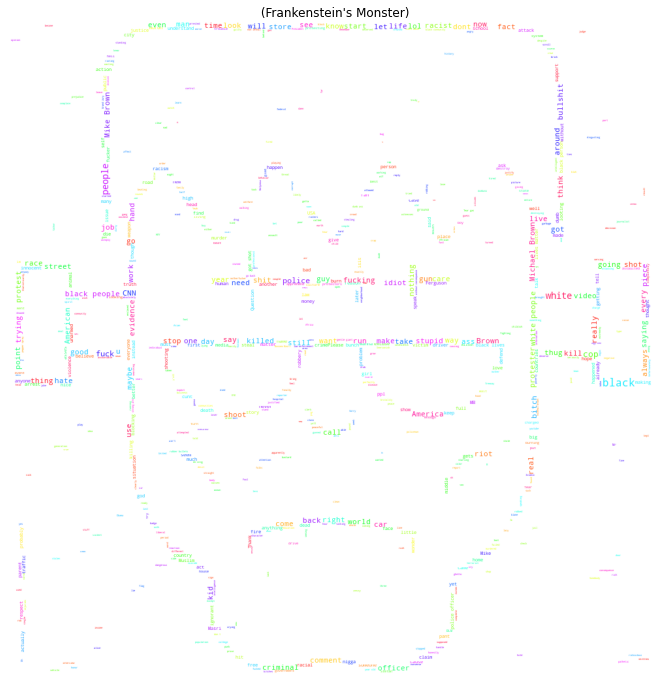

In [31]:
plt.figure(figsize=(14,12))
wc = WordCloud(background_color="white", 
               max_words=20000, 
               mask=hcmask, 
               stopwords=STOPWORDS, 
               max_font_size= 60)
wc.generate(" ".join(ffk))
plt.title(" (Frankenstein's Monster)", fontsize= 12)
plt.imshow(wc.recolor( colormap= 'hsv' , random_state=17), alpha=0.9)
plt.axis('off')

In [32]:
MAX_FEATURES = 200000 #numero de palabaras en el vocabulario

In [33]:
vectorizer = TextVectorization(max_tokens=MAX_FEATURES,
                               output_sequence_length=1800,
                               output_mode='int')

In [34]:
vectorizer.adapt(X.values)

In [35]:
vectorizer('Hello world, life is great')[:5]

<tf.Tensor: shape=(5,), dtype=int64, numpy=array([  1, 196, 154,   7, 211])>

In [36]:
vectorizer.get_vocabulary()

['',
 '[UNK]',
 'the',
 'to',
 'and',
 'a',
 'of',
 'is',
 'that',
 'you',
 'in',
 'i',
 'this',
 'are',
 'it',
 'was',
 'they',
 'for',
 'people',
 'black',
 'not',
 'he',
 'have',
 'on',
 'be',
 'all',
 'if',
 'with',
 'police',
 'but',
 'what',
 'like',
 'just',
 'get',
 'his',
 'do',
 'white',
 'as',
 'so',
 'your',
 'no',
 'by',
 'about',
 'would',
 'there',
 'or',
 'at',
 'we',
 'them',
 'up',
 'who',
 'out',
 'their',
 'its',
 'brown',
 'dont',
 'an',
 'will',
 'when',
 'officer',
 'shot',
 'should',
 'because',
 'more',
 'from',
 'cop',
 'why',
 'how',
 'one',
 'these',
 'can',
 'my',
 'did',
 'video',
 'then',
 'him',
 'has',
 'some',
 'know',
 'me',
 'man',
 'being',
 'only',
 'cops',
 'over',
 'guy',
 'were',
 'had',
 '\xa0',
 'racist',
 'go',
 'fuck',
 'blacks',
 'time',
 'right',
 'need',
 'say',
 'race',
 'those',
 'down',
 'shit',
 'think',
 'off',
 'im',
 'been',
 'back',
 'see',
 'most',
 'make',
 'going',
 'even',
 'than',
 'here',
 'good',
 'still',
 'other',
 'nothi

In [37]:
vectorized_text = vectorizer(X.values)

In [38]:
len(X)

1000

In [39]:
vectorized_text

<tf.Tensor: shape=(1000, 1800), dtype=int64, numpy=
array([[  26,   82,   18, ...,    0,    0,    0],
       [ 169,  447,    7, ...,    0,    0,    0],
       [  55,    9, 2944, ...,    0,    0,    0],
       ...,
       [   2, 1158,   64, ...,    0,    0,    0],
       [  12,   73,    7, ...,    0,    0,    0],
       [ 229,    2, 3333, ...,    0,    0,    0]])>

In [40]:
#MCSHBAP - map, chache, shuffle, batch, prefetch  from_tensor_slices, list_file
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text, y))
dataset = dataset.cache()
dataset = dataset.shuffle(160000)
dataset = dataset.batch(16)
dataset = dataset.prefetch(8) # helps bottlenecks

In [41]:
batch_X, batch_y = dataset.as_numpy_iterator().next()

In [42]:
train = dataset.take(int(len(dataset)*.7))
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

In [43]:
len(test)

6

In [44]:
train_generator = train.as_numpy_iterator()

In [45]:
train_generator.next()

(array([[  80,  917, 1121, ...,    0,    0,    0],
        [  40, 4235,   18, ...,    0,    0,    0],
        [ 194,    7,  237, ...,    0,    0,    0],
        ...,
        [  11,  101,    8, ...,    0,    0,    0],
        [  11,  179,   12, ...,    0,    0,    0],
        [  32,  143,   44, ...,    0,    0,    0]]),
 array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0],
        [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 0, 0, 0, 0, 0, 0, 0,

2. Crear modelo secuencial

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense
from keras.layers import Embedding
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import load_model

In [47]:
y.shape

(1000, 12)

In [48]:
y[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [49]:

# Define the keras model
model = Sequential()
# Create the embedding layer
model.add(Embedding(MAX_FEATURES+1, 32))
# Bidirectional LSTM Layer
model.add(Bidirectional(LSTM(32, activation='tanh')))
# Feature extractor Fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
# Final layer
model.add(Dense(12, activation='sigmoid'))


In [50]:
# compile the keras model
model.compile(loss='BinaryCrossentropy', optimizer='Adam',metrics=['binary_accuracy'])


In [51]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          6400032   
                                                                 
 bidirectional (Bidirectiona  (None, 64)               16640     
 l)                                                              
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 12)                1548      
                                                        

In [52]:
# Early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('best_model.h5', monitor='binary_accuracy', mode='max', verbose=1, save_best_only=True)

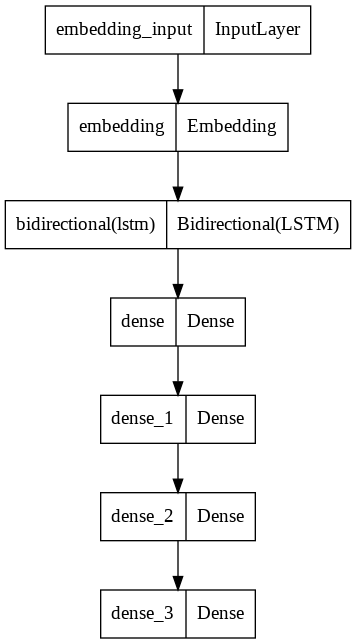

In [53]:
# for this to succeed run `brew install graphviz && pip install pydot_ng`
# probar este codigo para obtener grafico de la distribución del modelo
tf.keras.utils.plot_model(
    model,
    to_file='model.png',
    show_shapes=False,
    show_layer_names=True,
    rankdir='TB',
)

In [54]:
from IPython.display import SVG

In [1]:
SVG(tf.keras.utils.model_to_dot(model, dpi=70).create(prog='dot', format='svg'))

NameError: ignored

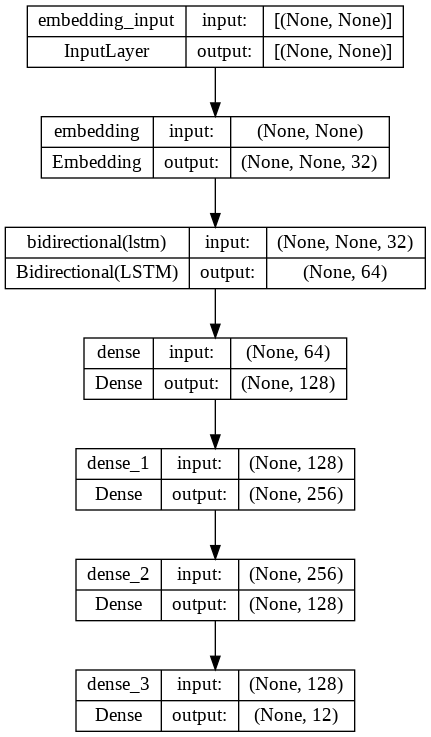

In [56]:
from keras.utils.vis_utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

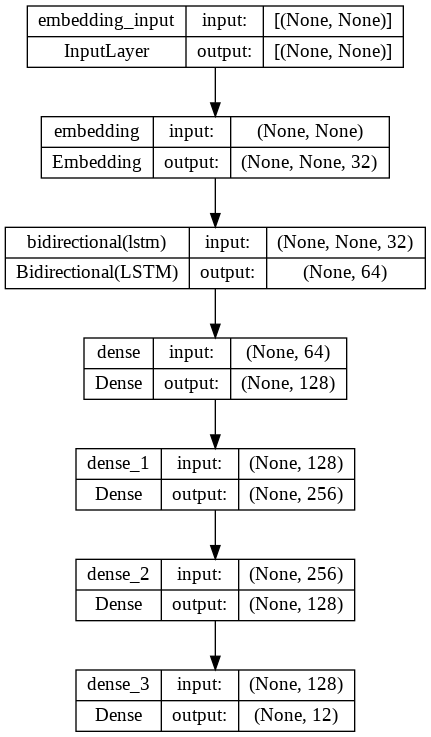

In [57]:
plot_model(model, to_file='model.png', show_shapes=True)

In [58]:
# fit the keras model on the dataset
#history = model.fit(train, epochs=9, validation_data=val)
history = model.fit(train, validation_data= val, epochs=100, verbose=1, callbacks=[es, mc])

Epoch 1/100
44/44 [==============================] - ETA: 0s - loss: 0.4027 - binary_accuracy: 0.8698
Epoch 1: binary_accuracy improved from -inf to 0.86979, saving model to best_model.h5
44/44 [==============================] - 12s 166ms/step - loss: 0.4027 - binary_accuracy: 0.8698 - val_loss: 0.2633 - val_binary_accuracy: 0.8785
Epoch 2/100
44/44 [==============================] - ETA: 0s - loss: 0.2638 - binary_accuracy: 0.8838
Epoch 2: binary_accuracy improved from 0.86979 to 0.88376, saving model to best_model.h5
44/44 [==============================] - 8s 171ms/step - loss: 0.2638 - binary_accuracy: 0.8838 - val_loss: 0.2481 - val_binary_accuracy: 0.8880
Epoch 3/100
44/44 [==============================] - ETA: 0s - loss: 0.2509 - binary_accuracy: 0.8903
Epoch 3: binary_accuracy improved from 0.88376 to 0.89027, saving model to best_model.h5
44/44 [==============================] - 7s 164ms/step - loss: 0.2509 - binary_accuracy: 0.8903 - val_loss: 0.2342 - val_binary_accuracy: 0

In [59]:
history.history

{'loss': [0.40274733304977417,
  0.26384273171424866,
  0.2509234845638275,
  0.22240127623081207,
  0.19133271276950836,
  0.1580512672662735,
  0.1382049173116684,
  0.129008948802948,
  0.10715997219085693,
  0.09200802445411682,
  0.08621610701084137,
  0.08149819076061249,
  0.08286980539560318,
  0.07308796793222427,
  0.07048474252223969,
  0.06477227807044983,
  0.05967899411916733,
  0.05926172435283661,
  0.054208192974328995,
  0.05931709706783295,
  0.07004208117723465,
  0.06404963880777359,
  0.05218921974301338,
  0.04845245182514191],
 'binary_accuracy': [0.8697918057441711,
  0.8837594985961914,
  0.8902700543403625,
  0.9067235589027405,
  0.919981062412262,
  0.9333570003509521,
  0.9417613744735718,
  0.9448390603065491,
  0.9562025666236877,
  0.9631866812705994,
  0.9627130627632141,
  0.9649620652198792,
  0.9630682468414307,
  0.9680397510528564,
  0.9682765603065491,
  0.9715909361839294,
  0.9714723825454712,
  0.9731296896934509,
  0.9765624403953552,
  0.973

In [60]:
from matplotlib import pyplot as plt


<Figure size 1440x1296 with 0 Axes>

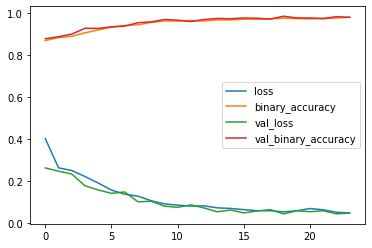

In [61]:
plt.figure(figsize=(20,18))
pd.DataFrame(history.history).plot()
plt.show()

In [62]:
 #load the saved model
saved_model = load_model('best_model.h5')
#evaluate the model
_, train_acc = saved_model.evaluate(train, verbose=0)
_, test_acc = saved_model.evaluate(test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.978, Test: 0.977


3. Make Prediction

In [63]:
input_text = vectorizer('You freaking suck! I am going to hit you.')

In [64]:
input_text

<tf.Tensor: shape=(1800,), dtype=int64, numpy=array([   9, 1820, 1117, ...,    0,    0,    0])>

In [65]:
df.columns[3:]

Index(['IsToxic', 'IsAbusive', 'IsThreat', 'IsProvocative', 'IsObscene',
       'IsHatespeech', 'IsRacist', 'IsNationalist', 'IsSexist', 'IsHomophobic',
       'IsReligiousHate', 'IsRadicalism'],
      dtype='object')

In [66]:
batch = test.as_numpy_iterator().next()

In [67]:
batch_X, batch_y = test.as_numpy_iterator().next()


In [68]:
batch_y

array([[1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [69]:
(model.predict(batch_X) > 0.5).astype(int)

1/1 [==============================] - 1s 709ms/step


array([[1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [70]:
res = model.predict(np.expand_dims(input_text, 0))

1/1 [==============================] - 0s 52ms/step


4. Evaluate model

In [71]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [72]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [73]:
for batch in test.as_numpy_iterator():
  #unpack the batch
  X_true, y_true = batch
  #make a prediction
  yhat = model.predict(X_true)

  #flatten the predictions
  y_true = y_true.flatten()
  yhat= yhat.flatten()

  pre.update_state(y_true, yhat)
  re.update_state(y_true, yhat)
  acc.update_state(y_true, yhat)

1/1 [==============================] - 0s 49ms/step


In [74]:
print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')


Precision: 0.9440559148788452, Recall:0.8653846383094788, Accuracy:0.9748263955116272


5. Test and gradio

In [75]:
!pip install gradio jinja2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.8 MB 23.2 MB/s 
     |████████████████████████████████| 55 kB 4.2 MB/s 
     |████████████████████████████████| 213 kB 67.5 MB/s 
     |████████████████████████████████| 106 kB 74.9 MB/s 
     |████████████████████████████████| 84 kB 4.0 MB/s 
     |████████████████████████████████| 278 kB 76.2 MB/s 
     |████████████████████████████████| 54 kB 3.2 MB/s 
     |████████████████████████████████| 56 kB 4.0 MB/s 
     |████████████████████████████████| 84 kB 3.4 MB/s 
     |████████████████████████████████| 2.3 MB 65.0 MB/s 
     |████████████████████████████████| 64 kB 3.2 MB/s 
     |████████████████████████████████| 80 kB 9.4 MB/s 
     |████████████████████████████████| 68 kB 7.8 MB/s 
     |████████████████████████████████| 68 kB 7.8 MB/s 
     |████████████████████████████████| 68 kB 7.2 MB/s 
     |████████████████████████████████| 68 kB 6.7 

In [76]:
import tensorflow as tf
import gradio as gr

In [77]:
# load a saved model
#from keras.models import load_model

In [78]:
model.save('best_model.h5')




In [79]:
model = tf.keras.models.load_model('best_model.h5')


In [80]:
imput_str = vectorizer('I hate you.')

In [81]:
res = model.predict(np.expand_dims(imput_str,0))

1/1 [==============================] - 1s 1s/step


In [82]:
res

array([[9.9102777e-01, 9.9179184e-01, 4.3676920e-02, 5.1748759e-01,
        4.5523852e-02, 4.4487617e-03, 3.4388178e-03, 2.7028890e-04,
        8.0432725e-04, 3.0717307e-05, 2.2315653e-03, 2.6061605e-05]],
      dtype=float32)

In [83]:
df.columns[3]

'IsToxic'

In [84]:
def score_comment(comment):
  vectorized_comment = vectorizer([comment])
  results = model.predict(vectorized_comment)

  text = ''
  for idx,col in enumerate(df.columns[3:]):
    text += '{}: {}\n'.format(col, results[0][idx]>0.5)

  return text

In [85]:
interface = gr.Interface(fn=score_comment,
                         inputs=gr.inputs.Textbox(lines=2, placeholder='Comment to score'),
                        outputs='text',
                        title= 'Toxicity Classifier')


/usr/local/lib/python3.8/dist-packages/gradio/inputs.py:26: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.8/dist-packages/gradio/deprecation.py:40: UserWarning: `numeric` parameter is deprecated, and it has no effect
  warnings.warn(value)


In [86]:
interface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://d5356f585361c49c.gradio.app

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces
